<a href="https://colab.research.google.com/github/AlirezaPNouri/BERTEmbedding/blob/main/FourthOfOct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author: ALireza P. Nouri
Supervisor: Prof. M. Shahriar Hossain
link to the dataset
https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv
The last version which is written on 4th of Oct 2021

In [1]:
# to check if the GPU is ready to use
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

# to tell pytorch that we are going to use GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [2]:
#install needed packages
!pip install transformers
!pip install wget

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 3.3 MB 34.3 MB/s 
     |████████████████████████████████| 596 kB 53.4 MB/s 
     |████████████████████████████████| 895 kB 59.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6591f0101dcb9157dc5eaae15e2442fbda33bcb8f95215d324e4c0f1a69d1177
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
# download the dataset as a zip file
import wget
import os
import requests
print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://raw.githubusercontent.com/AlirezaPNouri/BERTEmbedding/main/5KArticles.csv'
res = requests.get(url, allow_redirects=True)
with open('small_dataset_NYT.csv','wb') as file:
    file.write(res.content)
print('Download is done!')

Download is done!


In [4]:
import pandas as pd
MAX_DATA = 1000
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/small_dataset_NYT.csv", header= None, skiprows=1,  )
df = df.dropna(how='any', axis=0)

df = df[0:MAX_DATA][[1, 2]]
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
print(df.columns)
df.sample(10)
# new_df = df[[1, 2]]
df.columns = ['id', 'content']
# df.head()
print('The dimension of the dataset is {}'.format(df.shape))
print(df.sample)

Number of training sentences: 1,000

Int64Index([1, 2], dtype='int64')
The dimension of the dataset is (1000, 2)
<bound method NDFrame.sample of                    id                                            content
0    19900101_0000000  HURRYING through the tunnel at Veterans Stadiu...
1    19900101_0000001  FOR six years, American corporations have been...
2    19900101_0000002  Alcide Chaisson, who is 69 years old and lives...
3    19900101_0000003  Gary Anderson is the third-most accurate kicke...
4    19900101_0000004  The National Bank of Poland is devaluing the P...
..                ...                                                ...
995  19900111_0000997  The greeting card giant Hallmark Cards Inc. sa...
996  19900111_0000998  The police detained 15,000 people today in a s...
997  19900111_0000999  The American retailing operations of the Campe...
998  19900111_0001000  The Ralston Purina Company said it would estab...
999  19900111_0001001  Barry Lyons and the Mets agre

In [5]:
import numpy as np
sentences = df.content.values
labels = df.id.values
# print(labels)
labels = [int(d[7]) for d in labels]
# print(labels)
#function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return len(unique_list)

class_num = unique(labels)
print('The numeber of classes is {}'.format(class_num))
print('length of data is {} and length of labels is {}'.format(len(sentences), len(labels)))
print('labels are : ', labels)

The numeber of classes is 10
length of data is 1000 and length of labels is 1000
labels are :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

In [6]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [7]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
max_length = 256
# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_length,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joke

In [8]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

In [9]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [10]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = class_num, # The number of output labels--2 for binary classification. # here temp is the size of the dataset
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [11]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [12]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [13]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 20

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [14]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [15]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [16]:
#Check the variables size in the memory
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
  temp = sys.getsizeof(obj)
  if temp >100000:
    print(var, temp)

df 3949116


In [17]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    embedding_layers = []
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        print(batch[2].shape)
        print(batch[1].shape)
        print(batch[0].shape)
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        # print(len(outputs))
        # print(outputs[0]) the loss
        # print(len(outputs[1])) the batches
        # print(len(outputs[2])) the embedding layers
        # import numpy as np
        # print(np.shape(outputs[2]))--->(13,)
        # print(np.shape(outputs[2][1])) --->torch.Size([32, 64, 768]) the embedding in the layer one
        # print(np.shape(outputs[2][2]))--->torch.Size([32, 64, 768]) the embedding in the layer two
        # print(len(outputs[2][3]))
        loss = outputs[0]
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 20 ========
Training...
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
torch.Size([16, 256])
torch.Size([16])
torch.Size([16, 256])
to

In [18]:
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print(  "")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    #count = 0 # added by Ali
    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        
        logits = outputs[0]
        # print(len(outputs))
        # print(np.shape(outputs[1])) # all embedding layers data
        # print(outputs[1][12]) # access to embedding vectors in layer 13
        #count +=1 added by Ali

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    #print(count)
print("")
print("Training complete!")


Running Validation...
  Accuracy: 0.21
  Validation took: 0:00:01

Training complete!


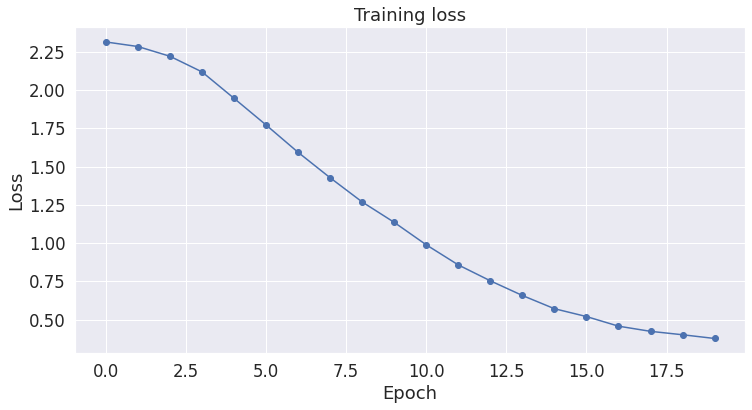

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [44]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
#the same as the maxlen we used in the encoder_plus function
MAX_LEN = max([len(sen) for sen in input_ids])
Max_Feature_Size = 20  ## ignore the features after this number
# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df = df[0:100]
sentences = sentences[0:100]
labels = labels[0:100]
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
# sentences = new_df.text.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 100  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 100



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [45]:
print(MAX_LEN)
print(df.shape)
print(len(sentences))
print(input_ids.shape)
print(len(labels))

256
(100, 2)
100
(100, 256)
100


In [46]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  print('np.shape(outputs[0]) ', np.shape(outputs[0]))
  print('np.shape(outputs[1][0]) ', np.shape(outputs[1][0]))
  print('np.shape(outputs[1][1]) ', np.shape(outputs[1][1]))
  print('np.shape(outputs[1][12]) ', np.shape(outputs[1][12]))

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 100 test sentences...
np.shape(outputs[0])  torch.Size([100, 10])
np.shape(outputs[1][0])  torch.Size([100, 256, 768])
np.shape(outputs[1][1])  torch.Size([100, 256, 768])
np.shape(outputs[1][12])  torch.Size([100, 256, 768])
    DONE.


In [47]:
from sklearn.metrics.pairwise import cosine_similarity
last_layer = outputs[1][12]
# print out all the sentences
c = 0
for doc in sentences:
  print('doc {} :'.format(c), doc)
  c += 1

doc 0 : HURRYING through the tunnel at Veterans Stadium, the Los Angeles Rams' left guard, Tom Newberry, yelled, ''Warm-weather California sissies, huh?'' With a grin he disappeared into the locker room to calmly celebrate a 21-7 wild-card victory over the Philadelphia Eagles in a cold raw rain, which qualified the Rams to go against the Giants next Sunday at Giants Stadium in the Super Bowl XXIV tournament. But until yesterday, the Rams had always played like warm-weather California sissies in cold-weather playoff games. Until yesterday, the Rams were 0-9 in cold-weather playoff games since the franchise moved to Los Angeles from Cleveland more than four decades ago. In that time, Ram teams lost three outdoor playoff games in Minnesota (plus one in the warmth of the Metrodome a year ago), two in Washington, and one each in Cleveland, Detroit, Green Bay and Chicago. ''I'm tired of being a weatherman; if I get fired, I'm going right to the news,'' John Robinson, the Rams' coach, joked. 

In [48]:
def find_similar(embedding_layers, word_index, original_sentence):
  score_dic = dict()
  print(len(original_sentence))
  for j in range(1, min(256, len(original_sentence))):
    score_dic[original_sentence[j -1]] =  cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]
    # print('word is {}, score is {}'.format(original_sentence[j -1], cosine_similarity([embedding_layers[word_index].to('cpu').numpy()], [embedding_layers[j].to('cpu').numpy()])[0][0]))
  return score_dic

# show th t-SNE for the tokens
from sklearn.manifold import TSNE
def tsne_plot(sentences, output):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word, embed in zip(sentences, output):
        tokens.append(embed)
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [49]:
# import pickle
# pickle.dump(outputs, open("outputs.p", "wb"))
# pickle.dump(sentences, open("sentences.p", "wb"))
# pickle.dump(labels, open("labels.p", "wb"))



tokens in  doc 8 are ['confronted', 'by', 'growing', 'demands', 'that', 'the', 'communist', 'party', 'dissolve', 'itself', ',', 'top', 'officials', 'of', 'this', 'country', "'", 's', 'old', 'order', 'say', 'they', 'will', 'call', 'a', 'special', 'congress', 'to', 'di', '##sman', '##tle', 'the', 'disgrace', '##d', 'party', 'even', 'before', 'free', 'elections', 'are', 'held', 'in', 'april', '.', 'late', 'saturday', 'night', ',', 'a', 'group', 'of', 'party', 'officials', ',', 'many', 'of', 'whom', 'quickly', 'severed', 'their', 'relationship', 'with', 'the', 'ce', '##aus', '##escu', 'dictatorship', 'as', 'a', 'popular', 'uprising', 'swept', 'it', 'out', 'of', 'power', ',', 'went', 'on', 'the', 'national', 'television', 'to', 'announce', 'the', 'special', 'congress', '.', 'their', 'message', 'was', 'repeated', 'today', 'in', 'the', 'rum', '##anian', 'newspapers', ',', 'which', 'like', 'the', 'television', 'are', 'now', 'controlled', 'by', 'the', 'country', "'", 's', 'new', ',', 'non', '-'

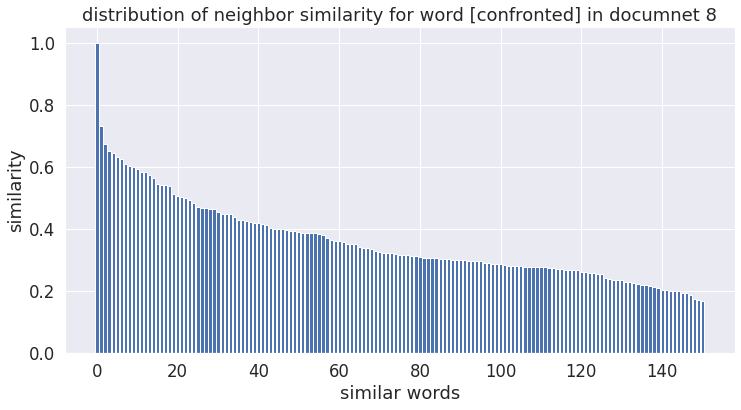

3   -->  growing
1690
[0.9999999, 0.7781638, 0.73268795, 0.5923917, 0.59179264, 0.5825115, 0.5784902, 0.5637851, 0.5623577, 0.5553746, 0.5421622, 0.541303, 0.5402615, 0.535923, 0.53090996, 0.5296484, 0.5220073, 0.5219541, 0.5147228, 0.51311284, 0.5120955, 0.5105715, 0.50503147, 0.5037405, 0.5019202, 0.50158024, 0.49749586, 0.49659753, 0.49221408, 0.4902104, 0.4827799, 0.48141155, 0.47806084, 0.47756582, 0.47547078, 0.47126472, 0.47125262, 0.46971065, 0.46929258, 0.46852937, 0.46564442, 0.4643207, 0.45861018, 0.4584037, 0.45341718, 0.45267516, 0.45263013, 0.45261124, 0.44401228, 0.44183075, 0.44047016, 0.4402492, 0.43934208, 0.4374285, 0.43661326, 0.43527532, 0.43413538, 0.42464775, 0.4231736, 0.4219931, 0.42071888, 0.42013785, 0.41925055, 0.4139399, 0.4135579, 0.41331136, 0.41293997, 0.411751, 0.4112786, 0.4099034, 0.40456438, 0.4013964, 0.40009552, 0.39374977, 0.39316142, 0.39258224, 0.39202103, 0.3907654, 0.38847253, 0.38744217, 0.38709402, 0.38697132, 0.38607058, 0.3849954, 0.375398

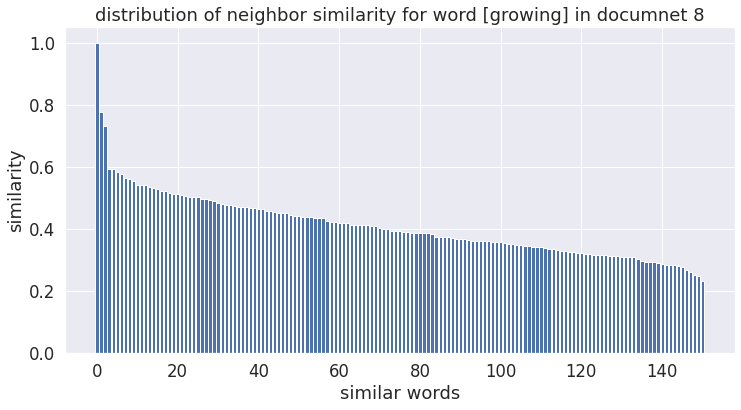

4   -->  demands
1690
[1.0, 0.7781638, 0.6433585, 0.6261556, 0.60608363, 0.5976815, 0.5934504, 0.58340776, 0.56406033, 0.5636718, 0.55683315, 0.54825723, 0.53423953, 0.533913, 0.52998394, 0.5297814, 0.5276525, 0.5275226, 0.5272062, 0.5213895, 0.518069, 0.50924695, 0.49976078, 0.49824843, 0.49652398, 0.49530625, 0.49104306, 0.4897381, 0.48701236, 0.48571333, 0.48541737, 0.4845435, 0.4844276, 0.47667855, 0.4752016, 0.47331637, 0.47289747, 0.46699426, 0.46631938, 0.4645942, 0.4642714, 0.46418697, 0.46276015, 0.46217334, 0.4616833, 0.46147183, 0.46083623, 0.4608187, 0.4566902, 0.45566213, 0.4546355, 0.45397934, 0.453784, 0.4537681, 0.44974804, 0.44772312, 0.4455253, 0.44397378, 0.44214535, 0.43823105, 0.43716902, 0.43345195, 0.43099585, 0.42875278, 0.4222184, 0.41858336, 0.4181396, 0.4157641, 0.41569623, 0.41236085, 0.40991208, 0.40973356, 0.40564746, 0.40174136, 0.40154743, 0.40085414, 0.39866835, 0.39836785, 0.39822185, 0.39646176, 0.3948551, 0.3858503, 0.3854884, 0.38320482, 0.38219064,

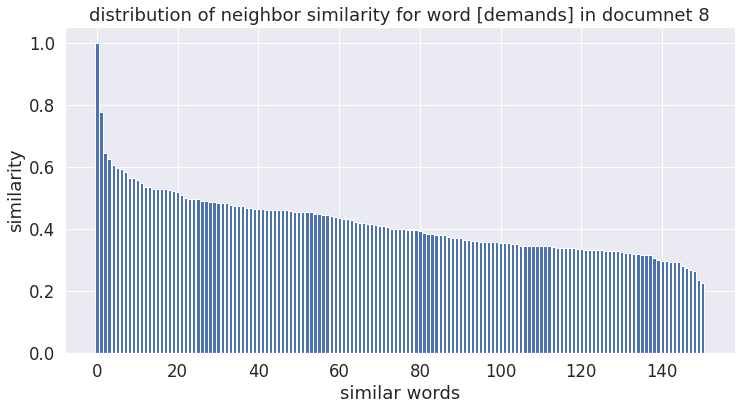

7   -->  communist
1690
[0.7011808, 0.68077, 0.6729073, 0.65303457, 0.6354631, 0.6061126, 0.6037632, 0.59273654, 0.5828823, 0.57049674, 0.5695837, 0.56693727, 0.564008, 0.56243026, 0.5535203, 0.5522691, 0.5516858, 0.55152303, 0.54911345, 0.5484705, 0.54843575, 0.5351331, 0.5322468, 0.52788734, 0.51893544, 0.5169194, 0.51687235, 0.5151955, 0.51445293, 0.51122504, 0.50781626, 0.5076325, 0.50530994, 0.49633422, 0.4950595, 0.4928155, 0.49186635, 0.48158672, 0.47948134, 0.4759569, 0.47464892, 0.4739464, 0.47386163, 0.46822748, 0.4656413, 0.46388245, 0.4617305, 0.45878205, 0.4576614, 0.4519632, 0.4517074, 0.44419962, 0.44330585, 0.44266158, 0.4417566, 0.43403918, 0.43154997, 0.42934924, 0.42903742, 0.42587876, 0.42205, 0.41797507, 0.4124071, 0.41086182, 0.4085569, 0.40694055, 0.40676254, 0.40534878, 0.40321168, 0.39841777, 0.39832568, 0.3967732, 0.39507478, 0.39421237, 0.3928173, 0.38209617, 0.38073897, 0.3807376, 0.38071463, 0.37969956, 0.37956467, 0.3726395, 0.37070638, 0.3676871, 0.361951

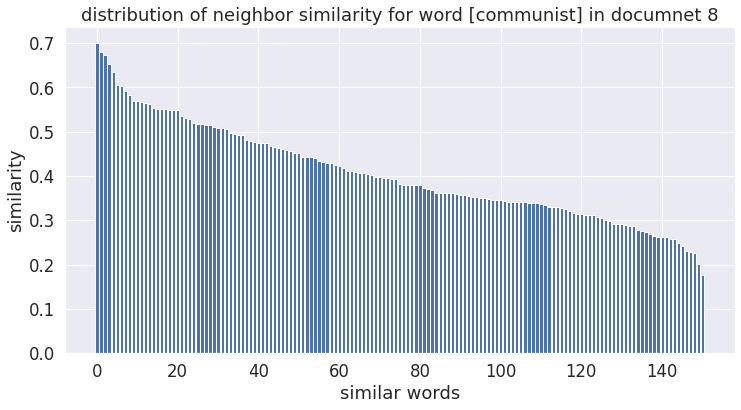

8   -->  party
1690
[0.78628576, 0.75815684, 0.61591417, 0.60448223, 0.59657675, 0.59495664, 0.59039557, 0.5882355, 0.577435, 0.5734414, 0.57000214, 0.56295025, 0.561605, 0.55918145, 0.5573438, 0.54109377, 0.53347194, 0.530516, 0.5267619, 0.5265008, 0.52429605, 0.5238676, 0.5219918, 0.51929677, 0.5159532, 0.5108146, 0.5088217, 0.5086817, 0.5084654, 0.50744617, 0.5029291, 0.50214934, 0.50122416, 0.5009953, 0.49289542, 0.48815203, 0.48187283, 0.48057982, 0.48006856, 0.47984242, 0.47871333, 0.4758703, 0.4749331, 0.47403613, 0.47225702, 0.47199446, 0.47040355, 0.45955428, 0.4543991, 0.45410633, 0.44898453, 0.44863898, 0.44573557, 0.44368374, 0.44318768, 0.43576542, 0.435341, 0.43074566, 0.42860627, 0.42555368, 0.4194008, 0.41419885, 0.4134624, 0.41067976, 0.40647358, 0.4062381, 0.40609798, 0.40311393, 0.40278083, 0.40087676, 0.40082395, 0.4005946, 0.39357847, 0.39046484, 0.38465345, 0.38420078, 0.368141, 0.36669403, 0.3559972, 0.3557285, 0.3519012, 0.35151073, 0.34977466, 0.34517586, 0.344

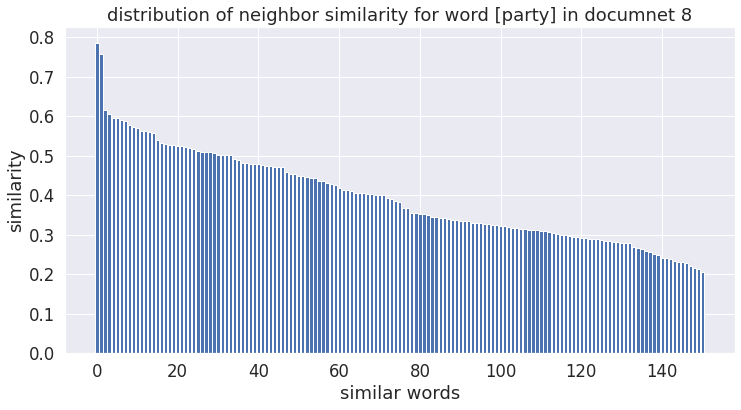

9   -->  dissolve
1690
[1.0, 0.82267547, 0.6342964, 0.6261556, 0.6145959, 0.6099481, 0.6020395, 0.5761116, 0.5612402, 0.547519, 0.5370452, 0.5329635, 0.53279316, 0.5219541, 0.5211669, 0.519172, 0.5164174, 0.51618075, 0.5157428, 0.5115898, 0.5105876, 0.5101428, 0.50893676, 0.50045866, 0.50006276, 0.49978474, 0.49842262, 0.49411497, 0.49021968, 0.486691, 0.48418805, 0.46362394, 0.46272776, 0.45880613, 0.4556915, 0.45532987, 0.45236528, 0.45232087, 0.45232058, 0.45115387, 0.45064092, 0.44885936, 0.448107, 0.44713593, 0.44306368, 0.44270873, 0.4406324, 0.4373549, 0.43709838, 0.4325294, 0.4302235, 0.4254498, 0.42494112, 0.42435735, 0.42296225, 0.4226494, 0.42204967, 0.41372734, 0.41198778, 0.41190287, 0.40909544, 0.4057163, 0.40326667, 0.401055, 0.3932669, 0.39176345, 0.38406444, 0.37313616, 0.37232435, 0.3675536, 0.3662442, 0.36542967, 0.3631705, 0.35994563, 0.3598894, 0.35918087, 0.35870636, 0.3583539, 0.35691077, 0.35450798, 0.35365552, 0.35349542, 0.35178846, 0.34852874, 0.34471083, 0.3

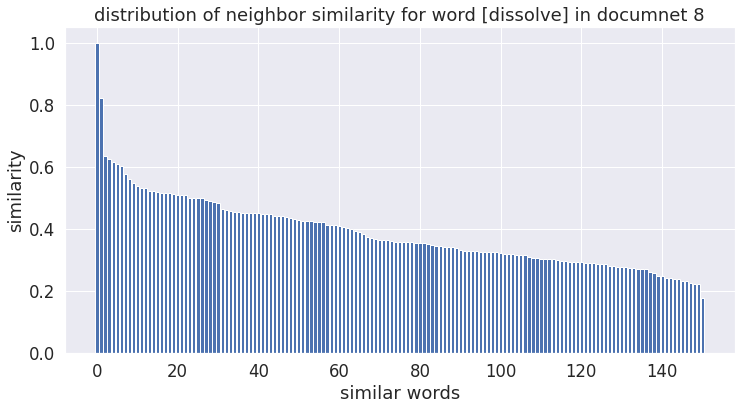

12   -->  top
1690
[0.99999976, 0.72954375, 0.6445147, 0.6360377, 0.6269548, 0.6081399, 0.60102844, 0.59830076, 0.5849335, 0.5825115, 0.5822927, 0.57941, 0.56484705, 0.56406033, 0.559997, 0.5579629, 0.55738914, 0.556823, 0.5534907, 0.5510777, 0.5506214, 0.539657, 0.5212854, 0.5108859, 0.5040457, 0.50006276, 0.4986657, 0.49583614, 0.49311867, 0.49198696, 0.48518115, 0.48159838, 0.4760821, 0.47427094, 0.47143528, 0.46795323, 0.46138415, 0.4537646, 0.44673032, 0.44649675, 0.44347203, 0.43602017, 0.4269166, 0.4254125, 0.42408997, 0.41988084, 0.41825402, 0.40438133, 0.40433466, 0.40305573, 0.3995418, 0.39826605, 0.39532903, 0.3871544, 0.37872425, 0.3776853, 0.3733893, 0.37037462, 0.3677928, 0.36626738, 0.36558563, 0.36501998, 0.3577127, 0.3568412, 0.35610792, 0.3557387, 0.35368297, 0.3494111, 0.34802306, 0.3469865, 0.34694684, 0.34650424, 0.33894446, 0.33387747, 0.3307387, 0.32613188, 0.32549858, 0.32328495, 0.3230818, 0.31847143, 0.3183108, 0.3183066, 0.31594223, 0.31502455, 0.3130926, 0.3

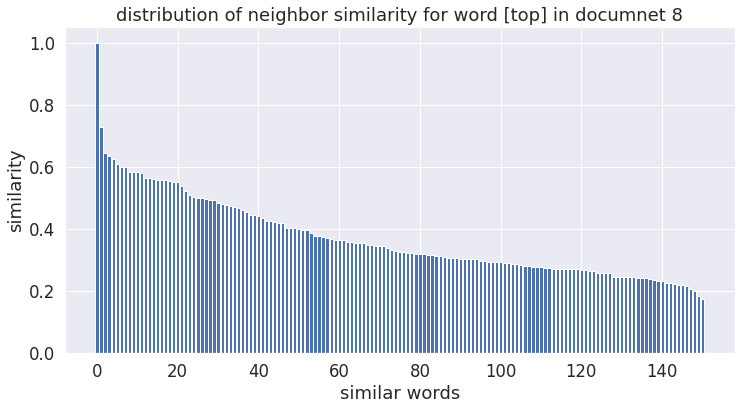

13   -->  officials
1690
[0.86057556, 0.72629076, 0.68157554, 0.62276006, 0.6210852, 0.6184589, 0.6091771, 0.5972906, 0.58901143, 0.58729184, 0.58257717, 0.58011866, 0.5777379, 0.57136846, 0.56101793, 0.55650914, 0.54691166, 0.54670644, 0.5440082, 0.54333526, 0.5357653, 0.5204132, 0.51307917, 0.512251, 0.50801015, 0.5059837, 0.5011771, 0.49942148, 0.49939173, 0.49433684, 0.49246728, 0.48097518, 0.47997648, 0.47938615, 0.475918, 0.4739654, 0.4705304, 0.46759346, 0.46740186, 0.46178442, 0.46103698, 0.45673513, 0.4514179, 0.44053102, 0.4367693, 0.43305296, 0.432344, 0.4273327, 0.42244524, 0.4197302, 0.4183278, 0.41759098, 0.41725016, 0.40802687, 0.39527833, 0.390513, 0.39011878, 0.38861144, 0.38554668, 0.3847441, 0.3844039, 0.38322008, 0.38262683, 0.37854546, 0.37620547, 0.3750494, 0.3724206, 0.3699895, 0.36389613, 0.3608501, 0.35747206, 0.35640952, 0.35503423, 0.35472918, 0.35455447, 0.35330632, 0.3443231, 0.34414908, 0.3409062, 0.3376869, 0.3347957, 0.33410275, 0.33102793, 0.33010924, 0

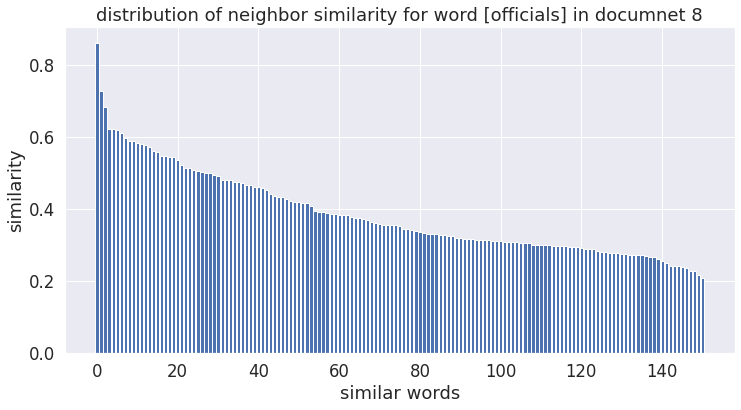

16   -->  country
1690
[0.7330677, 0.69809604, 0.59441984, 0.58864045, 0.58206, 0.5733149, 0.5656874, 0.56082064, 0.55686724, 0.55053675, 0.54908645, 0.52787507, 0.5232496, 0.5231531, 0.52301776, 0.516886, 0.5163741, 0.51506495, 0.51209563, 0.5102358, 0.50895756, 0.50881654, 0.50879204, 0.50485027, 0.49499118, 0.48779237, 0.4856313, 0.48521176, 0.4842642, 0.48109037, 0.48105294, 0.4804717, 0.47868538, 0.47528714, 0.4749415, 0.47484, 0.4746083, 0.47264346, 0.47137988, 0.46878535, 0.4683571, 0.46777666, 0.46669778, 0.46635395, 0.46512023, 0.4648932, 0.4632308, 0.45836353, 0.45804858, 0.45702526, 0.45640036, 0.45268255, 0.4514957, 0.4492342, 0.44874653, 0.44585493, 0.44517002, 0.44384968, 0.43815428, 0.43730953, 0.43687373, 0.4361722, 0.43606645, 0.4352328, 0.42944527, 0.42841417, 0.427255, 0.42279255, 0.41666245, 0.41662994, 0.4151721, 0.41139114, 0.4105572, 0.4099887, 0.4096891, 0.40775856, 0.40675074, 0.40664315, 0.4049654, 0.40473878, 0.40264085, 0.40237728, 0.40220475, 0.40157652, 0.

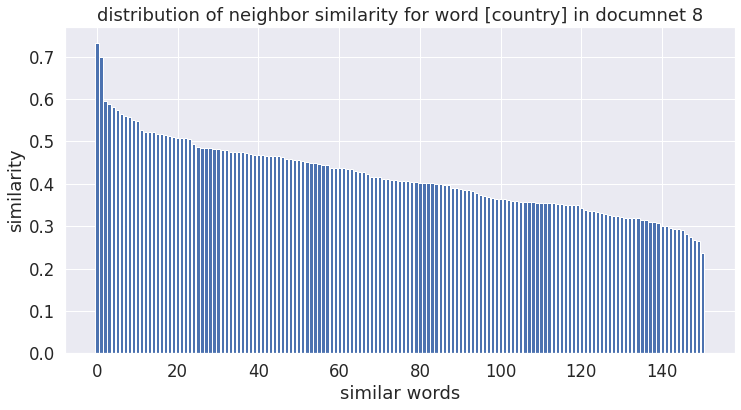

19   -->  old
1690
[0.76394755, 0.59912777, 0.56506836, 0.5271303, 0.5083314, 0.50584054, 0.49667922, 0.49578622, 0.49472007, 0.4907999, 0.4903391, 0.48073596, 0.46721846, 0.46462643, 0.4644186, 0.46427333, 0.46262947, 0.46219835, 0.46171042, 0.46069485, 0.4589696, 0.45809272, 0.45371798, 0.45322707, 0.4529215, 0.44977942, 0.44694176, 0.44309756, 0.44230133, 0.44145802, 0.44039884, 0.43859702, 0.4377014, 0.4352991, 0.43294054, 0.4312085, 0.42738646, 0.42708904, 0.42297745, 0.4192878, 0.41762578, 0.41690326, 0.416054, 0.41348982, 0.4126366, 0.41202432, 0.41167143, 0.41082358, 0.41054097, 0.4078471, 0.40561748, 0.4049951, 0.40407175, 0.4029634, 0.40214592, 0.40178582, 0.40043062, 0.3995662, 0.39351818, 0.3934016, 0.38799703, 0.3878554, 0.38642034, 0.38611808, 0.3839082, 0.38321033, 0.38058305, 0.37775663, 0.37750685, 0.37679768, 0.37664425, 0.3765939, 0.37341303, 0.37231487, 0.37216023, 0.370288, 0.36808652, 0.36706495, 0.3657775, 0.36569905, 0.36365354, 0.36354676, 0.36345133, 0.3631833

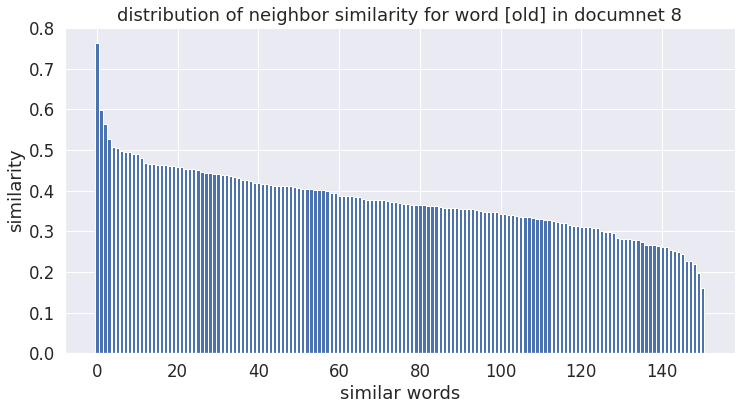

20   -->  order
1690
[1.0000002, 0.5579629, 0.5427048, 0.533913, 0.52553076, 0.51750934, 0.48783427, 0.4860463, 0.4827799, 0.478078, 0.4772911, 0.47698176, 0.47256297, 0.46898305, 0.46804, 0.45962596, 0.45236528, 0.45145404, 0.44818574, 0.4464629, 0.44387195, 0.44284058, 0.44219944, 0.44068187, 0.4376305, 0.43675882, 0.4367265, 0.43545127, 0.43059373, 0.42727238, 0.4262438, 0.42217726, 0.42090786, 0.41936445, 0.41875136, 0.41792968, 0.41484487, 0.41352487, 0.41344208, 0.41167268, 0.41074917, 0.41046962, 0.4103662, 0.4096973, 0.40791327, 0.40599048, 0.4045735, 0.40439785, 0.40416378, 0.40379396, 0.40363067, 0.4023281, 0.40202755, 0.40106085, 0.4010192, 0.39868933, 0.3980299, 0.39656642, 0.39457893, 0.39440554, 0.39212555, 0.39117342, 0.39045358, 0.39033198, 0.38986722, 0.38833123, 0.38806838, 0.3874998, 0.386514, 0.38416946, 0.38205546, 0.38020715, 0.37676916, 0.37490958, 0.3743798, 0.372589, 0.37227818, 0.3689029, 0.367994, 0.36232182, 0.36108506, 0.3588068, 0.35784173, 0.3551578, 0.35

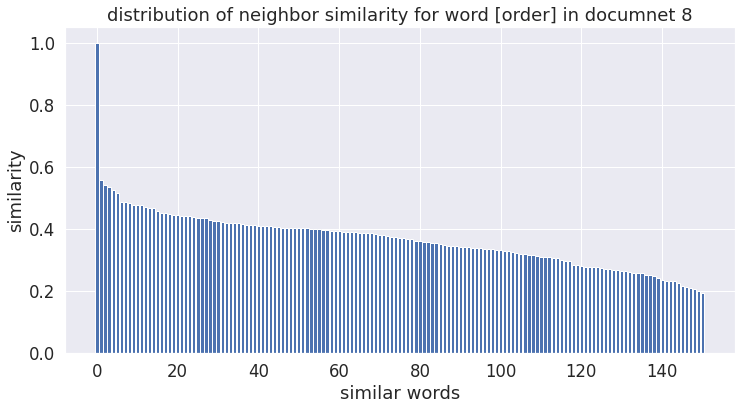

21   -->  say
1690
[1.0, 0.7682982, 0.74913245, 0.7065078, 0.6445147, 0.5855751, 0.55628335, 0.5463008, 0.53994244, 0.5260419, 0.51284456, 0.50041395, 0.49885547, 0.48541737, 0.48146293, 0.47806826, 0.4771493, 0.46804, 0.46638438, 0.4588715, 0.45861018, 0.44766128, 0.44640914, 0.44628325, 0.4456918, 0.4373549, 0.4324684, 0.42565063, 0.41943234, 0.41720292, 0.4170332, 0.41513282, 0.41249678, 0.40927252, 0.40360114, 0.39229727, 0.39214504, 0.38991487, 0.3855138, 0.38361868, 0.36072505, 0.34347004, 0.34177524, 0.33740717, 0.33619407, 0.32790253, 0.32720956, 0.3210334, 0.31989104, 0.31969696, 0.3177391, 0.3165324, 0.31619972, 0.31582338, 0.31389424, 0.313474, 0.31312442, 0.3105943, 0.30955362, 0.30490518, 0.30242983, 0.30237284, 0.30180526, 0.30112028, 0.29839852, 0.2981248, 0.29425406, 0.2880637, 0.2818705, 0.28146085, 0.27796057, 0.274739, 0.27127275, 0.26498595, 0.26017565, 0.25946027, 0.25725764, 0.2535094, 0.25162917, 0.25141943, 0.24953017, 0.24729484, 0.24676485, 0.2452314, 0.241239

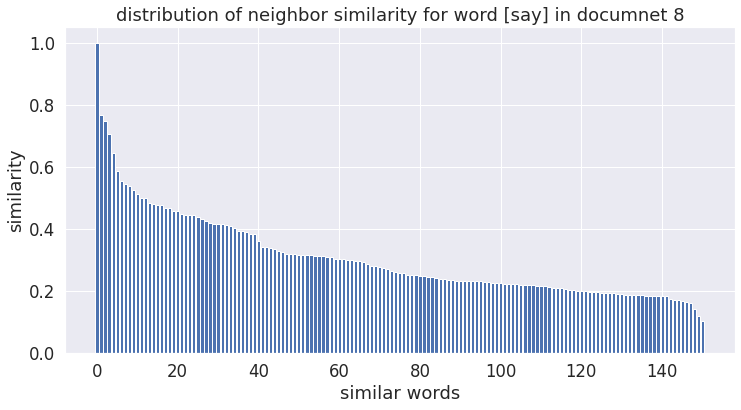

24   -->  call
1690
[1.0, 0.71404123, 0.7104626, 0.7065078, 0.65416753, 0.58574426, 0.55753404, 0.5506214, 0.54427266, 0.5293622, 0.5218237, 0.5115898, 0.51042503, 0.5049495, 0.49704725, 0.48849532, 0.4748057, 0.47386056, 0.47372514, 0.47331637, 0.45917755, 0.44711536, 0.44679892, 0.43874696, 0.43545341, 0.42979872, 0.42460173, 0.42115194, 0.42071888, 0.4200768, 0.41352487, 0.40529412, 0.3940886, 0.39185202, 0.39070642, 0.38995266, 0.3829639, 0.3773518, 0.37402955, 0.37129414, 0.37015963, 0.3678833, 0.3650548, 0.3602657, 0.35620686, 0.35010552, 0.34724322, 0.34670368, 0.3439725, 0.34027857, 0.33998466, 0.3353542, 0.326948, 0.32587504, 0.32585695, 0.3253618, 0.3253436, 0.32008454, 0.31604755, 0.3149467, 0.31487155, 0.30837438, 0.3076562, 0.30753294, 0.30259776, 0.29932678, 0.29822642, 0.29694784, 0.2904551, 0.28754407, 0.28680518, 0.28646415, 0.28312248, 0.2821747, 0.28127092, 0.27964878, 0.27839482, 0.27742794, 0.27656078, 0.27577585, 0.27058235, 0.27044868, 0.2701458, 0.2701119, 0.270

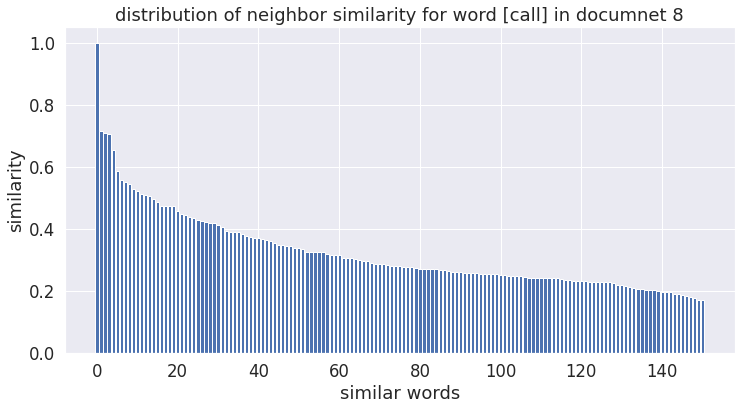

26   -->  special
1690
[0.8046839, 0.67480206, 0.64723384, 0.6107412, 0.6088138, 0.59243405, 0.58547264, 0.55676055, 0.5517953, 0.55024624, 0.5449256, 0.5425379, 0.5382279, 0.52687067, 0.5193794, 0.51808155, 0.51592946, 0.51236415, 0.5113287, 0.5109536, 0.50848675, 0.50451165, 0.5026346, 0.4942742, 0.48537996, 0.48034304, 0.4800471, 0.47956076, 0.47769892, 0.4731137, 0.47134233, 0.4699049, 0.4650185, 0.46421134, 0.46372247, 0.45827144, 0.4582313, 0.45154026, 0.45088398, 0.44926065, 0.4443008, 0.441671, 0.44084114, 0.4407629, 0.43678424, 0.4257694, 0.424865, 0.4213187, 0.4176024, 0.41656327, 0.41318786, 0.41186216, 0.40808156, 0.40503553, 0.40350795, 0.40152583, 0.40009072, 0.39980888, 0.39903504, 0.39797342, 0.3914398, 0.39140677, 0.38719907, 0.3829074, 0.38282964, 0.38276488, 0.38125318, 0.3806061, 0.37856036, 0.37691718, 0.3734829, 0.37086377, 0.3688405, 0.36554322, 0.3638665, 0.34767172, 0.34721822, 0.3471358, 0.3468355, 0.3457235, 0.34343585, 0.3432342, 0.33966792, 0.33945265, 0.33

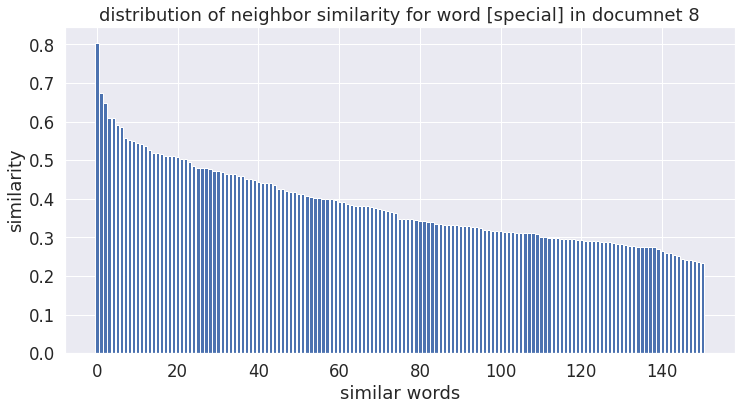

27   -->  congress
1690
[0.74847144, 0.6087378, 0.5952201, 0.57646203, 0.57603544, 0.5676042, 0.54633397, 0.54576147, 0.53591365, 0.5344373, 0.5294945, 0.5277944, 0.521245, 0.5201546, 0.5146507, 0.5064213, 0.5034257, 0.5005974, 0.5002563, 0.49889088, 0.49741405, 0.49473792, 0.48652613, 0.48626125, 0.48103207, 0.47622523, 0.46940362, 0.46698552, 0.46443957, 0.46182668, 0.4607864, 0.4550246, 0.45097756, 0.4474205, 0.4415794, 0.44009054, 0.43655998, 0.43523937, 0.4338327, 0.42680338, 0.42371184, 0.42229426, 0.42100582, 0.41972405, 0.4196436, 0.41842726, 0.41309583, 0.41043282, 0.4090897, 0.40827402, 0.40515324, 0.40194163, 0.40183103, 0.4013637, 0.40045238, 0.39978933, 0.3991925, 0.3936782, 0.3912205, 0.39095426, 0.38856903, 0.38426536, 0.38081643, 0.37878034, 0.37555557, 0.37513465, 0.37218654, 0.36830574, 0.36719364, 0.36448973, 0.36384225, 0.36243024, 0.36073068, 0.36008006, 0.35823148, 0.35607547, 0.35147846, 0.35063002, 0.34964868, 0.34757692, 0.3469146, 0.3463775, 0.3445382, 0.34343

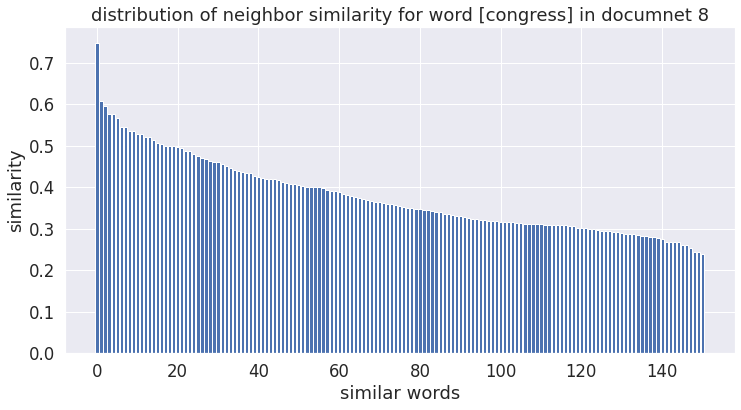

29   -->  di
1690
[0.9999999, 0.90584433, 0.83816653, 0.683388, 0.6317373, 0.58261716, 0.5761116, 0.5147237, 0.5134781, 0.5001867, 0.49772954, 0.49635854, 0.49629903, 0.49211013, 0.4869095, 0.4819293, 0.47929096, 0.47921616, 0.477333, 0.4764236, 0.47532904, 0.4748243, 0.4650467, 0.4584346, 0.45800662, 0.45639688, 0.45513484, 0.4529649, 0.44975013, 0.44599283, 0.44179124, 0.4409733, 0.44002515, 0.43934, 0.43797207, 0.43747684, 0.43600217, 0.43540248, 0.4352181, 0.43324196, 0.4313005, 0.42763963, 0.4240135, 0.4212299, 0.4076142, 0.40618998, 0.40545592, 0.40413153, 0.39978588, 0.3981055, 0.39795458, 0.39646176, 0.39468312, 0.3883978, 0.3871544, 0.38422716, 0.38143653, 0.37876013, 0.37823656, 0.3781136, 0.3773991, 0.3739875, 0.37325925, 0.3732345, 0.37207532, 0.3718573, 0.37103784, 0.37050053, 0.36807823, 0.3647079, 0.36403686, 0.36075962, 0.35998315, 0.35983744, 0.3594835, 0.35885674, 0.35880426, 0.35873568, 0.35849422, 0.35834888, 0.3576577, 0.35620686, 0.35119802, 0.35023445, 0.34623218

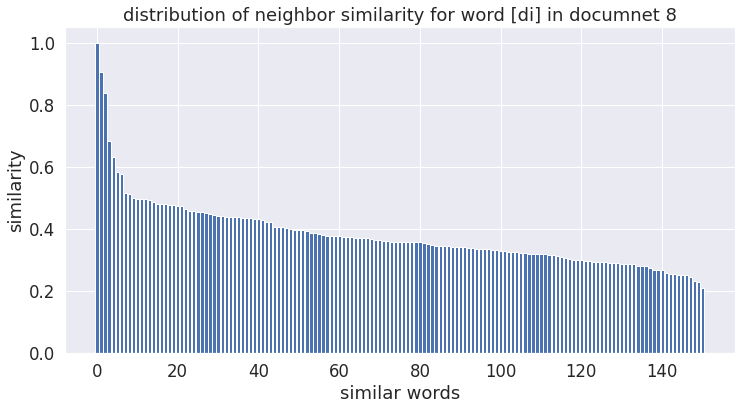

30   -->  ##sman
1690
[1.0000001, 0.90584433, 0.8486042, 0.711535, 0.6514455, 0.6020395, 0.5710566, 0.54909647, 0.509965, 0.50900793, 0.50878954, 0.505774, 0.5013507, 0.500944, 0.49400017, 0.48903787, 0.48057225, 0.47418186, 0.47345096, 0.47325015, 0.47320053, 0.47272453, 0.47013456, 0.4678293, 0.46360952, 0.46065396, 0.45883316, 0.45847332, 0.45502156, 0.44343537, 0.44104075, 0.4373328, 0.43484148, 0.43437234, 0.4332574, 0.43269175, 0.43156666, 0.43125096, 0.42376125, 0.42224193, 0.4206075, 0.41672385, 0.41474754, 0.41359797, 0.40804648, 0.40392232, 0.4032505, 0.40186593, 0.40154743, 0.3958279, 0.39093167, 0.3907654, 0.3880356, 0.38758224, 0.38343275, 0.38206625, 0.37940156, 0.3785777, 0.37730342, 0.3739072, 0.37377226, 0.3733893, 0.37129414, 0.36956036, 0.3684374, 0.36754704, 0.36709934, 0.36628333, 0.36551356, 0.3648333, 0.3641283, 0.36379802, 0.36362338, 0.3626498, 0.36048025, 0.36017764, 0.35887668, 0.3576932, 0.35741347, 0.3573196, 0.35701576, 0.35538363, 0.35527354, 0.3552695, 0

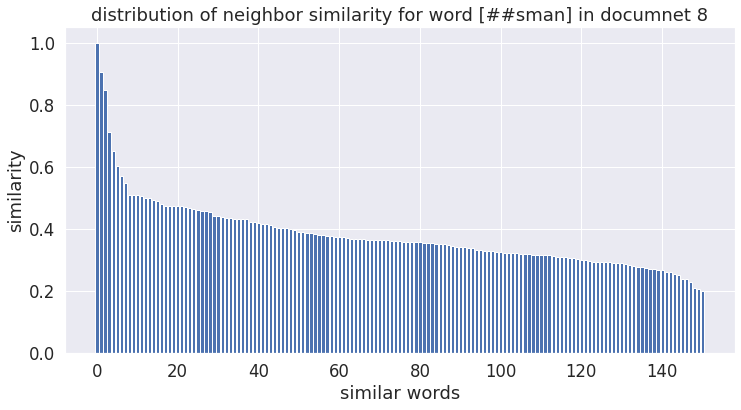

31   -->  ##tle
1690
[0.9999999, 0.8486042, 0.83816653, 0.6342964, 0.62941873, 0.607126, 0.5722177, 0.54510415, 0.50616926, 0.4974205, 0.4882282, 0.48621142, 0.48354086, 0.482952, 0.47464275, 0.47215247, 0.47214192, 0.46957707, 0.4661077, 0.46491715, 0.46136507, 0.4589107, 0.45613098, 0.45467135, 0.45444217, 0.45397934, 0.45134744, 0.44779545, 0.4474903, 0.4462852, 0.43874696, 0.43703884, 0.43632737, 0.4348454, 0.43407202, 0.43049482, 0.42408997, 0.42404148, 0.4216625, 0.42013785, 0.41724694, 0.41604537, 0.4151523, 0.41319907, 0.41168103, 0.41049036, 0.40869913, 0.40816528, 0.40617406, 0.40564603, 0.40533793, 0.40058577, 0.39928508, 0.39600953, 0.39390442, 0.39308447, 0.39002728, 0.38990355, 0.38853735, 0.38853192, 0.3866548, 0.3864426, 0.38481224, 0.38399333, 0.38361868, 0.3821168, 0.38205546, 0.3796767, 0.37952426, 0.37811616, 0.37769145, 0.3765076, 0.37586606, 0.37466705, 0.37339288, 0.37268066, 0.37190425, 0.3711909, 0.3705247, 0.37028813, 0.37017706, 0.3682311, 0.3675534, 0.367504

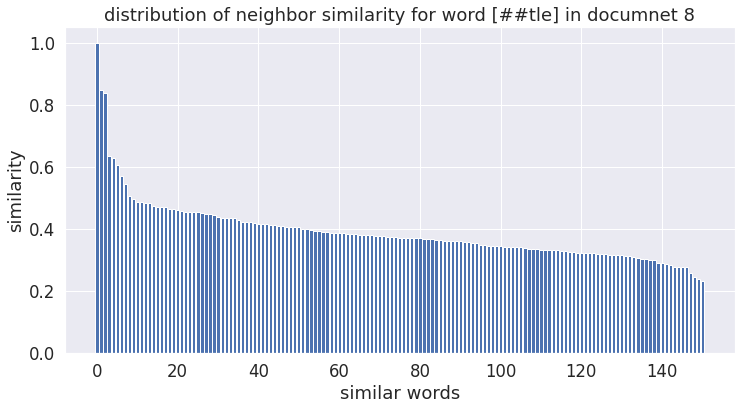

33   -->  disgrace
1690
[0.99999994, 0.82181996, 0.711535, 0.683388, 0.62941873, 0.6099481, 0.5824607, 0.56365347, 0.5331961, 0.53007305, 0.5205549, 0.517708, 0.5176419, 0.5036601, 0.50243545, 0.4920889, 0.49082607, 0.4894176, 0.4886365, 0.4823784, 0.47844818, 0.47383407, 0.4737352, 0.4727561, 0.46795323, 0.4676266, 0.46717015, 0.464934, 0.46418697, 0.46085152, 0.4561591, 0.45378035, 0.45328102, 0.45284647, 0.45198727, 0.4421664, 0.43853596, 0.43701255, 0.4365248, 0.43527532, 0.43186626, 0.42730218, 0.42547897, 0.4253837, 0.42214954, 0.4202282, 0.41978422, 0.41762733, 0.41521293, 0.4150283, 0.41496426, 0.41074917, 0.40921625, 0.40355733, 0.40342176, 0.40283638, 0.40027002, 0.3980857, 0.3979187, 0.39532262, 0.39264792, 0.39221117, 0.39156428, 0.3891356, 0.3873447, 0.38174456, 0.38124683, 0.38043836, 0.3802233, 0.37841046, 0.37821198, 0.3780852, 0.37564364, 0.37500554, 0.37437877, 0.37421462, 0.3712291, 0.3638351, 0.36371723, 0.3607163, 0.36041588, 0.3602713, 0.35995507, 0.35974774, 0.35

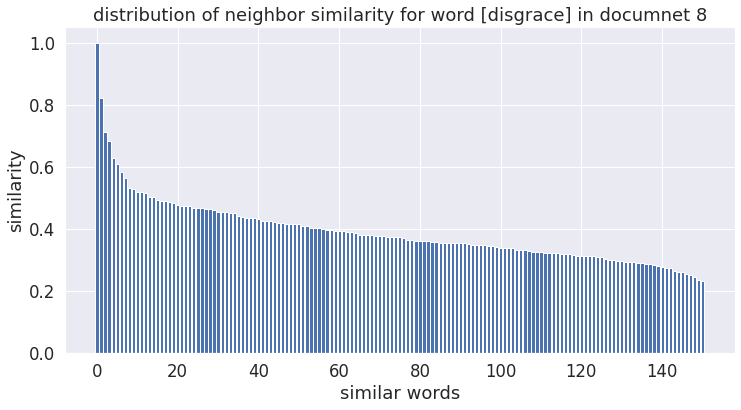

34   -->  ##d
1690
[1.0, 0.82181996, 0.6514455, 0.6317373, 0.61607563, 0.607126, 0.5750727, 0.5612402, 0.5565283, 0.53959274, 0.53665876, 0.5272046, 0.5211868, 0.5205084, 0.515721, 0.51295686, 0.51026833, 0.50858045, 0.50081056, 0.49739087, 0.49171704, 0.4861722, 0.48070166, 0.48055184, 0.47901368, 0.47764686, 0.47755504, 0.47237676, 0.47059345, 0.470281, 0.4679468, 0.4679433, 0.46613663, 0.464974, 0.46295953, 0.460577, 0.45871913, 0.45341718, 0.44974804, 0.4471085, 0.44673032, 0.44507468, 0.44201183, 0.44102544, 0.43908256, 0.43803328, 0.43642515, 0.43514013, 0.43020606, 0.4289676, 0.4276741, 0.42747805, 0.42145982, 0.42020452, 0.4197119, 0.41735205, 0.41663906, 0.41508386, 0.41204953, 0.40887934, 0.40579683, 0.40439785, 0.404372, 0.40375024, 0.40251952, 0.39897394, 0.3966663, 0.39632314, 0.39420563, 0.3938213, 0.39312175, 0.39123526, 0.3907172, 0.38949266, 0.3892765, 0.38826728, 0.38780695, 0.38638753, 0.3862747, 0.3857739, 0.38567734, 0.38549718, 0.38360488, 0.38350207, 0.3798285, 0

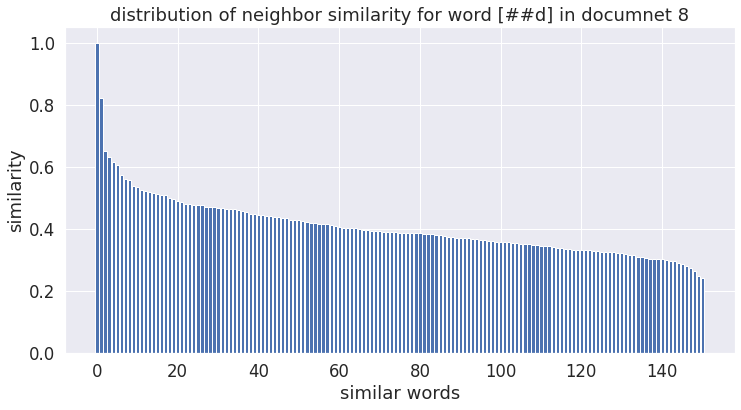

35   -->  party
1690
[0.72498095, 0.70836216, 0.64438736, 0.6150842, 0.607389, 0.59781957, 0.58398, 0.5824358, 0.57946837, 0.576424, 0.5662826, 0.56206435, 0.56002903, 0.5537822, 0.548401, 0.5400465, 0.53368986, 0.5320256, 0.52651393, 0.52434015, 0.5230485, 0.5135069, 0.51104456, 0.50993, 0.50572455, 0.50441676, 0.50364745, 0.5017587, 0.4969976, 0.49535674, 0.4846298, 0.482013, 0.47973534, 0.4796052, 0.47842115, 0.47290516, 0.47102875, 0.46909818, 0.46628305, 0.46626893, 0.46586394, 0.46371713, 0.46348673, 0.46200293, 0.46191663, 0.4613587, 0.46135607, 0.45992503, 0.45750096, 0.4553632, 0.451669, 0.45054328, 0.44732046, 0.44355232, 0.4423409, 0.44233012, 0.44030255, 0.43891287, 0.43841112, 0.438065, 0.4366062, 0.4362267, 0.43227565, 0.4313954, 0.43124777, 0.42946836, 0.42706996, 0.42670953, 0.4261397, 0.42350054, 0.42348057, 0.42329288, 0.42299616, 0.41659015, 0.41633514, 0.4162594, 0.4092337, 0.4071232, 0.40504417, 0.40183818, 0.3990207, 0.39733937, 0.3941551, 0.39339787, 0.39227694, 

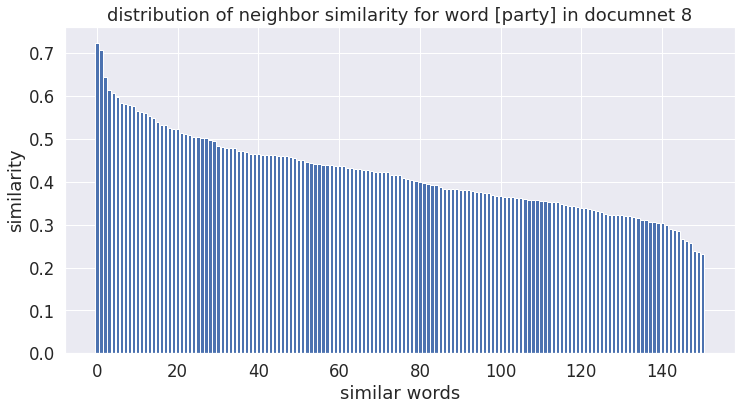

36   -->  even
1690
[0.6458075, 0.5995575, 0.5728843, 0.56841636, 0.56174153, 0.5472858, 0.5424898, 0.5354881, 0.53104067, 0.52949536, 0.5234895, 0.5223334, 0.521549, 0.51100403, 0.50953907, 0.5052612, 0.50208426, 0.500759, 0.5005672, 0.50009096, 0.49911505, 0.49764723, 0.49602807, 0.4903915, 0.4889192, 0.4869371, 0.48646295, 0.48606694, 0.48466003, 0.4835459, 0.48242712, 0.47313154, 0.4720788, 0.46823743, 0.46330014, 0.46324486, 0.46068472, 0.45984888, 0.45201933, 0.45072684, 0.44942775, 0.44828734, 0.44789866, 0.44639438, 0.44556603, 0.44489822, 0.44428426, 0.44416273, 0.44291073, 0.4415551, 0.43782127, 0.43720484, 0.43450248, 0.43381083, 0.4318487, 0.43123484, 0.4269004, 0.4245964, 0.42453212, 0.42436984, 0.42108983, 0.41346025, 0.41036195, 0.4083615, 0.40312868, 0.4012534, 0.40099233, 0.40040147, 0.39887142, 0.39682597, 0.39641204, 0.39464867, 0.3919454, 0.38931668, 0.3887353, 0.38837123, 0.38579708, 0.38544905, 0.38440782, 0.3829162, 0.38246685, 0.38217178, 0.37804264, 0.37754947,

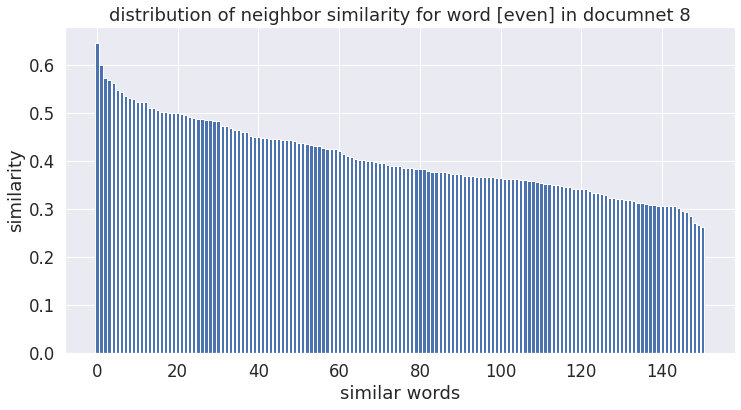

38   -->  free
1690
[0.9999999, 0.68812394, 0.63845205, 0.60752517, 0.59186697, 0.5585121, 0.5565283, 0.54867893, 0.5347768, 0.5331961, 0.5329635, 0.53004813, 0.52625716, 0.51485574, 0.5098499, 0.5097777, 0.50878954, 0.5036669, 0.49966708, 0.49772954, 0.4966358, 0.49046403, 0.4889367, 0.48735535, 0.48699176, 0.4844276, 0.48237094, 0.48047403, 0.47801405, 0.4748057, 0.47427094, 0.4728483, 0.4695688, 0.46291494, 0.4623891, 0.46157008, 0.46136507, 0.45874774, 0.4575414, 0.45480672, 0.45267516, 0.45215815, 0.4408374, 0.43988353, 0.43841165, 0.43456542, 0.43059373, 0.4297824, 0.4219075, 0.42163032, 0.42014658, 0.42005002, 0.41939604, 0.41863948, 0.41835344, 0.41513282, 0.412041, 0.41088894, 0.40880087, 0.40788227, 0.4062413, 0.40493238, 0.40351185, 0.40313447, 0.40051937, 0.39949912, 0.39649493, 0.39590186, 0.3942246, 0.393539, 0.39307374, 0.39184558, 0.39002007, 0.38915733, 0.38799408, 0.38700724, 0.38573372, 0.38540304, 0.38172495, 0.38066432, 0.3798162, 0.37896806, 0.3787871, 0.3778016, 

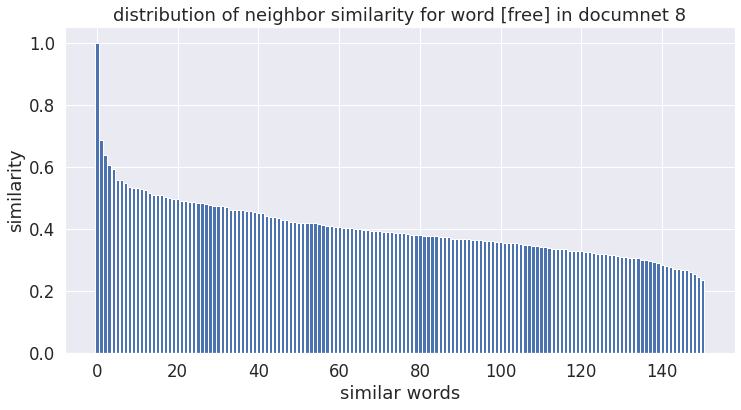

39   -->  elections
1690
[0.7685361, 0.71220315, 0.64784795, 0.563084, 0.5619465, 0.5547162, 0.5539689, 0.5513953, 0.5425531, 0.53532386, 0.53406286, 0.5340625, 0.5237361, 0.5222744, 0.520354, 0.5028852, 0.49828362, 0.49759918, 0.49146754, 0.49024332, 0.4829114, 0.47895467, 0.47753984, 0.47459146, 0.4716726, 0.47130686, 0.46567518, 0.4603416, 0.4523925, 0.44914973, 0.4463844, 0.4457903, 0.44117463, 0.44051594, 0.43700284, 0.435189, 0.43314615, 0.42583555, 0.42576706, 0.4240986, 0.41978866, 0.4173891, 0.41215622, 0.41145116, 0.40971464, 0.4094116, 0.40937713, 0.40872052, 0.40869415, 0.40679872, 0.40493232, 0.40449384, 0.40408936, 0.40101373, 0.40094274, 0.4003164, 0.3990243, 0.3983443, 0.39652526, 0.39447182, 0.3903281, 0.38908067, 0.38894403, 0.38880605, 0.3838753, 0.38149709, 0.3783176, 0.37818533, 0.37773648, 0.37490943, 0.3746131, 0.3744346, 0.371716, 0.3712554, 0.3691851, 0.36506206, 0.36269486, 0.3588982, 0.35826576, 0.35753894, 0.35671604, 0.3560058, 0.3551831, 0.3551156, 0.35373

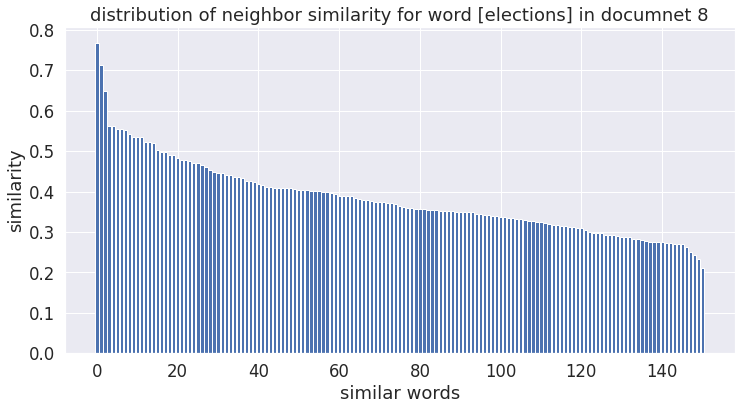

41   -->  held
1690
[0.7425971, 0.7077652, 0.65107954, 0.5935676, 0.5810951, 0.5702426, 0.48515335, 0.4726305, 0.46923804, 0.46917313, 0.46751696, 0.4603658, 0.457438, 0.45106384, 0.44732526, 0.44495064, 0.43705514, 0.4368133, 0.43125793, 0.42886293, 0.42659765, 0.42432308, 0.42038304, 0.41975293, 0.4194795, 0.41837963, 0.41664574, 0.41065297, 0.40923697, 0.403453, 0.39823675, 0.39688572, 0.39435357, 0.39277333, 0.39237976, 0.3884886, 0.38818187, 0.38769454, 0.38107267, 0.38088363, 0.37882972, 0.3770885, 0.37614262, 0.37503198, 0.37414503, 0.3737081, 0.3735913, 0.3731795, 0.36978707, 0.36847574, 0.36813158, 0.36810422, 0.36701518, 0.364588, 0.3640235, 0.36348742, 0.36237067, 0.3621118, 0.3601038, 0.35760832, 0.35733244, 0.35620886, 0.3535206, 0.35293812, 0.35250676, 0.34824216, 0.34802788, 0.34786105, 0.3476354, 0.3467744, 0.3460196, 0.34371367, 0.34250173, 0.33893526, 0.3340705, 0.3338037, 0.3330769, 0.3303584, 0.32912284, 0.32870317, 0.32746658, 0.32738662, 0.32416934, 0.32299396, 0.

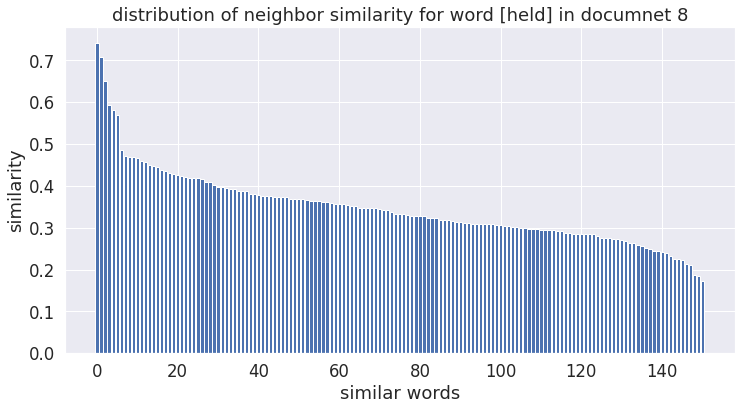

43   -->  april
1690
[1.0, 0.68812394, 0.53268456, 0.53007305, 0.5205084, 0.5157373, 0.51135707, 0.509965, 0.5086709, 0.5085699, 0.5022074, 0.5006387, 0.50045866, 0.4996934, 0.49962938, 0.49235037, 0.4921115, 0.49139476, 0.4882776, 0.4819293, 0.47874606, 0.47838247, 0.4752016, 0.47250515, 0.47214192, 0.46928725, 0.46801305, 0.46755463, 0.4654508, 0.46387017, 0.461057, 0.45917755, 0.4588912, 0.4521777, 0.45115456, 0.4467713, 0.43602017, 0.43307817, 0.43259108, 0.43155265, 0.4275065, 0.42637587, 0.42218196, 0.4219931, 0.4210233, 0.42044812, 0.4170332, 0.41298503, 0.4089557, 0.40807396, 0.40599048, 0.40385702, 0.40242285, 0.40116143, 0.39977345, 0.39959398, 0.39755493, 0.39545888, 0.3941204, 0.39252543, 0.39157498, 0.38844866, 0.38699558, 0.38632083, 0.37454575, 0.37452173, 0.37405306, 0.37165165, 0.37106615, 0.37030348, 0.36887112, 0.36881208, 0.36452115, 0.36337593, 0.36106133, 0.3572798, 0.35561538, 0.35089988, 0.35046673, 0.34816936, 0.3478021, 0.3462251, 0.34265047, 0.33902282, 0.338

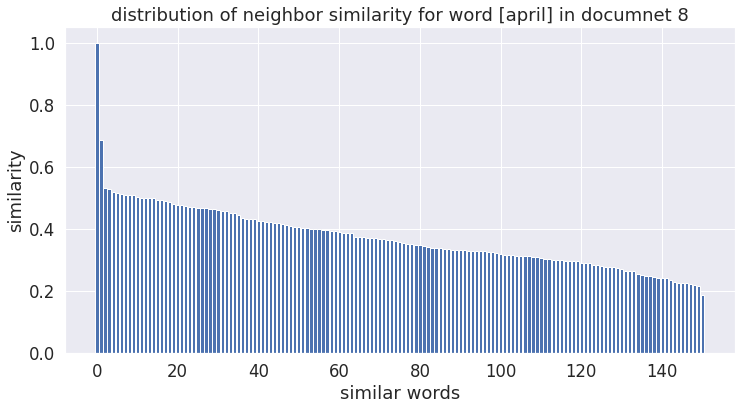

45   -->  late
1690
[1.0, 0.874387, 0.843736, 0.6768987, 0.6669003, 0.64028084, 0.6360377, 0.63587916, 0.63203686, 0.5989906, 0.5988829, 0.5940993, 0.5927092, 0.59106314, 0.5742608, 0.55628335, 0.55594593, 0.5293622, 0.52621406, 0.523453, 0.51776874, 0.51311284, 0.5130705, 0.5059102, 0.5018497, 0.49313375, 0.48571333, 0.47874606, 0.47508562, 0.46212712, 0.45809692, 0.44299355, 0.4408374, 0.43849728, 0.4254498, 0.40980765, 0.40002626, 0.39828134, 0.3980299, 0.39350158, 0.39045703, 0.38949266, 0.3885709, 0.3865325, 0.3842973, 0.37888664, 0.37883207, 0.37727454, 0.37263036, 0.37155753, 0.36600062, 0.36420745, 0.3637674, 0.35596234, 0.3465443, 0.34506258, 0.34466845, 0.3412403, 0.34097373, 0.3395967, 0.33958673, 0.33504486, 0.33388042, 0.3288473, 0.32493895, 0.3236456, 0.32296693, 0.32240474, 0.32163405, 0.32130522, 0.31875205, 0.3182708, 0.3169549, 0.31537372, 0.30856496, 0.30640927, 0.30405715, 0.30374664, 0.3032868, 0.3011776, 0.29895213, 0.2980188, 0.29737982, 0.2948459, 0.2937659, 0.2

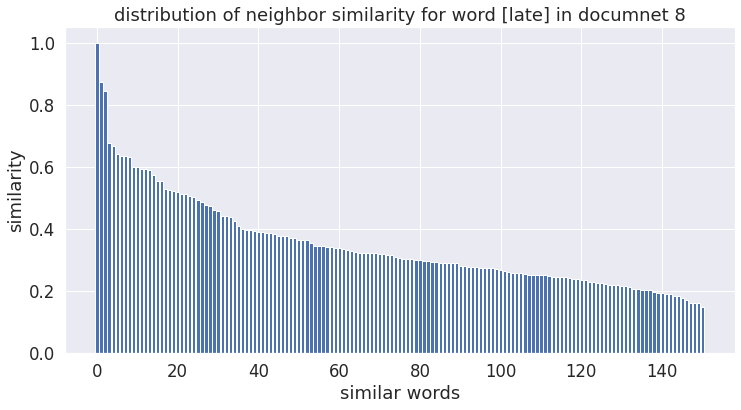

46   -->  saturday
1690
[0.99999976, 0.874387, 0.8364067, 0.6415967, 0.6269548, 0.5850971, 0.5837591, 0.5779271, 0.5708351, 0.5685588, 0.5662539, 0.56133276, 0.5561987, 0.5329375, 0.5227859, 0.51135707, 0.5104461, 0.51042503, 0.49885547, 0.49874538, 0.4915375, 0.47801405, 0.47582287, 0.47134697, 0.46852937, 0.46577233, 0.46383482, 0.4616833, 0.43031403, 0.42515904, 0.4227413, 0.42090786, 0.41345707, 0.40909544, 0.40902966, 0.39840013, 0.39598003, 0.37878132, 0.3760248, 0.37421462, 0.37179494, 0.36722267, 0.36486828, 0.36228722, 0.35806108, 0.3559295, 0.3557047, 0.35383564, 0.35306394, 0.352963, 0.34943002, 0.34318262, 0.3388408, 0.33453816, 0.33118862, 0.32834256, 0.32316303, 0.32168978, 0.3205065, 0.31992555, 0.3194218, 0.31898162, 0.3166622, 0.31462136, 0.31300765, 0.30604085, 0.30493236, 0.30476475, 0.30352265, 0.30262822, 0.30170217, 0.30162004, 0.30050558, 0.29949713, 0.29791045, 0.29775748, 0.2938199, 0.2936633, 0.2927677, 0.292616, 0.29194272, 0.2855581, 0.28479022, 0.2846034, 0

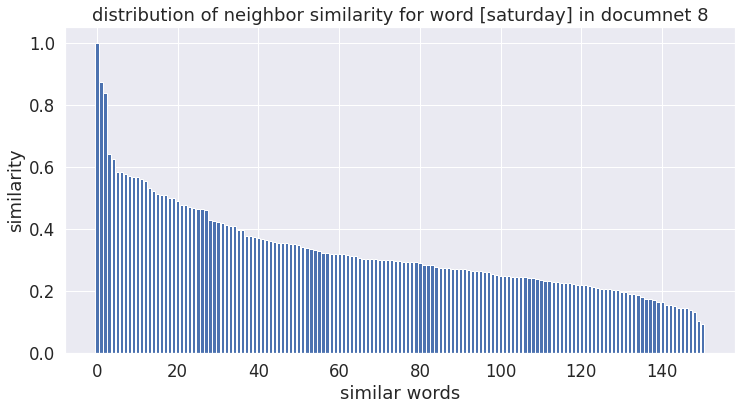

47   -->  night
1690
[0.99999994, 0.843736, 0.8364067, 0.65536255, 0.6508906, 0.63937116, 0.6245843, 0.61929727, 0.61512184, 0.6081399, 0.6021235, 0.5820727, 0.5792165, 0.56833494, 0.5670165, 0.5643892, 0.5577284, 0.55753404, 0.5543077, 0.5480141, 0.5463008, 0.5283056, 0.52520674, 0.52313834, 0.5206287, 0.5157373, 0.5134852, 0.50924695, 0.49749586, 0.48354, 0.47172853, 0.46157008, 0.44102544, 0.44009084, 0.43444163, 0.43355075, 0.42889243, 0.424159, 0.41978422, 0.41387314, 0.41372734, 0.41167268, 0.40816528, 0.40234202, 0.4014663, 0.39965427, 0.39469784, 0.39093167, 0.38656437, 0.38334593, 0.38143653, 0.38080066, 0.37970793, 0.37612432, 0.37313223, 0.37244597, 0.37214953, 0.37076592, 0.3696817, 0.36964294, 0.36876446, 0.36671576, 0.35942295, 0.35816735, 0.35594174, 0.35556027, 0.3540161, 0.35392818, 0.35034555, 0.34634596, 0.3429305, 0.34074014, 0.34010363, 0.33553517, 0.33444047, 0.33423027, 0.32998654, 0.3297944, 0.327459, 0.32646513, 0.3250526, 0.31919, 0.31918693, 0.31864864, 0.315

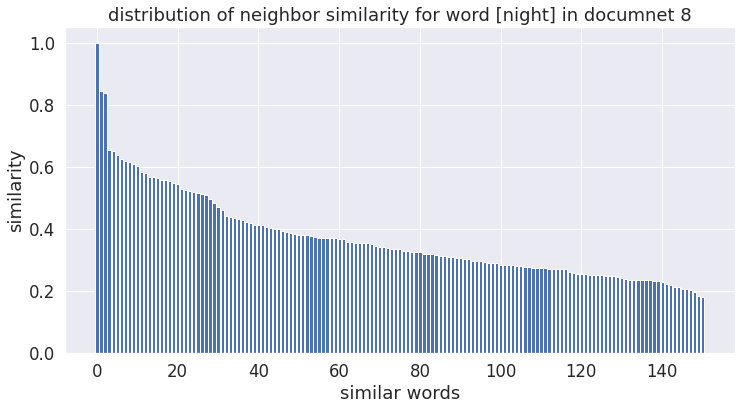

50   -->  group
1690
[0.99999994, 0.7321294, 0.72771275, 0.7200379, 0.66967016, 0.6669003, 0.65536255, 0.60818183, 0.6024475, 0.58566797, 0.5849335, 0.5837591, 0.58227473, 0.55781436, 0.5446309, 0.5402615, 0.53268397, 0.5276525, 0.5260419, 0.5233691, 0.51603806, 0.5041688, 0.49704725, 0.49259025, 0.48217717, 0.48198456, 0.47071612, 0.46857816, 0.4483486, 0.44665027, 0.44306368, 0.43671012, 0.43439272, 0.41511363, 0.40986335, 0.40749356, 0.40742964, 0.40226626, 0.39759964, 0.39689797, 0.3964546, 0.38611424, 0.3845574, 0.37585294, 0.3691767, 0.36525422, 0.3648891, 0.35977742, 0.3592651, 0.3588068, 0.35626984, 0.35561538, 0.354474, 0.34808615, 0.3463182, 0.3408965, 0.33649504, 0.33141464, 0.33119208, 0.33052596, 0.32618505, 0.32612014, 0.32416812, 0.3224474, 0.32241902, 0.31826806, 0.3153599, 0.3151394, 0.3120317, 0.31160343, 0.30978298, 0.307328, 0.30669934, 0.30642855, 0.30553243, 0.302739, 0.29795623, 0.2978321, 0.29773778, 0.29414278, 0.29347497, 0.29273027, 0.2906326, 0.2901234, 0.28

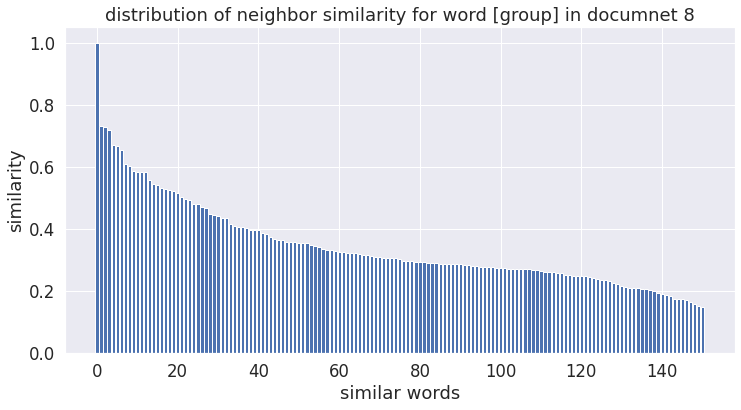

52   -->  party
1690
[0.6806619, 0.6584573, 0.6451431, 0.612448, 0.61213315, 0.59520257, 0.5874052, 0.5763713, 0.5690882, 0.5671371, 0.5557712, 0.55516374, 0.5334062, 0.5323792, 0.5153352, 0.5144866, 0.50808865, 0.50757205, 0.5067401, 0.50558704, 0.5007129, 0.49890047, 0.4960383, 0.49283594, 0.49221438, 0.48602062, 0.482426, 0.47990605, 0.4738762, 0.46989873, 0.46659285, 0.4652901, 0.46501577, 0.46203348, 0.45733628, 0.4569146, 0.45517606, 0.4526137, 0.45002836, 0.44724447, 0.44591117, 0.4458142, 0.44262284, 0.43949834, 0.4393293, 0.43735728, 0.43523124, 0.4286537, 0.42740014, 0.42727202, 0.42534894, 0.41956723, 0.4159056, 0.41227263, 0.40812972, 0.40776637, 0.40570593, 0.40216154, 0.40073663, 0.3985991, 0.3928278, 0.38912624, 0.38710973, 0.3861509, 0.3855806, 0.38371253, 0.3827771, 0.38187844, 0.38148758, 0.3785309, 0.37848133, 0.37845954, 0.37796843, 0.37591827, 0.37305826, 0.37227383, 0.37186927, 0.37012723, 0.36804354, 0.3666172, 0.3659308, 0.36591107, 0.36566103, 0.36512214, 0.359

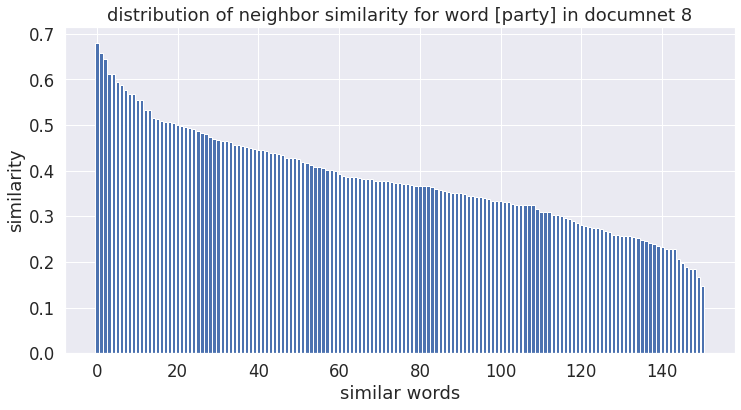

53   -->  officials
1690
[0.78991085, 0.7437602, 0.7065527, 0.7023394, 0.68866897, 0.6867534, 0.68351024, 0.6436167, 0.61474085, 0.6107366, 0.60910594, 0.6088123, 0.6044587, 0.58606046, 0.58173406, 0.58065355, 0.56865764, 0.56351876, 0.5575993, 0.5473925, 0.5361701, 0.5334777, 0.53345793, 0.525758, 0.52449036, 0.5215945, 0.51764476, 0.5051202, 0.501144, 0.5004778, 0.4953266, 0.4940417, 0.49341887, 0.4898633, 0.48729742, 0.4862623, 0.47684973, 0.46444166, 0.45969042, 0.45513657, 0.4506185, 0.44732893, 0.44692093, 0.43951324, 0.4294659, 0.4290777, 0.4276517, 0.42034078, 0.4182008, 0.41777718, 0.41639277, 0.41273344, 0.41006684, 0.40429607, 0.40146157, 0.39512485, 0.39399678, 0.38904756, 0.38841295, 0.38784572, 0.38397533, 0.37868762, 0.37251633, 0.36968073, 0.369031, 0.36859322, 0.36851355, 0.36796016, 0.36724764, 0.3668734, 0.3665579, 0.36538795, 0.36197874, 0.3592574, 0.35793614, 0.35539347, 0.3538581, 0.35109025, 0.3499658, 0.34646595, 0.34631056, 0.34486583, 0.34330392, 0.34184998, 0

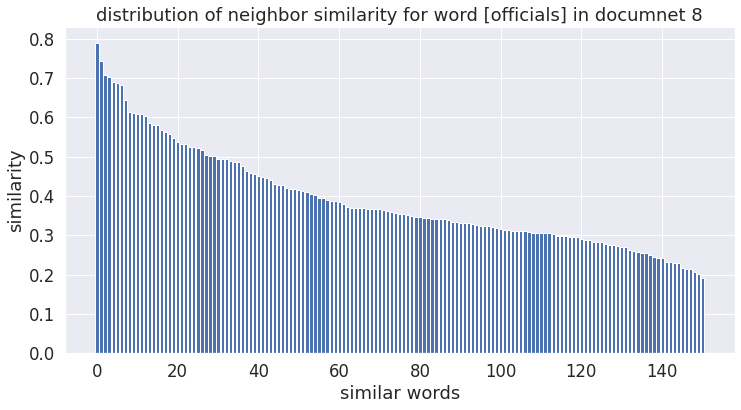

55   -->  many
1690
[0.875962, 0.8291819, 0.758495, 0.6734636, 0.61835045, 0.5989876, 0.5978435, 0.5973313, 0.592533, 0.5878099, 0.5804124, 0.5790533, 0.57048416, 0.56815636, 0.56789446, 0.56728685, 0.56690127, 0.56568, 0.5640858, 0.56403774, 0.562462, 0.5616767, 0.56030124, 0.55603325, 0.54389876, 0.5433452, 0.5381182, 0.52637315, 0.52114356, 0.5165814, 0.5158049, 0.5136449, 0.505029, 0.50428164, 0.4978596, 0.4956453, 0.49165964, 0.49134415, 0.48883677, 0.48330727, 0.48315614, 0.4818717, 0.48147833, 0.47917855, 0.4772008, 0.47611734, 0.47318152, 0.46159106, 0.45593965, 0.4547196, 0.45259014, 0.45103076, 0.4510156, 0.4469325, 0.44584396, 0.44496787, 0.44490466, 0.44180357, 0.43974853, 0.43967748, 0.43896008, 0.4336209, 0.43337563, 0.4333195, 0.432559, 0.43176872, 0.431678, 0.4310158, 0.42979005, 0.42905086, 0.42691317, 0.42578116, 0.42384428, 0.42257893, 0.41983238, 0.4197047, 0.414802, 0.41226485, 0.4088919, 0.40829843, 0.40817574, 0.40740117, 0.40681657, 0.40215617, 0.40014616, 0.398

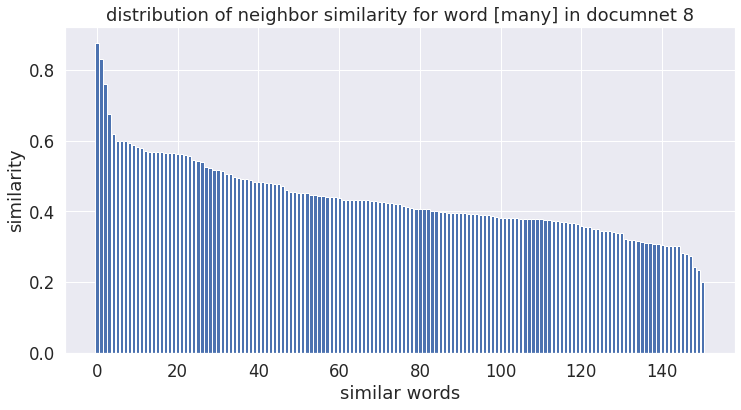

58   -->  quickly
1690
[1.0, 0.8256734, 0.8205688, 0.63752854, 0.61542004, 0.61411405, 0.61139715, 0.6047058, 0.59179264, 0.58340776, 0.5833616, 0.5685981, 0.5654522, 0.5552916, 0.55013394, 0.5500405, 0.54886997, 0.5446309, 0.53449166, 0.53353155, 0.5277811, 0.52641773, 0.52122927, 0.5201658, 0.51618075, 0.5134852, 0.5131712, 0.50953573, 0.5056864, 0.50514174, 0.50081056, 0.4976338, 0.49464458, 0.49313375, 0.4905486, 0.49020606, 0.48903942, 0.48887813, 0.48743623, 0.48717114, 0.4756097, 0.4737352, 0.47250515, 0.47215247, 0.47143528, 0.46762928, 0.46551114, 0.46360952, 0.46188647, 0.45800662, 0.45746744, 0.4546886, 0.45352617, 0.44669554, 0.44624758, 0.44348907, 0.44182473, 0.44068074, 0.43567127, 0.4346696, 0.43391556, 0.4325777, 0.4319225, 0.43089598, 0.4305483, 0.4294423, 0.4282772, 0.42786467, 0.42742872, 0.42593235, 0.42569253, 0.42565063, 0.42529112, 0.422694, 0.4198565, 0.41939604, 0.41740072, 0.41596454, 0.41431838, 0.41392714, 0.41345707, 0.40967864, 0.4080161, 0.40702254, 0.40

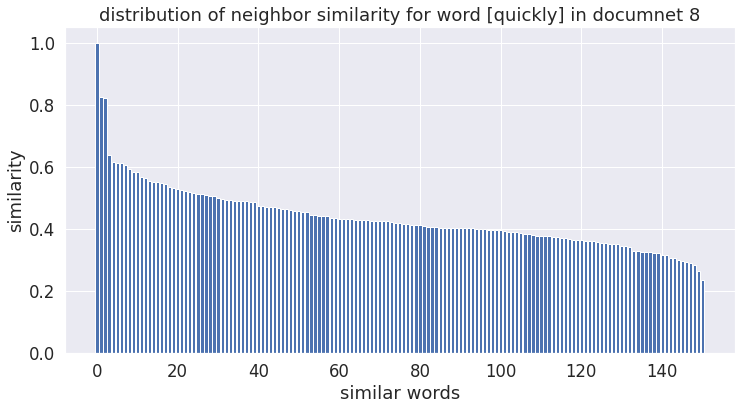

59   -->  severed
1690
[1.0, 0.8256734, 0.7812631, 0.7515303, 0.74713254, 0.6236722, 0.6217934, 0.6165464, 0.5824449, 0.5550637, 0.54825723, 0.5453826, 0.5405262, 0.53279316, 0.5296484, 0.5233691, 0.5204453, 0.5188136, 0.5160949, 0.51270145, 0.5104178, 0.5071596, 0.5044896, 0.501038, 0.4948265, 0.4929273, 0.49217606, 0.4833035, 0.47508562, 0.47464275, 0.47172853, 0.47029632, 0.47005928, 0.46935835, 0.46772677, 0.46734065, 0.46295953, 0.4626113, 0.460199, 0.45870185, 0.45639688, 0.45502156, 0.44880754, 0.4458613, 0.44474605, 0.4445634, 0.44429612, 0.44387528, 0.44347203, 0.44246578, 0.4418252, 0.43952167, 0.4365248, 0.4334566, 0.43127316, 0.42996016, 0.4267903, 0.42299008, 0.42065108, 0.41905493, 0.41774046, 0.4137631, 0.41202825, 0.40887156, 0.40735555, 0.4052233, 0.40410453, 0.40356952, 0.40021175, 0.39859998, 0.39840013, 0.39598683, 0.3958599, 0.39458472, 0.39443395, 0.39403304, 0.3911851, 0.38986722, 0.3892086, 0.38866192, 0.3882619, 0.38691384, 0.38597858, 0.3855848, 0.3855138, 0.3

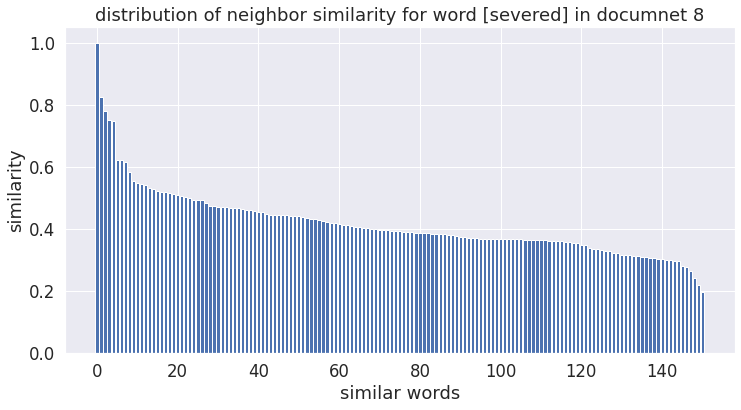

61   -->  relationship
1690
[1.0000002, 0.81989217, 0.7812631, 0.61411405, 0.585713, 0.57715106, 0.56744456, 0.52037394, 0.5003758, 0.4845435, 0.47590825, 0.47543314, 0.47093046, 0.4591779, 0.45864984, 0.45666635, 0.44327936, 0.4415788, 0.43934208, 0.43815655, 0.43712828, 0.43137336, 0.42922074, 0.4272294, 0.4232372, 0.42243445, 0.4201312, 0.4192962, 0.41724932, 0.41663906, 0.4148449, 0.41198778, 0.41137055, 0.41090047, 0.40951174, 0.40880257, 0.4045735, 0.40226626, 0.40146935, 0.39505595, 0.3945303, 0.3940885, 0.3939448, 0.38841647, 0.38699818, 0.38631266, 0.38590416, 0.38321608, 0.38213795, 0.3819008, 0.37994134, 0.37888753, 0.3785584, 0.3775118, 0.37693885, 0.37287605, 0.3705247, 0.36849165, 0.3683022, 0.36754704, 0.36465007, 0.36371723, 0.36182117, 0.35720813, 0.35708025, 0.35650128, 0.35594174, 0.3557387, 0.354505, 0.35175228, 0.34822991, 0.34711283, 0.34645432, 0.34506258, 0.34349075, 0.34209335, 0.3413703, 0.3404501, 0.33974275, 0.3393419, 0.337035, 0.3369583, 0.33648133, 0.3364

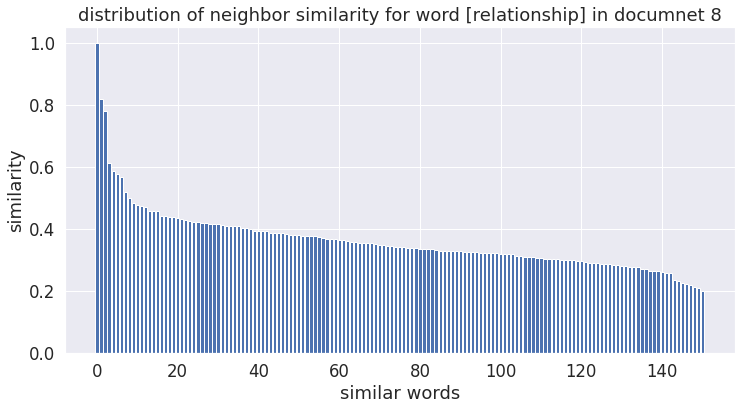

64   -->  ce
1690
[0.77796566, 0.6760082, 0.654982, 0.65494764, 0.6485013, 0.62376165, 0.6141886, 0.6128166, 0.60852015, 0.601995, 0.59645724, 0.57627845, 0.5578995, 0.55184084, 0.54824543, 0.5378085, 0.5330333, 0.53218275, 0.5299087, 0.5278642, 0.5273795, 0.5206568, 0.51724756, 0.50956047, 0.50569504, 0.5056459, 0.49629095, 0.4961752, 0.4951486, 0.49460164, 0.48719862, 0.4835382, 0.48347196, 0.4826184, 0.4821216, 0.4804632, 0.47912115, 0.4760881, 0.46887887, 0.46845204, 0.46559677, 0.46497497, 0.4646306, 0.46398568, 0.46094447, 0.4571814, 0.45464396, 0.4521175, 0.45161968, 0.45032316, 0.44267073, 0.44220105, 0.43621498, 0.43332714, 0.43325862, 0.43244326, 0.43134624, 0.4301598, 0.42411733, 0.41892806, 0.41868684, 0.4132976, 0.4103189, 0.40756375, 0.40743113, 0.40547988, 0.40324372, 0.40014023, 0.3993196, 0.39897633, 0.39462602, 0.39173314, 0.39164233, 0.39117008, 0.39014885, 0.388509, 0.38536027, 0.38320446, 0.38272095, 0.38172907, 0.3814685, 0.38020456, 0.37947503, 0.3786217, 0.37265

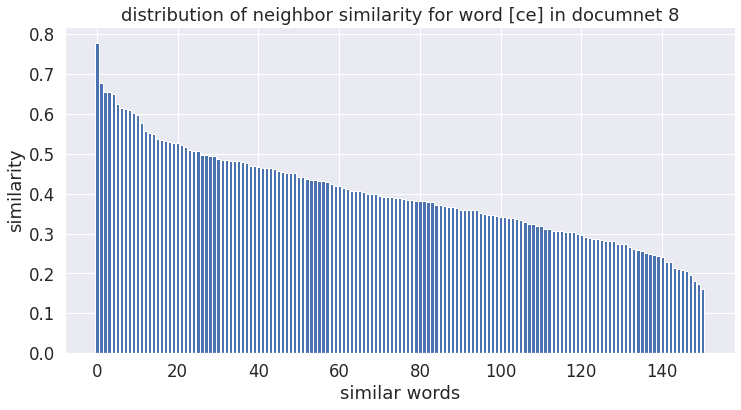

65   -->  ##aus
1690
[0.7425707, 0.6862985, 0.6088869, 0.60393935, 0.5924189, 0.5729178, 0.56594324, 0.56044436, 0.55868006, 0.55321276, 0.54949784, 0.5463681, 0.5450608, 0.53337806, 0.5205865, 0.50712633, 0.47916237, 0.46605402, 0.46189103, 0.4617421, 0.4605883, 0.4599106, 0.45958954, 0.45882913, 0.45374316, 0.4434912, 0.44146213, 0.4409887, 0.4379749, 0.43598527, 0.431601, 0.43103403, 0.42908683, 0.4280528, 0.42637566, 0.4250241, 0.42413655, 0.42382652, 0.42372423, 0.41745335, 0.41526973, 0.40160033, 0.3993825, 0.39505035, 0.38654006, 0.38511837, 0.3794441, 0.37456495, 0.37418866, 0.37209487, 0.36934733, 0.36751485, 0.3674337, 0.36545613, 0.36445484, 0.36349624, 0.3629313, 0.3608676, 0.35995433, 0.3582942, 0.35695225, 0.35503677, 0.3535372, 0.35148492, 0.35123408, 0.34939337, 0.34785283, 0.34021127, 0.34003577, 0.33894074, 0.3385101, 0.33748633, 0.33552358, 0.3354938, 0.3342598, 0.33412403, 0.3329414, 0.33258706, 0.3317017, 0.32752195, 0.3265403, 0.3264041, 0.325157, 0.32332253, 0.32

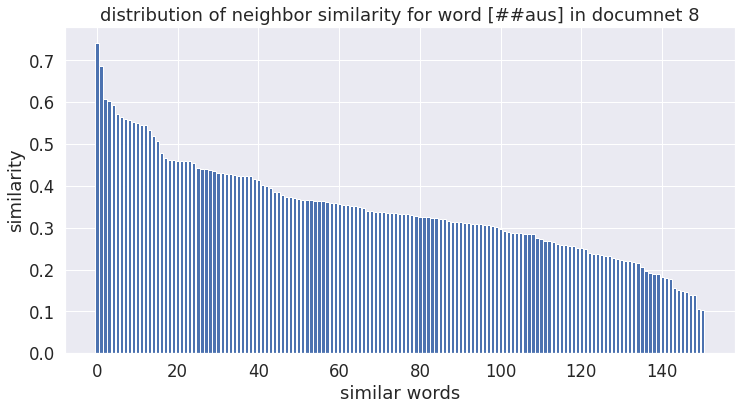

66   -->  ##escu
1690
[0.6719252, 0.66633755, 0.64695317, 0.6438068, 0.639815, 0.6347019, 0.6211425, 0.6160574, 0.6015201, 0.5996426, 0.55879515, 0.53528064, 0.5303874, 0.5268653, 0.52047443, 0.51526356, 0.51079565, 0.5106034, 0.5101289, 0.50857985, 0.5083164, 0.5047026, 0.5039209, 0.49631, 0.49538746, 0.49055868, 0.49024838, 0.48287785, 0.47601223, 0.47405708, 0.46819305, 0.46790963, 0.46771377, 0.46309406, 0.46247667, 0.45552248, 0.44787818, 0.44298315, 0.44098252, 0.44069028, 0.44045115, 0.43173018, 0.43024656, 0.43013996, 0.4270382, 0.42288882, 0.4226781, 0.42080793, 0.41922793, 0.41660202, 0.41608366, 0.41134754, 0.4101614, 0.40795112, 0.4062798, 0.4059775, 0.40425134, 0.40273535, 0.40226966, 0.39794907, 0.397779, 0.39773825, 0.39744145, 0.39591742, 0.39464778, 0.39380884, 0.39296514, 0.39113826, 0.38312864, 0.3816827, 0.38049608, 0.3788923, 0.3775375, 0.37554082, 0.37510425, 0.3693915, 0.36833078, 0.3679356, 0.36622214, 0.36577773, 0.36375505, 0.36156362, 0.35958064, 0.35824817, 

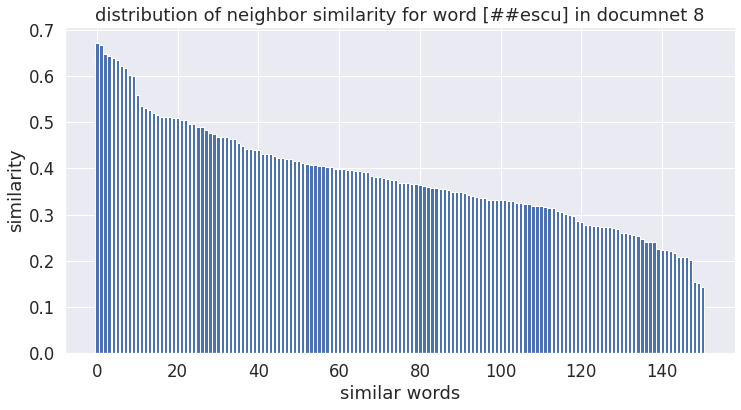

67   -->  dictatorship
1690
[0.7727022, 0.7610373, 0.7451012, 0.6928465, 0.66177857, 0.6583778, 0.657752, 0.6541915, 0.64404595, 0.64227283, 0.601396, 0.59447867, 0.5651325, 0.55310917, 0.55037355, 0.54740196, 0.5441844, 0.53817385, 0.5375123, 0.52626574, 0.5237063, 0.52149963, 0.5201954, 0.5189718, 0.5125468, 0.51234496, 0.5115557, 0.5101483, 0.50342333, 0.5032812, 0.5031364, 0.50248146, 0.50247633, 0.50196135, 0.4991747, 0.49785224, 0.49680528, 0.494318, 0.49405512, 0.49402452, 0.4854468, 0.4818955, 0.4804215, 0.47956797, 0.47787666, 0.4770372, 0.47690332, 0.47514763, 0.47245765, 0.47110242, 0.46746546, 0.4667894, 0.46426734, 0.4632655, 0.46319515, 0.4626995, 0.4621113, 0.45583028, 0.4552127, 0.45516643, 0.4512056, 0.45070928, 0.44292662, 0.43794048, 0.43678427, 0.43610752, 0.43469325, 0.43315217, 0.4311258, 0.43095914, 0.4296819, 0.4294386, 0.4289102, 0.42841363, 0.42539126, 0.42534566, 0.42216226, 0.42143947, 0.4195096, 0.41530633, 0.41374058, 0.41348726, 0.4129343, 0.4128476, 0.40

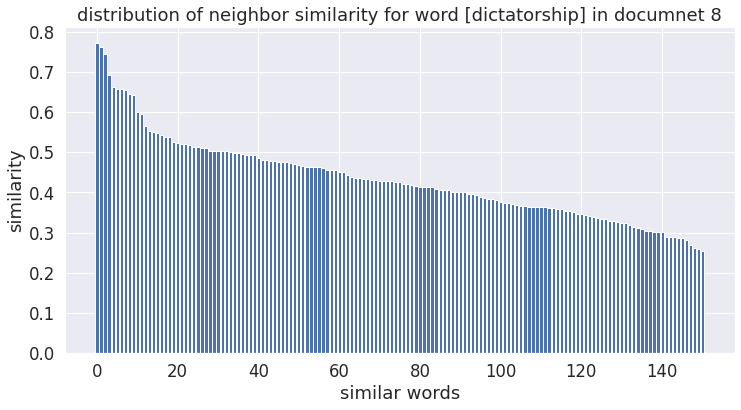

70   -->  popular
1690
[0.99999994, 0.8783416, 0.7744653, 0.77149755, 0.72833323, 0.71881735, 0.65202403, 0.60752517, 0.5650831, 0.5546228, 0.52800584, 0.5213895, 0.5148281, 0.5120955, 0.5101428, 0.51003957, 0.5097112, 0.50897783, 0.5073352, 0.49786597, 0.4948759, 0.49464458, 0.49235037, 0.49037075, 0.4861722, 0.48240435, 0.47844818, 0.4783513, 0.47529408, 0.47236282, 0.46935835, 0.4679727, 0.4609096, 0.4564737, 0.45139194, 0.45131296, 0.44798678, 0.44772646, 0.44472915, 0.4409817, 0.43835843, 0.437833, 0.43709022, 0.4349633, 0.43156666, 0.43142176, 0.43118045, 0.42799369, 0.42763963, 0.42520672, 0.42419523, 0.42288712, 0.42217726, 0.42081532, 0.4150322, 0.41351238, 0.41319907, 0.41246766, 0.40951174, 0.40701288, 0.4049263, 0.40438133, 0.4029406, 0.40289938, 0.40182516, 0.40026596, 0.39965427, 0.3979809, 0.3962472, 0.39598003, 0.39466503, 0.39316475, 0.3917466, 0.39103872, 0.38748175, 0.3849067, 0.38200545, 0.3816275, 0.38090733, 0.38009566, 0.37995407, 0.37611777, 0.37465614, 0.372630

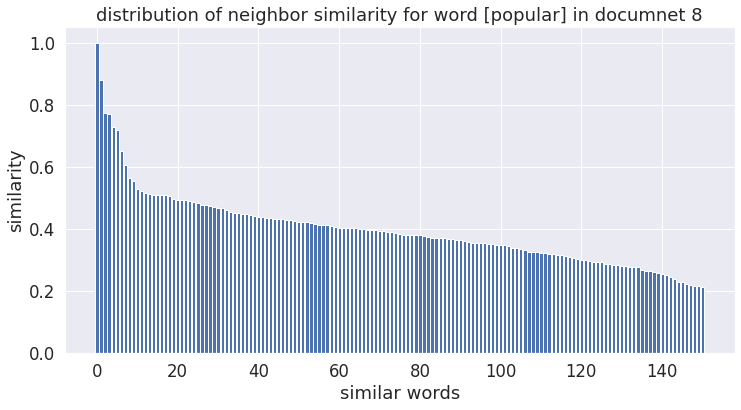

71   -->  uprising
1690
[1.0, 0.8783416, 0.83111054, 0.8303263, 0.7957045, 0.78198874, 0.7105225, 0.5930023, 0.55683315, 0.5504837, 0.54886997, 0.5405262, 0.5313605, 0.53004813, 0.5242634, 0.52417696, 0.518661, 0.515721, 0.5105876, 0.50956273, 0.50503147, 0.5036601, 0.49245542, 0.4921115, 0.4904635, 0.4868216, 0.48400193, 0.48215705, 0.47944832, 0.478078, 0.47675547, 0.47590825, 0.4746777, 0.47371754, 0.4731709, 0.47215164, 0.46962506, 0.46942866, 0.4657379, 0.45898667, 0.45522034, 0.4532137, 0.45147336, 0.45094836, 0.44599283, 0.44496796, 0.44415805, 0.44398612, 0.44343537, 0.44097435, 0.43995142, 0.43812704, 0.43710285, 0.4367954, 0.43632737, 0.43261644, 0.43003398, 0.429371, 0.42614955, 0.42590186, 0.42530626, 0.424159, 0.4204626, 0.42042285, 0.41955268, 0.41848555, 0.41688746, 0.41669095, 0.41623214, 0.41467136, 0.4132089, 0.4119398, 0.4108425, 0.41002244, 0.40749356, 0.40590495, 0.40493333, 0.40433466, 0.40375108, 0.40355152, 0.402703, 0.40194374, 0.39874035, 0.3985021, 0.39497668

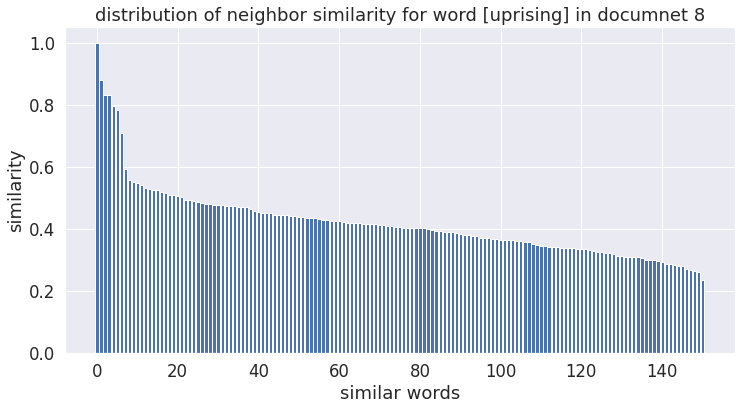

72   -->  swept
1690
[1.0, 0.8303263, 0.8290887, 0.82835925, 0.79411614, 0.77149755, 0.70998585, 0.5654522, 0.5550637, 0.5443229, 0.5424372, 0.5013507, 0.4994201, 0.4923426, 0.4920889, 0.49021968, 0.489776, 0.48943704, 0.48798504, 0.48237094, 0.48225436, 0.48070166, 0.47840315, 0.4764236, 0.4750115, 0.47329697, 0.47305298, 0.47173595, 0.46957707, 0.46276015, 0.461057, 0.45686352, 0.45598668, 0.45481163, 0.45202917, 0.45116106, 0.45104048, 0.44585395, 0.4444335, 0.44429585, 0.4415788, 0.44012576, 0.43950766, 0.43908763, 0.43821198, 0.43820417, 0.437546, 0.43661326, 0.43364668, 0.43315512, 0.43200457, 0.42946404, 0.42522156, 0.4250481, 0.42188936, 0.42162842, 0.42049676, 0.4204381, 0.42035204, 0.41876495, 0.4185838, 0.41805893, 0.41774914, 0.41747934, 0.41702414, 0.41387314, 0.4119936, 0.4104171, 0.41011715, 0.40805432, 0.40751368, 0.40711406, 0.4024986, 0.40002787, 0.40002626, 0.3975501, 0.3970615, 0.39630878, 0.39557546, 0.39440238, 0.39309716, 0.39296418, 0.39142656, 0.3908354, 0.3887

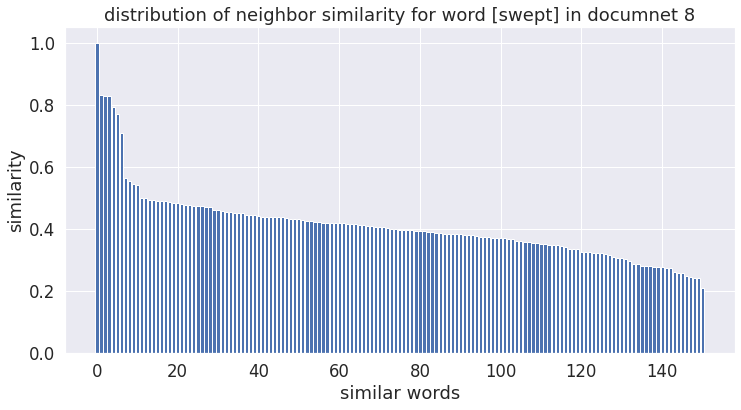

76   -->  power
1690
[1.0000001, 0.90028536, 0.88579464, 0.83111054, 0.82835925, 0.7744653, 0.70051265, 0.6165464, 0.6149287, 0.6047058, 0.6001978, 0.585713, 0.5847484, 0.56296486, 0.5527779, 0.5507451, 0.54217994, 0.5343231, 0.53428996, 0.53299963, 0.5311377, 0.5268435, 0.52625716, 0.5251852, 0.5228159, 0.5211868, 0.5206555, 0.519172, 0.518069, 0.51412535, 0.5086709, 0.5082182, 0.5071107, 0.5045552, 0.5041925, 0.50373805, 0.49811837, 0.49452907, 0.4894176, 0.48661834, 0.4773012, 0.4772911, 0.47418186, 0.47178027, 0.47070625, 0.4705375, 0.47016346, 0.46971065, 0.4690563, 0.46748912, 0.46562862, 0.46493316, 0.46375012, 0.46313566, 0.46306428, 0.46186888, 0.4590637, 0.4582882, 0.45513484, 0.45467135, 0.453501, 0.45188954, 0.45182717, 0.44976813, 0.4474824, 0.44511884, 0.44364923, 0.44157594, 0.44009084, 0.44001845, 0.4397602, 0.4392689, 0.43431455, 0.43390027, 0.43127012, 0.43052602, 0.42985728, 0.4279992, 0.42750546, 0.4269166, 0.42632627, 0.42331612, 0.42220196, 0.4207296, 0.41981244, 

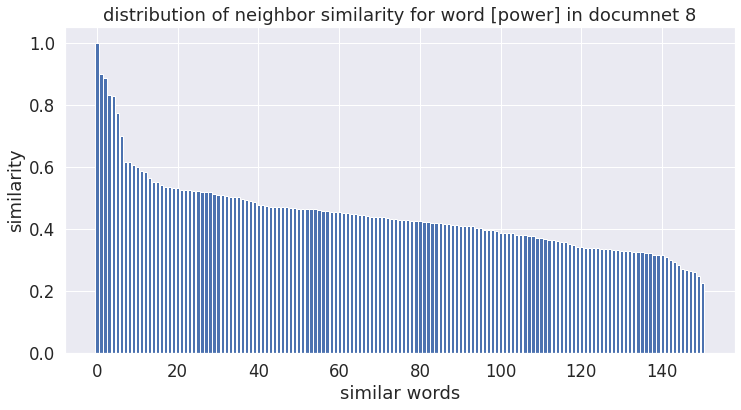

78   -->  went
1690
[1.0, 0.7200379, 0.6925298, 0.65987515, 0.63937116, 0.63587916, 0.61839175, 0.6095127, 0.6005782, 0.60004765, 0.5941067, 0.5855751, 0.57296705, 0.5662539, 0.5534907, 0.5371587, 0.528671, 0.5285529, 0.52641773, 0.5218237, 0.5152722, 0.500295, 0.4929273, 0.48205858, 0.47245854, 0.4722808, 0.46907854, 0.46631938, 0.46564442, 0.42889154, 0.42435735, 0.42067116, 0.4029597, 0.40116143, 0.40051937, 0.3955465, 0.3935287, 0.3921498, 0.38173395, 0.37859178, 0.37287605, 0.36939025, 0.36861497, 0.36815512, 0.3628179, 0.3611081, 0.35920358, 0.35510924, 0.3511403, 0.33891147, 0.33417702, 0.33284044, 0.3252797, 0.3234859, 0.3198463, 0.31905925, 0.3167909, 0.30934435, 0.3079314, 0.2996129, 0.29111832, 0.2906254, 0.28827462, 0.2860959, 0.28333458, 0.2828744, 0.28218448, 0.27695537, 0.2761343, 0.27523375, 0.27477473, 0.2746714, 0.27031392, 0.26967657, 0.26825172, 0.2662357, 0.26443255, 0.26041144, 0.2597279, 0.2573876, 0.25626555, 0.25518993, 0.25426635, 0.2524565, 0.25217843, 0.2513

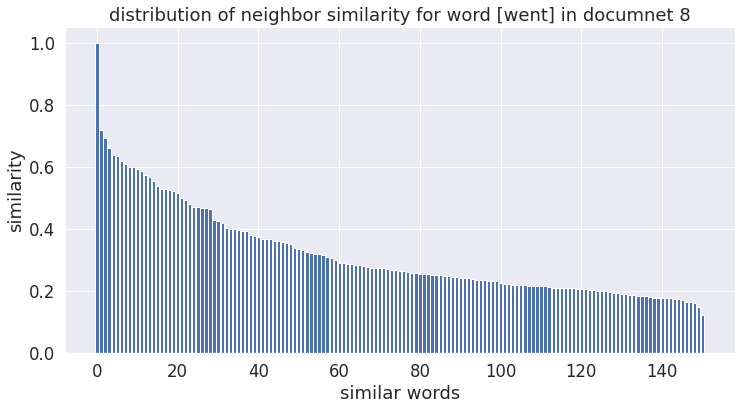

81   -->  national
1690
[1.0, 0.6415967, 0.6245843, 0.62309885, 0.61803925, 0.6088215, 0.6005782, 0.5927092, 0.5731709, 0.56484705, 0.55295396, 0.5415834, 0.5331017, 0.53268397, 0.51913196, 0.51485574, 0.5049495, 0.5044188, 0.5014252, 0.49786597, 0.4852183, 0.48278767, 0.47981328, 0.47806084, 0.46764153, 0.46744406, 0.46684894, 0.46364883, 0.46083623, 0.45064092, 0.44624758, 0.44448692, 0.44364923, 0.4367954, 0.43567336, 0.43545127, 0.4334566, 0.4331075, 0.43259108, 0.4324684, 0.41617453, 0.41543096, 0.3994243, 0.39893776, 0.39022735, 0.38997695, 0.3891356, 0.38635054, 0.38567734, 0.38465935, 0.38452712, 0.3821168, 0.37482673, 0.37459153, 0.3735334, 0.37071198, 0.3704053, 0.3683022, 0.36671776, 0.36629838, 0.36188903, 0.35654616, 0.35527354, 0.35416237, 0.353261, 0.35116357, 0.34868336, 0.34537175, 0.34457657, 0.34184274, 0.34071672, 0.34065008, 0.3374396, 0.33739182, 0.33470896, 0.33101913, 0.3307602, 0.32951832, 0.32806483, 0.3274063, 0.316069, 0.3155579, 0.31540686, 0.31447044, 0.30

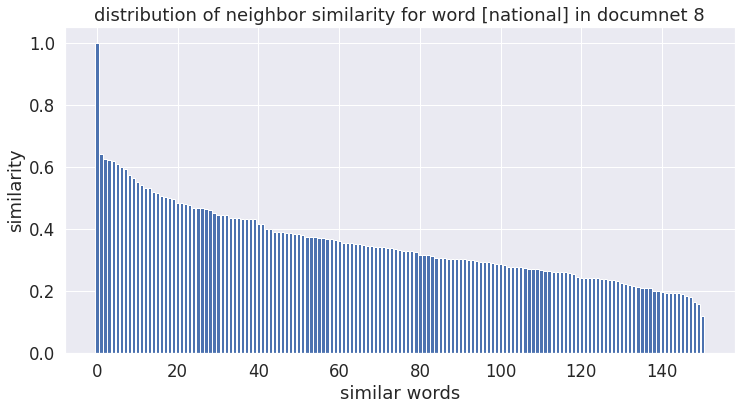

82   -->  television
1690
[0.7473757, 0.66340315, 0.6521542, 0.65126216, 0.6253289, 0.5938936, 0.5856159, 0.58008087, 0.5684973, 0.566363, 0.5454379, 0.54269433, 0.5373494, 0.53560185, 0.5294634, 0.5278259, 0.52558327, 0.52165407, 0.5119283, 0.4950305, 0.49188024, 0.48737484, 0.4870664, 0.47060943, 0.46945786, 0.45863885, 0.45025504, 0.44541526, 0.43872166, 0.4371692, 0.4318909, 0.4305717, 0.42369854, 0.4176367, 0.4082493, 0.39267254, 0.39127362, 0.38857028, 0.38539785, 0.38458157, 0.38453436, 0.38050583, 0.37681943, 0.37280783, 0.37142777, 0.36787355, 0.36779124, 0.36766416, 0.3596568, 0.34977865, 0.34417573, 0.34151012, 0.33972284, 0.3394302, 0.33796883, 0.33684075, 0.3214977, 0.3211621, 0.31993282, 0.31722945, 0.3157907, 0.3151976, 0.31512547, 0.31493604, 0.31475893, 0.31378698, 0.3095229, 0.30937195, 0.30813766, 0.30676103, 0.30657184, 0.3044299, 0.30287385, 0.29717, 0.29700655, 0.2958556, 0.29485407, 0.29337925, 0.29092288, 0.28737503, 0.2863389, 0.2859674, 0.28478664, 0.28277057,

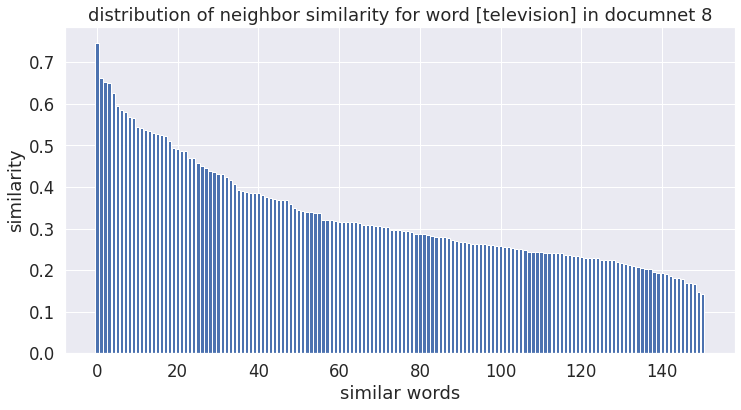

84   -->  announce
1690
[0.99999976, 0.71404123, 0.5764992, 0.5644505, 0.53994244, 0.528671, 0.5283056, 0.51603806, 0.5085563, 0.5059102, 0.5014252, 0.49446216, 0.49379224, 0.47471845, 0.47191185, 0.46383482, 0.46258134, 0.4578349, 0.4537646, 0.45232087, 0.43716902, 0.42577082, 0.41861168, 0.4163881, 0.40771312, 0.40617406, 0.40389165, 0.40356952, 0.4011588, 0.39252543, 0.38709402, 0.38434193, 0.36442044, 0.36213017, 0.36038747, 0.35920846, 0.35723087, 0.35660383, 0.3475511, 0.34258676, 0.328656, 0.32822126, 0.3276704, 0.32704264, 0.32645926, 0.32614112, 0.32610917, 0.32412374, 0.32096547, 0.31870365, 0.31743792, 0.3164369, 0.3158254, 0.30858713, 0.30260512, 0.30167305, 0.30143356, 0.29855978, 0.29563808, 0.293289, 0.293237, 0.29278326, 0.28569177, 0.28099358, 0.2809904, 0.28047898, 0.27501702, 0.27010018, 0.26967162, 0.26741013, 0.26709712, 0.26524132, 0.2608426, 0.26071686, 0.25955024, 0.25916922, 0.25640833, 0.25386328, 0.25337526, 0.25181985, 0.2512008, 0.25116575, 0.24937561, 0.24

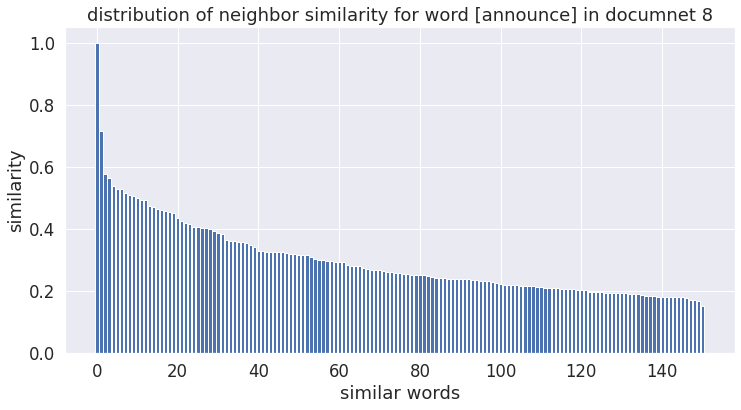

86   -->  special
1690
[1.0, 0.7402512, 0.6088215, 0.5685588, 0.5670165, 0.56316036, 0.54867893, 0.54427266, 0.523453, 0.5211147, 0.5085563, 0.4996934, 0.49505308, 0.49311867, 0.49188733, 0.4895144, 0.48744702, 0.48205858, 0.47971833, 0.47236282, 0.47071612, 0.46434137, 0.4608187, 0.45575815, 0.44713593, 0.439573, 0.43898898, 0.43514013, 0.43413538, 0.43186626, 0.4309656, 0.43041676, 0.42895105, 0.4260021, 0.42496794, 0.42422384, 0.41688746, 0.41475672, 0.4066754, 0.40607136, 0.4046892, 0.4038775, 0.40360114, 0.39945972, 0.39075, 0.38984844, 0.38767123, 0.38485354, 0.3785546, 0.37597984, 0.37498417, 0.3746695, 0.37391204, 0.37303653, 0.37019032, 0.3700102, 0.36695516, 0.36566797, 0.3646323, 0.3645791, 0.36144835, 0.3601793, 0.35834888, 0.3575498, 0.35701576, 0.35282445, 0.3523088, 0.35160092, 0.35065588, 0.3404501, 0.33863285, 0.3329497, 0.3299845, 0.32949984, 0.3271942, 0.32579488, 0.32275766, 0.3141762, 0.30217385, 0.29958054, 0.2993752, 0.29834804, 0.29695004, 0.29685998, 0.29609692

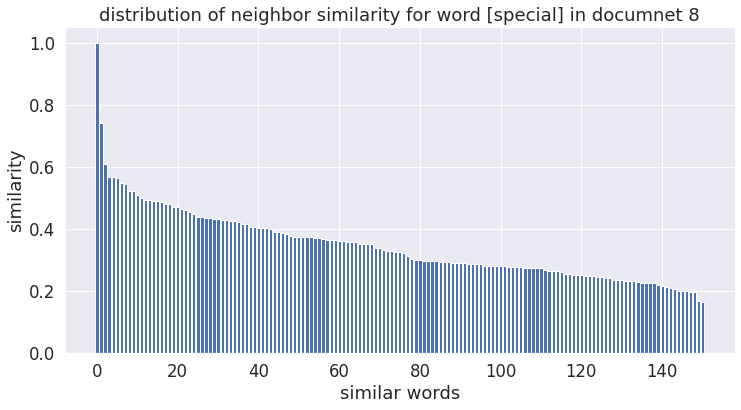

87   -->  congress
1690
[1.0, 0.7402512, 0.58574426, 0.5764992, 0.5577284, 0.5415834, 0.5227859, 0.5166363, 0.5040457, 0.5025244, 0.5018497, 0.500295, 0.49954233, 0.49875644, 0.49259025, 0.48139864, 0.48047403, 0.47978687, 0.47647694, 0.4721547, 0.46928725, 0.46682674, 0.46362394, 0.44628325, 0.44214535, 0.42510042, 0.42400217, 0.42215043, 0.4128961, 0.4054547, 0.40355152, 0.40139157, 0.3996961, 0.39202103, 0.38034832, 0.38009566, 0.37821198, 0.37743545, 0.37337726, 0.37328035, 0.3732345, 0.37017706, 0.36909074, 0.36261243, 0.36133903, 0.3607974, 0.36046815, 0.35806936, 0.34737647, 0.3462644, 0.34581345, 0.33985823, 0.3395937, 0.33771682, 0.33591315, 0.3348874, 0.33418733, 0.3297414, 0.32729244, 0.3272183, 0.32494423, 0.32272184, 0.32271737, 0.31674832, 0.3154614, 0.31544954, 0.31519252, 0.31275833, 0.30558735, 0.29937544, 0.29867274, 0.2981388, 0.29684407, 0.29104838, 0.2868422, 0.281357, 0.2759514, 0.27527037, 0.27327314, 0.26697707, 0.2655083, 0.2606176, 0.26018283, 0.25933778, 0.25

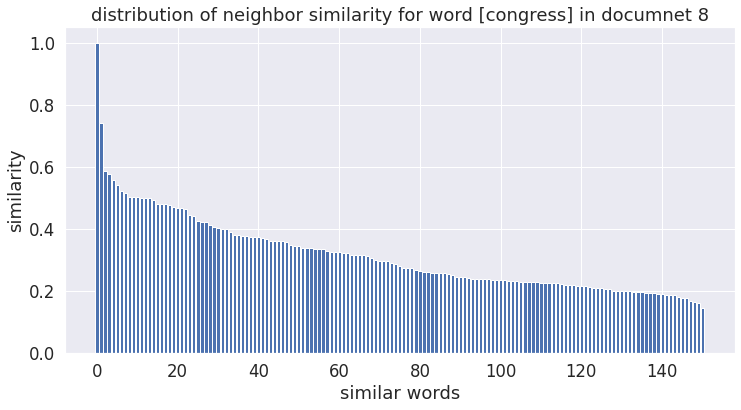

90   -->  message
1690
[0.99999994, 0.76917607, 0.7542311, 0.7333164, 0.7321294, 0.67326915, 0.65987515, 0.6021862, 0.6021235, 0.59106314, 0.5797833, 0.5644505, 0.5366765, 0.53423953, 0.5331017, 0.5212854, 0.5166374, 0.5131712, 0.5105715, 0.5104461, 0.5071596, 0.5025244, 0.4991297, 0.49611974, 0.49231216, 0.4895144, 0.48849532, 0.48146293, 0.46447963, 0.4475513, 0.44614875, 0.44157594, 0.43403408, 0.43401867, 0.43137336, 0.4226494, 0.42259365, 0.42255467, 0.42143416, 0.41809547, 0.41669095, 0.4089557, 0.40728462, 0.4060564, 0.40081334, 0.39045358, 0.3862747, 0.3787871, 0.37728798, 0.365555, 0.360973, 0.3602713, 0.35810736, 0.35467488, 0.35281268, 0.34543744, 0.34542814, 0.34020036, 0.335367, 0.3334626, 0.3333251, 0.3313743, 0.328507, 0.32373378, 0.32081246, 0.32034796, 0.32025605, 0.31804678, 0.31456542, 0.3110416, 0.3098601, 0.3078252, 0.3074449, 0.30738157, 0.30525327, 0.3039376, 0.30337906, 0.30327767, 0.30211353, 0.30209255, 0.30178893, 0.30047548, 0.2986071, 0.2889014, 0.28784686,

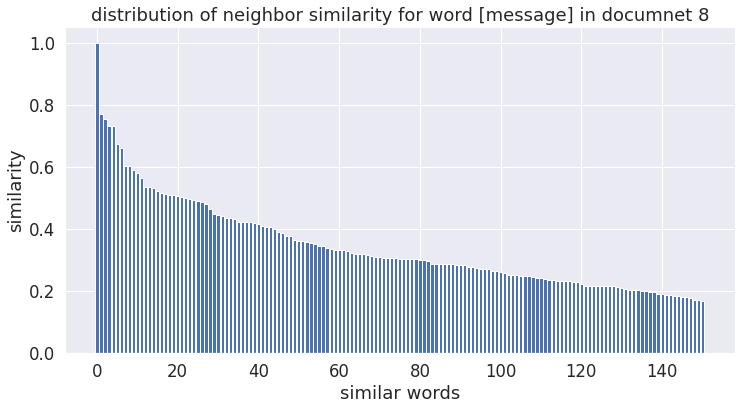

92   -->  repeated
1690
[1.0000001, 0.8584981, 0.7974182, 0.7542311, 0.65322065, 0.6519142, 0.58566797, 0.5742608, 0.57296705, 0.56833494, 0.5682162, 0.5606388, 0.53090996, 0.50953573, 0.501764, 0.49546722, 0.49217606, 0.49209076, 0.48518115, 0.47996536, 0.47847286, 0.47667855, 0.4709186, 0.4686033, 0.46577233, 0.46364883, 0.4578349, 0.44933492, 0.44640914, 0.43898898, 0.43076435, 0.4299202, 0.42979872, 0.42480928, 0.42400217, 0.42102158, 0.4197351, 0.41586617, 0.40968287, 0.40661997, 0.40119487, 0.39897394, 0.3932669, 0.39193106, 0.3863659, 0.38632083, 0.3820811, 0.37942493, 0.3739072, 0.37268066, 0.36873516, 0.36613858, 0.36182117, 0.36075962, 0.36036503, 0.3584959, 0.35637525, 0.35415065, 0.3500638, 0.34910917, 0.3490651, 0.34761974, 0.34646326, 0.3457235, 0.3402031, 0.34015632, 0.33965075, 0.3386254, 0.33649713, 0.3315541, 0.32255706, 0.32223517, 0.3218376, 0.3210719, 0.31959587, 0.31900063, 0.315836, 0.31580248, 0.31524032, 0.31426415, 0.3137799, 0.31185424, 0.31131187, 0.3062228,

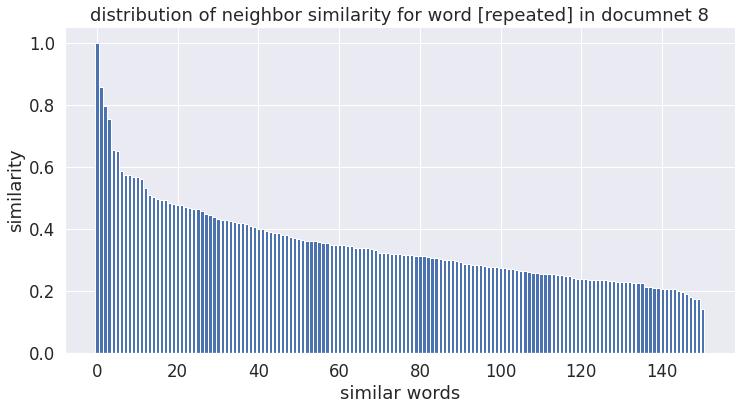

93   -->  today
1690
[1.0, 0.8584981, 0.7333164, 0.7331842, 0.67246276, 0.6516687, 0.6508906, 0.64028084, 0.61050063, 0.6024475, 0.5941067, 0.5787341, 0.5779271, 0.55738914, 0.5553746, 0.55522174, 0.55295396, 0.54292655, 0.5383181, 0.53706205, 0.5297814, 0.5201658, 0.5188136, 0.5165564, 0.50041395, 0.49505308, 0.48718122, 0.48139864, 0.4788194, 0.47662693, 0.47386056, 0.47191185, 0.4681976, 0.46409425, 0.44628412, 0.4424789, 0.44068187, 0.4406324, 0.4397602, 0.4331904, 0.43071806, 0.42218196, 0.4210071, 0.41863948, 0.41860294, 0.4119398, 0.3966663, 0.39505595, 0.38960093, 0.38306826, 0.37769145, 0.37606493, 0.37437877, 0.36834955, 0.35974294, 0.35703057, 0.35697114, 0.35616025, 0.35367733, 0.3532465, 0.35320908, 0.35153174, 0.34854773, 0.34842592, 0.34598786, 0.34500164, 0.34340557, 0.34181422, 0.33743024, 0.33631504, 0.333785, 0.3332277, 0.3327115, 0.3280263, 0.3275271, 0.3238243, 0.3211949, 0.31977415, 0.31796655, 0.31755692, 0.31388518, 0.31382352, 0.31285796, 0.31263924, 0.31076398

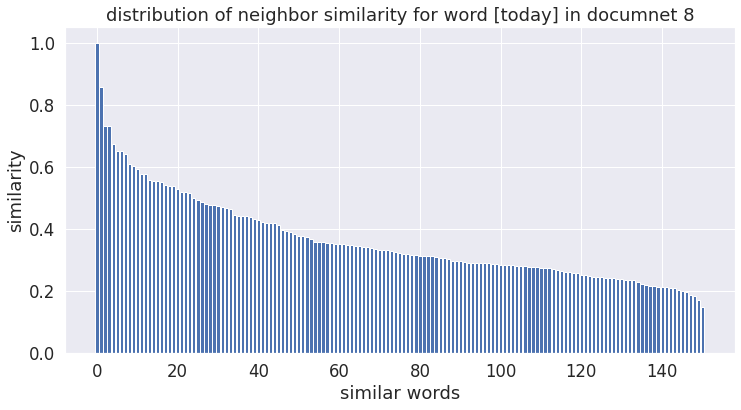

96   -->  rum
1690
[1.0, 0.6766776, 0.5731709, 0.5708351, 0.56316036, 0.55594593, 0.55522174, 0.5543077, 0.539657, 0.5366765, 0.5327966, 0.5196836, 0.5152722, 0.5145253, 0.512449, 0.501764, 0.49981388, 0.49875644, 0.49659753, 0.4882776, 0.48217717, 0.4781783, 0.47544068, 0.4695688, 0.46699426, 0.45147473, 0.4454866, 0.43841857, 0.437833, 0.4366492, 0.4346696, 0.42894268, 0.42169267, 0.41861168, 0.41858947, 0.41720292, 0.41573608, 0.4132089, 0.4110967, 0.40904218, 0.40776455, 0.40692222, 0.4057163, 0.40529412, 0.40358672, 0.40313688, 0.39532262, 0.38637996, 0.38512754, 0.38488552, 0.38414907, 0.38103485, 0.37857032, 0.37678003, 0.37675363, 0.37636825, 0.37373358, 0.37186226, 0.37140507, 0.36656296, 0.36377752, 0.36021364, 0.3576816, 0.35741347, 0.35523543, 0.35478973, 0.3533054, 0.35113513, 0.3420381, 0.34128842, 0.33795023, 0.33590722, 0.33495927, 0.33016682, 0.3249594, 0.32329383, 0.32146925, 0.31982028, 0.3121127, 0.30924353, 0.3083626, 0.30442303, 0.30245748, 0.3004336, 0.29798365, 

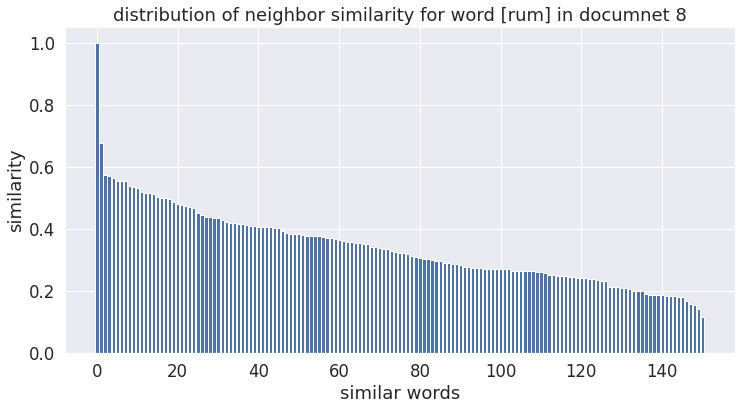

97   -->  ##anian
1690
[1.0, 0.6766776, 0.62309885, 0.61658597, 0.5822927, 0.5561987, 0.5487467, 0.5480141, 0.54292655, 0.52337575, 0.5211147, 0.51776874, 0.5166363, 0.5151478, 0.5151395, 0.5147228, 0.5097777, 0.5047976, 0.49976078, 0.4988501, 0.49611974, 0.48886147, 0.4840178, 0.47847286, 0.4783513, 0.4752623, 0.4746777, 0.47245854, 0.468658, 0.46857816, 0.46776938, 0.46745205, 0.4650942, 0.46188647, 0.46186888, 0.4613347, 0.44766128, 0.4467713, 0.4438399, 0.44233662, 0.44219944, 0.4418252, 0.43550465, 0.43545341, 0.4325294, 0.43209973, 0.42577082, 0.4257378, 0.4250481, 0.42251253, 0.42232922, 0.42145982, 0.420245, 0.41936427, 0.4173326, 0.4173146, 0.41593933, 0.41387168, 0.41137055, 0.40976548, 0.4082622, 0.39792576, 0.39600953, 0.3931474, 0.38900724, 0.38484937, 0.38364422, 0.38261423, 0.38257197, 0.38174456, 0.38142723, 0.38046148, 0.37955743, 0.37729344, 0.3756854, 0.3743655, 0.373093, 0.37018424, 0.36875552, 0.36760634, 0.36591643, 0.36371988, 0.3603211, 0.35952806, 0.35850427, 0

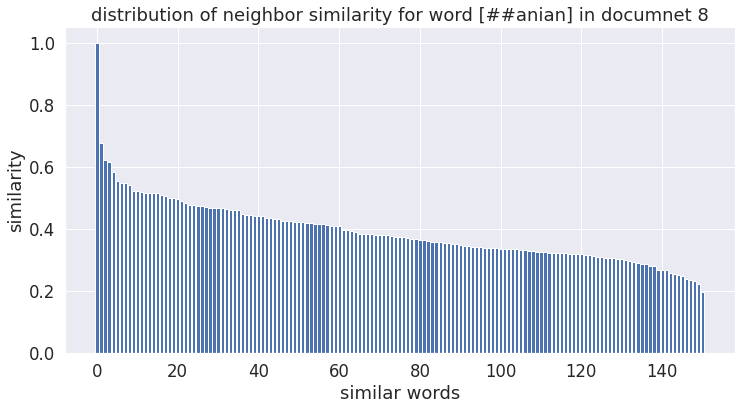

98   -->  newspapers
1690
[0.99999976, 0.68552315, 0.6166522, 0.61658597, 0.60608363, 0.60563284, 0.60147357, 0.5923917, 0.5787341, 0.5606388, 0.559997, 0.55259395, 0.54308337, 0.537217, 0.5327966, 0.51761603, 0.5166374, 0.50956273, 0.50514174, 0.5044188, 0.5041688, 0.48715064, 0.4860463, 0.48418805, 0.48354, 0.47042215, 0.46907854, 0.46772677, 0.46682674, 0.46621493, 0.46562862, 0.4631616, 0.46258134, 0.46212712, 0.46210185, 0.4547219, 0.4536695, 0.45217484, 0.45131296, 0.44800764, 0.4456918, 0.4450194, 0.44490373, 0.44361365, 0.43841165, 0.437546, 0.43370765, 0.43262315, 0.43121296, 0.4309656, 0.42460173, 0.4227413, 0.4210233, 0.42082846, 0.41790283, 0.417016, 0.4150283, 0.40776962, 0.40579683, 0.4036949, 0.403386, 0.40161392, 0.4011351, 0.4003042, 0.3993379, 0.39927372, 0.39893425, 0.396598, 0.39271414, 0.3903179, 0.3875234, 0.38750324, 0.38481224, 0.38298774, 0.38280004, 0.3819008, 0.38051334, 0.38024807, 0.37677813, 0.3761422, 0.37377638, 0.37209058, 0.36952668, 0.3694526, 0.36878

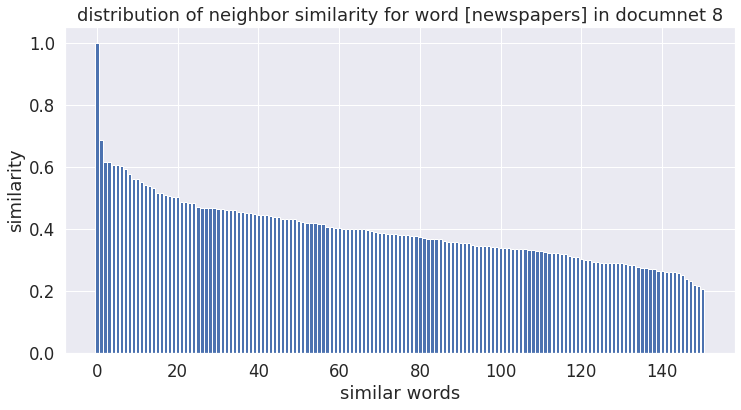

101   -->  like
1690
[0.9999999, 0.6249914, 0.5924401, 0.56415695, 0.5349966, 0.4976338, 0.49657857, 0.49209076, 0.48718122, 0.48105687, 0.46621493, 0.46272776, 0.460199, 0.45261124, 0.44397378, 0.43812442, 0.43145365, 0.4276503, 0.4254125, 0.42255467, 0.42236626, 0.4198887, 0.41249678, 0.4118116, 0.40896285, 0.408558, 0.40533793, 0.40483284, 0.40377477, 0.40306485, 0.40185812, 0.399527, 0.39719117, 0.39440554, 0.3940886, 0.3935287, 0.3885709, 0.38656437, 0.38465935, 0.38257197, 0.37742427, 0.3748414, 0.3745348, 0.37440982, 0.37050053, 0.3696178, 0.3691767, 0.36903018, 0.36849165, 0.3667642, 0.36294588, 0.3626498, 0.3602594, 0.35980275, 0.35922855, 0.35901883, 0.35723087, 0.35446402, 0.34873217, 0.34857476, 0.3471153, 0.34107465, 0.33988562, 0.33863285, 0.33787996, 0.33495927, 0.33453816, 0.3340282, 0.33334482, 0.33223444, 0.33116424, 0.33111075, 0.3300966, 0.330039, 0.3297414, 0.32579646, 0.3189116, 0.3186137, 0.3182888, 0.31787613, 0.31681514, 0.31302908, 0.31258613, 0.31246045, 0.31

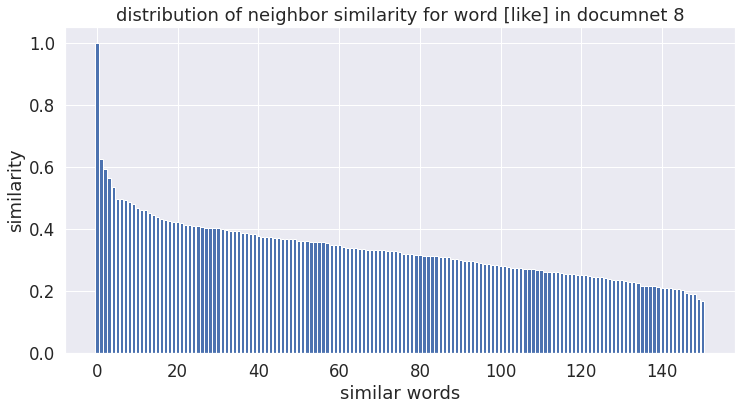

103   -->  television
1690
[0.9999999, 0.61803925, 0.60147357, 0.56415695, 0.56195426, 0.5586027, 0.5424758, 0.53706205, 0.5272062, 0.52520674, 0.52337575, 0.5139566, 0.504804, 0.50238234, 0.4991297, 0.49583614, 0.49221408, 0.4905486, 0.48783427, 0.48030478, 0.47996536, 0.47971833, 0.47544068, 0.4722808, 0.47005928, 0.46262285, 0.45522034, 0.4545584, 0.45182717, 0.4483486, 0.44798678, 0.4452359, 0.44299355, 0.43722722, 0.43508813, 0.43456542, 0.43360013, 0.43155265, 0.43031403, 0.4302235, 0.42917487, 0.42730218, 0.42564738, 0.42510042, 0.42349043, 0.42115194, 0.4187533, 0.41667062, 0.41536942, 0.41508386, 0.41406056, 0.4140186, 0.41263086, 0.4091485, 0.40771312, 0.40677443, 0.4065833, 0.4037763, 0.40308595, 0.40152392, 0.39784747, 0.39775538, 0.3963967, 0.39229727, 0.39084232, 0.39046073, 0.3902234, 0.38878113, 0.38455588, 0.38321608, 0.38122278, 0.37590125, 0.37556702, 0.37519675, 0.37519568, 0.3716792, 0.37137052, 0.3682311, 0.36755225, 0.36713603, 0.36692998, 0.3659639, 0.36264324, 

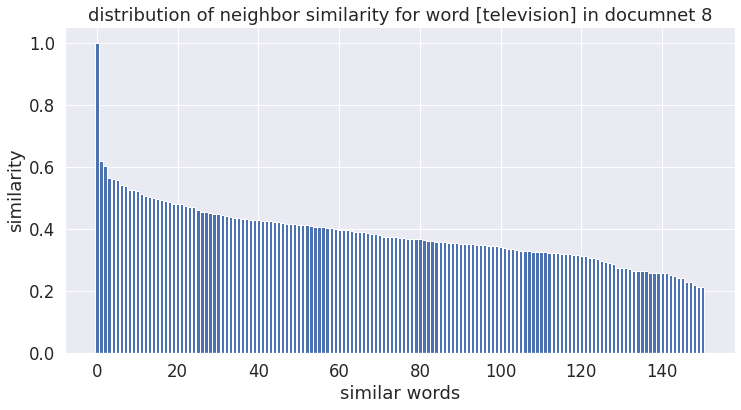

106   -->  controlled
1690
[1.0, 0.83979535, 0.735476, 0.6770146, 0.6389059, 0.6166522, 0.61299706, 0.5924401, 0.5825902, 0.5586027, 0.541303, 0.53731525, 0.53718054, 0.53576374, 0.5345443, 0.5343983, 0.53353155, 0.52998394, 0.5251852, 0.5217756, 0.5212177, 0.5169461, 0.5164174, 0.515701, 0.5152404, 0.51436543, 0.51361823, 0.5135274, 0.50994796, 0.50724536, 0.50629306, 0.501038, 0.49879563, 0.4986657, 0.49483275, 0.4944264, 0.48798504, 0.48696423, 0.48621142, 0.4840178, 0.4810516, 0.47865254, 0.47764686, 0.47662693, 0.47364533, 0.4709186, 0.46942866, 0.45892942, 0.45555702, 0.4455914, 0.4450114, 0.44130698, 0.44021457, 0.43675882, 0.43401867, 0.4333149, 0.4313005, 0.4261081, 0.42348307, 0.42288712, 0.42214954, 0.4206075, 0.41002202, 0.40895972, 0.40880257, 0.40784013, 0.40742964, 0.40407366, 0.40313447, 0.4022711, 0.4019692, 0.39342207, 0.393, 0.39237458, 0.39214504, 0.39140797, 0.39048964, 0.3902541, 0.3899665, 0.3865325, 0.3856749, 0.38565442, 0.38488552, 0.38287905, 0.3821365, 0.381

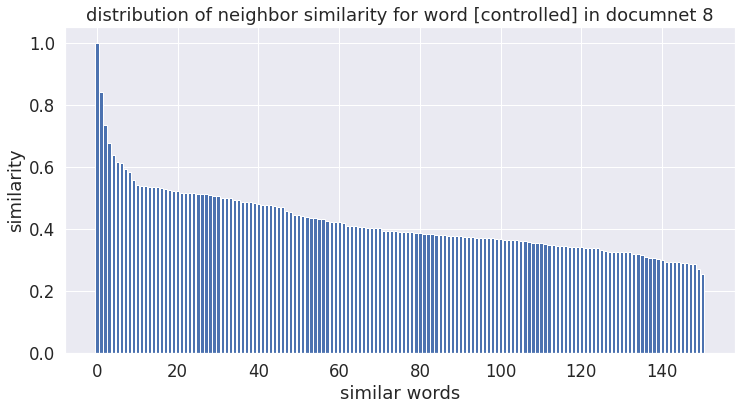

109   -->  country
1690
[0.78180057, 0.7470085, 0.7082295, 0.6629013, 0.66001123, 0.63977253, 0.63675386, 0.62476206, 0.61022186, 0.60359794, 0.59819585, 0.5935677, 0.5886642, 0.58205676, 0.5803669, 0.57256854, 0.5685998, 0.56825423, 0.55820286, 0.55051994, 0.54414177, 0.5426379, 0.541222, 0.5387852, 0.5336015, 0.53119713, 0.53050697, 0.5299287, 0.5270747, 0.5268113, 0.50951767, 0.5070255, 0.50445783, 0.50170434, 0.49989045, 0.49877882, 0.49722865, 0.4957065, 0.49502528, 0.48450264, 0.4807433, 0.4759585, 0.47514588, 0.47375506, 0.4709759, 0.4674608, 0.46605283, 0.46416956, 0.4631414, 0.4610467, 0.46066457, 0.46036816, 0.45997614, 0.4599507, 0.4568166, 0.4485707, 0.4454946, 0.44538343, 0.43815693, 0.4357006, 0.43386316, 0.43122107, 0.43017536, 0.42631978, 0.4249025, 0.42446503, 0.4239689, 0.42387432, 0.41666988, 0.41590863, 0.41044623, 0.40863854, 0.40807086, 0.40574157, 0.40436578, 0.4043655, 0.40316528, 0.40260607, 0.40146506, 0.39944035, 0.39849904, 0.39680302, 0.39298552, 0.3897, 0.

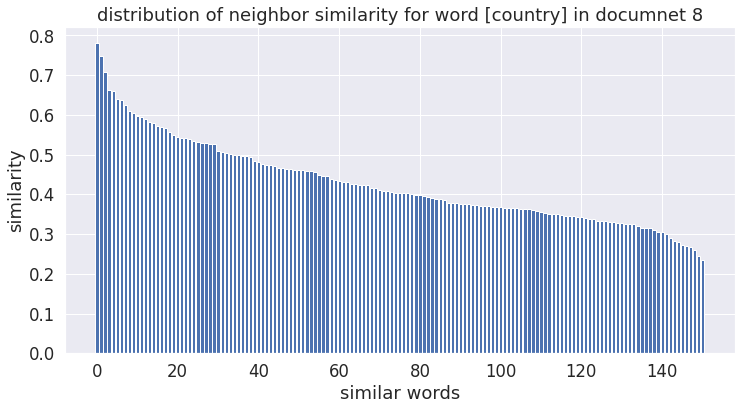

112   -->  new
1690
[0.785477, 0.75278246, 0.74289155, 0.7366023, 0.67459416, 0.6278929, 0.57035035, 0.55788714, 0.5576758, 0.5515342, 0.5436814, 0.5373402, 0.5310728, 0.52872944, 0.5243197, 0.5190886, 0.5174469, 0.5162917, 0.5146532, 0.5134927, 0.5111346, 0.5094164, 0.5067515, 0.5035534, 0.5010196, 0.49652523, 0.49571413, 0.4952554, 0.49024832, 0.48471612, 0.4846623, 0.4832579, 0.48283482, 0.48262602, 0.4760086, 0.46343088, 0.46339032, 0.46277675, 0.4626127, 0.4613003, 0.46118593, 0.460155, 0.45971003, 0.4532209, 0.44830647, 0.44799998, 0.44379282, 0.4426854, 0.44242987, 0.433557, 0.43102455, 0.42707148, 0.42412746, 0.42377084, 0.4227015, 0.42222166, 0.4185658, 0.41318586, 0.41104996, 0.40816888, 0.4034667, 0.4024184, 0.39655378, 0.39623803, 0.39610806, 0.39413917, 0.39293936, 0.3916156, 0.39136502, 0.39134842, 0.3888682, 0.38754714, 0.38396293, 0.38105303, 0.38090092, 0.38037664, 0.37859213, 0.37824392, 0.3770848, 0.3762926, 0.37353104, 0.37149742, 0.3703755, 0.36956704, 0.36819255, 

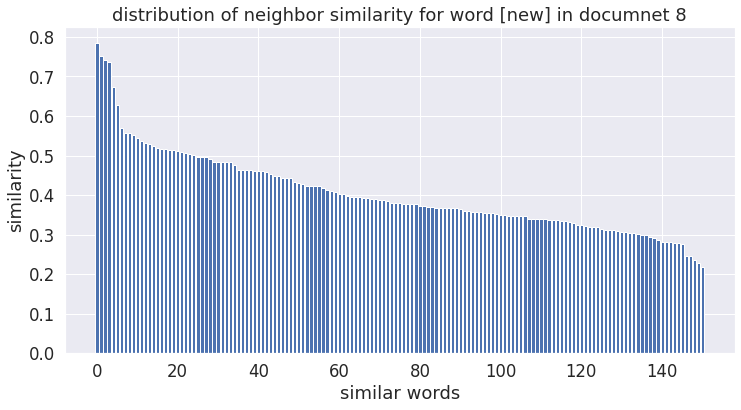

114   -->  non
1690
[1.0000001, 0.7753333, 0.7216481, 0.656722, 0.61299706, 0.54736906, 0.54200166, 0.53665876, 0.5309995, 0.52514946, 0.5211669, 0.5206555, 0.5201674, 0.5181818, 0.51367754, 0.5134781, 0.51003957, 0.50900793, 0.50309086, 0.50296766, 0.50243545, 0.5005611, 0.5000918, 0.48476112, 0.48400193, 0.4807382, 0.47840315, 0.47067204, 0.46262285, 0.4623891, 0.46210185, 0.4613347, 0.46088508, 0.4584037, 0.4566902, 0.45444217, 0.4513753, 0.44892097, 0.43871787, 0.4347647, 0.43307784, 0.4294423, 0.41968936, 0.41825402, 0.4137631, 0.41207796, 0.4110925, 0.40904218, 0.4090258, 0.40849757, 0.40807396, 0.4070351, 0.40652984, 0.4063795, 0.40636808, 0.40483284, 0.40427393, 0.40018436, 0.3997622, 0.39712077, 0.3967269, 0.3927884, 0.39210188, 0.39209718, 0.3893166, 0.38768935, 0.38737154, 0.3855135, 0.38340127, 0.38267976, 0.382343, 0.38042855, 0.37993988, 0.3786834, 0.3780268, 0.37619698, 0.3746695, 0.3721998, 0.3709448, 0.36975908, 0.36914676, 0.367994, 0.36600062, 0.36525232, 0.3639244, 

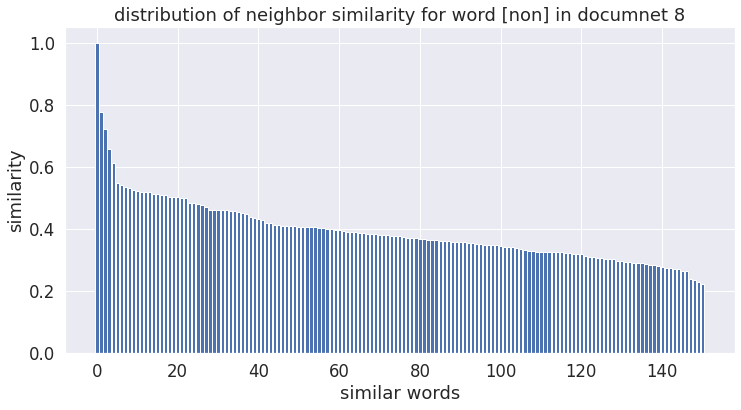

116   -->  communist
1690
[1.0000004, 0.7757826, 0.7753333, 0.6619517, 0.6389059, 0.5940381, 0.5777121, 0.5750727, 0.57374895, 0.56710494, 0.5650831, 0.56365347, 0.5507451, 0.5488695, 0.537217, 0.5370452, 0.5335398, 0.5313605, 0.53033304, 0.52895826, 0.52119696, 0.5151478, 0.5139566, 0.5138706, 0.5098499, 0.50570405, 0.5021541, 0.500944, 0.50080633, 0.49211013, 0.4897381, 0.4882282, 0.48318678, 0.48141155, 0.48089516, 0.4756097, 0.47329697, 0.47179472, 0.46844834, 0.4617254, 0.45891097, 0.45885783, 0.45270836, 0.45265716, 0.4521777, 0.4520519, 0.44988635, 0.44649675, 0.4454866, 0.44387528, 0.44387195, 0.44211346, 0.44010425, 0.43976066, 0.43722242, 0.43694824, 0.4331075, 0.42496794, 0.42236626, 0.41982237, 0.4180509, 0.41789725, 0.4153735, 0.40870893, 0.40729144, 0.40610737, 0.4020455, 0.3999481, 0.3996961, 0.3977993, 0.3972913, 0.39643532, 0.39351392, 0.39324152, 0.3918294, 0.39050615, 0.3900798, 0.38960093, 0.38959622, 0.38801032, 0.38624075, 0.3851054, 0.3830468, 0.38213795, 0.38119

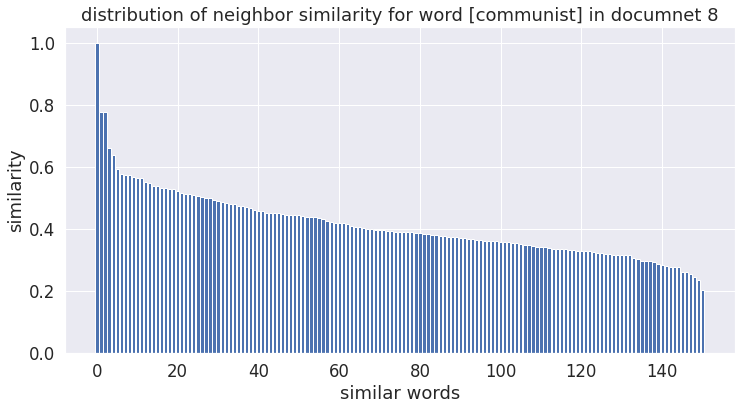

117   -->  leaders
1690
[1.0, 0.7757826, 0.74147177, 0.735476, 0.7216481, 0.68552315, 0.6787388, 0.64977145, 0.6373137, 0.5976815, 0.5930023, 0.5847484, 0.57906735, 0.5754294, 0.57471234, 0.5637851, 0.56195426, 0.5561369, 0.5552639, 0.5546228, 0.54895186, 0.547519, 0.54454195, 0.5427048, 0.5424372, 0.53754216, 0.527511, 0.5272046, 0.52192783, 0.5205549, 0.5136106, 0.5108859, 0.5100522, 0.5041833, 0.4988501, 0.4984907, 0.497135, 0.49113858, 0.48915923, 0.48743623, 0.48699176, 0.4862665, 0.482952, 0.48039454, 0.4744541, 0.4715763, 0.4674835, 0.4650467, 0.46125478, 0.46025085, 0.45808303, 0.4574526, 0.45573395, 0.45499244, 0.45465857, 0.45115456, 0.45105517, 0.45072073, 0.44306946, 0.44246578, 0.44104075, 0.4393146, 0.43812442, 0.4376432, 0.43636897, 0.4323144, 0.43220603, 0.43217418, 0.4321583, 0.4315541, 0.4297794, 0.4291254, 0.42797476, 0.42755443, 0.4261313, 0.42527843, 0.42259365, 0.42194682, 0.42169267, 0.4210071, 0.4209233, 0.4202616, 0.41808558, 0.41370136, 0.41361296, 0.41321778,

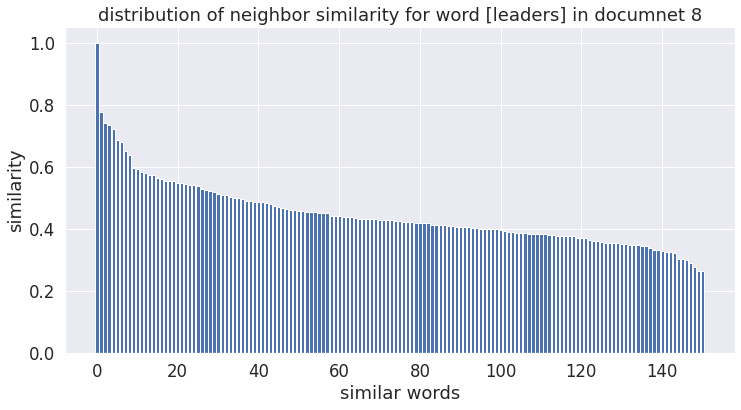

120   -->  many
1690
[0.9999998, 0.73509717, 0.7114588, 0.6892936, 0.6681411, 0.66342175, 0.6592996, 0.6509683, 0.64778155, 0.6391705, 0.63125706, 0.62300146, 0.60387886, 0.6012158, 0.55896497, 0.5564372, 0.53771627, 0.53670627, 0.5345443, 0.53449166, 0.5324845, 0.527511, 0.51449436, 0.50695467, 0.5056509, 0.5037405, 0.4980758, 0.48848578, 0.48389703, 0.47544378, 0.47289747, 0.46957684, 0.46734065, 0.4617254, 0.46088508, 0.45341402, 0.4474903, 0.4455331, 0.4453979, 0.43993682, 0.4369126, 0.4362806, 0.4311454, 0.4276741, 0.4255259, 0.42434815, 0.4212299, 0.41737208, 0.417016, 0.41606027, 0.41474754, 0.41424498, 0.41418314, 0.4122859, 0.41216916, 0.408558, 0.40772504, 0.4049519, 0.40355733, 0.40205204, 0.40196016, 0.40193394, 0.40152392, 0.40032434, 0.39930797, 0.39893785, 0.39893714, 0.39496034, 0.3928163, 0.3927831, 0.39157498, 0.3892302, 0.3886245, 0.3863659, 0.38402334, 0.38309243, 0.3829382, 0.38142723, 0.38138166, 0.3812793, 0.3775118, 0.3754326, 0.37520757, 0.37232435, 0.37175727,

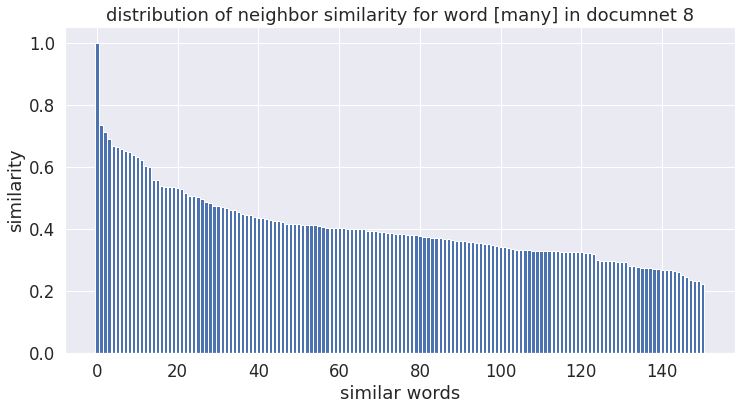

123   -->  party
1690
[0.7541294, 0.6873779, 0.64325976, 0.63524705, 0.63260865, 0.6189132, 0.6164547, 0.5930912, 0.56304264, 0.5474218, 0.5400445, 0.5106874, 0.49680448, 0.49592346, 0.4944198, 0.4924938, 0.49229795, 0.49134064, 0.48936644, 0.48898908, 0.4859497, 0.48046595, 0.47704238, 0.47650582, 0.4763157, 0.47122437, 0.46310246, 0.44639307, 0.4434141, 0.4409676, 0.44089177, 0.43717855, 0.4365887, 0.43098706, 0.43087924, 0.42801064, 0.4278545, 0.42761144, 0.42758912, 0.42367285, 0.42329156, 0.42197567, 0.42036808, 0.41756114, 0.4168439, 0.4163159, 0.41019705, 0.40959647, 0.4088297, 0.40799016, 0.40768814, 0.40656462, 0.4036553, 0.40031183, 0.3993594, 0.39481947, 0.39422998, 0.3919487, 0.39085478, 0.38862383, 0.3883206, 0.38804752, 0.38142526, 0.3805315, 0.3797623, 0.37866217, 0.37663358, 0.37615788, 0.37070912, 0.36660707, 0.36344272, 0.36312687, 0.36156607, 0.36106604, 0.35862398, 0.35807842, 0.35783628, 0.35666436, 0.35322565, 0.35298377, 0.35230547, 0.35104096, 0.35016388, 0.3486

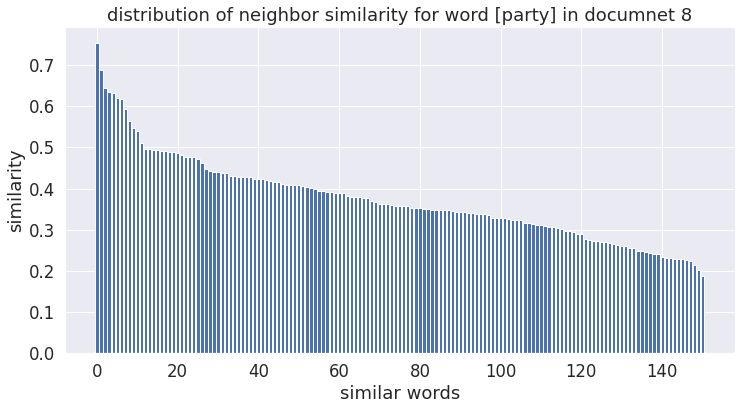

126   -->  leading
1690
[1.0000001, 0.81619537, 0.66342175, 0.64977145, 0.6405169, 0.61404055, 0.6112134, 0.60490626, 0.59548026, 0.5940381, 0.5731667, 0.5709415, 0.5660107, 0.5634892, 0.5513767, 0.540369, 0.5374215, 0.5312716, 0.5309995, 0.5298373, 0.5214982, 0.5203998, 0.517708, 0.51436543, 0.514318, 0.5097708, 0.50858045, 0.49809128, 0.49569222, 0.48641792, 0.48548466, 0.48473656, 0.47840855, 0.47768864, 0.4748243, 0.47029844, 0.47016346, 0.4691637, 0.4676965, 0.4661077, 0.4616902, 0.45998603, 0.45883316, 0.45598668, 0.4525621, 0.45232058, 0.45097327, 0.44627088, 0.44620642, 0.44496796, 0.44489688, 0.44434208, 0.44427282, 0.4424302, 0.4409817, 0.44047016, 0.43450424, 0.43345195, 0.43296692, 0.43262315, 0.43221116, 0.43181652, 0.42855695, 0.42768967, 0.42714, 0.4266864, 0.42564738, 0.41835344, 0.41692495, 0.41672993, 0.4159425, 0.41431838, 0.41429353, 0.4080142, 0.40750572, 0.4044556, 0.39826605, 0.39792848, 0.39770332, 0.39586198, 0.3925283, 0.39237112, 0.38942814, 0.38703662, 0.385

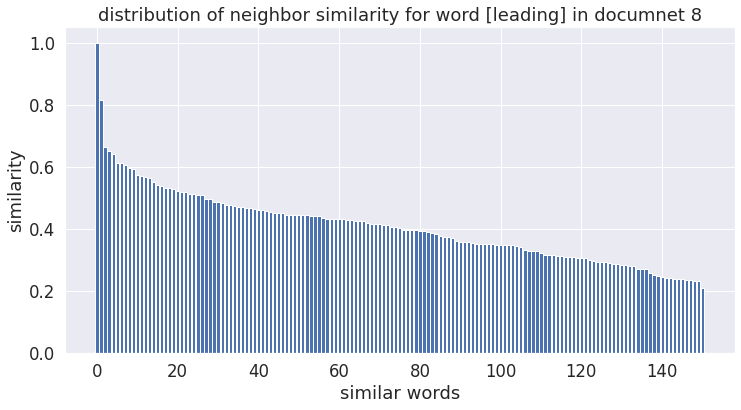

127   -->  figures
1690
[1.0, 0.81619537, 0.6787388, 0.6592996, 0.6436968, 0.6338567, 0.5860705, 0.58504015, 0.58208764, 0.5752122, 0.57509744, 0.5698829, 0.56434184, 0.5626259, 0.5590861, 0.5445755, 0.5335398, 0.53223264, 0.5258045, 0.5212098, 0.5190729, 0.51900876, 0.50629306, 0.50436, 0.5036765, 0.50296766, 0.4723946, 0.46860206, 0.464974, 0.4643953, 0.4631616, 0.46313566, 0.46075267, 0.4590646, 0.4561591, 0.45609742, 0.453784, 0.45332348, 0.4518048, 0.44917455, 0.44713175, 0.44179124, 0.44071507, 0.44068074, 0.43906766, 0.43852282, 0.43710285, 0.43709838, 0.4362545, 0.43521863, 0.43407202, 0.43303776, 0.42820483, 0.42781812, 0.42610356, 0.42459023, 0.42402714, 0.42376125, 0.42101252, 0.41876495, 0.41504252, 0.4112786, 0.40972853, 0.40880087, 0.4065833, 0.40641934, 0.40519384, 0.40252247, 0.400317, 0.3992065, 0.3979809, 0.39530694, 0.39045766, 0.38866192, 0.38699558, 0.38698933, 0.386808, 0.38494638, 0.38490224, 0.38351578, 0.3826908, 0.3800992, 0.37679058, 0.37557748, 0.37341607, 0

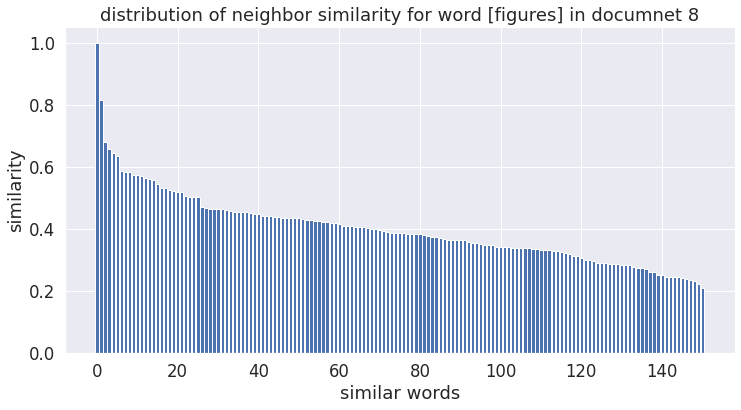

130   -->  detained
1690
[0.9999999, 0.7999382, 0.64778155, 0.62099457, 0.61206305, 0.5989803, 0.59825593, 0.59816504, 0.5698829, 0.56759465, 0.5660107, 0.543623, 0.5433605, 0.5343983, 0.5285877, 0.51689047, 0.5136106, 0.5135978, 0.5062647, 0.48918906, 0.4847898, 0.48089516, 0.4770711, 0.47529468, 0.45165235, 0.4487699, 0.44497767, 0.4347647, 0.4313954, 0.43020773, 0.42897785, 0.41569623, 0.40776962, 0.4020388, 0.40009552, 0.39775538, 0.3951698, 0.3842937, 0.38079655, 0.37497413, 0.3743655, 0.37313616, 0.36639342, 0.36601847, 0.36354125, 0.362536, 0.35970145, 0.3594325, 0.35929805, 0.3522374, 0.35216072, 0.34456035, 0.3425728, 0.34149367, 0.33789366, 0.3368137, 0.33554608, 0.33337688, 0.33158395, 0.33063585, 0.33063254, 0.32887486, 0.3272786, 0.3250543, 0.32466942, 0.3243252, 0.32371753, 0.32243243, 0.3223334, 0.32125968, 0.32113743, 0.31920797, 0.3186137, 0.31781486, 0.31764534, 0.31667638, 0.31603813, 0.31597275, 0.31529915, 0.31406334, 0.31234032, 0.311821, 0.3116678, 0.31103197, 0.

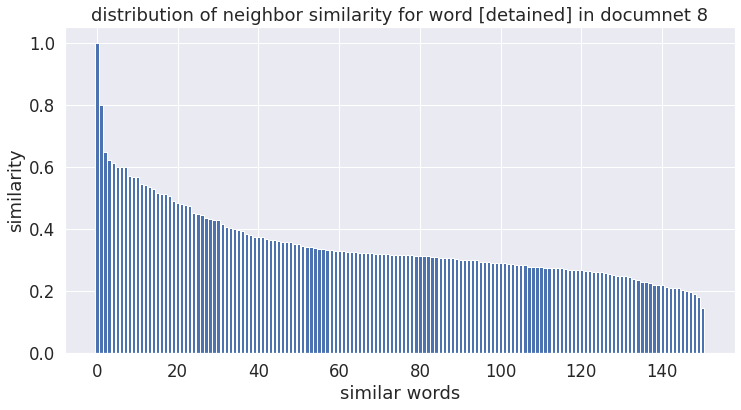

131   -->  since
1690
[0.99999994, 0.6492353, 0.56719905, 0.55722666, 0.5564372, 0.5525088, 0.55193067, 0.5433605, 0.5296106, 0.5163811, 0.51361823, 0.51178074, 0.51009506, 0.5023811, 0.50203323, 0.50085247, 0.49525654, 0.48597562, 0.47246706, 0.47104093, 0.46567267, 0.46551114, 0.4643953, 0.4643207, 0.4574526, 0.44522446, 0.44448727, 0.44434208, 0.43957573, 0.43722242, 0.43390027, 0.42320907, 0.4222184, 0.42065108, 0.41209498, 0.41190287, 0.40695244, 0.40652984, 0.402703, 0.40161392, 0.39929843, 0.39787748, 0.3938213, 0.3936857, 0.38748175, 0.3865886, 0.3833093, 0.3830333, 0.38092732, 0.3789882, 0.37811616, 0.37605882, 0.37594375, 0.3748414, 0.374839, 0.37452134, 0.36928868, 0.36017764, 0.35880426, 0.35346383, 0.35136843, 0.35118657, 0.3510551, 0.3504804, 0.3497389, 0.34958723, 0.34761974, 0.34684947, 0.3464146, 0.34458435, 0.34340557, 0.34310913, 0.34256577, 0.33955768, 0.3287278, 0.3283647, 0.3277673, 0.32747853, 0.3263005, 0.3262317, 0.32560432, 0.3219928, 0.32128993, 0.3211866, 0.

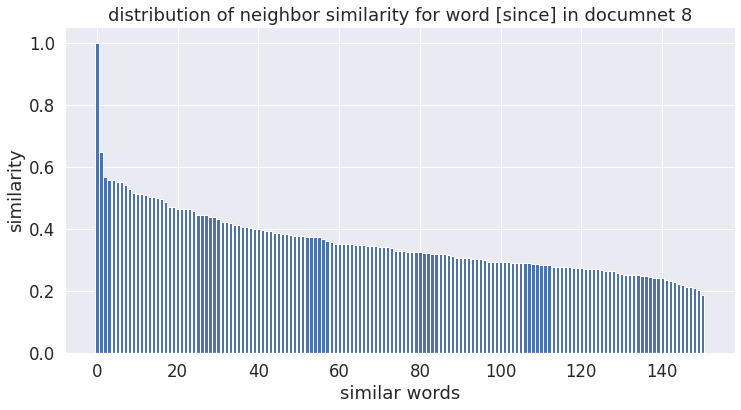

132   -->  president
1690
[1.0, 0.8334771, 0.8047081, 0.8028939, 0.7419672, 0.6405169, 0.6338567, 0.59919775, 0.57906735, 0.57374895, 0.5527779, 0.5525088, 0.54200166, 0.54046285, 0.53670627, 0.5350894, 0.5332649, 0.5283677, 0.52800584, 0.52035886, 0.518661, 0.5139977, 0.51032186, 0.50995076, 0.50829285, 0.5079509, 0.5073339, 0.5061101, 0.505774, 0.5001867, 0.49966708, 0.49962938, 0.49739087, 0.49181634, 0.4916845, 0.48776037, 0.48696423, 0.486691, 0.4847898, 0.4767646, 0.4750115, 0.4727561, 0.4696188, 0.46011686, 0.45134744, 0.44271678, 0.43860686, 0.4336375, 0.4320119, 0.4245803, 0.42365152, 0.42274067, 0.420748, 0.42062557, 0.41906783, 0.4189092, 0.41881785, 0.41858336, 0.41460195, 0.41076696, 0.4091485, 0.40461275, 0.4034006, 0.39947724, 0.39893425, 0.39730495, 0.39282638, 0.38997236, 0.38984844, 0.38637996, 0.38364422, 0.38124162, 0.38070023, 0.3753194, 0.3735302, 0.36837393, 0.36188903, 0.36079144, 0.36017054, 0.359272, 0.3588729, 0.35797906, 0.3567512, 0.35474318, 0.35292536, 0.

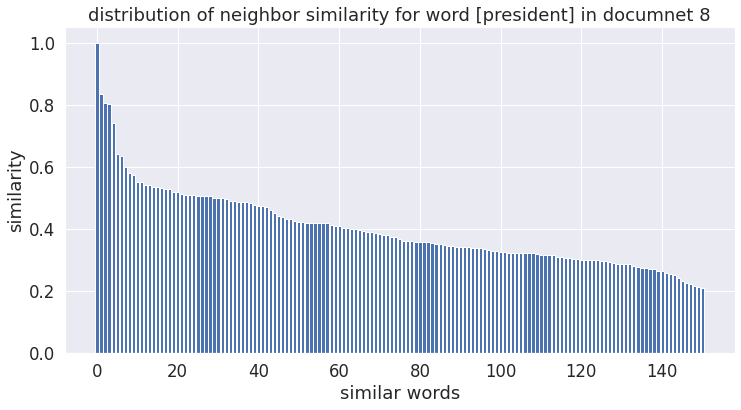

133   -->  nicola
1690
[0.9999999, 0.8467769, 0.82486093, 0.8047081, 0.58924603, 0.54120576, 0.5312716, 0.5212098, 0.52119696, 0.5188645, 0.51661265, 0.50309086, 0.50081646, 0.4980758, 0.49037075, 0.48919725, 0.48597562, 0.48354018, 0.4773012, 0.4698064, 0.46301806, 0.46065396, 0.4588912, 0.45874774, 0.45794547, 0.45444775, 0.4539028, 0.45013714, 0.44975013, 0.44951046, 0.4458666, 0.44116098, 0.44097435, 0.43938923, 0.4313954, 0.42297214, 0.4209233, 0.4196781, 0.41813284, 0.41328734, 0.41184455, 0.4104171, 0.40887934, 0.40692222, 0.40393293, 0.40342176, 0.401055, 0.40084964, 0.39877516, 0.39260954, 0.39140797, 0.38853192, 0.38559973, 0.38484937, 0.38219064, 0.37387568, 0.37328693, 0.37225723, 0.37121627, 0.37081453, 0.36750764, 0.35797966, 0.35607553, 0.35416964, 0.35160092, 0.35068768, 0.34964204, 0.34958994, 0.34681088, 0.34671888, 0.3457654, 0.3452974, 0.34283242, 0.33967805, 0.33963695, 0.3385566, 0.33702862, 0.33692485, 0.33101913, 0.32617247, 0.32485163, 0.32348764, 0.32253087, 0

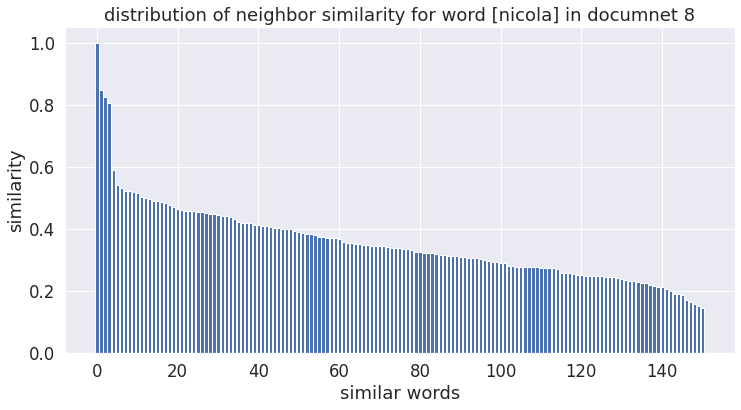

134   -->  ##e
1690
[1.0, 0.8334771, 0.82894015, 0.82486093, 0.63992286, 0.5709415, 0.5626259, 0.5374297, 0.53299963, 0.5324845, 0.53033304, 0.5266249, 0.5261975, 0.52065325, 0.5163811, 0.51367754, 0.51295686, 0.509521, 0.50897783, 0.5070041, 0.50595677, 0.50215834, 0.50067264, 0.497135, 0.49635854, 0.49400017, 0.49275404, 0.49057603, 0.49046403, 0.4904635, 0.4838968, 0.4768615, 0.4739078, 0.46605402, 0.46201074, 0.45892942, 0.45880613, 0.456885, 0.45481163, 0.45399332, 0.45165235, 0.45058513, 0.4503074, 0.44633391, 0.4462852, 0.43946797, 0.43214774, 0.4286292, 0.42637587, 0.4257378, 0.4253837, 0.42522037, 0.42326295, 0.42221814, 0.4220246, 0.41709843, 0.41489148, 0.41426015, 0.413719, 0.41331136, 0.40973356, 0.40697682, 0.40491802, 0.4046021, 0.40363738, 0.40325025, 0.40215018, 0.40212947, 0.39902058, 0.39443395, 0.39373404, 0.38780582, 0.3831668, 0.38122278, 0.38103485, 0.38092512, 0.37737364, 0.36870837, 0.3682165, 0.3674546, 0.36707488, 0.36678672, 0.36629838, 0.36566797, 0.3642103

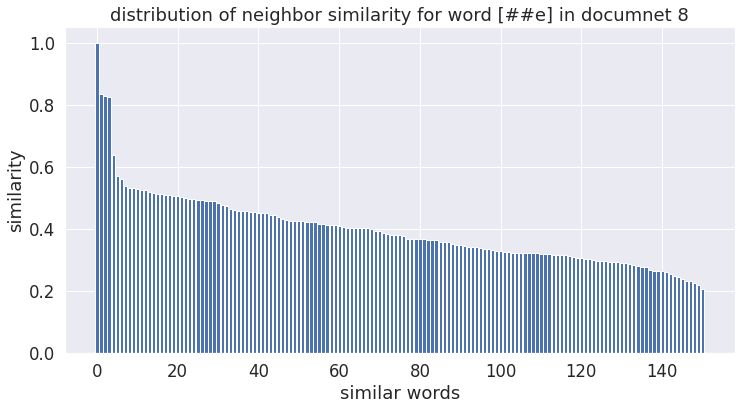

135   -->  ce
1690
[0.84980655, 0.83993214, 0.8074126, 0.78317237, 0.63235706, 0.586392, 0.54167295, 0.5360683, 0.5324865, 0.5152651, 0.5121776, 0.50640094, 0.505051, 0.5046565, 0.49906403, 0.4947736, 0.49144417, 0.48562384, 0.48483062, 0.47992718, 0.4718767, 0.46813396, 0.46710944, 0.46239454, 0.45643514, 0.45356217, 0.44997755, 0.44859564, 0.44646752, 0.43955737, 0.43810016, 0.43201864, 0.42845964, 0.4274329, 0.4261729, 0.41697475, 0.41498572, 0.4142175, 0.40804493, 0.40317205, 0.40264267, 0.40207595, 0.39542884, 0.39540553, 0.3952539, 0.39336747, 0.39075512, 0.38308525, 0.38217705, 0.37983805, 0.3764602, 0.37355462, 0.37334818, 0.37135768, 0.3691069, 0.36797097, 0.36725277, 0.36659968, 0.36551052, 0.36365128, 0.36299038, 0.36252642, 0.3587952, 0.35801876, 0.35319465, 0.35274905, 0.3511675, 0.34737682, 0.34606534, 0.34533438, 0.34230876, 0.3402769, 0.33451158, 0.3335587, 0.33288333, 0.32955292, 0.32626724, 0.32471114, 0.32406837, 0.32349068, 0.3162254, 0.31583357, 0.31113446, 0.30950

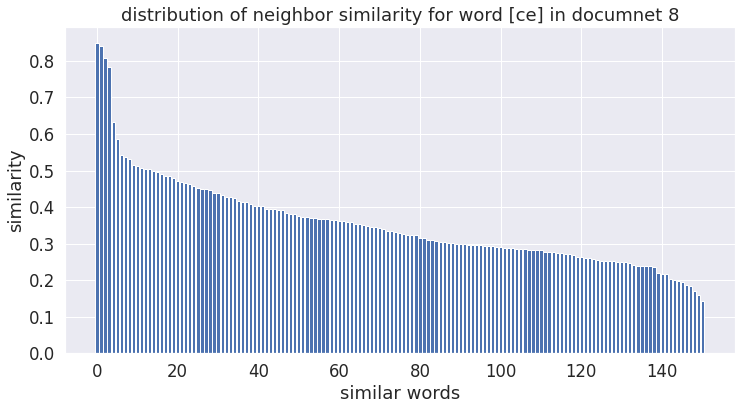

136   -->  ##aus
1690
[0.81686795, 0.8080243, 0.76441884, 0.76145315, 0.57706386, 0.57209706, 0.56113625, 0.5497894, 0.5096242, 0.50600886, 0.5047254, 0.49750113, 0.49055615, 0.4858143, 0.48476782, 0.47908574, 0.47403735, 0.47128224, 0.46619123, 0.43733144, 0.4360343, 0.43561658, 0.43483305, 0.42766908, 0.42656738, 0.42405438, 0.42368895, 0.4172461, 0.40789795, 0.407295, 0.40611517, 0.40253446, 0.40200016, 0.39396745, 0.393705, 0.39248145, 0.39110896, 0.38579437, 0.38303292, 0.37776935, 0.37651956, 0.37232107, 0.37206274, 0.3681906, 0.3654032, 0.3619529, 0.36030596, 0.35854784, 0.35465738, 0.35354203, 0.35241088, 0.35160547, 0.34028858, 0.3402546, 0.33490872, 0.3308369, 0.32994413, 0.3240205, 0.32197565, 0.3179137, 0.3157252, 0.31065947, 0.30982965, 0.309691, 0.30737913, 0.3070926, 0.30521753, 0.3025079, 0.30227917, 0.29792285, 0.29778117, 0.29258233, 0.29211873, 0.29165882, 0.2913053, 0.29002333, 0.28949028, 0.28922892, 0.28911304, 0.28500813, 0.27939305, 0.27843726, 0.27776685, 0.277

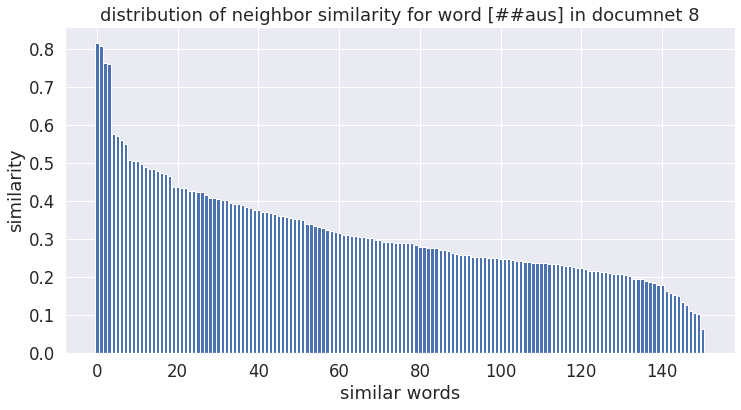

137   -->  ##escu
1690
[1.0000001, 0.8467769, 0.82894015, 0.8028939, 0.65631074, 0.5731667, 0.56434184, 0.5488695, 0.5358907, 0.5343791, 0.5332364, 0.5257302, 0.51449436, 0.5073352, 0.50373805, 0.5036669, 0.50284827, 0.5024301, 0.5022074, 0.50085247, 0.5005611, 0.49934763, 0.4956699, 0.4916442, 0.48903787, 0.48489636, 0.48293793, 0.48039454, 0.47921616, 0.4704308, 0.4657379, 0.46135032, 0.46094325, 0.46052292, 0.45871913, 0.45153478, 0.4463367, 0.44598228, 0.43853596, 0.43741697, 0.43533057, 0.4348454, 0.43020773, 0.42967647, 0.42947984, 0.42708623, 0.42347017, 0.42204967, 0.41774914, 0.40812913, 0.4005484, 0.3995801, 0.39599204, 0.39588195, 0.39373416, 0.3930096, 0.39196742, 0.3902541, 0.38627723, 0.384646, 0.38359702, 0.38261423, 0.3817867, 0.38084948, 0.3805892, 0.3786701, 0.37678003, 0.37590125, 0.37196302, 0.3655879, 0.3612302, 0.36027324, 0.35986346, 0.3584634, 0.35837477, 0.35276932, 0.35065588, 0.34922355, 0.34623152, 0.34549332, 0.3449781, 0.3448391, 0.34169894, 0.3415022, 0.3

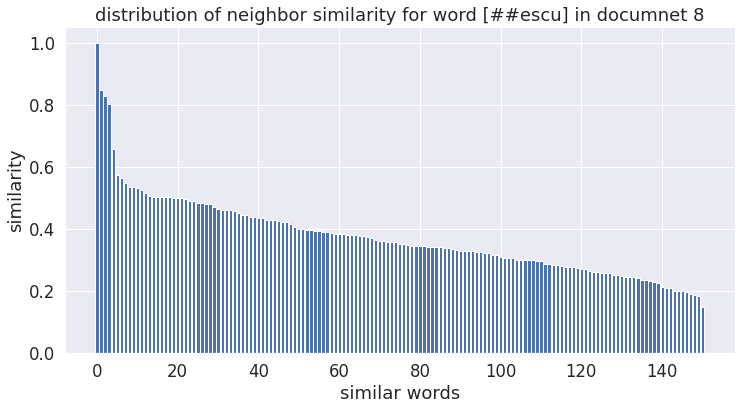

140   -->  overthrow
1690
[1.0, 0.7419672, 0.65631074, 0.63992286, 0.6373137, 0.6214106, 0.60490626, 0.58924603, 0.58504015, 0.5777121, 0.56719905, 0.5504837, 0.5483381, 0.5446016, 0.5343231, 0.53240764, 0.5217756, 0.5181818, 0.5105575, 0.5097112, 0.50893676, 0.50695467, 0.5062647, 0.50558656, 0.50131106, 0.50130194, 0.49082607, 0.49073797, 0.489776, 0.48827505, 0.48082864, 0.47725424, 0.47532904, 0.47237676, 0.46801305, 0.4675828, 0.46729773, 0.4589107, 0.45847332, 0.4575414, 0.45461956, 0.44967565, 0.447367, 0.4455253, 0.44361365, 0.43508813, 0.43282318, 0.43020624, 0.4295623, 0.4278507, 0.42474508, 0.42361796, 0.4230237, 0.41791445, 0.4154535, 0.41519865, 0.41456008, 0.4103662, 0.40645134, 0.40551865, 0.40027547, 0.39939153, 0.39374977, 0.39156628, 0.3896529, 0.38921148, 0.3891664, 0.38900724, 0.38718092, 0.38574117, 0.38539857, 0.38487414, 0.38482606, 0.38082168, 0.38075933, 0.38062498, 0.3791266, 0.37277567, 0.37086082, 0.36786568, 0.36783484, 0.36518145, 0.36452, 0.36443302, 0.36

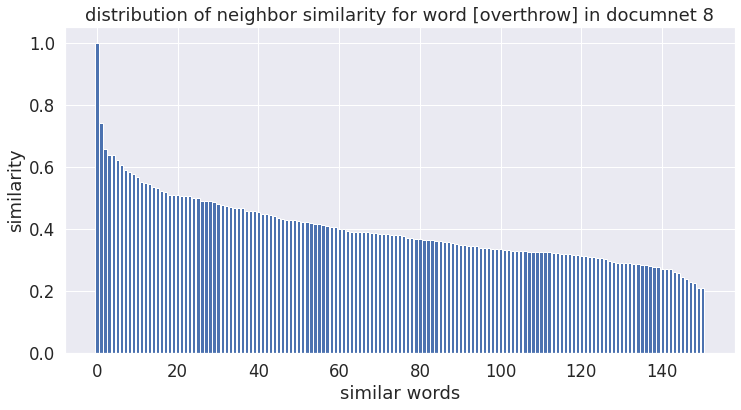

144   -->  urging
1690
[1.0000001, 0.65103674, 0.54653543, 0.52591753, 0.50664103, 0.5056509, 0.4487699, 0.4424302, 0.42875278, 0.42459023, 0.41666704, 0.41293085, 0.40676427, 0.39516824, 0.3936857, 0.39262652, 0.39206198, 0.39136016, 0.3904419, 0.3849954, 0.38464692, 0.38250753, 0.37766078, 0.36969975, 0.3695729, 0.36774102, 0.35733443, 0.35431585, 0.35207587, 0.3482255, 0.3477059, 0.34086347, 0.3388332, 0.33692485, 0.33527023, 0.32745248, 0.32688758, 0.32645926, 0.32479107, 0.32477146, 0.3244263, 0.32319832, 0.3213317, 0.3188522, 0.31342185, 0.3132043, 0.31022286, 0.30753294, 0.30393642, 0.30080825, 0.30003357, 0.29777318, 0.29045555, 0.28750512, 0.28012928, 0.2795894, 0.27896395, 0.27866355, 0.27460986, 0.2727915, 0.27150762, 0.27008018, 0.26919007, 0.26697382, 0.2651829, 0.264695, 0.26384917, 0.26353163, 0.2622485, 0.261779, 0.2610139, 0.25963032, 0.25905347, 0.256454, 0.25296935, 0.2526674, 0.2521156, 0.2516659, 0.2492581, 0.24902847, 0.24739808, 0.24737406, 0.24640901, 0.24412084

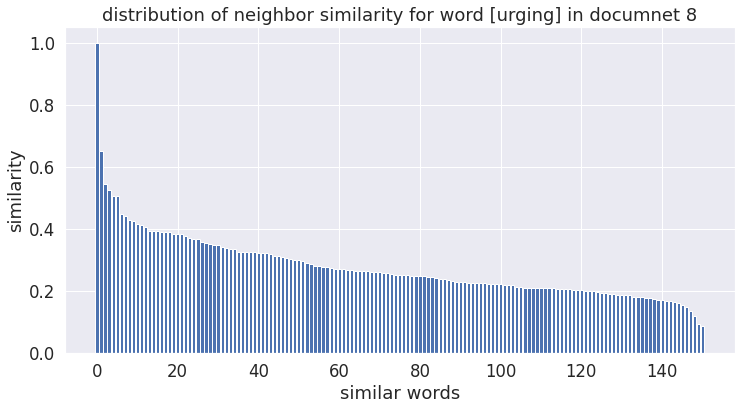

146   -->  party
1690
[0.77955294, 0.6780348, 0.65738034, 0.6508915, 0.6273328, 0.6204598, 0.5688342, 0.5581401, 0.55203426, 0.54840374, 0.5352353, 0.53393155, 0.51711035, 0.5083512, 0.50814855, 0.5055989, 0.49897864, 0.49716085, 0.48978293, 0.4831983, 0.48177385, 0.48111203, 0.4804883, 0.47929934, 0.47779942, 0.4764096, 0.4725201, 0.47099152, 0.46973613, 0.46959192, 0.46623516, 0.46461296, 0.46287262, 0.46207947, 0.46188086, 0.46131337, 0.4603626, 0.4574105, 0.43674898, 0.43557748, 0.43142718, 0.42527053, 0.4137609, 0.4136447, 0.4104314, 0.40996236, 0.40177315, 0.40072381, 0.3989293, 0.39591846, 0.3934781, 0.39282498, 0.3912244, 0.3900875, 0.38929653, 0.38844985, 0.38699841, 0.3830072, 0.38239717, 0.3819383, 0.37937677, 0.37921476, 0.37855315, 0.37564406, 0.37419534, 0.37298787, 0.37246132, 0.3716197, 0.36966008, 0.36669, 0.3660543, 0.3632989, 0.36159718, 0.35591614, 0.34964147, 0.34855714, 0.34653503, 0.34555972, 0.34468773, 0.3436027, 0.34035078, 0.33849955, 0.33774495, 0.3374688, 0

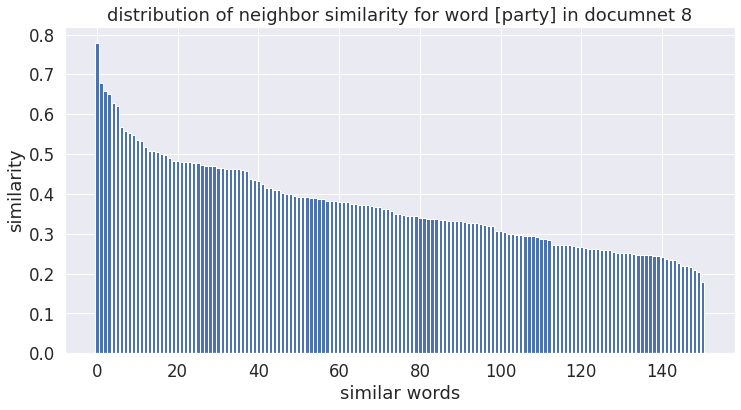

149   -->  dissolution
1690
[0.9999999, 0.6214106, 0.6145959, 0.59919775, 0.5590861, 0.5513767, 0.5358907, 0.5275147, 0.5266249, 0.5232376, 0.5188645, 0.50664103, 0.4974205, 0.4966358, 0.49629903, 0.4947406, 0.49113858, 0.4886365, 0.48695388, 0.48565614, 0.48318678, 0.48215705, 0.48065996, 0.47755504, 0.47320053, 0.469867, 0.4679727, 0.46755463, 0.46381134, 0.46147183, 0.45188954, 0.4497547, 0.44314533, 0.4404866, 0.43993682, 0.439573, 0.4387896, 0.4364183, 0.42897785, 0.42215043, 0.42049676, 0.41968936, 0.41943496, 0.41536942, 0.4146893, 0.4112627, 0.41036397, 0.40784013, 0.40677202, 0.4058835, 0.40454674, 0.39946306, 0.39787748, 0.3963079, 0.39577314, 0.39451566, 0.3933599, 0.3925872, 0.39185202, 0.3906585, 0.38980472, 0.38280004, 0.3822593, 0.38215086, 0.37955743, 0.37774765, 0.37430102, 0.37415588, 0.37029612, 0.36983117, 0.36898112, 0.36758792, 0.3674758, 0.3667273, 0.36442044, 0.36433023, 0.36398667, 0.360973, 0.3601792, 0.35889968, 0.3567837, 0.35629654, 0.35604745, 0.35523543, 

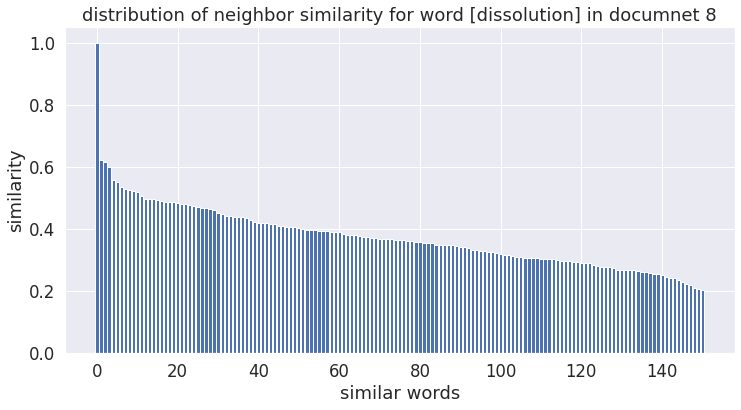

150   -->  appear
1690
[1.0, 0.69069195, 0.68742466, 0.6391705, 0.60104644, 0.54823923, 0.54085004, 0.53022873, 0.5161755, 0.48918906, 0.48473656, 0.4723946, 0.47026432, 0.45188546, 0.4450114, 0.44483557, 0.4256754, 0.42522037, 0.41310507, 0.41293085, 0.4125957, 0.4119329, 0.41184455, 0.41163847, 0.4005484, 0.39947724, 0.39687556, 0.38968313, 0.38744217, 0.38340127, 0.3751004, 0.37102938, 0.3675042, 0.36728573, 0.3649711, 0.3641442, 0.36294588, 0.35889968, 0.35736275, 0.35316545, 0.35110006, 0.34958723, 0.3490072, 0.34602645, 0.34496856, 0.34282362, 0.34196657, 0.34120253, 0.337411, 0.3365881, 0.32760733, 0.32731938, 0.3268787, 0.32528836, 0.3237797, 0.32253778, 0.32123744, 0.32120773, 0.32017925, 0.31953856, 0.3184893, 0.31799918, 0.31582338, 0.31511956, 0.3134145, 0.31206876, 0.31156194, 0.31077397, 0.3100143, 0.30687702, 0.30167547, 0.30131617, 0.300508, 0.3004997, 0.3004822, 0.29960066, 0.2959463, 0.2958455, 0.29003823, 0.28913972, 0.288544, 0.28834328, 0.2870286, 0.28581, 0.285049

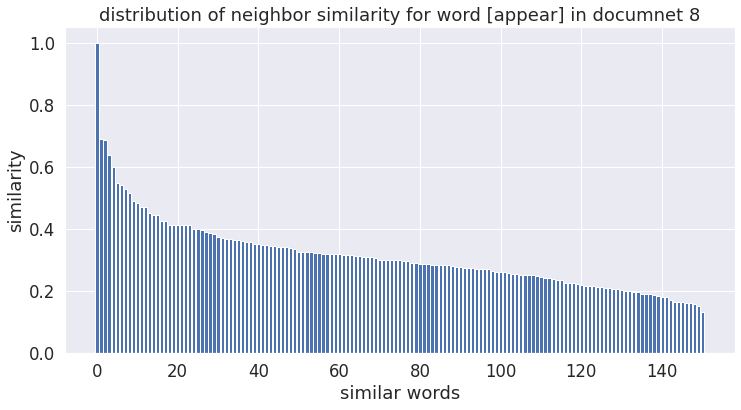

153   -->  high
1690
[0.9999997, 0.8539877, 0.7329384, 0.68385684, 0.63125706, 0.62968993, 0.6227571, 0.62099457, 0.612363, 0.5988369, 0.5955761, 0.59548026, 0.5877671, 0.5860705, 0.582822, 0.5825902, 0.5643354, 0.54454195, 0.5201674, 0.5161755, 0.51032186, 0.50876904, 0.5021541, 0.50203323, 0.50130194, 0.47776526, 0.4739078, 0.46052292, 0.46017176, 0.4539028, 0.45263013, 0.44348907, 0.42970616, 0.42747805, 0.4240135, 0.4209965, 0.4157641, 0.41408616, 0.4130143, 0.41274494, 0.41049036, 0.40605813, 0.40459025, 0.40305573, 0.40186593, 0.40018222, 0.39639676, 0.39577314, 0.39004737, 0.38750324, 0.38406444, 0.38367265, 0.3824414, 0.38098556, 0.38098106, 0.38043836, 0.37579128, 0.37509662, 0.3740412, 0.37357435, 0.36932555, 0.36713603, 0.36603725, 0.3617609, 0.36012203, 0.3600632, 0.35843757, 0.35669583, 0.35567462, 0.35207587, 0.35143983, 0.35014072, 0.34868947, 0.34644043, 0.34410027, 0.3431068, 0.34234443, 0.3399287, 0.33981436, 0.33627707, 0.3350605, 0.3349458, 0.33358157, 0.33334482, 0

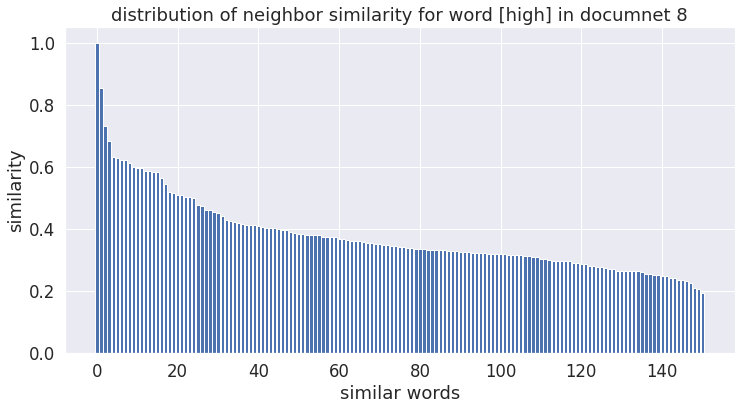

155   -->  ranking
1690
[0.9999998, 0.8539877, 0.7669896, 0.6451017, 0.6226651, 0.61404055, 0.60387886, 0.59542096, 0.5896998, 0.5782038, 0.57509744, 0.56759465, 0.5661181, 0.55139965, 0.5431384, 0.54237413, 0.53576374, 0.51178074, 0.50570405, 0.50131106, 0.4984907, 0.4916845, 0.4855225, 0.48434678, 0.47026432, 0.45352617, 0.4513753, 0.4503074, 0.4463367, 0.44507468, 0.4402492, 0.42967895, 0.41236085, 0.40547207, 0.40454674, 0.40084964, 0.3995418, 0.3962233, 0.3947339, 0.39046073, 0.38990355, 0.38919675, 0.3883978, 0.38464692, 0.38252175, 0.38124683, 0.37906474, 0.3761422, 0.37543422, 0.36997598, 0.3686397, 0.36709934, 0.36510193, 0.36500508, 0.36226454, 0.36162788, 0.36036187, 0.3579449, 0.3575158, 0.3546702, 0.35349542, 0.34692246, 0.3463642, 0.34595972, 0.34588072, 0.34480977, 0.3417559, 0.34112126, 0.34100062, 0.34076256, 0.33729047, 0.33698308, 0.33661753, 0.336564, 0.33164644, 0.3306808, 0.33028868, 0.3286819, 0.3273562, 0.32686627, 0.32573396, 0.32272524, 0.32019958, 0.3189116, 

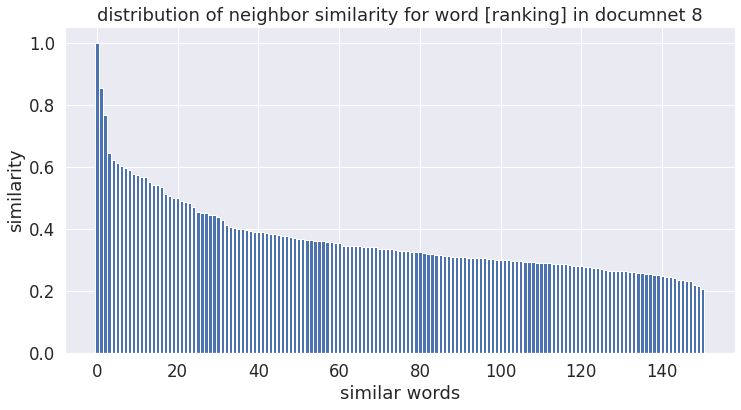

156   -->  officials
1690
[1.0, 0.7669896, 0.7329384, 0.68902683, 0.68731743, 0.6436968, 0.61434567, 0.61206305, 0.6012158, 0.58360493, 0.5795327, 0.57471234, 0.5681205, 0.5634892, 0.5504426, 0.5498948, 0.53731525, 0.51693577, 0.5107008, 0.4976644, 0.48131967, 0.47246706, 0.46729773, 0.4645942, 0.4540211, 0.4520519, 0.44672957, 0.4450194, 0.44483557, 0.44271678, 0.4369049, 0.43567127, 0.42597923, 0.4248876, 0.4231736, 0.41666704, 0.4148475, 0.4106652, 0.40849757, 0.40844914, 0.4078251, 0.40578339, 0.4037763, 0.40363738, 0.40182614, 0.39817387, 0.3963079, 0.39373416, 0.39065397, 0.38360488, 0.38322297, 0.37999982, 0.3793705, 0.37490958, 0.37414005, 0.3680702, 0.36767146, 0.3666828, 0.36460656, 0.36373177, 0.3631119, 0.3615879, 0.3598894, 0.35945466, 0.3590328, 0.35864434, 0.35839897, 0.35799873, 0.35756183, 0.35512292, 0.35446024, 0.34981, 0.34917903, 0.34874648, 0.34131402, 0.34035903, 0.33967805, 0.3387913, 0.33812702, 0.33528757, 0.33501333, 0.3347605, 0.332903, 0.3328999, 0.33157152

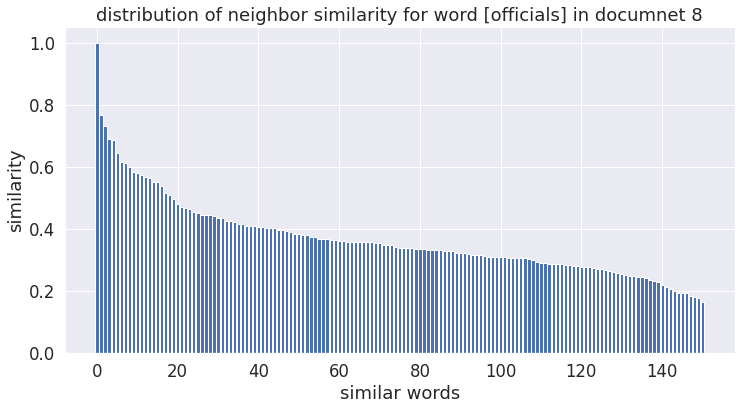

157   -->  seeking
1690
[0.9999998, 0.68731743, 0.6226651, 0.61330384, 0.612363, 0.56009424, 0.543623, 0.5401101, 0.53771627, 0.53137743, 0.52591753, 0.500248, 0.49525654, 0.490106, 0.47152418, 0.47029844, 0.46862796, 0.45555702, 0.44994387, 0.44929022, 0.439051, 0.43303776, 0.4319225, 0.4256754, 0.41808558, 0.41519865, 0.4135579, 0.40564746, 0.4052503, 0.40059063, 0.3911851, 0.38801032, 0.38534486, 0.3849637, 0.3822593, 0.36421037, 0.3612302, 0.36079144, 0.36062083, 0.35705048, 0.35481027, 0.35205135, 0.34758726, 0.34755245, 0.34752882, 0.34548813, 0.34541208, 0.34411836, 0.34354204, 0.3434042, 0.33940053, 0.33710337, 0.33702862, 0.33570838, 0.33540767, 0.33257794, 0.33128464, 0.33111075, 0.3294012, 0.3293687, 0.3288258, 0.32701755, 0.32700974, 0.32569912, 0.32565036, 0.32488123, 0.32401478, 0.3224714, 0.3212856, 0.32020324, 0.3190549, 0.31892368, 0.3167798, 0.31645292, 0.3162256, 0.31568974, 0.31558257, 0.31456143, 0.312284, 0.3102426, 0.30842084, 0.30756068, 0.30537856, 0.30524433, 

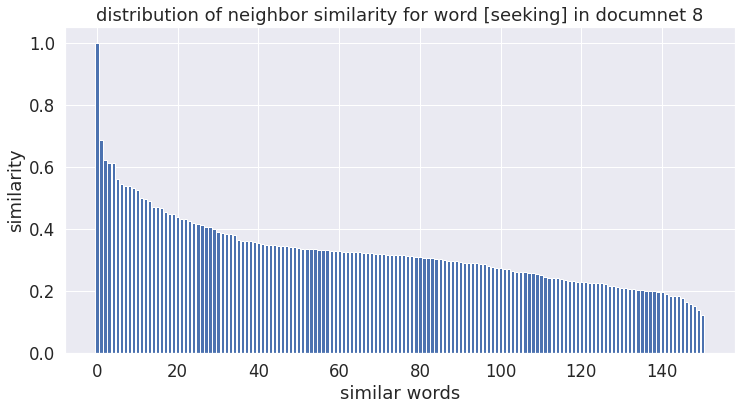

159   -->  new
1690
[0.83808964, 0.74820757, 0.65363014, 0.63520384, 0.6195913, 0.6076636, 0.5633509, 0.5550097, 0.5516815, 0.53374606, 0.5213632, 0.51441956, 0.51137763, 0.5050777, 0.5047444, 0.49983186, 0.49301684, 0.48464683, 0.47574726, 0.46901906, 0.4648351, 0.45884964, 0.45700604, 0.44944614, 0.44768474, 0.4454519, 0.4447792, 0.4365457, 0.4362577, 0.43599597, 0.4335964, 0.4277274, 0.4256458, 0.42400417, 0.42099184, 0.4188094, 0.41687733, 0.41407707, 0.4132226, 0.41085285, 0.40915602, 0.40595394, 0.39999622, 0.39823228, 0.39805582, 0.39493895, 0.39331442, 0.39201245, 0.39184165, 0.39070666, 0.39000803, 0.38607755, 0.38353157, 0.38321975, 0.38086084, 0.3800517, 0.37915564, 0.37694606, 0.37365746, 0.37346023, 0.37313473, 0.36839545, 0.36656886, 0.3664289, 0.36549157, 0.36436677, 0.36387366, 0.36161083, 0.35985368, 0.35661656, 0.35612243, 0.3510912, 0.35095856, 0.3479959, 0.34414536, 0.34257826, 0.3424122, 0.34227848, 0.34071293, 0.33917904, 0.3375826, 0.33247405, 0.33172786, 0.32724

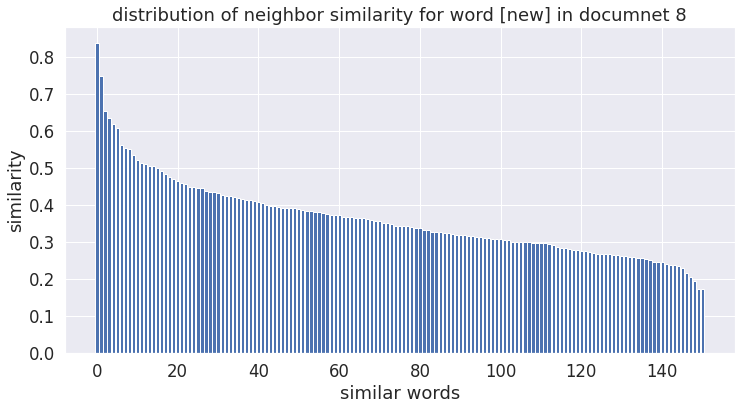

160   -->  political
1690
[0.99999976, 0.8203732, 0.6451017, 0.62968993, 0.61434567, 0.61330384, 0.6112134, 0.57810944, 0.5754294, 0.56710494, 0.5483381, 0.5445755, 0.5283677, 0.51689047, 0.51287866, 0.5023811, 0.49912643, 0.49879563, 0.4956699, 0.49180454, 0.48389703, 0.48335475, 0.4807382, 0.4768615, 0.4761861, 0.470281, 0.46381134, 0.46306428, 0.455864, 0.45467836, 0.45444775, 0.45166826, 0.45147336, 0.45139194, 0.44772312, 0.44243208, 0.44121125, 0.4374285, 0.43652755, 0.43600217, 0.4346219, 0.42903328, 0.42755014, 0.42660454, 0.42494112, 0.42404148, 0.42163032, 0.42082846, 0.41805893, 0.416775, 0.41646048, 0.41596454, 0.41521293, 0.41406056, 0.4119329, 0.40687627, 0.40392232, 0.40175247, 0.40035042, 0.40030828, 0.39792576, 0.39663157, 0.39656642, 0.39598683, 0.39507204, 0.3935658, 0.39179474, 0.3849227, 0.3840949, 0.3840891, 0.38390014, 0.37827253, 0.37731212, 0.3771763, 0.37528583, 0.36870643, 0.3675055, 0.36730543, 0.36713836, 0.36626738, 0.3650301, 0.3640885, 0.36310393, 0.3598

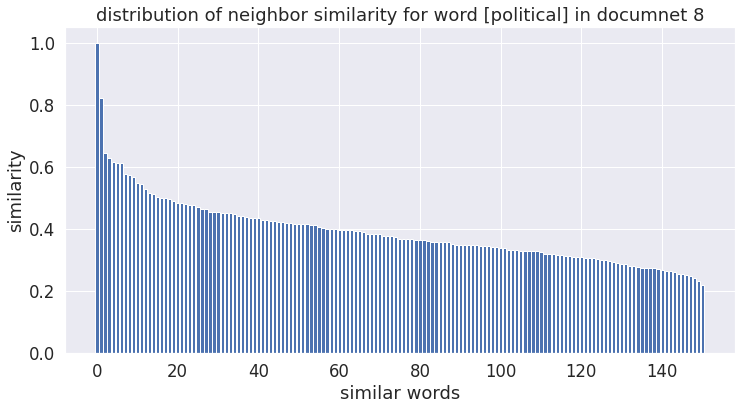

161   -->  profile
1690
[0.99999976, 0.8203732, 0.5896998, 0.58360493, 0.582822, 0.56009424, 0.5490223, 0.52192783, 0.5203998, 0.51900876, 0.5105575, 0.4770711, 0.45963752, 0.45566213, 0.45265716, 0.45145404, 0.45094836, 0.44448727, 0.44021457, 0.4362806, 0.43127012, 0.42671803, 0.42658332, 0.42648363, 0.42620057, 0.42464775, 0.41881785, 0.41432506, 0.41209942, 0.4112627, 0.4110925, 0.4098587, 0.4055974, 0.4053287, 0.4052894, 0.4049621, 0.40326667, 0.40167934, 0.40129533, 0.40076536, 0.4003042, 0.3962472, 0.39583692, 0.3941084, 0.39296418, 0.39264792, 0.39123526, 0.38774437, 0.38648665, 0.3864426, 0.38627723, 0.38455588, 0.38376814, 0.38338956, 0.38295552, 0.3808956, 0.37990868, 0.37615886, 0.37480432, 0.37477022, 0.37426996, 0.37392628, 0.37324256, 0.37244862, 0.37036604, 0.36985815, 0.3691798, 0.36781722, 0.36370465, 0.36314142, 0.36256576, 0.36110842, 0.35849422, 0.35838687, 0.35607553, 0.3547023, 0.35118774, 0.3494111, 0.34838128, 0.34671563, 0.34496856, 0.3433367, 0.34299004, 0.34

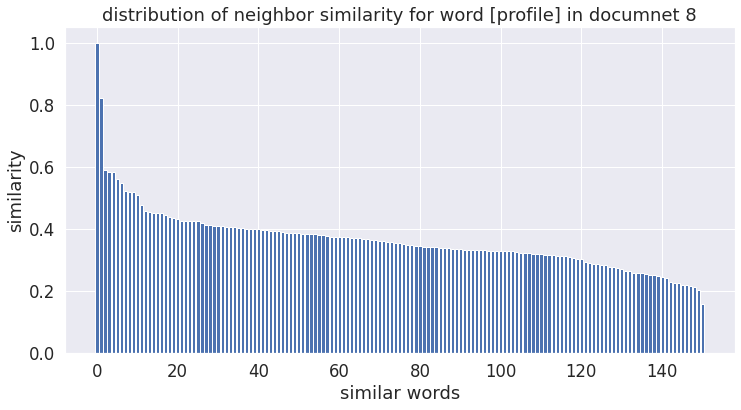

164   -->  open
1690
[1.0000001, 0.8297302, 0.742287, 0.6401153, 0.63845205, 0.4704308, 0.4696188, 0.4675713, 0.45467836, 0.45058513, 0.44772646, 0.44489688, 0.4387896, 0.4275065, 0.4260021, 0.42402714, 0.42388874, 0.41813284, 0.41791445, 0.4153735, 0.41187066, 0.411435, 0.391781, 0.39010245, 0.38648665, 0.38007635, 0.37833387, 0.37466353, 0.3701632, 0.36767146, 0.366871, 0.36032024, 0.3602657, 0.35970145, 0.35885885, 0.35870975, 0.35836545, 0.3583539, 0.3581648, 0.35394442, 0.35337508, 0.35145116, 0.35143983, 0.34882045, 0.3478312, 0.3469543, 0.3467446, 0.346314, 0.34581345, 0.34511966, 0.3446534, 0.34378308, 0.34377635, 0.34256577, 0.34251148, 0.34184274, 0.34112126, 0.34053418, 0.33656245, 0.3360673, 0.33580774, 0.33157116, 0.32907814, 0.32907307, 0.32877192, 0.3244704, 0.32228372, 0.3215863, 0.3194137, 0.31882918, 0.31586537, 0.31353468, 0.31301385, 0.31237343, 0.3122913, 0.31196266, 0.31007785, 0.3072628, 0.3060851, 0.30565405, 0.30113328, 0.30056295, 0.300508, 0.29895636, 0.29186

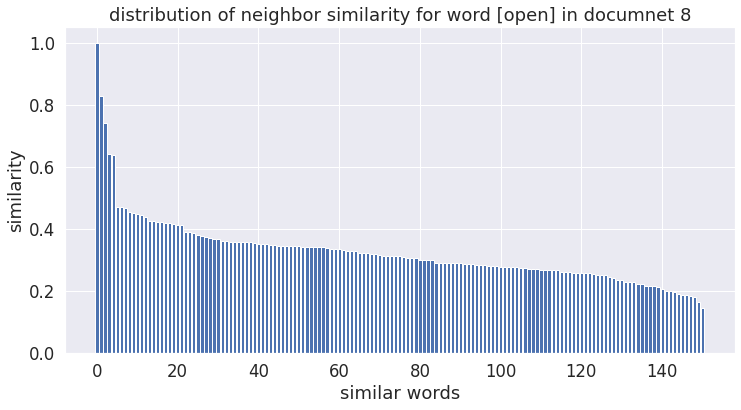

165   -->  elections
1690
[1.0000002, 0.8297302, 0.7591431, 0.6838843, 0.59186697, 0.5332649, 0.5332364, 0.5190729, 0.509521, 0.48827505, 0.48565614, 0.48354018, 0.48335475, 0.47768864, 0.4654508, 0.46125478, 0.4609096, 0.43729955, 0.43261644, 0.42597923, 0.41789725, 0.41646326, 0.41298717, 0.4118412, 0.40805432, 0.40805262, 0.40772504, 0.40569827, 0.4052894, 0.40459025, 0.40011755, 0.39295834, 0.39280635, 0.39275587, 0.38768935, 0.3864705, 0.38621324, 0.38252175, 0.38079655, 0.38051334, 0.37842467, 0.3780852, 0.3774967, 0.3765855, 0.37598857, 0.37550235, 0.3746097, 0.37019032, 0.3695088, 0.36716932, 0.3662442, 0.3657068, 0.3641283, 0.36403686, 0.36138433, 0.3607974, 0.36045557, 0.35906, 0.3561194, 0.3551266, 0.35293153, 0.3504804, 0.35033435, 0.3492894, 0.34120253, 0.34118253, 0.3395184, 0.33936006, 0.33815336, 0.33678, 0.33559966, 0.33554333, 0.33379027, 0.33363196, 0.3325689, 0.33194214, 0.33039984, 0.3273194, 0.3241101, 0.32280767, 0.31810457, 0.31678826, 0.31408718, 0.3124012, 0.3

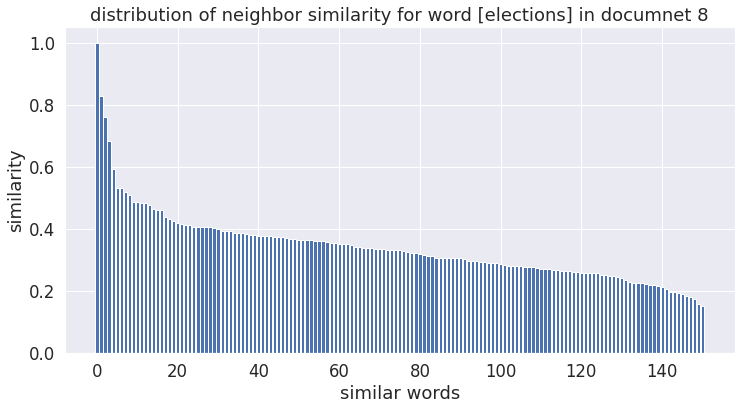

167   -->  held
1690
[0.99999976, 0.7877114, 0.7591431, 0.742287, 0.5585121, 0.5326851, 0.52035886, 0.5006387, 0.49934763, 0.49912643, 0.49275404, 0.46017176, 0.44892097, 0.4458666, 0.43282318, 0.43020606, 0.42967895, 0.42666483, 0.4207296, 0.42039084, 0.42035204, 0.41672993, 0.41504252, 0.41356045, 0.41246766, 0.41214842, 0.4106652, 0.40991798, 0.40870893, 0.40677202, 0.4053287, 0.4049519, 0.4019692, 0.39677852, 0.39084935, 0.39072222, 0.388539, 0.38793486, 0.38667992, 0.38092732, 0.3785777, 0.37597984, 0.37532663, 0.37253416, 0.3712291, 0.37103784, 0.36873585, 0.36672983, 0.3650548, 0.36435342, 0.35736275, 0.35681567, 0.35600138, 0.355461, 0.35450798, 0.3506919, 0.35049623, 0.34479445, 0.3440242, 0.34149367, 0.33940053, 0.3391407, 0.33518916, 0.3330446, 0.33244717, 0.32964265, 0.3288294, 0.32809573, 0.32775235, 0.3268867, 0.323947, 0.3234043, 0.32282293, 0.32257357, 0.3204935, 0.3199914, 0.31970176, 0.31862435, 0.31732517, 0.31544954, 0.31538966, 0.31488264, 0.31429482, 0.31421787, 0

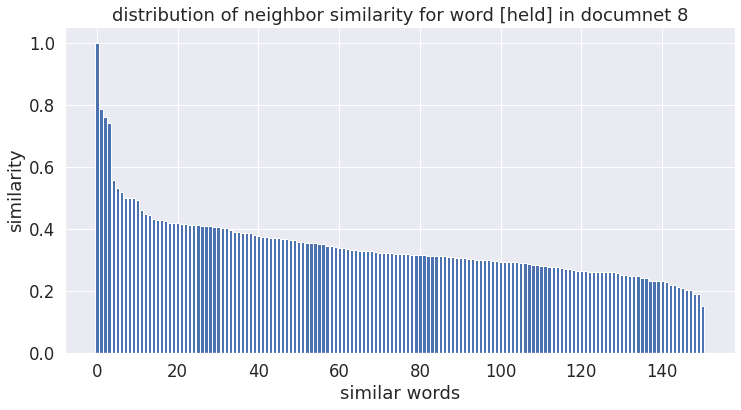

169   -->  swirl
1690
[0.7976902, 0.68624544, 0.62064797, 0.6137878, 0.61285865, 0.60736614, 0.592276, 0.57093966, 0.5582707, 0.55033517, 0.53946143, 0.5274465, 0.5270942, 0.52443576, 0.51684487, 0.5013215, 0.4933748, 0.48663718, 0.47857568, 0.47812113, 0.47750762, 0.47463056, 0.47436047, 0.47396183, 0.46681258, 0.46201402, 0.4546584, 0.45413354, 0.44963527, 0.4492221, 0.44864148, 0.44260544, 0.4380793, 0.43635356, 0.4362635, 0.43459666, 0.43217605, 0.42775676, 0.42647535, 0.42275667, 0.4175945, 0.40992257, 0.40689883, 0.40469036, 0.40376645, 0.4033794, 0.4033773, 0.40263456, 0.39879113, 0.39468423, 0.39437258, 0.3942302, 0.39135295, 0.3894999, 0.38671947, 0.38338807, 0.3827051, 0.38243386, 0.37901512, 0.37553778, 0.3741304, 0.37334126, 0.3732429, 0.37287304, 0.3717799, 0.36968082, 0.3692252, 0.36795914, 0.3677347, 0.36652735, 0.36392197, 0.36322954, 0.36213657, 0.36108124, 0.3609167, 0.35818693, 0.35735154, 0.35505384, 0.35427535, 0.35358047, 0.35085323, 0.35079375, 0.34895346, 0.3474

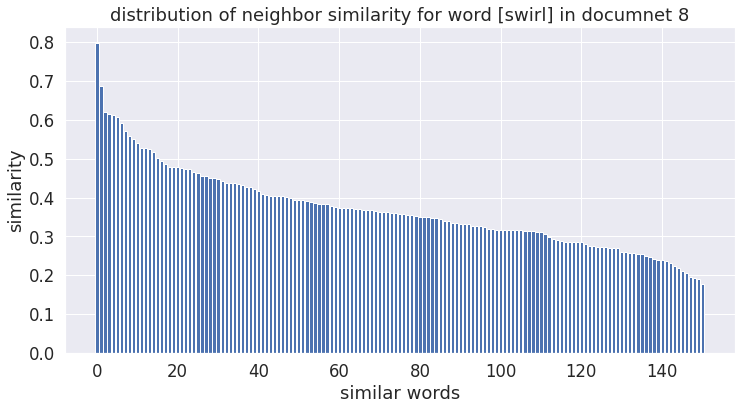

171   -->  revolutionary
1690
[0.9058256, 0.6992667, 0.6832782, 0.6796857, 0.6679526, 0.62746286, 0.59838736, 0.5979365, 0.58969355, 0.5719682, 0.56945443, 0.5643866, 0.5628546, 0.55714, 0.5569857, 0.5563086, 0.55531955, 0.55335253, 0.5501059, 0.54173684, 0.5335773, 0.53086716, 0.5163564, 0.5145865, 0.51406056, 0.5082308, 0.5040345, 0.5021789, 0.50117755, 0.49737287, 0.4947261, 0.49296424, 0.49166116, 0.48639628, 0.48365992, 0.48098823, 0.4803088, 0.47624058, 0.47346526, 0.47189444, 0.46959567, 0.4684394, 0.4644509, 0.46174896, 0.4592734, 0.4543189, 0.45077923, 0.4502511, 0.4459415, 0.44255006, 0.43996584, 0.4386817, 0.43745172, 0.43589976, 0.434725, 0.43327606, 0.43066216, 0.42947653, 0.4244694, 0.4216588, 0.42157978, 0.41707465, 0.41576946, 0.41119793, 0.4103287, 0.40896237, 0.40854275, 0.40710688, 0.4044521, 0.4040192, 0.39986718, 0.3979039, 0.39587808, 0.39584896, 0.3930031, 0.3928864, 0.39196572, 0.3896061, 0.38851467, 0.38701943, 0.38631636, 0.38304254, 0.38213363, 0.38063985, 0.

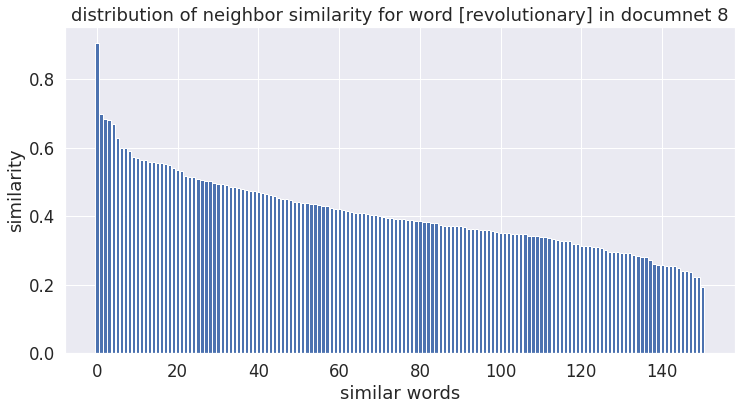

172   -->  fe
1690
[0.87711227, 0.71593636, 0.6780056, 0.6394217, 0.6334654, 0.6274668, 0.60772324, 0.60117537, 0.5816056, 0.56535053, 0.5391698, 0.5312541, 0.5265999, 0.5262994, 0.51754236, 0.5075923, 0.50004596, 0.49944293, 0.49770215, 0.49705306, 0.49081004, 0.48995835, 0.4895137, 0.48684284, 0.4857106, 0.48055866, 0.4798027, 0.47951445, 0.47802162, 0.47713518, 0.46855444, 0.4650649, 0.46203285, 0.4590516, 0.45833892, 0.45589828, 0.44240242, 0.4414668, 0.43357402, 0.43066946, 0.42162013, 0.421368, 0.41856807, 0.41771188, 0.41277745, 0.40453377, 0.4024863, 0.4009071, 0.39805776, 0.39573452, 0.38969588, 0.38967323, 0.38951546, 0.3889435, 0.3847541, 0.38412452, 0.38017678, 0.3792683, 0.3779216, 0.37787002, 0.37386972, 0.37098545, 0.37091574, 0.3703166, 0.36843508, 0.36767805, 0.3675865, 0.363029, 0.36156815, 0.36147168, 0.36081767, 0.35969263, 0.35887682, 0.3570658, 0.35671568, 0.3563409, 0.35410964, 0.34740177, 0.34672135, 0.3439282, 0.34367716, 0.34209132, 0.33754584, 0.33516657, 0.3

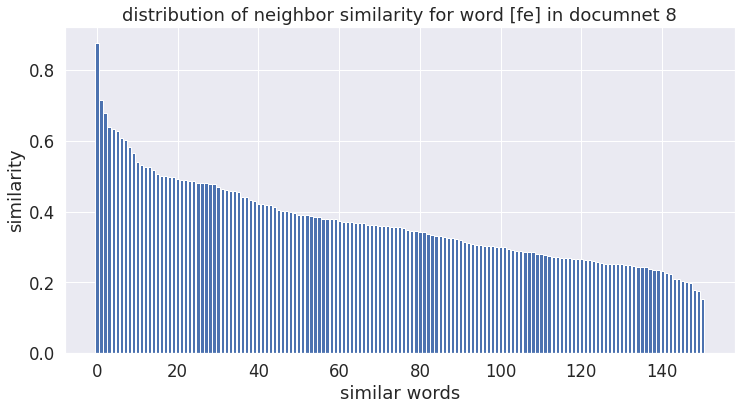

173   -->  ##r
1690
[0.8773131, 0.6767063, 0.61121595, 0.605874, 0.60233605, 0.56083417, 0.5604754, 0.5531406, 0.54701024, 0.5341289, 0.5267085, 0.50987744, 0.50732523, 0.5059482, 0.49557096, 0.49389464, 0.4937782, 0.4886941, 0.4862257, 0.47300577, 0.46971205, 0.46967667, 0.4686827, 0.4608017, 0.449694, 0.44962937, 0.44152963, 0.4350409, 0.42351162, 0.41823217, 0.41742128, 0.41316313, 0.41011006, 0.4098866, 0.40790626, 0.40756196, 0.40593386, 0.4013797, 0.40031338, 0.39854532, 0.3959909, 0.3938465, 0.3906957, 0.38826752, 0.3834378, 0.38250887, 0.38229162, 0.38169375, 0.38066697, 0.3764891, 0.37434703, 0.3662579, 0.36623493, 0.36564943, 0.36541528, 0.3640195, 0.36261207, 0.36212626, 0.36023846, 0.35848403, 0.357535, 0.35155606, 0.35014725, 0.34751344, 0.34675738, 0.3440209, 0.34191498, 0.34191084, 0.33718377, 0.3370217, 0.33258447, 0.33229008, 0.32263786, 0.3204925, 0.31874508, 0.3180513, 0.3175651, 0.31735015, 0.31637156, 0.3146811, 0.31363526, 0.3121124, 0.3106851, 0.30900028, 0.30869

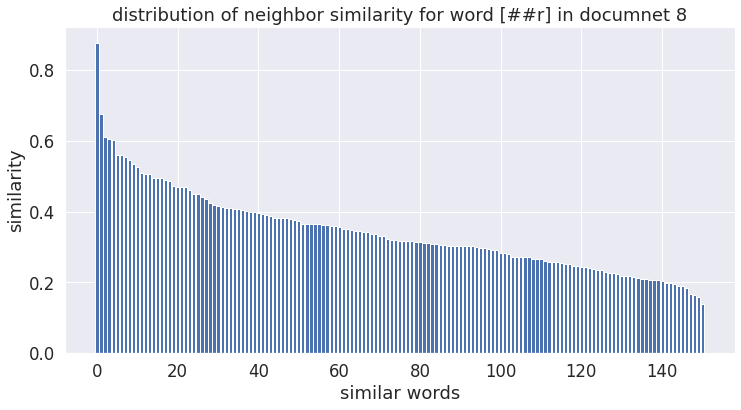

174   -->  ##vor
1690
[0.86992264, 0.71490943, 0.7026346, 0.69835067, 0.678786, 0.6525154, 0.62599015, 0.5966619, 0.56521463, 0.55688274, 0.551501, 0.5511855, 0.5452918, 0.5439185, 0.5268072, 0.5255855, 0.5233232, 0.51736754, 0.51734376, 0.5138553, 0.50768554, 0.5064491, 0.501739, 0.49515924, 0.49200705, 0.48963708, 0.4877254, 0.4854101, 0.4848359, 0.48444265, 0.4745595, 0.47001612, 0.4694435, 0.46617198, 0.45669338, 0.45421225, 0.45372272, 0.45094526, 0.4497665, 0.44973052, 0.44800463, 0.44354743, 0.43022913, 0.42952737, 0.42757213, 0.42195547, 0.42102343, 0.4197466, 0.41868347, 0.41838232, 0.41789877, 0.41489923, 0.4117576, 0.4112825, 0.40998212, 0.40794742, 0.4045545, 0.39964518, 0.39775947, 0.3974921, 0.3960387, 0.39257032, 0.391499, 0.39143425, 0.3901266, 0.38968843, 0.38866243, 0.38712922, 0.38629645, 0.38330895, 0.38257366, 0.37910563, 0.37726083, 0.37589678, 0.3717133, 0.37135318, 0.37040633, 0.36766192, 0.36474758, 0.36471617, 0.36456257, 0.36418435, 0.36341363, 0.36277813, 0.

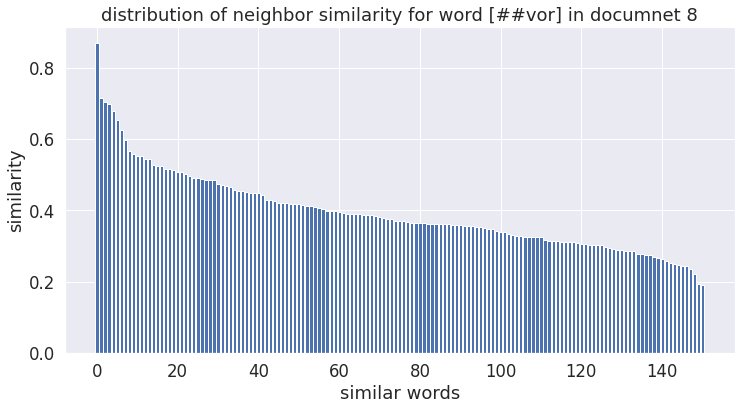

176   -->  eager
1690
[0.9999999, 0.8906491, 0.63643396, 0.55565274, 0.5345569, 0.5199995, 0.5198518, 0.51456094, 0.5075951, 0.49959922, 0.49624166, 0.48202395, 0.46516025, 0.46435022, 0.46303648, 0.45838183, 0.4548245, 0.4458058, 0.44515294, 0.4409302, 0.43794364, 0.4371578, 0.43687415, 0.4353645, 0.4326204, 0.42703724, 0.4268636, 0.42511916, 0.42303443, 0.42177328, 0.4090982, 0.40060794, 0.40059063, 0.3967284, 0.39228788, 0.39219955, 0.387219, 0.38610166, 0.38359702, 0.3835572, 0.38304162, 0.3812793, 0.36996624, 0.3695729, 0.36551356, 0.36460656, 0.36076322, 0.35629654, 0.3541579, 0.35256392, 0.35119802, 0.35110006, 0.3463642, 0.34379464, 0.34216288, 0.3398295, 0.33963695, 0.33900315, 0.33662835, 0.33404124, 0.33302802, 0.33067417, 0.3303756, 0.33035722, 0.32887945, 0.32702774, 0.32469708, 0.32433927, 0.3237098, 0.3202386, 0.31803703, 0.3178501, 0.31396532, 0.31354412, 0.31289744, 0.31258976, 0.31186035, 0.31020963, 0.30832398, 0.3066748, 0.3061471, 0.30428505, 0.30190098, 0.3005088,

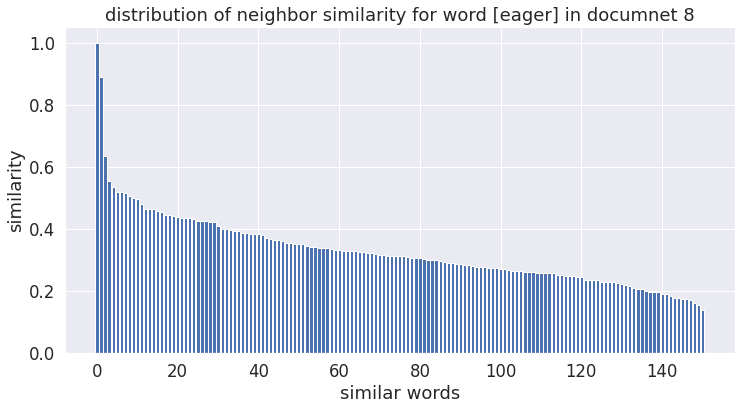

177   -->  ##ness
1690
[1.0000001, 0.8906491, 0.6581948, 0.54759455, 0.52380085, 0.5085779, 0.5050123, 0.5024683, 0.48937094, 0.4825636, 0.47485474, 0.46841264, 0.46812987, 0.46466413, 0.4569869, 0.45692664, 0.4535448, 0.4459952, 0.44170982, 0.43912193, 0.43716377, 0.43563232, 0.4342453, 0.43420166, 0.43161228, 0.4313947, 0.43052185, 0.42684907, 0.4254351, 0.42473346, 0.42395887, 0.41331077, 0.40719748, 0.4060339, 0.40339428, 0.39986795, 0.3967714, 0.39418727, 0.39090037, 0.38874957, 0.38797903, 0.38603443, 0.37206656, 0.3688048, 0.36651766, 0.36311394, 0.36135462, 0.35986346, 0.35778564, 0.3552695, 0.3490072, 0.3479865, 0.34784913, 0.34741887, 0.34604186, 0.34548813, 0.3453549, 0.34505844, 0.34478718, 0.341821, 0.33910292, 0.3383936, 0.33481932, 0.3342262, 0.33208406, 0.33157152, 0.33034137, 0.32692868, 0.32437438, 0.3241188, 0.32272524, 0.32199174, 0.32184985, 0.32163715, 0.31903845, 0.31800973, 0.31711063, 0.31505466, 0.3134734, 0.31288707, 0.3093589, 0.30858332, 0.30749884, 0.30571

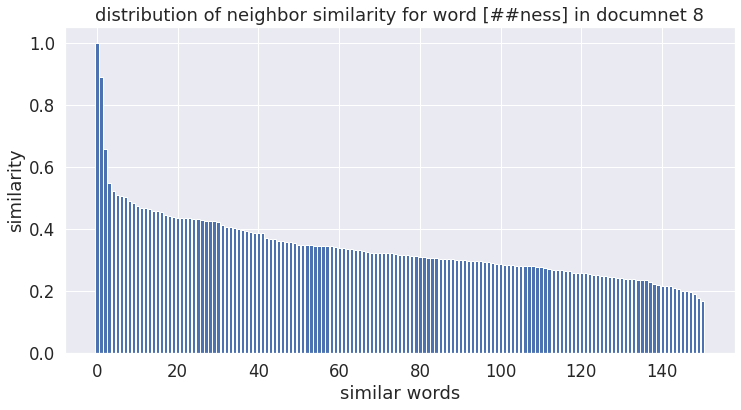

179   -->  erase
1690
[1.0, 0.69194657, 0.6472249, 0.621724, 0.60767746, 0.58261716, 0.5722177, 0.54909647, 0.52599066, 0.5070191, 0.5065248, 0.5062196, 0.4904585, 0.4869705, 0.47325814, 0.46765056, 0.4654457, 0.45976228, 0.45840484, 0.45165718, 0.4460459, 0.44120774, 0.44100985, 0.4371262, 0.4353645, 0.43190706, 0.4313856, 0.4276371, 0.41456008, 0.4121223, 0.41027272, 0.4058835, 0.40459892, 0.40443906, 0.40339428, 0.40096062, 0.3980857, 0.39071417, 0.38703662, 0.38246608, 0.38139498, 0.37827027, 0.37528583, 0.37362152, 0.37324256, 0.37175727, 0.3717225, 0.3677562, 0.36542967, 0.36354196, 0.3611586, 0.36017153, 0.3572541, 0.3540675, 0.35224146, 0.35102877, 0.35040778, 0.34911442, 0.3487544, 0.34588677, 0.34545398, 0.34314677, 0.33714315, 0.33699393, 0.3368997, 0.33640355, 0.33216923, 0.33197498, 0.33177012, 0.3307017, 0.33018398, 0.32917053, 0.3283767, 0.32632837, 0.3250543, 0.32437056, 0.32378644, 0.32366076, 0.3236129, 0.32144254, 0.3213014, 0.3208807, 0.31667286, 0.31568974, 0.31408

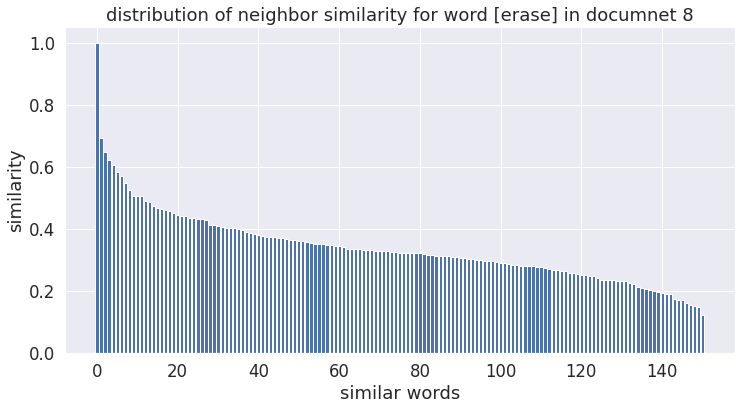

181   -->  vest
1690
[1.0, 0.88657916, 0.86959267, 0.85545915, 0.7103779, 0.6954851, 0.6756181, 0.6472249, 0.5899017, 0.56281364, 0.54384243, 0.5433565, 0.5406194, 0.5371348, 0.5329387, 0.53123474, 0.52731025, 0.52628, 0.52498335, 0.52115536, 0.5165901, 0.5043253, 0.50131667, 0.49926856, 0.49569222, 0.48839888, 0.47929096, 0.47901368, 0.47485474, 0.4734214, 0.47272453, 0.4722305, 0.46516025, 0.464934, 0.4641666, 0.4612811, 0.45704508, 0.45626, 0.4557801, 0.4518048, 0.4507465, 0.44483978, 0.4256236, 0.42326295, 0.41896892, 0.41673118, 0.4154535, 0.41418314, 0.41368994, 0.4135282, 0.41260466, 0.41123927, 0.40869913, 0.40605998, 0.4044695, 0.40377015, 0.40200877, 0.40183765, 0.39665422, 0.39440238, 0.39426777, 0.3942246, 0.39282638, 0.39200342, 0.38959622, 0.38701802, 0.3830964, 0.38162813, 0.37731212, 0.37196302, 0.37020898, 0.36983117, 0.3695088, 0.3689124, 0.36724907, 0.36630446, 0.3660667, 0.36578473, 0.36343715, 0.36222267, 0.36145028, 0.36110842, 0.3606624, 0.35638428, 0.35563618, 0

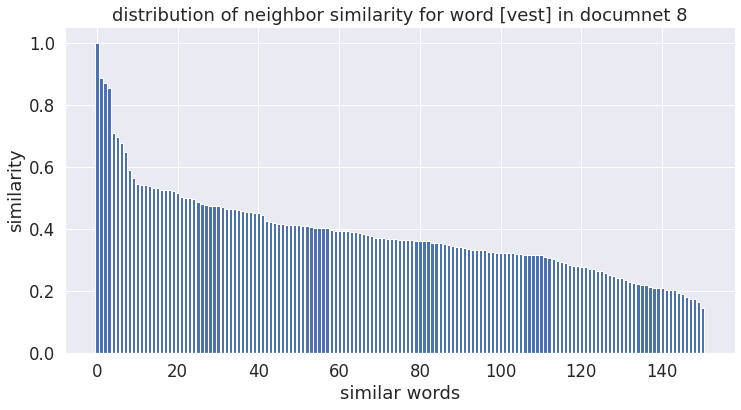

182   -->  ##ige
1690
[1.0, 0.90806043, 0.86959267, 0.8031262, 0.69126207, 0.67302513, 0.64161026, 0.621724, 0.54585475, 0.544436, 0.5096165, 0.50546753, 0.49951735, 0.4990091, 0.49563643, 0.49552432, 0.48250967, 0.4820355, 0.47683206, 0.46825996, 0.4676965, 0.4537751, 0.45284647, 0.4515944, 0.4512919, 0.4509676, 0.44552088, 0.43825918, 0.4378553, 0.43687415, 0.4365638, 0.43521863, 0.4352181, 0.43330157, 0.43017748, 0.42665172, 0.42562395, 0.42473346, 0.41672385, 0.41606027, 0.41204953, 0.4050822, 0.40285397, 0.40058577, 0.3989727, 0.3910591, 0.3903135, 0.38921148, 0.38615268, 0.38162076, 0.38143262, 0.38029572, 0.3794427, 0.37862998, 0.37855297, 0.3731885, 0.3674758, 0.36306232, 0.3627887, 0.3590328, 0.3573683, 0.34701705, 0.34375572, 0.34072828, 0.33971214, 0.33678, 0.33612797, 0.33568704, 0.3351277, 0.3342661, 0.33196685, 0.3317219, 0.33083844, 0.33025032, 0.32893163, 0.32857108, 0.32824326, 0.3268806, 0.32540804, 0.32493913, 0.32414442, 0.3239807, 0.32158566, 0.32117113, 0.31969947

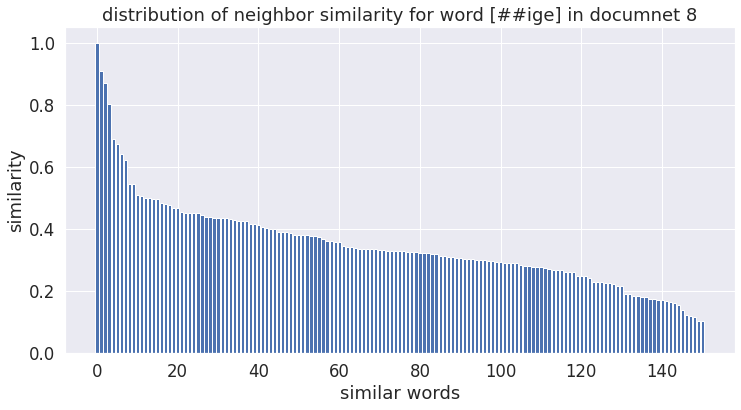

183   -->  ##s
1690
[1.0000001, 0.90806043, 0.88657916, 0.7866447, 0.70704186, 0.6792574, 0.66551316, 0.60767746, 0.537011, 0.5201745, 0.5033662, 0.49816653, 0.4960071, 0.4943068, 0.49258488, 0.48501158, 0.47866234, 0.4782899, 0.4756571, 0.47040638, 0.4633739, 0.45302713, 0.4518742, 0.44886082, 0.44627088, 0.44064513, 0.43912193, 0.43667442, 0.4362545, 0.43463767, 0.43460035, 0.4306755, 0.4289676, 0.42880785, 0.42852956, 0.42606187, 0.42547897, 0.41516218, 0.41484642, 0.40701616, 0.40687656, 0.40060794, 0.39978588, 0.39893785, 0.3984868, 0.397603, 0.3958279, 0.39419788, 0.39319688, 0.39243257, 0.39235634, 0.3914721, 0.3903359, 0.38957226, 0.38853735, 0.38718092, 0.37783447, 0.37693885, 0.37356323, 0.3735203, 0.37250903, 0.3716631, 0.36984724, 0.36710072, 0.36114192, 0.35861555, 0.3549022, 0.3536662, 0.35101318, 0.35037166, 0.34975404, 0.34918952, 0.3491525, 0.34628165, 0.34545988, 0.34139353, 0.33599845, 0.33574528, 0.33538547, 0.3350188, 0.3347605, 0.33379027, 0.3336916, 0.33048132, 0

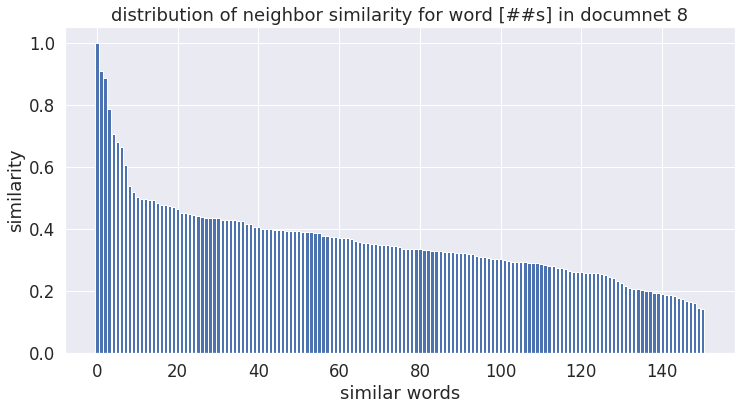

188   -->  mighty
1690
[1.0, 0.8230895, 0.78674686, 0.7103779, 0.69126207, 0.6792574, 0.6416811, 0.58231115, 0.5617981, 0.55993223, 0.5273435, 0.52599066, 0.52297604, 0.52145195, 0.51877236, 0.5176419, 0.5001054, 0.49809128, 0.4974195, 0.48555446, 0.47842938, 0.47725424, 0.47333968, 0.47102836, 0.47059345, 0.46944904, 0.46914586, 0.46749163, 0.4654346, 0.4605689, 0.46011686, 0.45582718, 0.45270836, 0.44778803, 0.44367605, 0.44183668, 0.43797207, 0.4371578, 0.43531868, 0.43430206, 0.4332574, 0.4310929, 0.43052185, 0.42967647, 0.42860496, 0.42663595, 0.42602092, 0.42469576, 0.42345935, 0.42221814, 0.4202616, 0.4192822, 0.41724694, 0.41451275, 0.41224003, 0.4073512, 0.40716696, 0.40252247, 0.4025169, 0.39726424, 0.39573494, 0.39358988, 0.38781402, 0.38700724, 0.38681746, 0.38403612, 0.3832528, 0.37995407, 0.37774765, 0.37555483, 0.37387568, 0.3723301, 0.3706205, 0.35994563, 0.35842973, 0.3575948, 0.3542952, 0.35343474, 0.35023326, 0.35014638, 0.3461798, 0.3458276, 0.34558368, 0.34378308, 

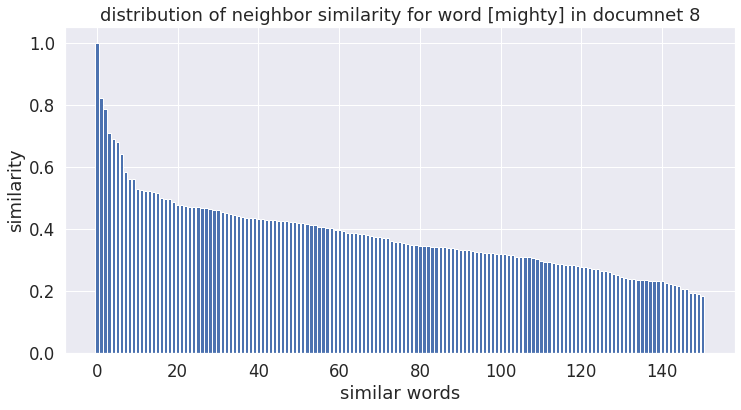

189   -->  communists
1690
[1.0, 0.78674686, 0.7301909, 0.70704186, 0.6756181, 0.67302513, 0.6192868, 0.6004628, 0.558479, 0.5469519, 0.5299644, 0.52676624, 0.5193539, 0.5180171, 0.5062196, 0.49803835, 0.49089664, 0.48712853, 0.4731331, 0.4726173, 0.47155666, 0.4691637, 0.46630254, 0.46433434, 0.46138132, 0.4606799, 0.45764607, 0.45671588, 0.45045832, 0.44967565, 0.4492063, 0.445839, 0.43906766, 0.43461376, 0.4321583, 0.4297778, 0.4245803, 0.42430627, 0.42304093, 0.4199326, 0.41762733, 0.41253808, 0.41047445, 0.40812913, 0.407844, 0.40319908, 0.40236816, 0.4020455, 0.3967714, 0.39668828, 0.39623562, 0.39228788, 0.3903286, 0.38848203, 0.38801253, 0.38761812, 0.3864705, 0.3857739, 0.3831668, 0.38256842, 0.3773991, 0.3706172, 0.37029868, 0.3667273, 0.36559138, 0.36362338, 0.35780615, 0.35756195, 0.3574363, 0.35699013, 0.3568917, 0.35630685, 0.35416964, 0.35128838, 0.35023648, 0.34754896, 0.34726465, 0.34595856, 0.34537226, 0.34295732, 0.338773, 0.3360673, 0.33588582, 0.33504966, 0.3326835

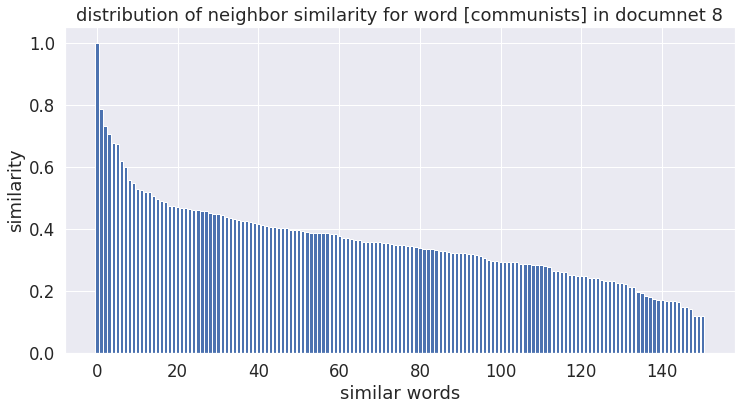

191   -->  risen
1690
[0.9999999, 0.8438443, 0.63556087, 0.62797225, 0.6263728, 0.5863018, 0.5502844, 0.54780996, 0.5206039, 0.51440156, 0.4925992, 0.48961902, 0.48833418, 0.48620763, 0.48202395, 0.4762633, 0.4734214, 0.46841264, 0.46825996, 0.46570146, 0.4622281, 0.46104074, 0.44755262, 0.44367605, 0.44256508, 0.43460035, 0.42384616, 0.4202826, 0.4198235, 0.41925055, 0.41875997, 0.41583225, 0.4138091, 0.41027272, 0.40951154, 0.40319908, 0.39466736, 0.39304486, 0.38657725, 0.3849637, 0.38409287, 0.38402334, 0.38322297, 0.37814963, 0.37775147, 0.37548596, 0.37477022, 0.3746698, 0.37046438, 0.3694969, 0.3650301, 0.36452, 0.35685673, 0.35627794, 0.35316545, 0.3529182, 0.3514208, 0.35118657, 0.34641546, 0.34541804, 0.3417559, 0.339975, 0.3374379, 0.33606252, 0.33579242, 0.33367884, 0.33335596, 0.33041686, 0.32958153, 0.32891846, 0.32854635, 0.3282729, 0.32530743, 0.3239416, 0.3234148, 0.32243243, 0.3219587, 0.31908187, 0.31651974, 0.31615108, 0.31592143, 0.31545475, 0.3149518, 0.31411132, 

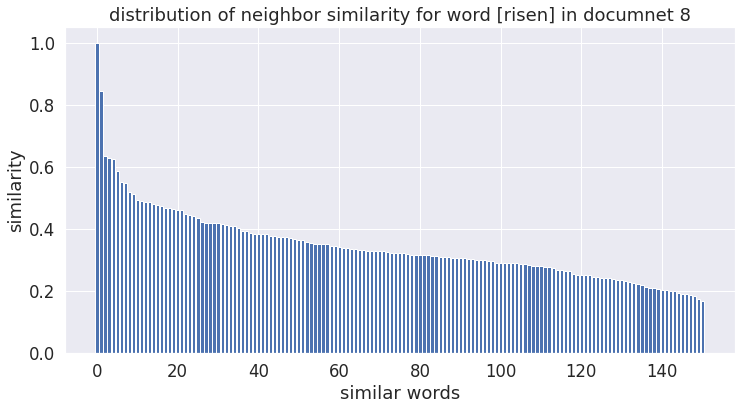

193   -->  among
1690
[1.0, 0.78908235, 0.7784637, 0.7123095, 0.71116567, 0.70171374, 0.69935536, 0.671439, 0.66961807, 0.658022, 0.63556087, 0.62154126, 0.59158283, 0.58060604, 0.566325, 0.55899644, 0.5214926, 0.48904073, 0.4829496, 0.47474968, 0.46626514, 0.4658082, 0.43346298, 0.4313947, 0.42177328, 0.41019028, 0.40685573, 0.40578339, 0.4049621, 0.40262386, 0.40200877, 0.3859126, 0.38206476, 0.38132197, 0.3794427, 0.37827253, 0.37827027, 0.37736267, 0.3773062, 0.3766452, 0.37457985, 0.373111, 0.35567462, 0.3551578, 0.3542952, 0.35346234, 0.35205135, 0.35128838, 0.35037166, 0.34893394, 0.3488573, 0.34588072, 0.34422797, 0.34401375, 0.34355134, 0.3398052, 0.33976847, 0.33566743, 0.3326388, 0.3289909, 0.3280462, 0.3264573, 0.3246696, 0.32241666, 0.31950998, 0.3192312, 0.31526917, 0.31246045, 0.31098312, 0.31077397, 0.30920172, 0.30852428, 0.30626094, 0.3033713, 0.3033173, 0.2996012, 0.29932353, 0.2992751, 0.29736018, 0.29362953, 0.29285967, 0.2926579, 0.29188678, 0.29101902, 0.29005188

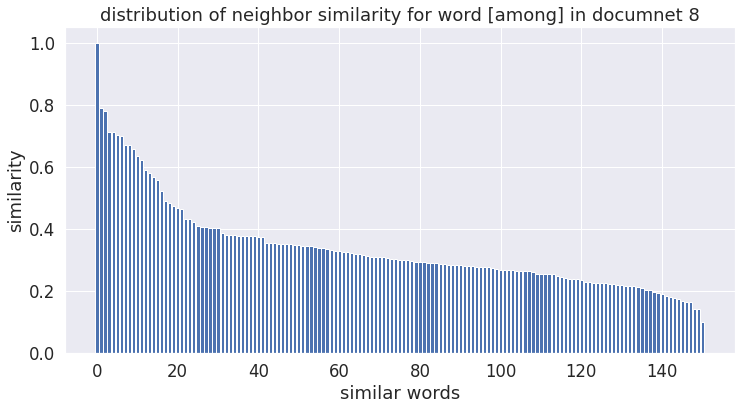

194   -->  students
1690
[1.0, 0.8581628, 0.82938945, 0.81905675, 0.7611016, 0.73850316, 0.737759, 0.71116567, 0.65507436, 0.64869237, 0.6238277, 0.62274253, 0.6207807, 0.6202123, 0.6097974, 0.5683712, 0.53586376, 0.53374505, 0.53123474, 0.52184206, 0.5180171, 0.51440156, 0.51031387, 0.5096165, 0.5015033, 0.4976644, 0.4972701, 0.48501158, 0.4811651, 0.47325814, 0.47171515, 0.4695552, 0.45582718, 0.45332348, 0.44415, 0.44243208, 0.44170982, 0.4409302, 0.4353392, 0.43296692, 0.42970616, 0.42749876, 0.42671803, 0.42582113, 0.42527843, 0.42416355, 0.41176766, 0.4082659, 0.40805262, 0.40755457, 0.402133, 0.40032434, 0.39953506, 0.39548188, 0.39468312, 0.39312175, 0.39002728, 0.38919675, 0.38833123, 0.3873447, 0.3842937, 0.38039315, 0.3798162, 0.37940824, 0.37920803, 0.37804735, 0.37680778, 0.37554294, 0.37356895, 0.36745387, 0.366871, 0.3656428, 0.3648333, 0.36220044, 0.36027738, 0.35984075, 0.3597058, 0.35803872, 0.35722166, 0.35487717, 0.3545853, 0.35352084, 0.34895384, 0.3489372, 0.34725

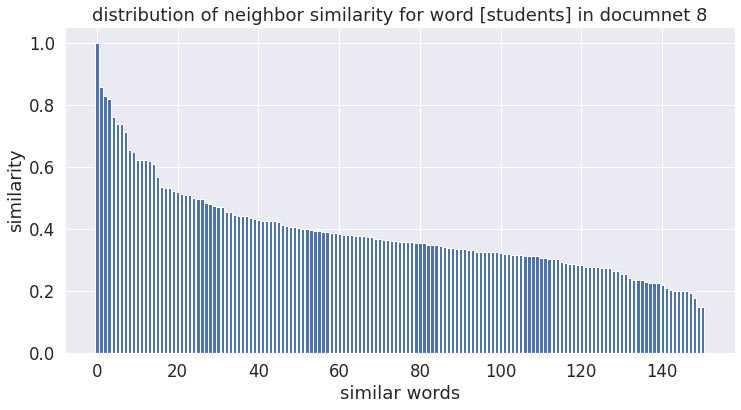

197   -->  streets
1690
[0.99999994, 0.82938945, 0.82306427, 0.80168486, 0.7712021, 0.7602045, 0.7469565, 0.658022, 0.6569221, 0.61013424, 0.59557116, 0.5951189, 0.5851322, 0.58476937, 0.5835917, 0.54113156, 0.5206039, 0.5101815, 0.50915074, 0.50131667, 0.48832878, 0.48068914, 0.47086594, 0.46899164, 0.46630254, 0.4509676, 0.45079255, 0.44778803, 0.44679046, 0.43401426, 0.4276371, 0.42709023, 0.42606187, 0.4248876, 0.41646048, 0.41573635, 0.4118412, 0.4110045, 0.40496734, 0.4044669, 0.404372, 0.40373048, 0.40167934, 0.40040722, 0.39986795, 0.3967284, 0.39639676, 0.39586198, 0.39293155, 0.39220306, 0.39184558, 0.39156428, 0.39084935, 0.39015624, 0.3899518, 0.38793087, 0.38698933, 0.38539857, 0.38422716, 0.38266176, 0.37866694, 0.37833387, 0.37710232, 0.37543422, 0.3721998, 0.3706526, 0.36864173, 0.36379802, 0.36052048, 0.3584634, 0.34925386, 0.34732315, 0.34439397, 0.34424254, 0.3387834, 0.3365188, 0.3339408, 0.33360285, 0.33337688, 0.33162326, 0.33142942, 0.33123037, 0.32950678, 0.3282

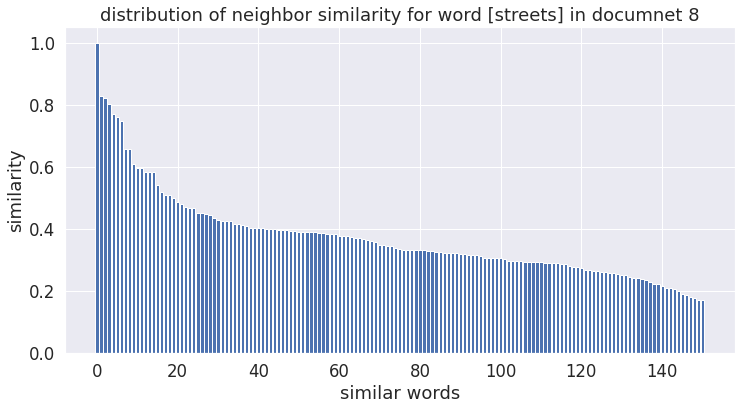

199   -->  long
1690
[1.0, 0.82568073, 0.81088907, 0.80845714, 0.75946474, 0.7469565, 0.737759, 0.70707166, 0.6727376, 0.6575359, 0.6365216, 0.63241744, 0.62154126, 0.61156166, 0.60664856, 0.60137457, 0.5775087, 0.5142096, 0.5064538, 0.50172013, 0.49926856, 0.48051906, 0.46784854, 0.4622281, 0.453112, 0.450995, 0.44565254, 0.44291478, 0.44183668, 0.44137824, 0.44126642, 0.4409157, 0.4365638, 0.43563232, 0.43485284, 0.43392882, 0.43190706, 0.4297778, 0.42852956, 0.42703724, 0.42172214, 0.413458, 0.40880144, 0.4081295, 0.40440348, 0.4039669, 0.40018222, 0.3995474, 0.39595124, 0.38958448, 0.38890296, 0.38861334, 0.38854566, 0.38759947, 0.38416946, 0.38000154, 0.37971213, 0.3780268, 0.37669647, 0.369879, 0.36965337, 0.36800578, 0.36635423, 0.3647079, 0.36453706, 0.3640885, 0.36370465, 0.36293384, 0.36292994, 0.36226985, 0.3609966, 0.36041588, 0.35682324, 0.35512292, 0.35209167, 0.35030684, 0.3482453, 0.34820852, 0.34728092, 0.34491077, 0.34361705, 0.3391407, 0.33843255, 0.33672, 0.33487487

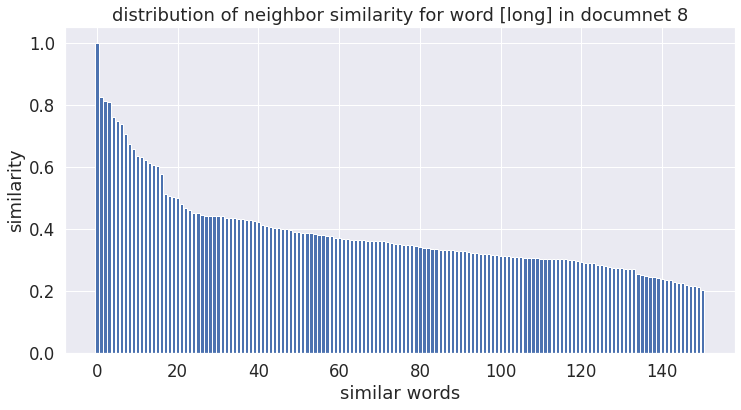

201   -->  suppressed
1690
[1.0000001, 0.82568073, 0.8207065, 0.8037633, 0.7712021, 0.76310986, 0.7611016, 0.71506757, 0.671439, 0.66003156, 0.652267, 0.64917123, 0.6013671, 0.59274745, 0.576482, 0.5263205, 0.52203757, 0.50375736, 0.4883343, 0.48833418, 0.4605689, 0.45643717, 0.4546962, 0.4507465, 0.4449451, 0.44383314, 0.44380713, 0.44350827, 0.4408998, 0.43565688, 0.43461376, 0.4337255, 0.43017748, 0.41996628, 0.4159449, 0.4121223, 0.41038615, 0.41037878, 0.40322432, 0.4023281, 0.39319688, 0.3915621, 0.38855824, 0.38797903, 0.387219, 0.38514102, 0.38496497, 0.38448828, 0.3840675, 0.37999982, 0.37990868, 0.37357435, 0.36226454, 0.3612027, 0.35834193, 0.35737604, 0.35588944, 0.3513199, 0.34898087, 0.34501618, 0.34447992, 0.3372918, 0.33426243, 0.33300403, 0.32866493, 0.32857674, 0.32840067, 0.32778907, 0.3276098, 0.32744044, 0.32565036, 0.32564312, 0.3247701, 0.32452115, 0.3223334, 0.32105654, 0.3181285, 0.3161171, 0.3134709, 0.30565405, 0.30521417, 0.30509, 0.3040794, 0.30138427, 0.30

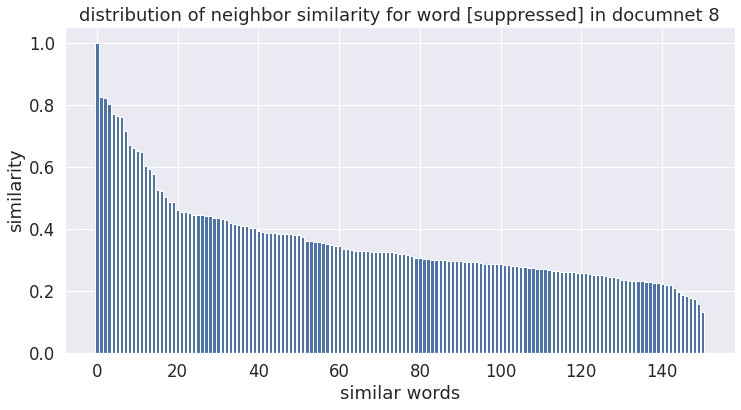

202   -->  artists
1690
[0.9999999, 0.91531503, 0.81905675, 0.80845714, 0.8037633, 0.80168486, 0.66627187, 0.65499663, 0.65209144, 0.62850636, 0.6277567, 0.59938604, 0.5962007, 0.59158283, 0.55800045, 0.5391631, 0.53724456, 0.53415287, 0.52731025, 0.52676624, 0.52616405, 0.5071653, 0.49660707, 0.4859773, 0.4820355, 0.47021514, 0.46914586, 0.46646377, 0.4633739, 0.46126142, 0.4591614, 0.45387423, 0.44811714, 0.44755262, 0.44657227, 0.4460459, 0.4429332, 0.4369049, 0.4354017, 0.4326204, 0.4297794, 0.42781812, 0.42768967, 0.42740938, 0.42684907, 0.4245454, 0.42442918, 0.4243828, 0.42252094, 0.4181063, 0.4109522, 0.4045089, 0.40316772, 0.40251952, 0.40076536, 0.40030828, 0.39868933, 0.3981055, 0.3970384, 0.3967269, 0.39351392, 0.39278144, 0.39275587, 0.38842624, 0.38728356, 0.38577977, 0.3824414, 0.3802233, 0.3798923, 0.37988067, 0.37982127, 0.37674767, 0.37586606, 0.37377226, 0.37152484, 0.37142116, 0.37097162, 0.36901367, 0.36873585, 0.36378306, 0.3636073, 0.36169177, 0.36162788, 0.36039

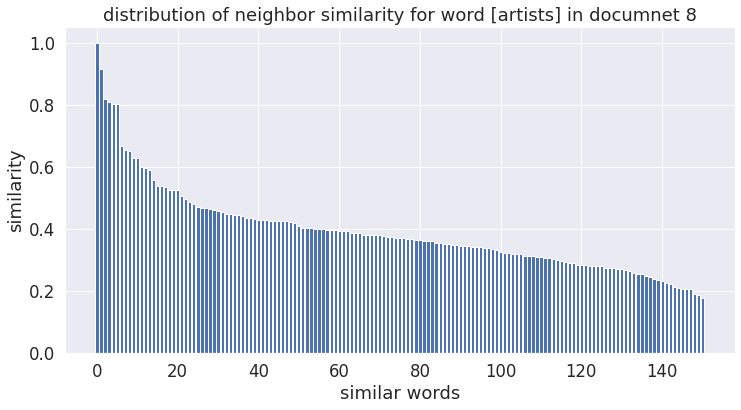

204   -->  intellectuals
1690
[1.0000001, 0.91531503, 0.8581628, 0.82306427, 0.8207065, 0.81088907, 0.72021997, 0.7092085, 0.6701778, 0.66961807, 0.66734946, 0.663916, 0.6566464, 0.64736426, 0.60151803, 0.5591339, 0.5553225, 0.55530757, 0.5469519, 0.5449803, 0.5371348, 0.5215429, 0.5105487, 0.50546753, 0.49908996, 0.4925992, 0.48555446, 0.48131967, 0.4756571, 0.47346407, 0.4719323, 0.46812987, 0.46303648, 0.46093917, 0.45840484, 0.45758832, 0.44917455, 0.43856823, 0.43679315, 0.43636897, 0.43567476, 0.43290594, 0.4318186, 0.43011796, 0.42903328, 0.42855695, 0.42820373, 0.42658332, 0.42537796, 0.41728365, 0.41274494, 0.40422708, 0.40127677, 0.40011755, 0.39840984, 0.3959272, 0.3947339, 0.39212555, 0.38884354, 0.38774025, 0.38752833, 0.38732037, 0.38429263, 0.38309243, 0.3830468, 0.3798285, 0.37500554, 0.37379014, 0.37377638, 0.37138912, 0.36975908, 0.36938286, 0.36807823, 0.3678667, 0.36673403, 0.36672983, 0.36518145, 0.36451423, 0.3624006, 0.3619513, 0.3618785, 0.36151513, 0.36117575, 

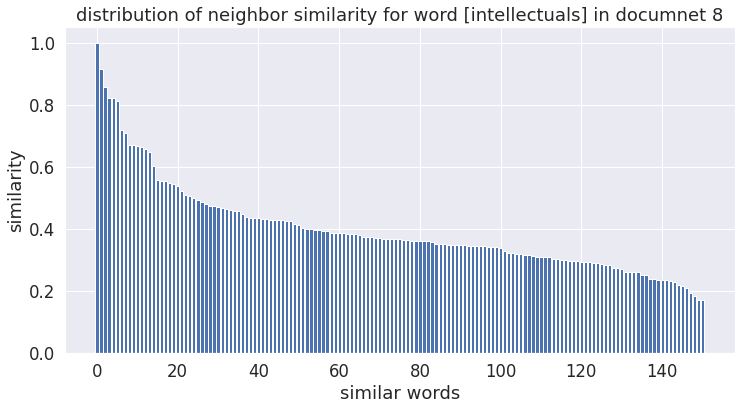

207   -->  even
1690
[0.9999999, 0.78192425, 0.76726407, 0.69935536, 0.67427874, 0.67018235, 0.6493598, 0.64736426, 0.62797225, 0.6207807, 0.61156166, 0.6100595, 0.59938604, 0.59323, 0.59274745, 0.5835917, 0.55246305, 0.54034585, 0.5133641, 0.5075951, 0.50361717, 0.5028796, 0.48937094, 0.48881787, 0.48395538, 0.48167998, 0.47628784, 0.4759928, 0.4701396, 0.46797785, 0.46672386, 0.4612811, 0.45251018, 0.4515944, 0.4455059, 0.44550243, 0.44120774, 0.4389772, 0.43667442, 0.42789677, 0.42196578, 0.4199326, 0.41605437, 0.41216916, 0.4118779, 0.41049498, 0.41041428, 0.40967864, 0.4078251, 0.4055974, 0.4053694, 0.39866835, 0.39591694, 0.39392382, 0.39358988, 0.3930115, 0.3892086, 0.3871959, 0.38594496, 0.38118333, 0.3789972, 0.37674224, 0.37665355, 0.37227818, 0.36898157, 0.36878717, 0.36873743, 0.36556596, 0.36524898, 0.36205375, 0.36169595, 0.35965788, 0.35808134, 0.3578828, 0.35722858, 0.35608867, 0.35172144, 0.34738022, 0.34684947, 0.3466055, 0.34645432, 0.3436371, 0.34134227, 0.3410736, 

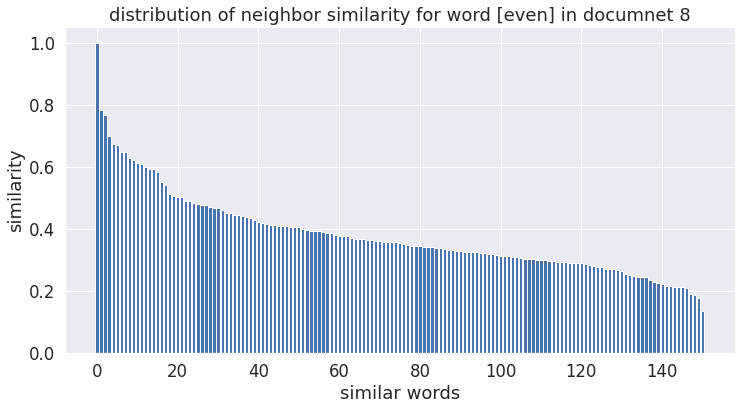

208   -->  within
1690
[1.0000001, 0.78192425, 0.7784637, 0.728667, 0.7274507, 0.6701778, 0.6652645, 0.65902185, 0.64917123, 0.6408333, 0.63241744, 0.6202123, 0.6020731, 0.5962007, 0.5851322, 0.5754298, 0.5730837, 0.5502844, 0.52536106, 0.50296414, 0.50219405, 0.4983798, 0.45626, 0.45522454, 0.45165718, 0.4512919, 0.44636273, 0.4382055, 0.43794364, 0.43330428, 0.43161228, 0.42880785, 0.42575306, 0.4211434, 0.407844, 0.40716696, 0.4039374, 0.39817387, 0.3958599, 0.3941084, 0.39039022, 0.38738015, 0.38609964, 0.3817956, 0.37866044, 0.37649632, 0.3743798, 0.37272334, 0.3721485, 0.3716205, 0.36992058, 0.36600882, 0.36461422, 0.36358473, 0.36144686, 0.3612352, 0.3605649, 0.35996896, 0.35495165, 0.35178944, 0.34764165, 0.3466788, 0.3445338, 0.34327608, 0.3428309, 0.34205437, 0.34057117, 0.33809382, 0.33540767, 0.3325165, 0.3322069, 0.33135146, 0.33124346, 0.3301642, 0.32970065, 0.3295045, 0.3277673, 0.32715422, 0.32703596, 0.32568794, 0.32527444, 0.3225528, 0.3224896, 0.3219073, 0.31986374, 

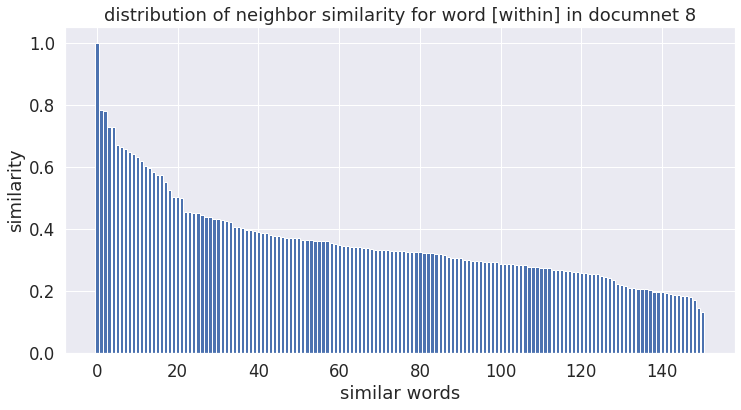

210   -->  party
1690
[1.0000002, 0.68608403, 0.6498736, 0.6490972, 0.6306393, 0.62952137, 0.6073606, 0.607098, 0.6004628, 0.5898216, 0.5755385, 0.5698912, 0.5617981, 0.55800045, 0.55530757, 0.5442648, 0.53374505, 0.52628, 0.5232376, 0.52082336, 0.51456094, 0.5142096, 0.5073339, 0.50621444, 0.50361717, 0.50296414, 0.5024683, 0.49811837, 0.49760702, 0.4904585, 0.4883343, 0.48832878, 0.4876766, 0.48718315, 0.48293793, 0.48055184, 0.47840855, 0.47753757, 0.47683206, 0.47529408, 0.47358298, 0.4731709, 0.47040638, 0.46717015, 0.46628657, 0.46289182, 0.46201074, 0.45072073, 0.45013714, 0.44205874, 0.44112533, 0.44024903, 0.44012576, 0.43855616, 0.43852282, 0.43729955, 0.43694824, 0.43618026, 0.43239453, 0.4281128, 0.42388874, 0.4230237, 0.42232922, 0.42072898, 0.42005002, 0.41948107, 0.416775, 0.41599292, 0.41317952, 0.41205513, 0.41139907, 0.40951154, 0.40948892, 0.40804648, 0.40685573, 0.40545592, 0.4052248, 0.4040714, 0.40160018, 0.39893776, 0.39390442, 0.39210188, 0.38793486, 0.3838372, 

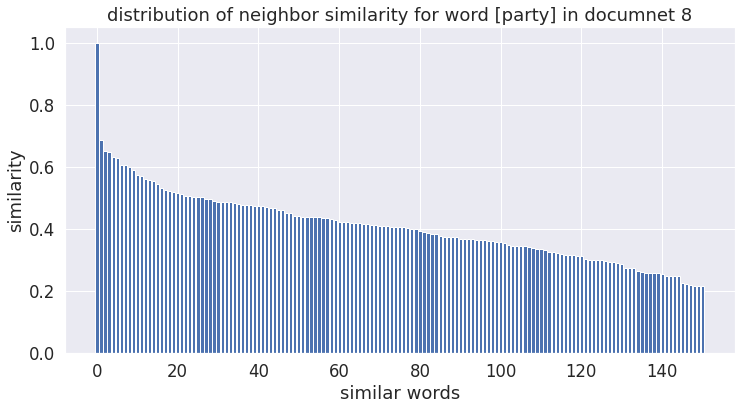

213   -->  dec
1690
[0.99999976, 0.8274974, 0.8046907, 0.7941499, 0.76354325, 0.6727376, 0.6652645, 0.6566464, 0.6490972, 0.62850636, 0.6097974, 0.6013671, 0.59557116, 0.59323, 0.5899017, 0.5850478, 0.536036, 0.5336081, 0.5273435, 0.52630985, 0.5214926, 0.4960071, 0.49552432, 0.48705858, 0.4869705, 0.48682982, 0.48419785, 0.48003083, 0.47851208, 0.4762633, 0.47492155, 0.47155666, 0.45964614, 0.4548245, 0.4535448, 0.45198727, 0.4393146, 0.43908256, 0.43747684, 0.4373328, 0.43518826, 0.41487843, 0.41429353, 0.4097004, 0.40741196, 0.40503114, 0.40427393, 0.40298295, 0.40066987, 0.40002787, 0.398027, 0.39548084, 0.39236712, 0.39215717, 0.39010245, 0.38667992, 0.38624075, 0.38530105, 0.38494638, 0.3840211, 0.38399333, 0.38390014, 0.3821883, 0.3799138, 0.3792024, 0.3774967, 0.3763668, 0.37415588, 0.37408105, 0.37260488, 0.37251776, 0.36995137, 0.3687706, 0.36848134, 0.36844397, 0.3682165, 0.36783484, 0.36731827, 0.36655885, 0.36608344, 0.36598814, 0.36483794, 0.3616243, 0.36118793, 0.3601220

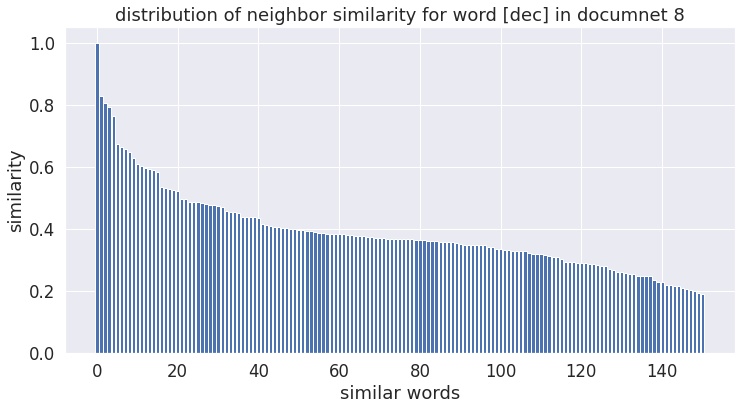

214   -->  ##imated
1690
[1.0000004, 0.8274974, 0.82355815, 0.73568857, 0.7274507, 0.71313506, 0.663916, 0.66003156, 0.6493598, 0.6365216, 0.62952137, 0.6277567, 0.6238277, 0.5951189, 0.58231115, 0.58060604, 0.568581, 0.56281364, 0.54780996, 0.54585475, 0.54041016, 0.53204775, 0.5299033, 0.52752936, 0.5201745, 0.5193539, 0.50984055, 0.5065248, 0.4968869, 0.4786185, 0.47383407, 0.465722, 0.460577, 0.45499244, 0.4525621, 0.4459952, 0.44515294, 0.4396066, 0.43896085, 0.43690312, 0.43510857, 0.42925408, 0.4206902, 0.41002202, 0.4080161, 0.4069276, 0.40687627, 0.40641934, 0.40564603, 0.4045518, 0.40426406, 0.40423232, 0.40421024, 0.403127, 0.40182614, 0.40129533, 0.4006752, 0.3972913, 0.3970615, 0.3954512, 0.3952002, 0.39413825, 0.3925872, 0.391781, 0.38691384, 0.38682744, 0.38575417, 0.38513157, 0.38490164, 0.38480604, 0.3829382, 0.38206625, 0.38104373, 0.38075933, 0.3802495, 0.37868884, 0.3781136, 0.3778602, 0.37676916, 0.37539807, 0.3705358, 0.36962718, 0.3687883, 0.36819792, 0.3675536, 

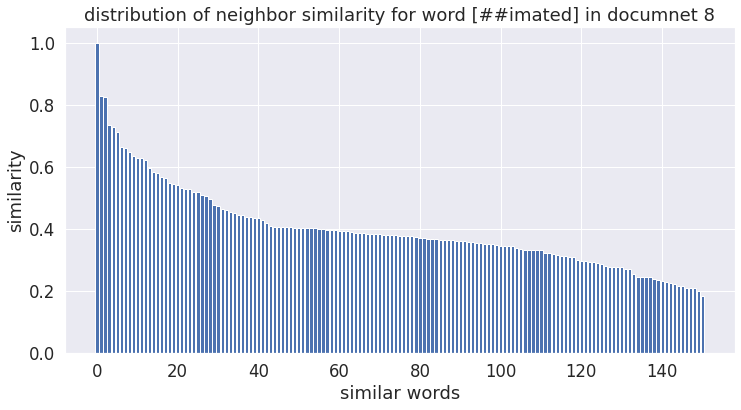

215   -->  ranks
1690
[1.0000001, 0.82355815, 0.8046907, 0.728667, 0.72021997, 0.69448113, 0.68608403, 0.67427874, 0.6712141, 0.66627187, 0.6575359, 0.65507436, 0.652267, 0.61013424, 0.566325, 0.5640968, 0.558479, 0.544436, 0.5406194, 0.537011, 0.52874523, 0.5233434, 0.52145195, 0.5213672, 0.52046025, 0.51636815, 0.49556926, 0.48915923, 0.48620763, 0.47221607, 0.4654457, 0.46461982, 0.4590646, 0.45838183, 0.45751354, 0.45692664, 0.45541555, 0.45349765, 0.4517687, 0.45097327, 0.44363898, 0.4421664, 0.44116482, 0.4404866, 0.43905824, 0.43818474, 0.43071127, 0.4289922, 0.4273278, 0.42620057, 0.42220196, 0.4220106, 0.421756, 0.41684207, 0.41646326, 0.4148475, 0.41337448, 0.41187066, 0.40925413, 0.408461, 0.40645134, 0.40375024, 0.4026839, 0.40202755, 0.3993379, 0.39836785, 0.39387888, 0.39380828, 0.39309716, 0.39179474, 0.39112192, 0.39060515, 0.3896274, 0.3882619, 0.3864545, 0.38590416, 0.38304508, 0.38294947, 0.38138166, 0.37812716, 0.37591827, 0.37579763, 0.3742816, 0.37320143, 0.372990

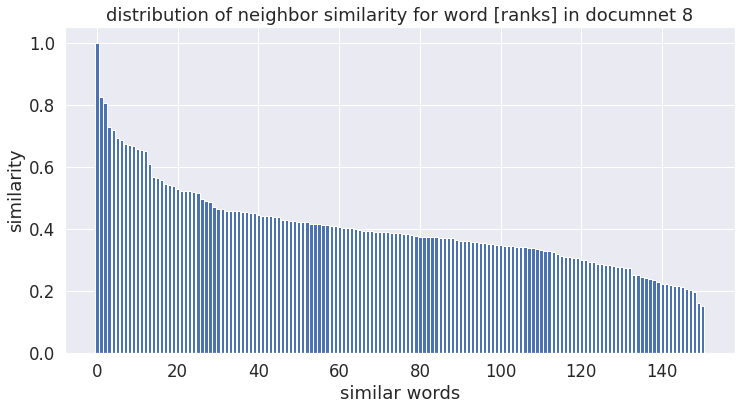

218   -->  cry
1690
[1.0, 0.7118068, 0.6984199, 0.6699933, 0.64629316, 0.64603186, 0.64249206, 0.607098, 0.49939203, 0.49624166, 0.48695388, 0.46466413, 0.45349765, 0.45345545, 0.45245183, 0.44550243, 0.43741697, 0.42894268, 0.42786697, 0.42699903, 0.42422384, 0.42365152, 0.418949, 0.4187533, 0.41709843, 0.41487843, 0.41328734, 0.40966558, 0.4073512, 0.40499598, 0.4044556, 0.40385702, 0.40377015, 0.40194374, 0.40182516, 0.4014663, 0.4013384, 0.40130055, 0.39840984, 0.39623562, 0.39413825, 0.39307374, 0.39304486, 0.3927831, 0.3926501, 0.39169076, 0.39142656, 0.38842624, 0.38793087, 0.38615268, 0.38532737, 0.38490224, 0.38487083, 0.38246608, 0.38046148, 0.37978798, 0.37876013, 0.37866044, 0.37728798, 0.37669742, 0.37535322, 0.37356895, 0.37021792, 0.36956036, 0.3677371, 0.3667606, 0.36543572, 0.36453706, 0.3637674, 0.36315024, 0.3619504, 0.3615293, 0.36133903, 0.36116913, 0.35837293, 0.35806108, 0.3580364, 0.35654616, 0.35637525, 0.35410827, 0.35320908, 0.34975404, 0.3482255, 0.34649903,

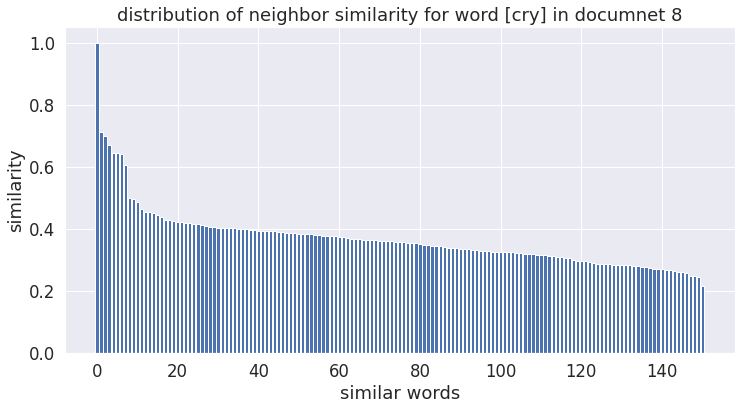

219   -->  reflects
1690
[0.9999999, 0.7118068, 0.6544514, 0.61726975, 0.60982484, 0.6057266, 0.5733576, 0.5371416, 0.51828337, 0.4876766, 0.47544378, 0.4610693, 0.4458058, 0.4456935, 0.43708718, 0.4279176, 0.42789677, 0.42665172, 0.4254351, 0.42438072, 0.42340896, 0.41570103, 0.4125957, 0.4124881, 0.41123927, 0.41045055, 0.408461, 0.40651736, 0.40357804, 0.4023714, 0.40212947, 0.39946306, 0.39795458, 0.39493042, 0.39466736, 0.39419788, 0.3938845, 0.3930096, 0.39266747, 0.39071417, 0.3902161, 0.38892144, 0.38807958, 0.38758224, 0.38572538, 0.38488013, 0.3792024, 0.37612432, 0.37452173, 0.37344155, 0.37341607, 0.37225723, 0.3718381, 0.371781, 0.3714535, 0.3711909, 0.37052488, 0.3698715, 0.36969975, 0.36875552, 0.36873516, 0.36721766, 0.36656296, 0.36632225, 0.3659639, 0.36571032, 0.3646323, 0.36290383, 0.36144686, 0.36031944, 0.36027738, 0.3588729, 0.3583613, 0.35671514, 0.35349, 0.35327733, 0.3532465, 0.35261625, 0.35199043, 0.351454, 0.3508728, 0.35034466, 0.35023648, 0.35014638, 0.34

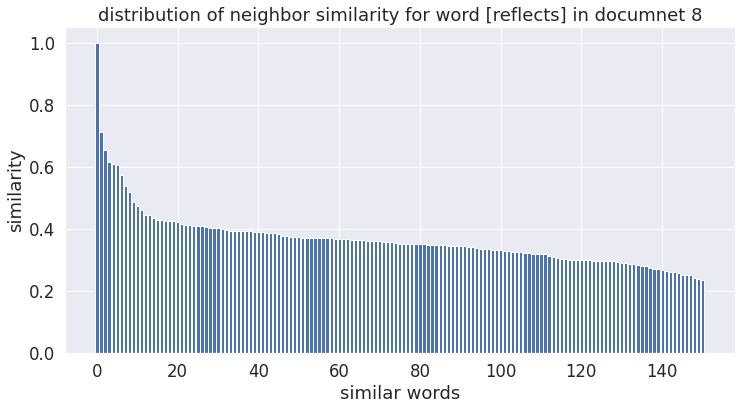

221   -->  swirl
1690
[1.0, 0.6699933, 0.66196036, 0.66064847, 0.6544514, 0.64636445, 0.6117968, 0.49959922, 0.48250967, 0.47358298, 0.46570146, 0.4641666, 0.4632441, 0.4569869, 0.45070532, 0.44886082, 0.44782287, 0.4455059, 0.43773228, 0.42860496, 0.41765815, 0.41684207, 0.4155851, 0.4146893, 0.40443906, 0.40193394, 0.3978815, 0.39557546, 0.39075303, 0.3877812, 0.38761812, 0.38682744, 0.38068503, 0.37940156, 0.37766078, 0.37741432, 0.3766007, 0.37471613, 0.37150216, 0.36745387, 0.36673403, 0.36671796, 0.36482555, 0.36416712, 0.36413768, 0.36164883, 0.36039472, 0.3601793, 0.35983744, 0.3588888, 0.35837477, 0.35836768, 0.3572406, 0.35427853, 0.3531552, 0.35215926, 0.3516224, 0.35089988, 0.35057688, 0.35040098, 0.35012436, 0.34904012, 0.34836733, 0.3482453, 0.34742463, 0.34681088, 0.34439397, 0.34293777, 0.34276062, 0.34196657, 0.33930007, 0.33926243, 0.3381876, 0.33795023, 0.33699697, 0.33669436, 0.33558705, 0.33487374, 0.3322069, 0.3298167, 0.32621586, 0.3250526, 0.324955, 0.32452115, 

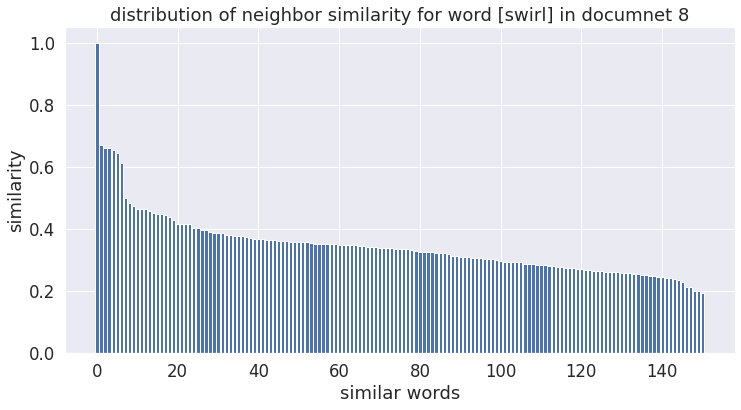

223   -->  revolutionary
1690
[1.0000002, 0.74330604, 0.7280569, 0.71306103, 0.66196036, 0.6498736, 0.64629316, 0.60982484, 0.55993223, 0.53928673, 0.5329387, 0.5299644, 0.5298373, 0.5264821, 0.52046025, 0.5199995, 0.515972, 0.5085779, 0.50829285, 0.50739443, 0.5071653, 0.5057217, 0.5024301, 0.5015033, 0.49908996, 0.49806428, 0.49786675, 0.4968869, 0.49580938, 0.49563643, 0.4948759, 0.4947406, 0.4915231, 0.4901119, 0.48919725, 0.48705858, 0.4838968, 0.4782899, 0.47611752, 0.47371754, 0.4728483, 0.47141123, 0.4690563, 0.46781677, 0.46765056, 0.4675828, 0.46487394, 0.4647857, 0.45891097, 0.45609742, 0.455864, 0.45413154, 0.4532596, 0.45251018, 0.450995, 0.45079255, 0.44448692, 0.4438399, 0.44306946, 0.44166043, 0.43703884, 0.43565688, 0.43540248, 0.43315512, 0.43269175, 0.43260923, 0.43036234, 0.42786467, 0.4242974, 0.42137176, 0.42098555, 0.4202826, 0.41735205, 0.41496426, 0.41424498, 0.40677443, 0.4066754, 0.40564448, 0.40096116, 0.39977345, 0.39822185, 0.39610058, 0.39358988, 0.393161

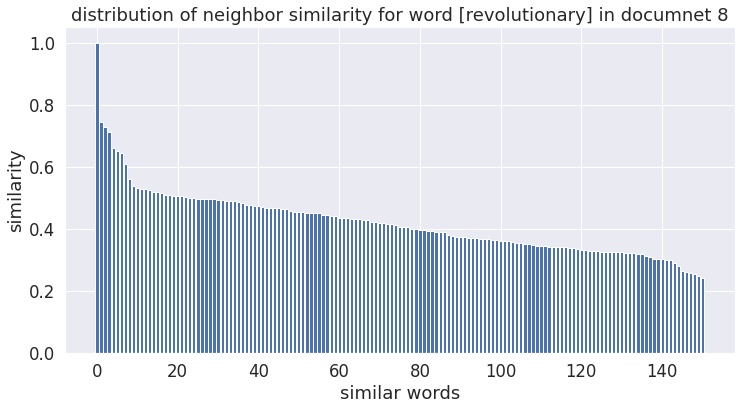

224   -->  fe
1690
[1.0, 0.7958379, 0.7750311, 0.71306103, 0.6984199, 0.64636445, 0.61726975, 0.5884714, 0.5698912, 0.55565274, 0.52380085, 0.5193433, 0.5043253, 0.50284827, 0.50081646, 0.4869095, 0.48035237, 0.48003083, 0.4767646, 0.47325015, 0.46944904, 0.46605402, 0.4537751, 0.44995797, 0.4497547, 0.4429332, 0.43450424, 0.43431455, 0.43071127, 0.43011796, 0.42850927, 0.42825317, 0.42430627, 0.42172214, 0.42101252, 0.42081532, 0.41993976, 0.41702414, 0.41573608, 0.4110045, 0.41023886, 0.41002244, 0.40701616, 0.4062413, 0.4057958, 0.40459892, 0.4038775, 0.40051967, 0.39953506, 0.39930797, 0.39755493, 0.3954497, 0.3951649, 0.39221117, 0.39206198, 0.39145118, 0.38748378, 0.3866548, 0.3859778, 0.38234594, 0.37961674, 0.3791266, 0.3778602, 0.37576547, 0.37548596, 0.37440813, 0.3732111, 0.37214953, 0.36761954, 0.3666413, 0.36205375, 0.3612027, 0.35709858, 0.35647112, 0.35392702, 0.347812, 0.3467219, 0.3448062, 0.34458992, 0.34163728, 0.3407516, 0.3386254, 0.3374396, 0.33456984, 0.33434427,

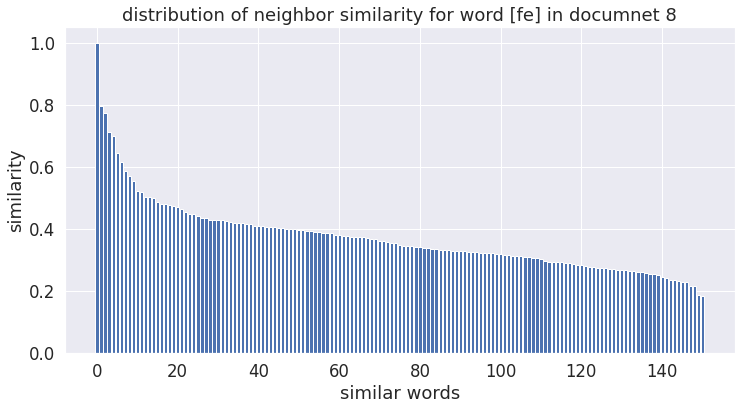

225   -->  ##r
1690
[1.0, 0.7958379, 0.7280569, 0.71027154, 0.64603186, 0.6117968, 0.6057266, 0.5755385, 0.5595299, 0.55624086, 0.5343791, 0.5198518, 0.51661265, 0.5165901, 0.50595677, 0.5050123, 0.5021856, 0.49181634, 0.48304132, 0.47492155, 0.47345096, 0.47333968, 0.45565706, 0.4409733, 0.43181652, 0.43142265, 0.42799369, 0.4197119, 0.4170956, 0.4158913, 0.41275713, 0.41204816, 0.4109522, 0.41047445, 0.40636808, 0.4057489, 0.4050822, 0.40496734, 0.4045518, 0.4024986, 0.400317, 0.3984868, 0.39590186, 0.395804, 0.3941204, 0.3933599, 0.3890121, 0.3886245, 0.38774025, 0.38574117, 0.38485354, 0.38294947, 0.38244864, 0.38139498, 0.38119823, 0.3796767, 0.37920803, 0.37814963, 0.37636825, 0.37488943, 0.37253416, 0.3667972, 0.3657068, 0.3609966, 0.35952806, 0.35942438, 0.3583465, 0.3574048, 0.35482454, 0.35435638, 0.35034555, 0.34793696, 0.34791958, 0.34711313, 0.3436371, 0.34279698, 0.34234443, 0.34135118, 0.34118178, 0.34100062, 0.34064078, 0.34045237, 0.33940145, 0.33233052, 0.33232963, 0.

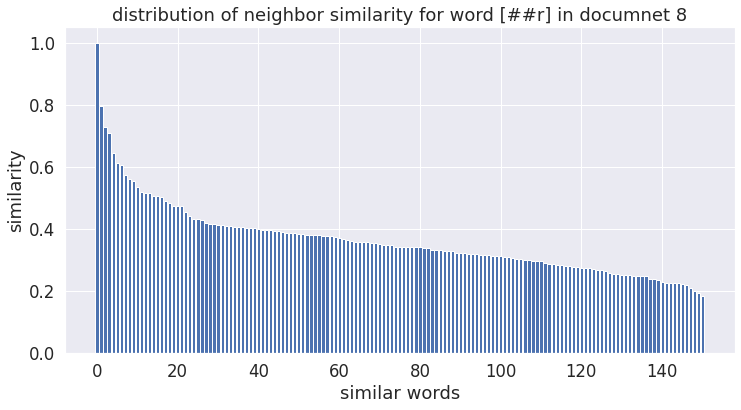

226   -->  ##vor
1690
[0.9999998, 0.7750311, 0.74330604, 0.71027154, 0.66064847, 0.6581948, 0.64249206, 0.63643396, 0.5898216, 0.5733576, 0.530655, 0.52498335, 0.52297604, 0.5213672, 0.5105487, 0.4990091, 0.4985712, 0.49660707, 0.49639085, 0.4943068, 0.48712853, 0.48619503, 0.48599622, 0.48167998, 0.4811651, 0.48065996, 0.4786185, 0.47851208, 0.46784854, 0.46555674, 0.46543172, 0.46491715, 0.46173775, 0.46094325, 0.45976228, 0.45746464, 0.4487844, 0.4449451, 0.4448687, 0.44431302, 0.44256508, 0.44033948, 0.44002515, 0.43522754, 0.43437234, 0.43401426, 0.43020624, 0.42937252, 0.4282772, 0.4279992, 0.4266864, 0.42590186, 0.42575306, 0.42434815, 0.42297214, 0.42274067, 0.4220246, 0.4211269, 0.42034942, 0.4177519, 0.41599756, 0.4142806, 0.41225573, 0.4119936, 0.41137624, 0.40972853, 0.4082622, 0.40549308, 0.40309787, 0.40085414, 0.40026596, 0.39781684, 0.3962233, 0.39545888, 0.39516824, 0.38549718, 0.38514602, 0.3840949, 0.38334593, 0.38292998, 0.3826915, 0.3787805, 0.37771055, 0.3766452, 

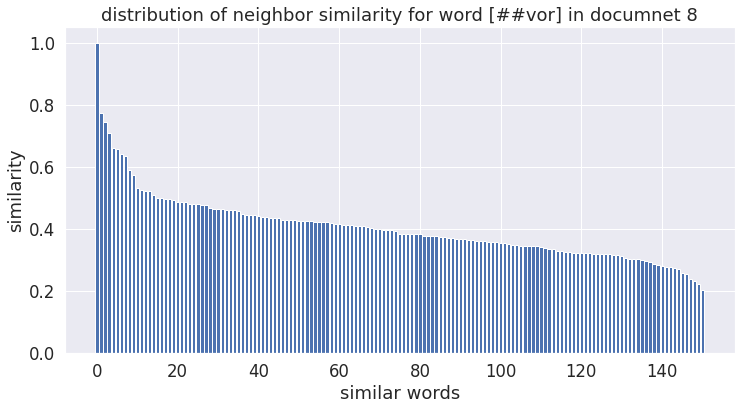

229   -->  land
1690
[0.99999976, 0.8719588, 0.73818946, 0.71480596, 0.6913289, 0.6688435, 0.6592585, 0.6409035, 0.64074284, 0.63021165, 0.63006085, 0.6273695, 0.6115985, 0.5785024, 0.5776473, 0.5713514, 0.5705655, 0.57038414, 0.56791955, 0.54217994, 0.54107034, 0.52722037, 0.52223897, 0.4868216, 0.48619503, 0.48460907, 0.48386347, 0.4759928, 0.47305298, 0.47021514, 0.4674835, 0.4647857, 0.46093917, 0.45657367, 0.4564737, 0.4464629, 0.4463782, 0.4463251, 0.44350827, 0.44291478, 0.44116482, 0.44024903, 0.43988353, 0.4353392, 0.4325777, 0.42967844, 0.42709023, 0.4267903, 0.4261081, 0.4232372, 0.4180509, 0.41765815, 0.41351864, 0.41331077, 0.41019028, 0.40896803, 0.40750277, 0.4069276, 0.40682584, 0.40605998, 0.40499598, 0.40447447, 0.40345234, 0.40236816, 0.4008863, 0.39975142, 0.39658773, 0.39573494, 0.39551663, 0.39271414, 0.39266747, 0.39243257, 0.39156628, 0.3902234, 0.3893166, 0.38884282, 0.38774437, 0.38748378, 0.38738015, 0.38162076, 0.37648225, 0.3754326, 0.3746698, 0.37466705, 0

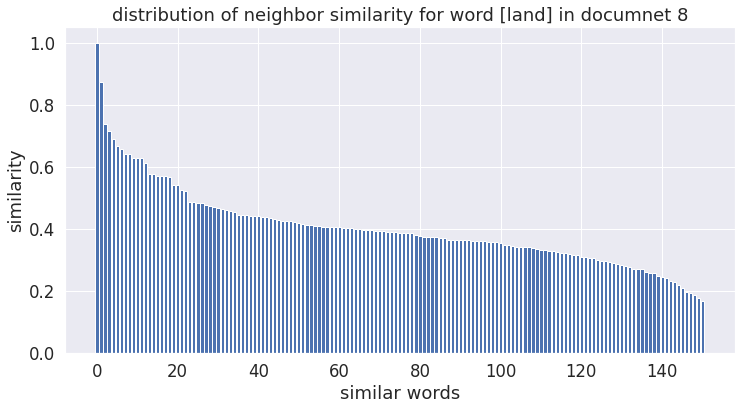

231   -->  used
1690
[0.99999976, 0.78180575, 0.77966875, 0.7344244, 0.6452997, 0.62951005, 0.6115985, 0.6027684, 0.58517593, 0.5244431, 0.5067421, 0.4965397, 0.49534097, 0.48142534, 0.46182203, 0.4606942, 0.45927644, 0.45696664, 0.45322025, 0.45291138, 0.44876012, 0.44182473, 0.43052602, 0.4270587, 0.42482188, 0.4175328, 0.41124827, 0.4052233, 0.40363812, 0.39311352, 0.38594496, 0.38490164, 0.3839764, 0.37846553, 0.37747377, 0.37710232, 0.37635306, 0.37408105, 0.37388802, 0.37152484, 0.3688428, 0.367959, 0.3678667, 0.3671636, 0.3666385, 0.36662182, 0.3653641, 0.36522406, 0.36294737, 0.36253983, 0.3597058, 0.35942438, 0.35787585, 0.35682324, 0.35647112, 0.35638428, 0.35577524, 0.35209158, 0.3513199, 0.3479865, 0.3471734, 0.34625566, 0.34584025, 0.34561837, 0.34558368, 0.34402996, 0.34355134, 0.3413703, 0.33900315, 0.33809382, 0.33764678, 0.33692312, 0.33674797, 0.33606252, 0.33500722, 0.33310157, 0.32746094, 0.3255394, 0.32282367, 0.32271203, 0.3214597, 0.32131988, 0.31970176, 0.316297

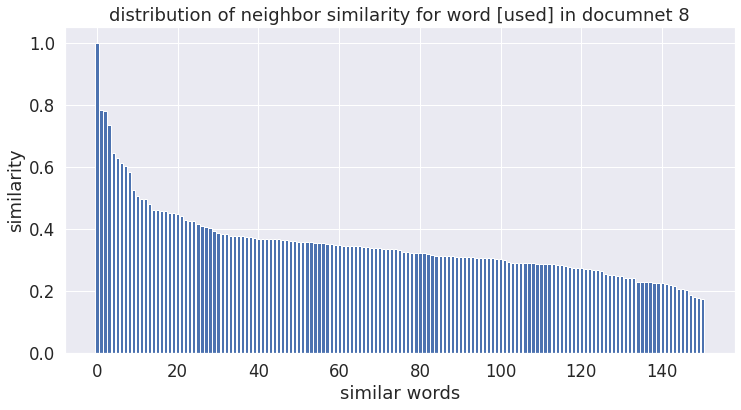

234   -->  new
1690
[0.99999994, 0.88885754, 0.8238502, 0.79518044, 0.6688435, 0.6609925, 0.6452997, 0.63837874, 0.6269543, 0.62246823, 0.62083536, 0.5967995, 0.5908987, 0.5856609, 0.5531424, 0.5469988, 0.5411881, 0.534995, 0.5301378, 0.5219646, 0.50302315, 0.4862665, 0.48394734, 0.47178027, 0.47171515, 0.47086594, 0.46768582, 0.46646377, 0.46487394, 0.46267396, 0.45758832, 0.44565254, 0.44443423, 0.44398612, 0.44380713, 0.43976066, 0.43690312, 0.4349633, 0.43106705, 0.4297824, 0.42660454, 0.42569253, 0.42556047, 0.42304093, 0.4220106, 0.41948107, 0.41941673, 0.41933808, 0.419101, 0.41896892, 0.4185838, 0.41802582, 0.41792968, 0.41479802, 0.41451275, 0.41202825, 0.41049498, 0.4097004, 0.4011351, 0.40018436, 0.39939153, 0.39820418, 0.39784747, 0.39770332, 0.39342207, 0.39235634, 0.39180925, 0.38736123, 0.38292998, 0.38174963, 0.38029572, 0.3785584, 0.3742865, 0.37362152, 0.373111, 0.37189668, 0.37023717, 0.3693842, 0.3680972, 0.36591643, 0.36283964, 0.36256576, 0.3612352, 0.35929805, 0.

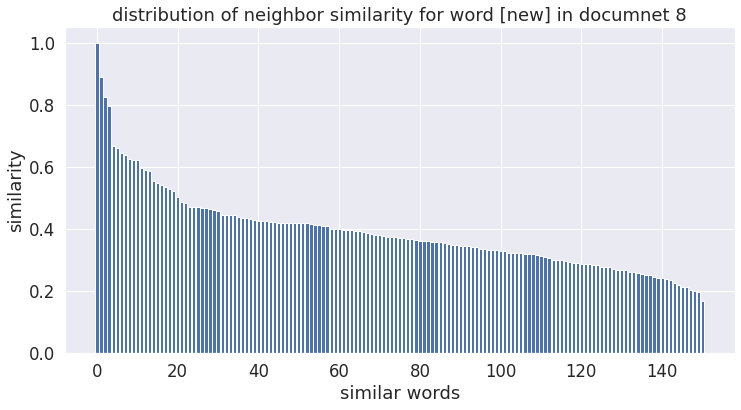

235   -->  freedoms
1690
[1.0000002, 0.88885754, 0.77324176, 0.73084855, 0.68390775, 0.6409035, 0.6263426, 0.5950104, 0.592258, 0.58517593, 0.56847835, 0.561645, 0.5572214, 0.5541916, 0.5477754, 0.51761997, 0.5155988, 0.4785487, 0.47663388, 0.47346407, 0.4715763, 0.4695552, 0.46899164, 0.46069443, 0.4591614, 0.45852327, 0.44986245, 0.445839, 0.4376305, 0.4374917, 0.43254757, 0.42985728, 0.4204626, 0.41996628, 0.41484642, 0.4135282, 0.413458, 0.40925413, 0.40751368, 0.4053694, 0.4036949, 0.3989727, 0.39581054, 0.39358988, 0.39103872, 0.38799945, 0.38681746, 0.38441136, 0.3828404, 0.38066432, 0.3793984, 0.37919986, 0.37868884, 0.37636262, 0.37557748, 0.37480432, 0.37090954, 0.36995137, 0.36926335, 0.36730543, 0.36496845, 0.36446092, 0.36231524, 0.36167765, 0.36101037, 0.36017153, 0.35975975, 0.35650128, 0.35294592, 0.3527283, 0.35186785, 0.35001656, 0.3488573, 0.34641546, 0.34592047, 0.3450633, 0.34472847, 0.3442461, 0.34007093, 0.33135146, 0.32823524, 0.326677, 0.32522118, 0.32300204, 0

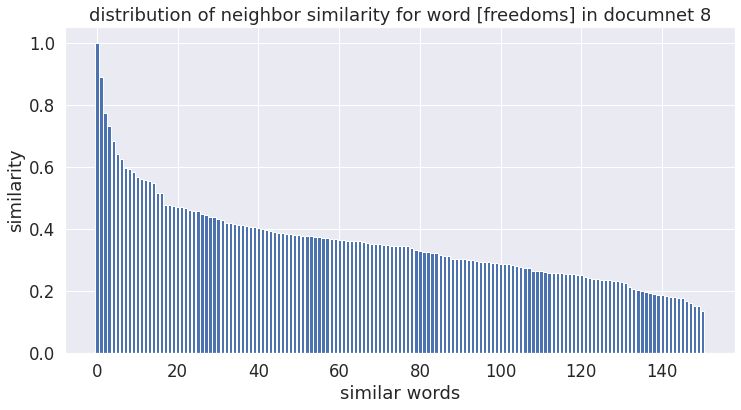

237   -->  24
1690
[0.9999999, 0.75539994, 0.73149264, 0.7023339, 0.67481476, 0.5337305, 0.5323485, 0.52722037, 0.5219646, 0.5016656, 0.5007177, 0.49576414, 0.49093246, 0.48351598, 0.47806734, 0.47070625, 0.46995854, 0.4589757, 0.45852327, 0.45585936, 0.45515472, 0.45322025, 0.44793215, 0.44366896, 0.44187558, 0.4315605, 0.43090832, 0.42996016, 0.42703354, 0.42328325, 0.4148449, 0.41480455, 0.41264778, 0.41224003, 0.412041, 0.40966105, 0.40711406, 0.40702254, 0.406866, 0.40493333, 0.40331256, 0.403127, 0.4029406, 0.4010192, 0.39813817, 0.3931474, 0.393, 0.39265305, 0.38799095, 0.3865886, 0.37968752, 0.37209058, 0.37137052, 0.3693887, 0.3682875, 0.36786568, 0.36343715, 0.36155528, 0.35974294, 0.3588187, 0.35861555, 0.35780615, 0.3577127, 0.3572541, 0.35096434, 0.3474082, 0.34609854, 0.34587386, 0.34355685, 0.34318066, 0.33965075, 0.3379514, 0.33470896, 0.33264995, 0.3313743, 0.3284588, 0.32701147, 0.3268806, 0.32675967, 0.32635838, 0.32262033, 0.3224474, 0.3204475, 0.31822604, 0.3166346

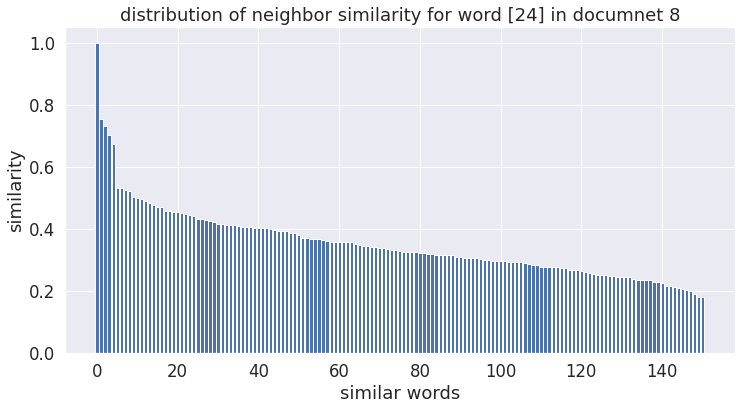

238   -->  years
1690
[0.9999999, 0.8577758, 0.8328215, 0.75539994, 0.71497166, 0.5958339, 0.5846916, 0.5776473, 0.5710378, 0.5686722, 0.56241167, 0.54740375, 0.5469988, 0.5426527, 0.5331765, 0.53031635, 0.528618, 0.5268435, 0.5161839, 0.5155988, 0.50789434, 0.49991554, 0.49530616, 0.4876861, 0.48142534, 0.47626233, 0.46962506, 0.46755552, 0.45764607, 0.45573395, 0.45202917, 0.447367, 0.4462483, 0.43935582, 0.43893957, 0.43855616, 0.4382378, 0.43275794, 0.43121296, 0.4310929, 0.42672622, 0.42594314, 0.42419523, 0.42243445, 0.4214291, 0.4206067, 0.41936427, 0.41905493, 0.4189092, 0.41516218, 0.41209498, 0.40788227, 0.40491802, 0.40435928, 0.40106085, 0.40096116, 0.39864266, 0.39813864, 0.39665422, 0.39324152, 0.39237458, 0.39084232, 0.39060515, 0.38989225, 0.38480604, 0.3817867, 0.37454575, 0.37225527, 0.36856788, 0.36777413, 0.36306232, 0.3616243, 0.36130586, 0.360784, 0.35881507, 0.35866782, 0.3576816, 0.35635543, 0.3561194, 0.35116357, 0.34964204, 0.339742, 0.33952647, 0.33894446, 0.

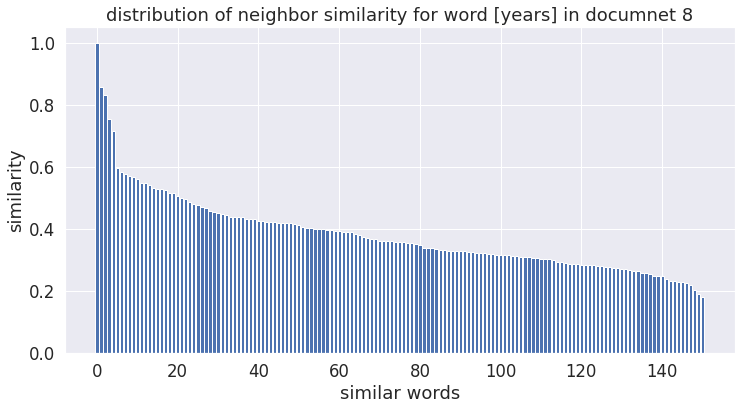

240   -->  dictatorship
1690
[1.0, 0.8328215, 0.776688, 0.67481476, 0.63587016, 0.5967995, 0.5704261, 0.56791955, 0.5641757, 0.5594329, 0.5477754, 0.54676765, 0.5406256, 0.53324866, 0.53114223, 0.5311377, 0.5265785, 0.5255138, 0.50621444, 0.49220523, 0.49167472, 0.48520195, 0.48432603, 0.48383638, 0.48082864, 0.4726173, 0.47141123, 0.4654346, 0.46025085, 0.45927644, 0.45898667, 0.45885783, 0.45048988, 0.44884604, 0.44818574, 0.4463382, 0.44240108, 0.43360013, 0.43118045, 0.42795205, 0.42282736, 0.4219075, 0.420748, 0.4177519, 0.41593933, 0.41337448, 0.41011715, 0.40819702, 0.40478605, 0.4043988, 0.40426406, 0.39927372, 0.3979187, 0.39441746, 0.38997695, 0.38957226, 0.384646, 0.3830964, 0.38057584, 0.37888753, 0.37855297, 0.37507015, 0.37491846, 0.37373358, 0.37260488, 0.37208045, 0.37183917, 0.36881208, 0.36707488, 0.36378306, 0.36310393, 0.36052966, 0.35702142, 0.35534418, 0.35397664, 0.35368297, 0.3523088, 0.3501538, 0.34895384, 0.3485763, 0.34779465, 0.3467219, 0.34671888, 0.3457074

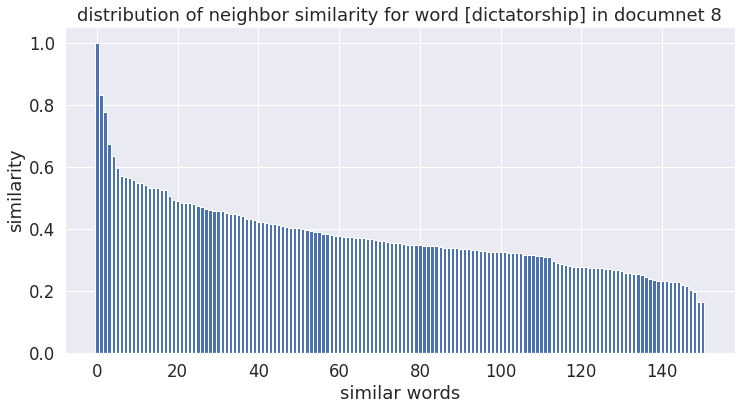

243   -->  country
1690
[0.99999994, 0.8719588, 0.756235, 0.6766275, 0.67489654, 0.66064274, 0.6497426, 0.62856495, 0.5692638, 0.5411881, 0.53966033, 0.5308947, 0.5244431, 0.5230646, 0.51761997, 0.5140133, 0.5045552, 0.50227535, 0.49478164, 0.48910522, 0.4876861, 0.48383638, 0.46672386, 0.46036005, 0.45715255, 0.43812704, 0.43522754, 0.43200457, 0.42820373, 0.4279176, 0.4261313, 0.4245454, 0.42396447, 0.42137176, 0.42066574, 0.418949, 0.4150322, 0.41480455, 0.41411206, 0.40948892, 0.40610737, 0.4044511, 0.4044466, 0.40440348, 0.40379396, 0.40322432, 0.40275884, 0.4025331, 0.39387888, 0.39015624, 0.38874957, 0.38699818, 0.3859126, 0.38565442, 0.38540304, 0.38505208, 0.38151437, 0.38087362, 0.38068503, 0.37804735, 0.37619698, 0.37309903, 0.36811253, 0.36761954, 0.36461422, 0.36069477, 0.35799873, 0.3572287, 0.3556218, 0.35545555, 0.35007566, 0.34874773, 0.34726465, 0.34597823, 0.3439241, 0.34381413, 0.34265047, 0.34064078, 0.3398295, 0.3394879, 0.33872968, 0.33853185, 0.33723968, 0.33701

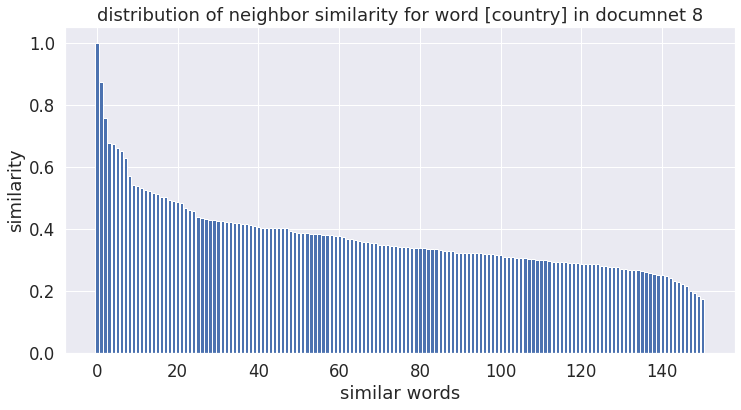

244   -->  wary
1690
[1.0, 0.72276634, 0.6766275, 0.6706786, 0.6601956, 0.6497866, 0.649678, 0.64074284, 0.63603455, 0.6323116, 0.62951005, 0.6276905, 0.6224675, 0.61335945, 0.61325836, 0.5920334, 0.5908987, 0.561645, 0.5160949, 0.50960517, 0.5044767, 0.48903942, 0.48329505, 0.47626233, 0.4701396, 0.4676628, 0.46372408, 0.4610693, 0.4606526, 0.4589757, 0.45864984, 0.45643717, 0.45048988, 0.4474824, 0.44636273, 0.44430512, 0.4428162, 0.44194356, 0.4409157, 0.43905824, 0.43856823, 0.43830565, 0.43820417, 0.4381478, 0.429371, 0.42756075, 0.4262438, 0.42448887, 0.42442918, 0.4242974, 0.4206902, 0.4181396, 0.4142806, 0.4139399, 0.41319916, 0.40755457, 0.40407366, 0.40262386, 0.4019442, 0.4013384, 0.40040722, 0.39329922, 0.39273906, 0.38657725, 0.3840211, 0.38282675, 0.38090733, 0.37830794, 0.37677813, 0.37585294, 0.3709437, 0.3700748, 0.3689836, 0.3672216, 0.36548907, 0.36501998, 0.36135462, 0.35901883, 0.35836768, 0.35709858, 0.3558354, 0.3540161, 0.35367733, 0.35280865, 0.35064536, 0.3471

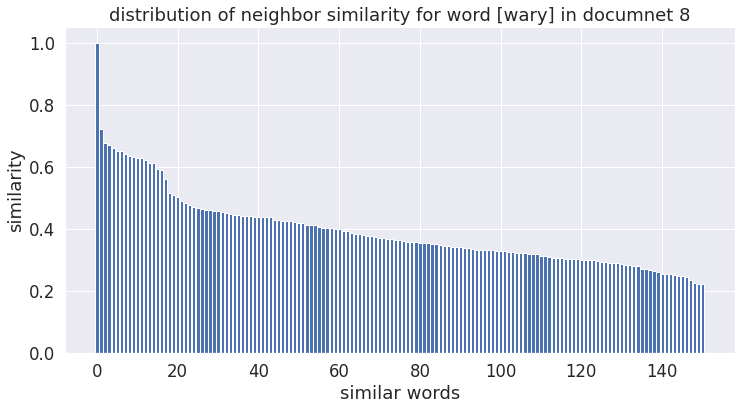

247   -->  old
1690
[1.0000002, 0.87556934, 0.8674629, 0.8260746, 0.8073132, 0.6620275, 0.64323515, 0.6276905, 0.6269543, 0.5950104, 0.590346, 0.5695672, 0.54676765, 0.5443934, 0.5421165, 0.54107034, 0.5331765, 0.5168167, 0.5057217, 0.49861917, 0.4960389, 0.49534097, 0.49478164, 0.49089664, 0.48894927, 0.47806734, 0.4712414, 0.47102836, 0.46126142, 0.45733598, 0.45704508, 0.4518742, 0.44126642, 0.44112533, 0.44033948, 0.44001845, 0.43818474, 0.43815655, 0.43770465, 0.4367265, 0.4337255, 0.4303485, 0.42562395, 0.41728365, 0.41509154, 0.4104977, 0.4082659, 0.4080142, 0.40659207, 0.40423232, 0.39681587, 0.3957842, 0.39403304, 0.39185718, 0.3916931, 0.38288268, 0.38207373, 0.3816275, 0.3802721, 0.37440813, 0.3727863, 0.37251776, 0.3706526, 0.36873743, 0.36315024, 0.3574048, 0.3562703, 0.35248834, 0.35215926, 0.35151404, 0.3477741, 0.3457089, 0.3456385, 0.34251976, 0.33711576, 0.33699393, 0.33124346, 0.33068594, 0.3304712, 0.327196, 0.3228357, 0.31995755, 0.31908187, 0.31447044, 0.3101129, 

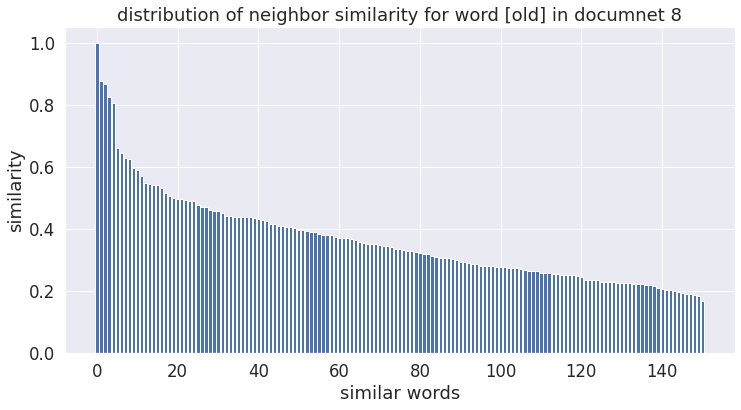

248   -->  guard
1690
[1.0, 0.8674629, 0.85503674, 0.83722746, 0.8367414, 0.68390775, 0.6609925, 0.6497866, 0.6378381, 0.6319057, 0.6308627, 0.6257781, 0.5785024, 0.5298733, 0.52553076, 0.5255138, 0.51166546, 0.50789434, 0.50227535, 0.4965397, 0.49350086, 0.47850084, 0.47341505, 0.45751354, 0.45590997, 0.4532596, 0.45288837, 0.45045832, 0.4502229, 0.44793215, 0.44657227, 0.44327936, 0.4408998, 0.43485284, 0.43290594, 0.4306755, 0.42416355, 0.41981244, 0.41260466, 0.41139907, 0.40887156, 0.40602392, 0.40309787, 0.39726424, 0.39529002, 0.39478803, 0.39423624, 0.3930115, 0.3903135, 0.38266176, 0.38086456, 0.38052034, 0.37971172, 0.37958628, 0.37870425, 0.37790096, 0.37346587, 0.3716205, 0.3705358, 0.3673383, 0.36373746, 0.3619504, 0.35973978, 0.3574733, 0.3557343, 0.35523146, 0.35448608, 0.35327846, 0.35276115, 0.35034388, 0.35025653, 0.3490467, 0.3428633, 0.34163728, 0.34108332, 0.33594042, 0.33288565, 0.33125353, 0.3307699, 0.32052758, 0.31950998, 0.3157382, 0.31266996, 0.31261927, 0.31

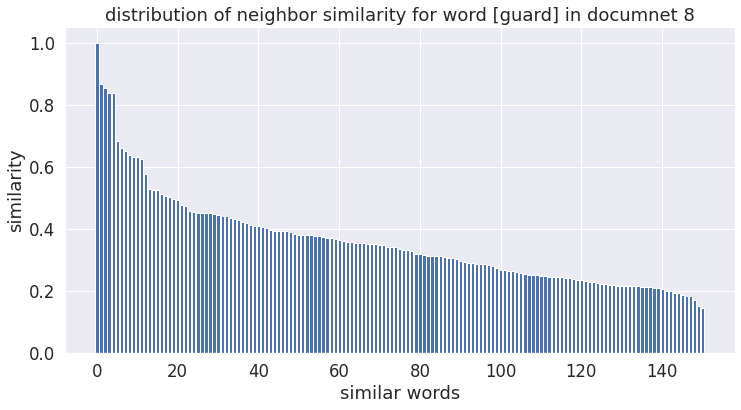

250   -->  flourished
1690
[0.99999994, 0.8935324, 0.8367414, 0.8260746, 0.8060154, 0.7702743, 0.71540594, 0.61335945, 0.60605323, 0.592258, 0.5856609, 0.5705655, 0.5641883, 0.54740375, 0.53960717, 0.53114223, 0.527797, 0.5140133, 0.50679713, 0.50299114, 0.49771863, 0.49580938, 0.48157275, 0.46995854, 0.46793455, 0.46749163, 0.46748912, 0.46153957, 0.4606799, 0.45696664, 0.45666635, 0.44755232, 0.44567484, 0.4445634, 0.4444335, 0.44431302, 0.44363898, 0.44284058, 0.44064513, 0.44049576, 0.43098116, 0.42740938, 0.42614955, 0.4228701, 0.41747546, 0.41673118, 0.41599292, 0.41454312, 0.4145049, 0.41370136, 0.40285397, 0.39792848, 0.39781892, 0.3954512, 0.3951649, 0.39202136, 0.39169076, 0.3915621, 0.39075303, 0.38884354, 0.38807958, 0.3849067, 0.37971213, 0.37940824, 0.3735477, 0.3702334, 0.36844397, 0.36750323, 0.3665076, 0.36556596, 0.3591426, 0.3555872, 0.3541406, 0.35188812, 0.3513661, 0.34588677, 0.3429564, 0.34261045, 0.3418299, 0.34118178, 0.34057117, 0.3399284, 0.33717543, 0.336671

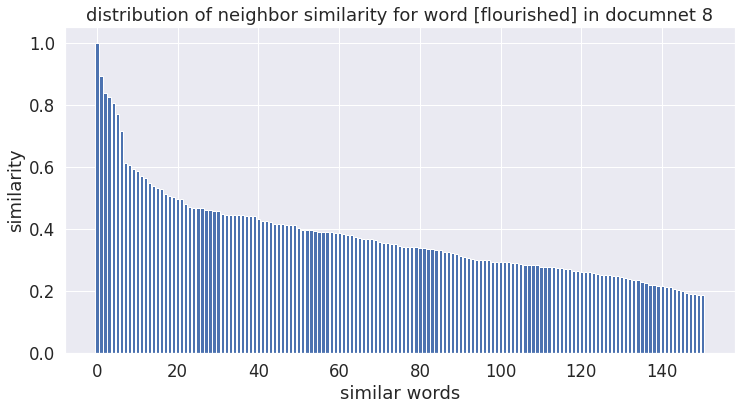

252   -->  mr
1690
[0.99999994, 0.8566628, 0.7682048, 0.71540594, 0.67697275, 0.6631439, 0.64982295, 0.64323515, 0.6378381, 0.62581897, 0.5846916, 0.5594329, 0.5407382, 0.5323485, 0.50960517, 0.48920548, 0.48661834, 0.47611752, 0.4680149, 0.46267396, 0.46259624, 0.4578706, 0.45657367, 0.45149168, 0.44429612, 0.4374917, 0.43570763, 0.43531868, 0.43409374, 0.42825317, 0.42593235, 0.42162842, 0.420245, 0.41955268, 0.4192962, 0.41467708, 0.41411206, 0.41317952, 0.41253808, 0.40825248, 0.40701288, 0.4057489, 0.40549308, 0.4051011, 0.40363812, 0.40333304, 0.40313688, 0.40130055, 0.39865598, 0.3977993, 0.39730495, 0.3970384, 0.39532903, 0.39373404, 0.39033198, 0.38905394, 0.38635054, 0.382343, 0.38204664, 0.3805892, 0.3778978, 0.37356323, 0.37081453, 0.3697581, 0.36909902, 0.36800578, 0.36578473, 0.3653965, 0.36443302, 0.3618785, 0.36117685, 0.36050713, 0.3603087, 0.3592919, 0.3587939, 0.35816735, 0.3572751, 0.3557047, 0.35341525, 0.35282445, 0.35199043, 0.35046673, 0.3504436, 0.3504025, 0.34

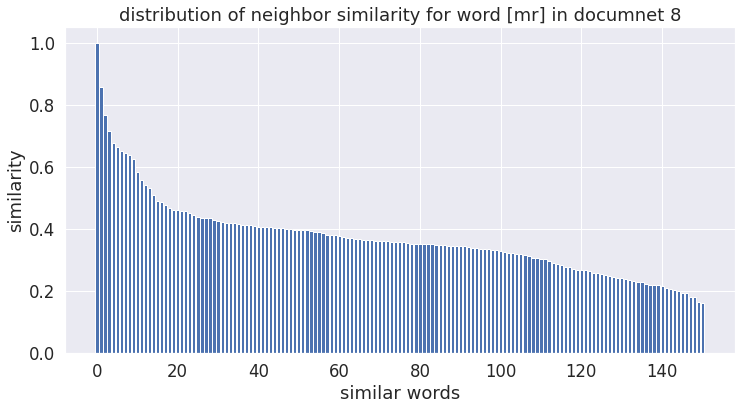

254   -->  ce
1690
[1.0, 0.8101817, 0.7682048, 0.6532091, 0.60523105, 0.5958339, 0.5884714, 0.5704261, 0.5641883, 0.5595299, 0.5471548, 0.5443934, 0.54120576, 0.53928673, 0.5374297, 0.53428996, 0.53049254, 0.5257302, 0.5145253, 0.51166546, 0.5061101, 0.50352204, 0.5034989, 0.5016656, 0.49939203, 0.49760702, 0.49639085, 0.4949634, 0.49289277, 0.48943704, 0.48240435, 0.47842938, 0.47675547, 0.47035515, 0.46768582, 0.46109164, 0.45671588, 0.4475977, 0.44483978, 0.4428162, 0.44172347, 0.4405802, 0.43773228, 0.43550465, 0.43518826, 0.43391556, 0.43254757, 0.42967844, 0.4295623, 0.42438072, 0.42299008, 0.42014658, 0.41982237, 0.4181063, 0.41475672, 0.41321778, 0.4070351, 0.4044511, 0.40413153, 0.4032505, 0.39977178, 0.39537132, 0.39530694, 0.39311352, 0.3925283, 0.3910591, 0.39061636, 0.3903359, 0.38958448, 0.38844866, 0.38752306, 0.38259524, 0.37994134, 0.37841046, 0.3760248, 0.37482673, 0.3746842, 0.37379014, 0.37337726, 0.37299034, 0.37184876, 0.37155753, 0.36671576, 0.36553705, 0.3639866

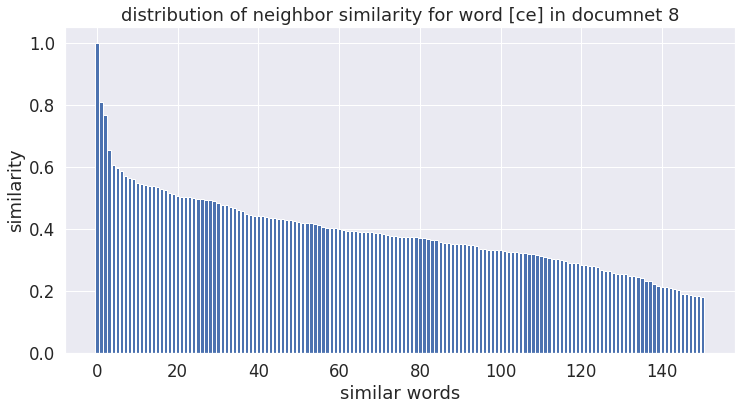

255   -->  ##aus
1690
[0.9999999, 0.8101817, 0.67697275, 0.6362125, 0.6054218, 0.56241167, 0.55624086, 0.5406256, 0.5193433, 0.50776136, 0.49786675, 0.49771863, 0.48894927, 0.4781783, 0.4705375, 0.4676628, 0.46762502, 0.46543172, 0.46357313, 0.46301872, 0.46301806, 0.45515472, 0.45373493, 0.45245183, 0.45153478, 0.45104048, 0.4502229, 0.44633391, 0.44472915, 0.44415805, 0.44148052, 0.43901283, 0.4336375, 0.43239453, 0.42602092, 0.42340896, 0.41807872, 0.4173146, 0.40902966, 0.40607136, 0.40595418, 0.40275884, 0.40021175, 0.3996965, 0.39649493, 0.39582926, 0.39200342, 0.39180925, 0.39054424, 0.39022735, 0.38884282, 0.3880356, 0.38801253, 0.3877812, 0.38530105, 0.38195288, 0.38062498, 0.3793984, 0.37892187, 0.37888664, 0.3786834, 0.37575853, 0.37523305, 0.37106615, 0.37076592, 0.367959, 0.36558563, 0.3636073, 0.36261243, 0.35882214, 0.35703415, 0.3547939, 0.354784, 0.34670138, 0.34500432, 0.34496123, 0.33821636, 0.33772004, 0.33720058, 0.337035, 0.3359782, 0.33417702, 0.33407164, 0.32782

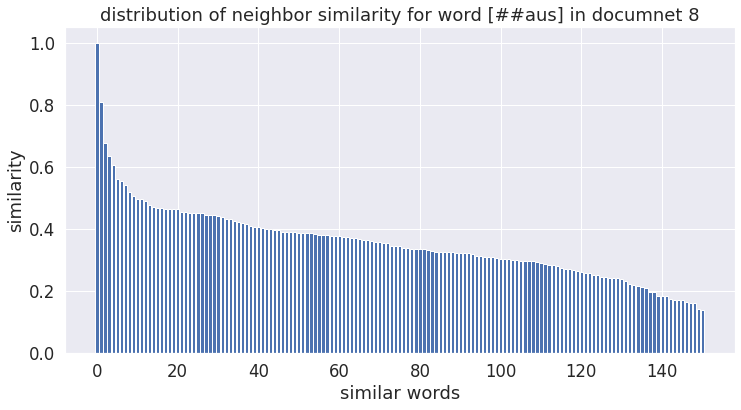



['confronted', 'by', 'growing', 'demands', 'that', 'the', 'communist', 'party', 'dissolve', 'itself', ',', 'top', 'officials', 'of', 'this', 'country', "'", 's', 'old', 'order', 'say', 'they', 'will', 'call', 'a', 'special', 'congress', 'to', 'di', '##sman', '##tle', 'the', 'disgrace', '##d', 'party', 'even', 'before', 'free', 'elections', 'are', 'held', 'in', 'april', '.', 'late', 'saturday', 'night', ',', 'a', 'group', 'of', 'party', 'officials', ',', 'many', 'of', 'whom', 'quickly', 'severed', 'their', 'relationship', 'with', 'the', 'ce', '##aus', '##escu', 'dictatorship', 'as', 'a', 'popular', 'uprising', 'swept', 'it', 'out', 'of', 'power', ',', 'went', 'on', 'the', 'national', 'television', 'to', 'announce', 'the', 'special', 'congress', '.', 'their', 'message', 'was', 'repeated', 'today', 'in', 'the', 'rum', '##anian', 'newspapers', ',', 'which', 'like', 'the', 'television', 'are', 'now', 'controlled', 'by', 'the', 'country', "'", 's', 'new', ',', 'non', '-', 'communist', 'lea

In [50]:
import string 
 
stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']


doc = 8

print('tokens in  doc {} are {}'.format(doc, tokenizer.tokenize(sentences[doc])))
total_tokens = tokenizer.tokenize(sentences[doc])[0:min(max_length, len(sentences[doc]))]
print('size of the document before removing stopwords is ', len(total_tokens))
word_neighbor_similarity_dict = dict()
for ind, word in zip(total_tokens, range(1,len(total_tokens))):
  if ind not in stopwords and ind not in string.punctuation:
    plt.figure(word)
    print(word, '  --> ', ind)
    
    value_list = list()
    temp = sorted(find_similar(last_layer[doc], word,  tokenizer.tokenize(sentences[doc])).items(), key=lambda kv: kv[1], reverse=True)
    for d in temp:
      value_list.append(d[1])
      ## plot data
    print(value_list)
    word_neighbor_similarity_dict[ind] = value_list
    print('variance is {}'.format(np.var(value_list)))
    print('Average is {}'.format(np.average(value_list)))
    plt.bar(range(0, len(value_list)), value_list)
    plt.xlabel('similar words')
    plt.ylabel('similarity')
    plt.title('distribution of neighbor similarity for word [{}] in documnet {}'.format(ind, doc))
    plt.show()
    # plt.savefig('/content/Images/'+ind+'.png')
print()
print()

print(total_tokens)


In [51]:
print("ali")

ali


In [52]:
# print(word_neighbor_similarity_dict)
gradient_word_similarity_dict = dict()
total_size = len(word_neighbor_similarity_dict['top'])
print(total_size-total_size%10)
length =np.arange(0, total_size)
jump = 3
for word in word_neighbor_similarity_dict:
  # print(word_neighbor_similarity_dict[word])
  # print(length)
  # new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, len(word_neighbor_similarity_dict['top']), jump)]
  new_list = [word_neighbor_similarity_dict[word][x:x+jump] for x in range(0, total_size-total_size%jump, jump)]
  tm_list = list()
  for vec in new_list:
    m1, b1 = np.polyfit(np.arange(0, len(vec)), vec, 1)
    tm_list.append(m1)
  gradient_word_similarity_dict[word] = tm_list
print(gradient_word_similarity_dict)
#convert dict to a numpy array

150
{'confronted': [-0.16376861929893488, -0.009259909391403042, -0.010957837104797316, -0.007445544004440195, -0.009486198425292932, -0.0019724965095519716, -0.016180574893951312, -0.004485934972763013, -0.009272769093513487, -0.0010292083024978187, -0.00372152030467986, -0.009014546871185265, -0.003086373209953322, -0.002025008201599093, -0.005046457052230758, -0.002911120653152452, -0.0012295097112654746, -0.0011629909276962007, -0.0019157081842422084, -0.004718095064163167, -0.0036694109439849862, -0.0039756000041961375, -0.001931861042976361, -0.0031477808952331066, -0.002543628215789767, -0.00032436847686762195, -0.0016838759183883346, -0.000843763351440407, -0.001323714852333029, -0.0005024969577788968, -0.0011348724365234282, -0.0011452585458755194, -0.0008296817541122615, -0.0024757683277129936, -0.0007653832435607516, -0.0004807412624359219, -0.0002133846282958543, -0.0009087920188903775, -0.0020523369312286256, -0.0002719759941100862, -0.0005066990852355811, -0.0016949027776

In [53]:
#clustering by kmean
# print(gradient_word_similarity_dict.items())
X =np.array(list(gradient_word_similarity_dict.values()))
word_list = list(gradient_word_similarity_dict.keys())

print(X.shape)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(' kmeans.labels_ is {}'.format(kmeans.labels_))
print('kmeans.cluster_centers_ is {}'.format(kmeans.cluster_centers_))

from sklearn.metrics import silhouette_samples, silhouette_score

(109, 50)
 kmeans.labels_ is [1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0]
kmeans.cluster_centers_ is [[-0.10463952 -0.04182228 -0.02152235 -0.00903921 -0.0083615  -0.00741248
  -0.00451093 -0.00487069 -0.00386974 -0.0040233  -0.0038961  -0.00288565
  -0.00256722 -0.00302769 -0.00237692 -0.00191661 -0.00239319 -0.00183527
  -0.00199716 -0.00188951 -0.00201985 -0.00179629 -0.0016074  -0.00170194
  -0.0016428  -0.00153464 -0.00154627 -0.00138552 -0.00147469 -0.00158825
  -0.00130967 -0.00144626 -0.00139419 -0.00153196 -0.00142667 -0.00159363
  -0.0015115  -0.00178075 -0.00185007 -0.00182465 -0.00187496 -0.00180108
  -0.00204715 -0.00240114 -0.00270561 -0.00283351 -0.00251631 -0.00359177
  -0.00442709 -0.00835748]
 [-0.18398013 -0.01465071 -0.01310917 -0.00757664 -0.00561725 -0.00422106
  -0.00415233 -0.00392176 -0.

In [54]:
! pip install statistics

In [55]:
new_X = X[:,0:Max_Feature_Size]

list of cluster words are: 
cluster 0 is ['growing', 'communist', 'officials', 'country', 'old', 'say', 'call', 'di', '##sman', '##tle', 'disgrace', 'even', 'elections', 'held', 'late', 'saturday', 'night', 'group', 'quickly', 'severed', 'relationship', 'ce', '##escu', 'dictatorship', 'popular', 'uprising', 'swept', 'power', 'message', 'repeated', 'today', 'controlled', 'new', 'non', 'leaders', 'president', 'nicola', '##e', 'high', 'ranking', 'open', 'revolutionary', 'fe', '##r', '##vor', 'vest', '##ige', '##s', 'mighty', 'communists', 'among', 'students', 'streets', 'long', 'suppressed', 'artists', 'intellectuals', 'within', 'dec', '##imated', 'ranks', 'land', 'used', 'freedoms', '24', 'years', 'guard', 'flourished', 'mr']
cluster 1 is ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', 'many', '##aus', 'went', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since

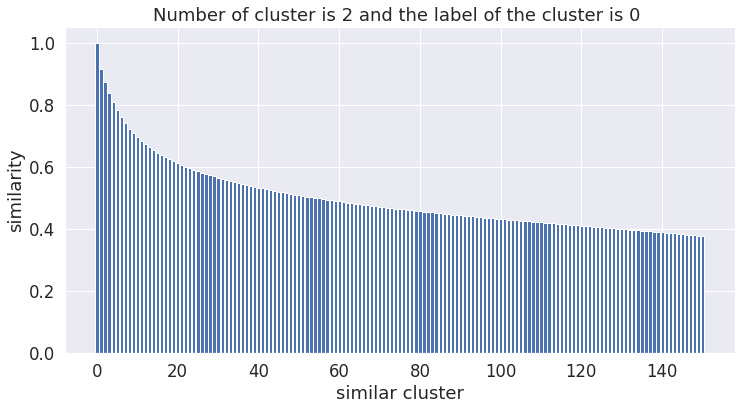

tmp_list shape is  (40, 151)  and the lenght is 151
Number of cluster is 1 and the label of the cluster is 1 


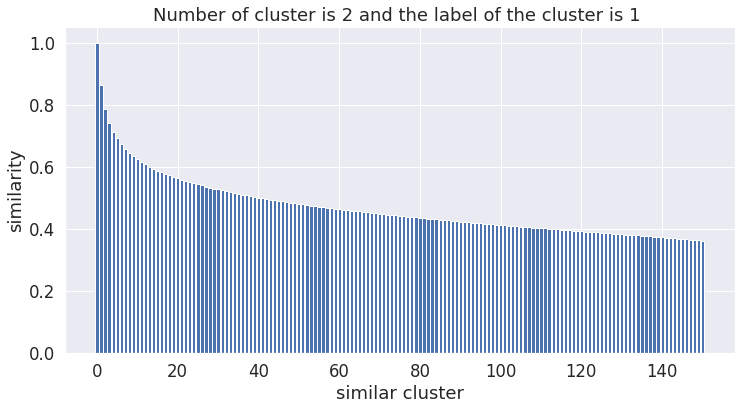

For n_clusters = 2 The average silhouette_score is : 0.429943527378378
list of cluster words are: 
cluster 0 is ['old', 'di', '##sman', 'elections', 'held', 'severed', '##escu', 'new', 'president', 'nicola', '##e', 'open', 'vest', '##ige', '##s', 'dec', '24', 'years', 'guard']
cluster 1 is ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', '##aus', 'went', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'appear', 'seeking', 'political', 'profile', 'swirl', 'eager', '##ness', 'erase', 'risen', 'reflects', 'wary']
cluster 2 is ['growing', 'communist', 'officials', 'country', 'say', 'call', '##tle', 'disgrace', 'even', 'late', 'saturday', 'night', 'group', 'many', 'quickly', 'relationship', 'ce', 'dictatorship', 'popular', 'uprising', 'swept', 'power', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'high'

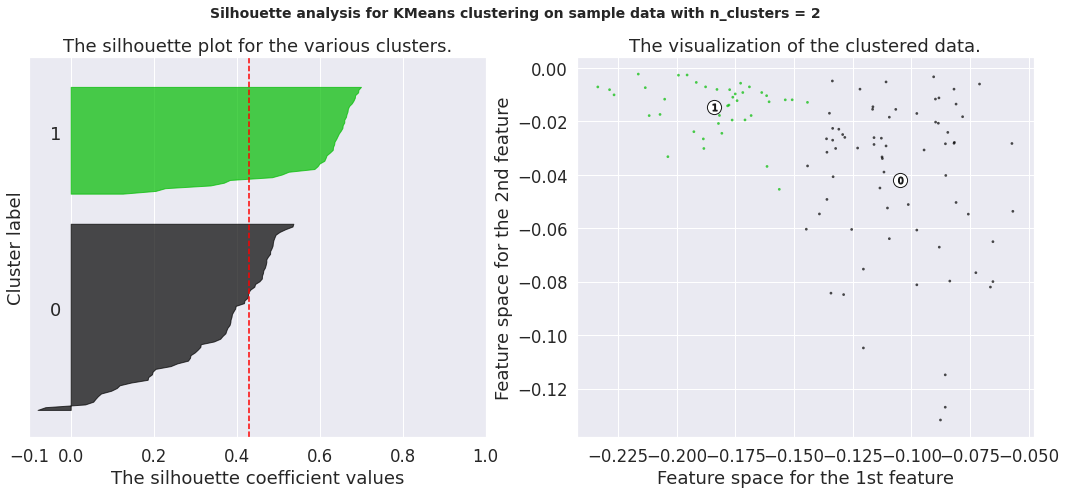

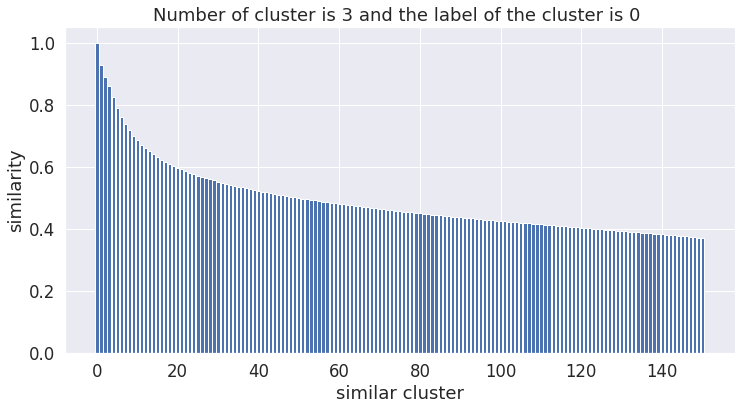

tmp_list shape is  (38, 151)  and the lenght is 151
Number of cluster is 2 and the label of the cluster is 1 


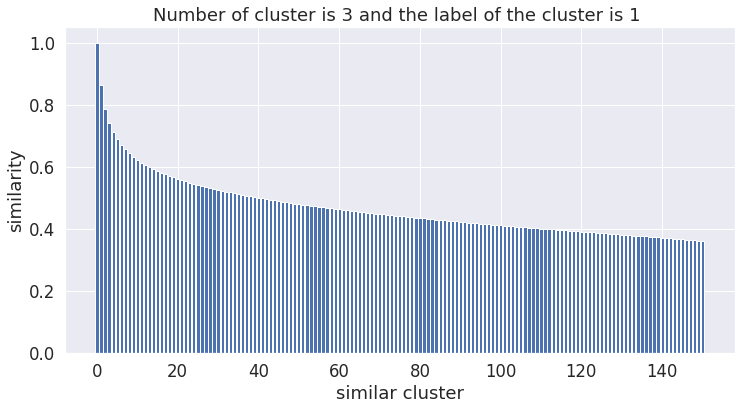

tmp_list shape is  (52, 151)  and the lenght is 151
Number of cluster is 2 and the label of the cluster is 2 


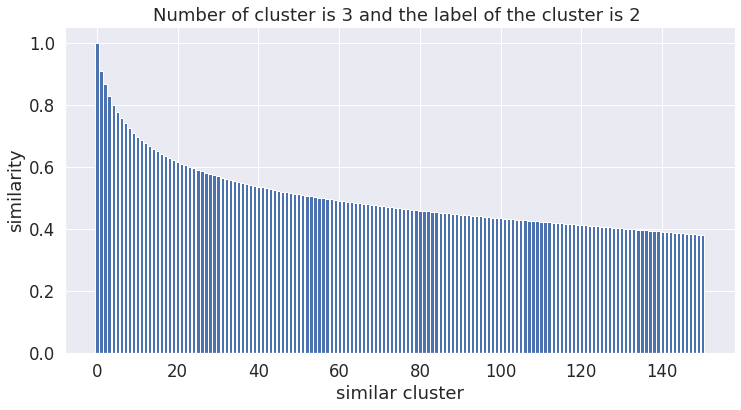

For n_clusters = 3 The average silhouette_score is : 0.37779426077375056
list of cluster words are: 
cluster 0 is ['di', '##sman', '##tle', 'late', 'saturday', 'night', 'quickly', 'uprising', 'swept', 'power', '##ige', '##s', 'mighty', 'students', 'streets', 'long', 'suppressed', 'artists', 'intellectuals', '##imated', 'ranks', 'flourished']
cluster 1 is ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', 'dictatorship', 'popular', 'went', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'among', 'within', 'cry', 'land', 'used', 'freedoms', 'mr']
cluster 2 is ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', '##aus', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'di

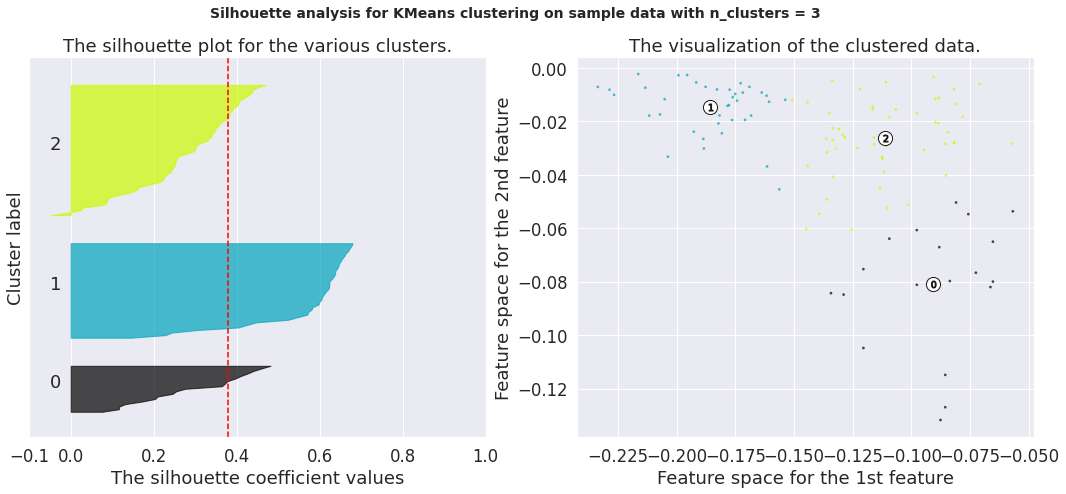

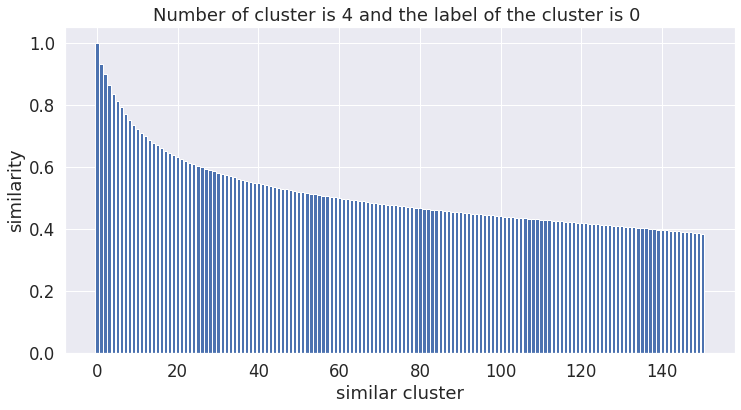

tmp_list shape is  (36, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 1 


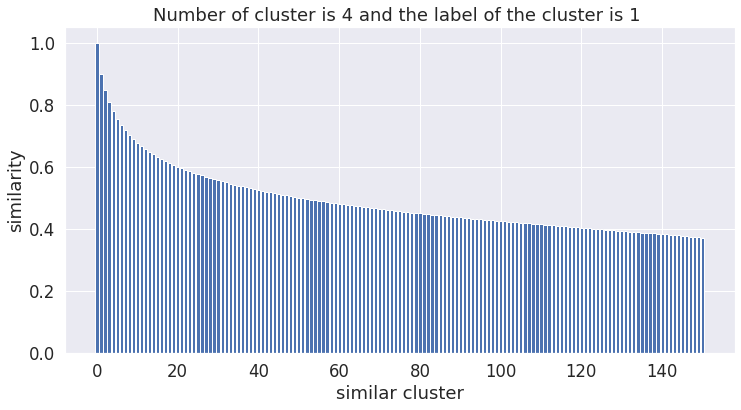

tmp_list shape is  (36, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 2 


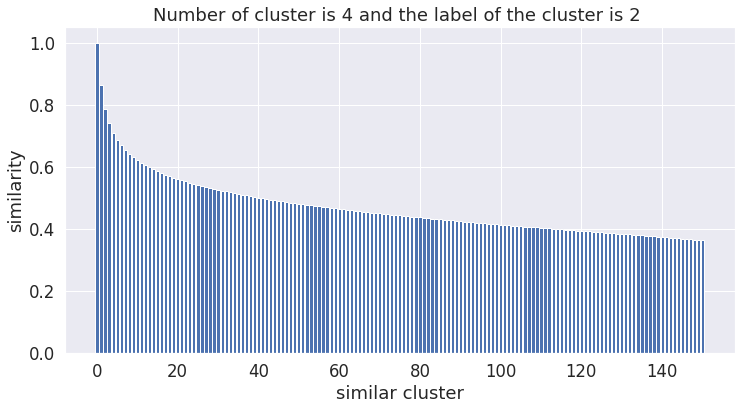

tmp_list shape is  (15, 151)  and the lenght is 151
Number of cluster is 3 and the label of the cluster is 3 


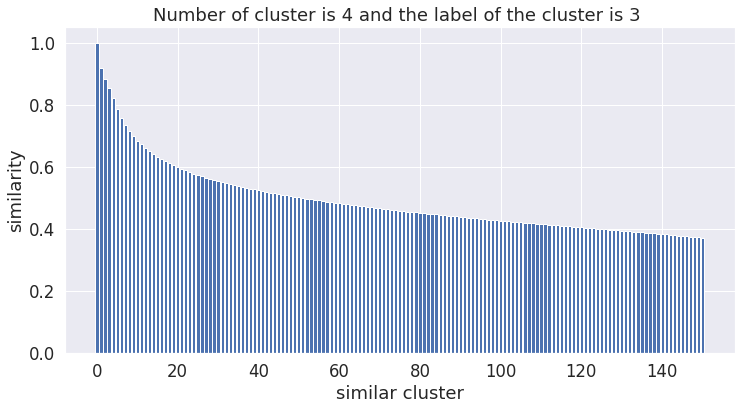

For n_clusters = 4 The average silhouette_score is : 0.34461977191643506
list of cluster words are: 
cluster 0 is ['late', 'saturday', 'night', 'quickly', 'among', 'artists', 'intellectuals', '##imated', 'ranks']
cluster 1 is ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', '##aus', 'dictatorship', 'popular', 'went', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'within', 'cry', 'land', 'used', 'freedoms', 'mr']
cluster 2 is ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'seeking', 'political', 'profile', 'swirl', 'eager', '##ness', 'erase', 'risen', 'reflects', 'wary']
cluster 3 is ['old', 'elect

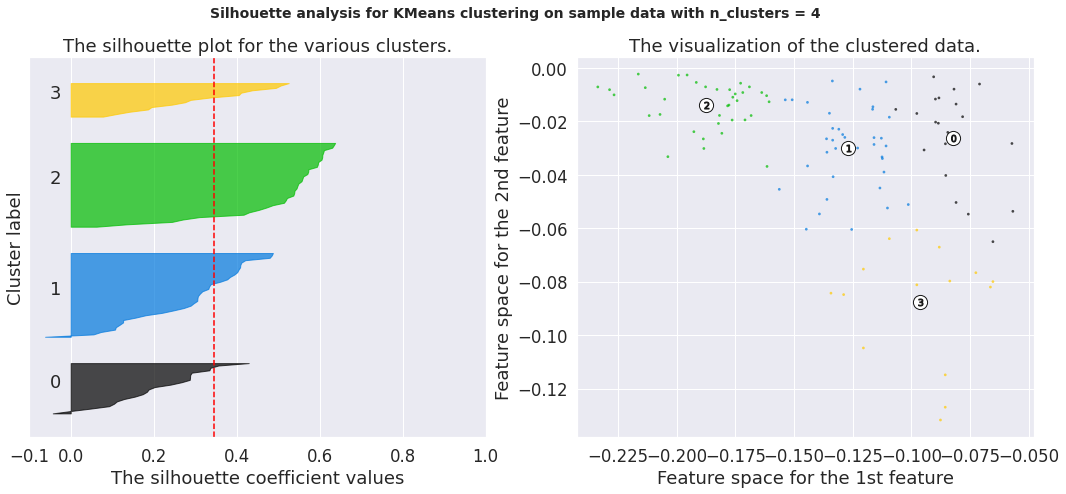

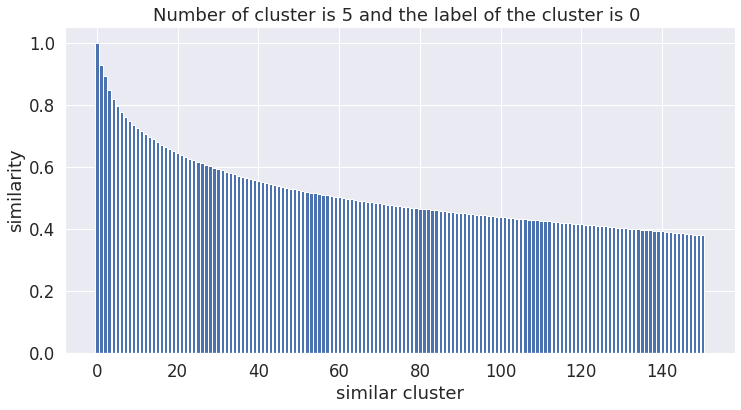

tmp_list shape is  (36, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 1 


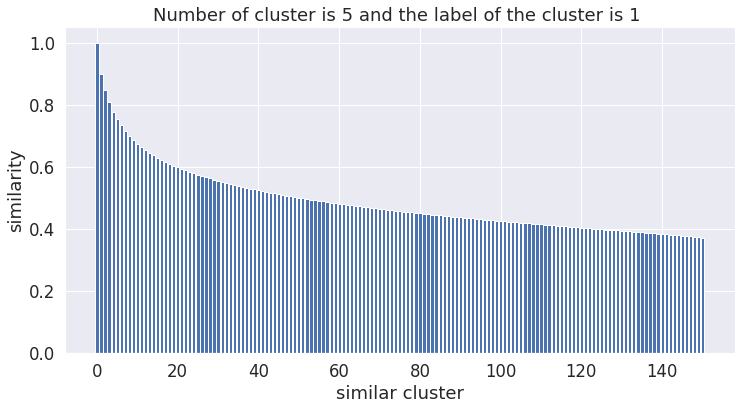

tmp_list shape is  (35, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 2 


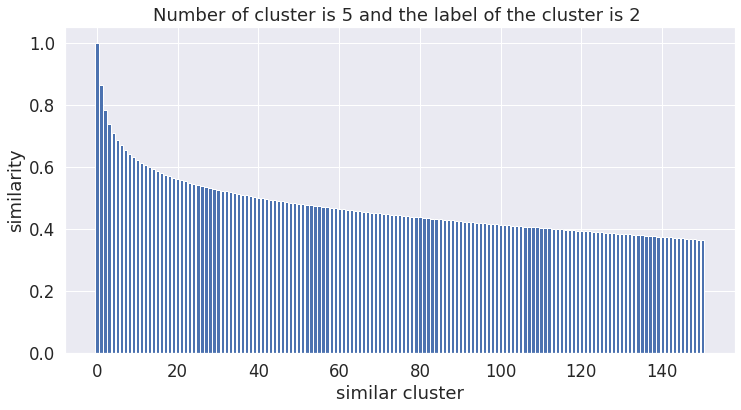

tmp_list shape is  (15, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 3 


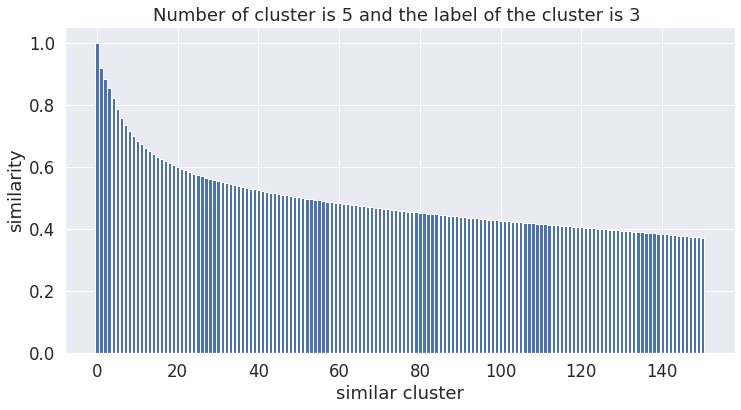

tmp_list shape is  (14, 151)  and the lenght is 151
Number of cluster is 4 and the label of the cluster is 4 


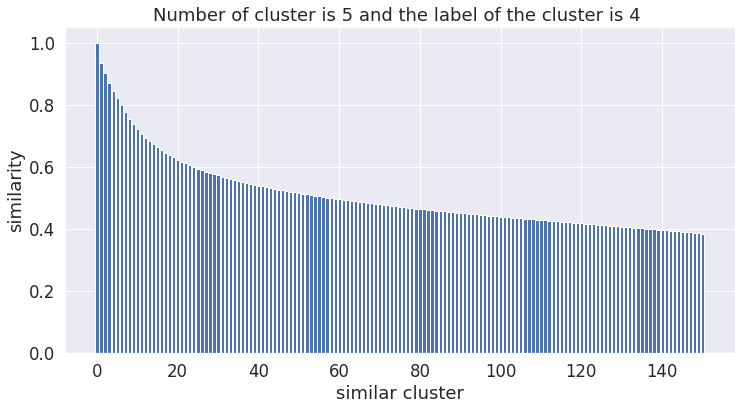

For n_clusters = 5 The average silhouette_score is : 0.34234614954840326
list of cluster words are: 
cluster 0 is ['di', '##sman', '##tle', 'popular', 'uprising', 'swept', 'power', '##ige', '##s', 'mighty', 'students', 'streets', 'long', 'suppressed', 'flourished']
cluster 1 is ['order', 'special', 'congress', 'april', 'television', 'announce', 'rum', 'like', 'since', 'urging', 'dissolution', 'profile']
cluster 2 is ['old', 'elections', 'held', 'severed', '##escu', 'new', 'president', 'nicola', '##e', 'open', 'vest', 'dec', '24', 'years', 'guard']
cluster 3 is ['late', 'saturday', 'night', 'quickly', 'artists', 'intellectuals', '##imated', 'ranks']
cluster 4 is ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', 'dictatorship', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'among', 'within', 'land', 'used', 'freedoms'

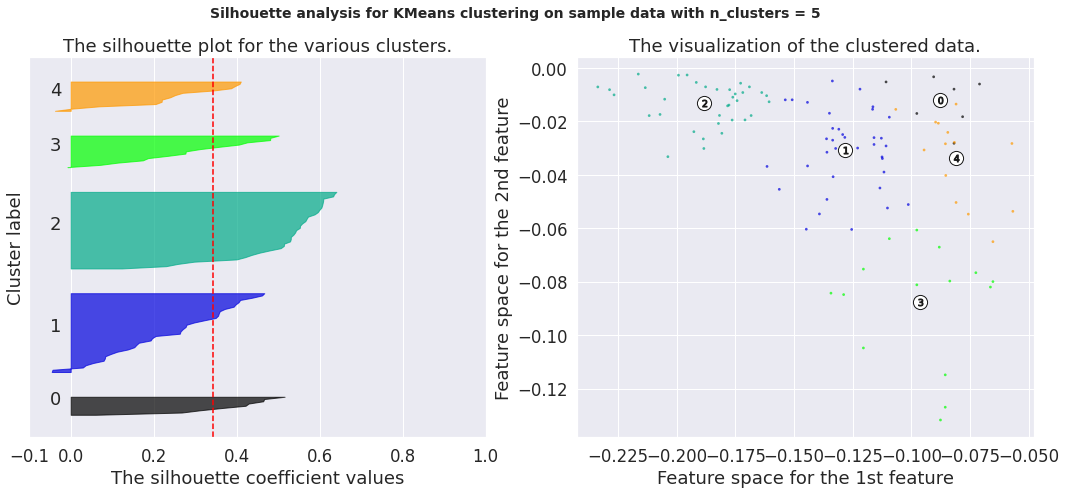

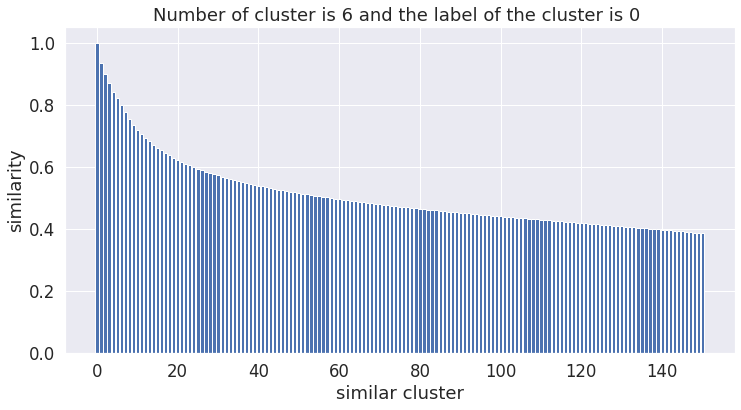

tmp_list shape is  (12, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 1 


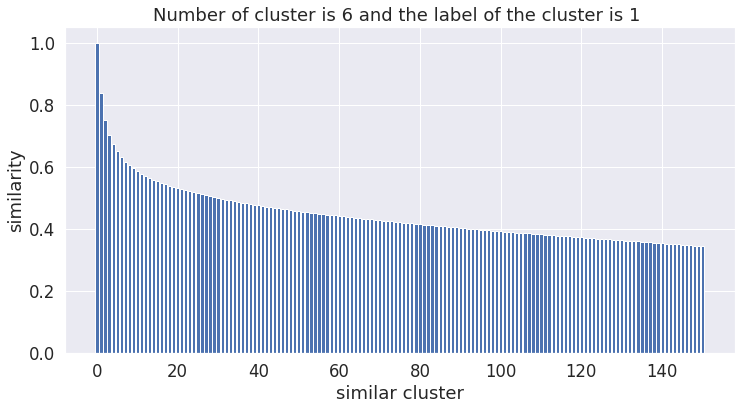

tmp_list shape is  (15, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 2 


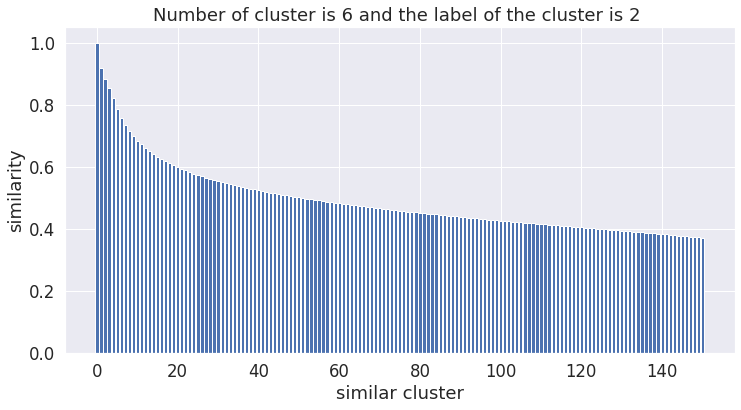

tmp_list shape is  (8, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 3 


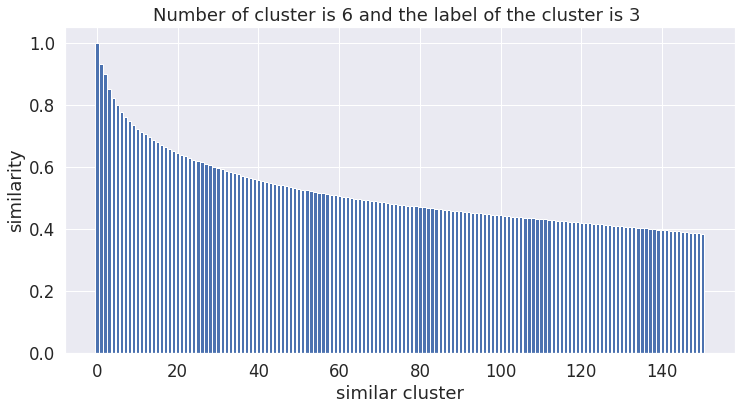

tmp_list shape is  (33, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 4 


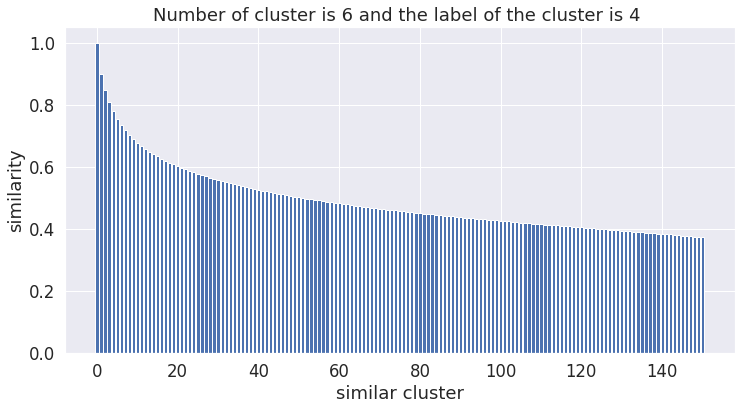

tmp_list shape is  (26, 151)  and the lenght is 151
Number of cluster is 5 and the label of the cluster is 5 


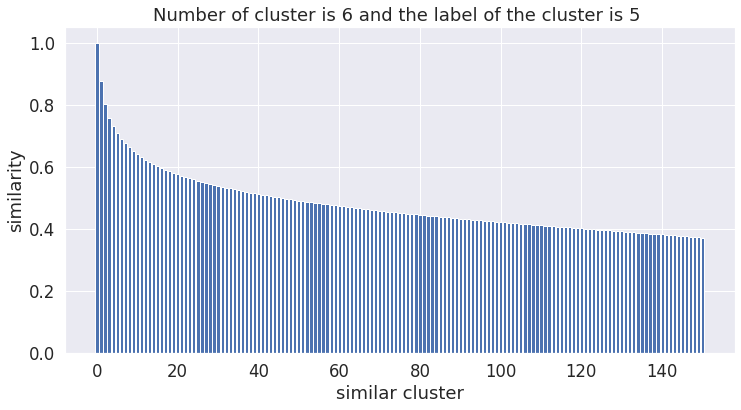

For n_clusters = 6 The average silhouette_score is : 0.28162658310608024


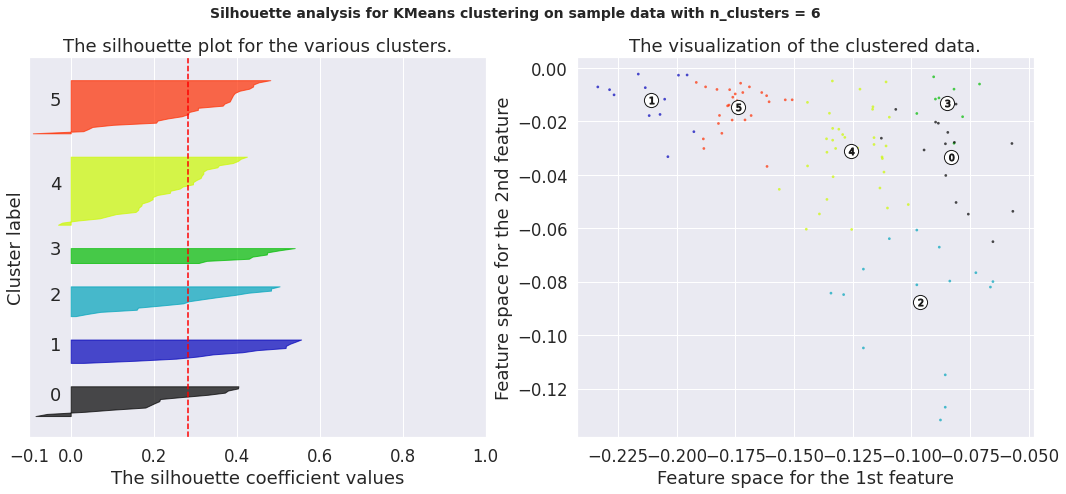

In [56]:
# display clusters and average sillohid
import matplotlib.cm as cm
from numpy import median
from statistics import mean
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6]
total_dict = dict()
total_centers = dict()
silhouette_avg_list = list()
for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_X)
    # print('cluster_labels is {} '.format(cluster_labels))
    token_list = word_list
    tmp_dic = dict()
    for x in range(0, n_clusters):
      tmp_list = list()
      for i, j in zip(token_list, cluster_labels):
        if j == x:
          tmp_list.append(i)
      tmp_dic[x] = tmp_list
    total_dict[n_clusters] = tmp_dic
    print('list of cluster words are: ')
    for prt in tmp_dic:
      print('cluster {} is {}'.format(prt, tmp_dic[prt]))

    for w_list,ind in zip(tmp_dic.values(), tmp_dic.keys()):
      tmp_list = list()

      for w in w_list:
    #     # print(' cluster {} and word is {}, value is {}'.format(ind, w, gradient_word_similarity_dict[w]))
    #     tmp_list.append(gradient_word_similarity_dict[w])
    #   all_distribution.append(tmp_list)
    # # print('shape of all distribution for cluster ', x,' is ', np.shape(all_distribution))
    #   print('shape all_distribution is {}  and shape of all_distribution[0] is {} and shpe of '.format(np.shape(all_distribution), np.shape(all_distribution[0])))
        tmp_list.append(word_neighbor_similarity_dict[w])
      print('tmp_list shape is ', np.shape(tmp_list), ' and the lenght is', len(tmp_list[0]))
      tmp_word_list = list()
      all_distribution = list()
      for f in range(0,len(tmp_list[0])):
        for t in tmp_list:
          tmp_word_list.append(t[f])
        # all_distribution.append(np.average(tmp_word_list))
        # all_distribution.append(median(tmp_word_list))
        all_distribution.append(mean(tmp_word_list))

      print('Number of cluster is {} and the label of the cluster is {} '.format(x, ind))
      plt.figure()
      plt.bar(range(0, len(tmp_list[0])), all_distribution)
      plt.xlabel('similar cluster')
      plt.ylabel('similarity')
      plt.title('Number of cluster is {} and the label of the cluster is {} '.format(x+1, ind))
      plt.show()

      

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(new_X) + (n_clusters + 1) * 10])  


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(new_X[:, 0], new_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    total_centers[n_clusters] = centers
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i_, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i_, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    






plt.show()



***************new sorting*************
number of clustering is 2 and the dic is {0: ['growing', 'communist', 'officials', 'country', 'old', 'say', 'call', 'di', '##sman', '##tle', 'disgrace', 'even', 'elections', 'held', 'late', 'saturday', 'night', 'group', 'quickly', 'severed', 'relationship', 'ce', '##escu', 'dictatorship', 'popular', 'uprising', 'swept', 'power', 'message', 'repeated', 'today', 'controlled', 'new', 'non', 'leaders', 'president', 'nicola', '##e', 'high', 'ranking', 'open', 'revolutionary', 'fe', '##r', '##vor', 'vest', '##ige', '##s', 'mighty', 'communists', 'among', 'students', 'streets', 'long', 'suppressed', 'artists', 'intellectuals', 'within', 'dec', '##imated', 'ranks', 'land', 'used', 'freedoms', '24', 'years', 'guard', 'flourished', 'mr'], 1: ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', 'many', '##aus', 'went', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'lead

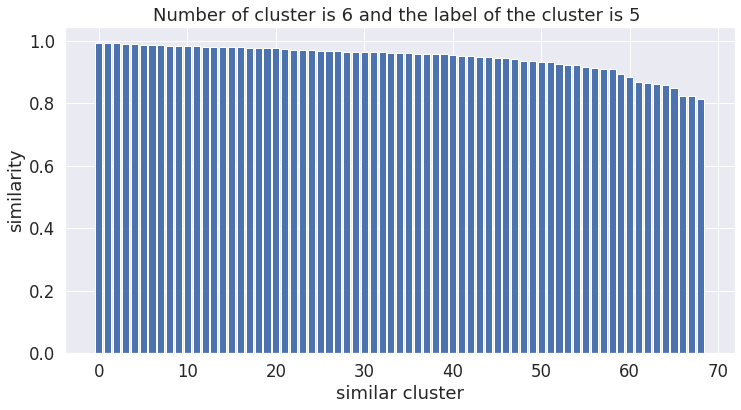

sorted is:  [('demands', 0.9991600594803073), ('##d', 0.999105736576486), ('leading', 0.9985117113828628), ('eager', 0.9984275357475686), ('urging', 0.9984049286709602), ('political', 0.998123622585994), ('announce', 0.9981052780188706), ('overthrow', 0.9980608520513102), ('##ness', 0.9980316956899538), ('risen', 0.9977527963067214), ('newspapers', 0.9977443885558598), ('congress', 0.9975737575154612), ('national', 0.9974014416043752), ('free', 0.9973905466316885), ('dissolve', 0.9973533032730347), ('detained', 0.9973387634161339), ('profile', 0.9973042182286289), ('dissolution', 0.9972095790099454), ('party', 0.9969779236767135), ('special', 0.9969555550601444), ('rum', 0.9968978258039065), ('television', 0.9967984483544722), ('since', 0.9965242457083908), ('erase', 0.9962311437907221), ('wary', 0.9958893414744756), ('top', 0.9956818898307316), ('order', 0.9955882022440339), ('april', 0.995430192035407), ('like', 0.9949345413975414), ('confronted', 0.9945611165070761), ('figures', 0.9

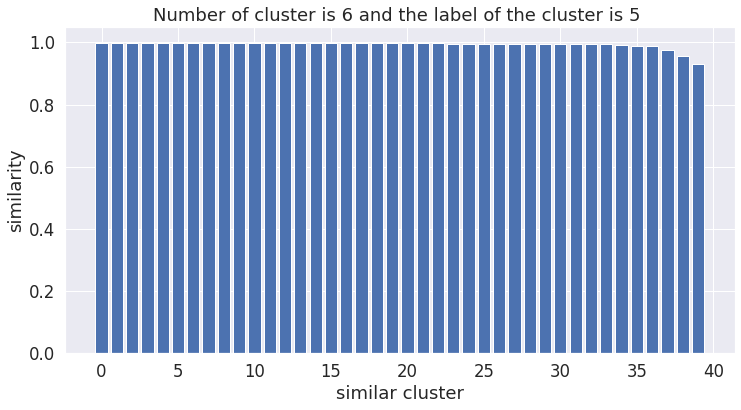

number of clustering is 3 and the dic is {0: ['old', 'di', '##sman', 'elections', 'held', 'severed', '##escu', 'new', 'president', 'nicola', '##e', 'open', 'vest', '##ige', '##s', 'dec', '24', 'years', 'guard'], 1: ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', '##aus', 'went', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'appear', 'seeking', 'political', 'profile', 'swirl', 'eager', '##ness', 'erase', 'risen', 'reflects', 'wary'], 2: ['growing', 'communist', 'officials', 'country', 'say', 'call', '##tle', 'disgrace', 'even', 'late', 'saturday', 'night', 'group', 'many', 'quickly', 'relationship', 'ce', 'dictatorship', 'popular', 'uprising', 'swept', 'power', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'mighty', 'communists', 'among', 

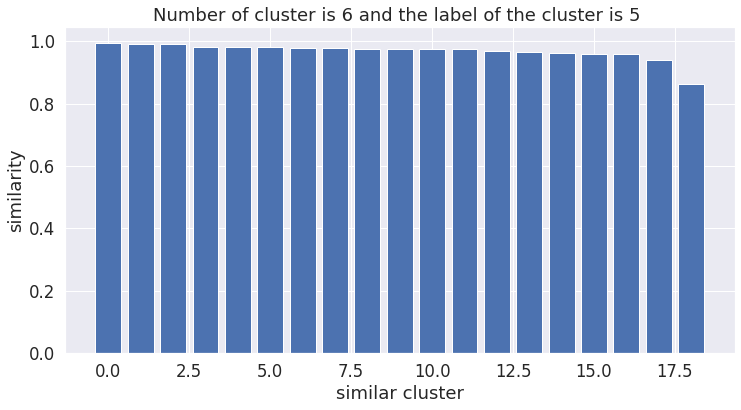

sorted is:  [('##d', 0.9992757135317056), ('demands', 0.9990860610350641), ('eager', 0.9987154932942947), ('urging', 0.9986360589415645), ('leading', 0.9985799447602008), ('announce', 0.9982766475276337), ('##ness', 0.998198193153663), ('overthrow', 0.9980377175919541), ('newspapers', 0.9978541037007732), ('political', 0.9978211564414619), ('congress', 0.9978112361910043), ('risen', 0.9976049606659638), ('dissolution', 0.9976011098068741), ('free', 0.9974635579410935), ('national', 0.9973067827834232), ('party', 0.9972855123287638), ('detained', 0.9972408274338387), ('profile', 0.9972364544288721), ('rum', 0.9972273411240238), ('television', 0.9970956356823636), ('dissolve', 0.997032202549488), ('special', 0.9970107923422136), ('since', 0.9967212345758634), ('order', 0.9961404955915878), ('april', 0.9960432366961646), ('wary', 0.9960136698712538), ('top', 0.9959109390640722), ('erase', 0.9957636628154969), ('like', 0.9952281992137468), ('figures', 0.9947794640115108), ('##anian', 0.994

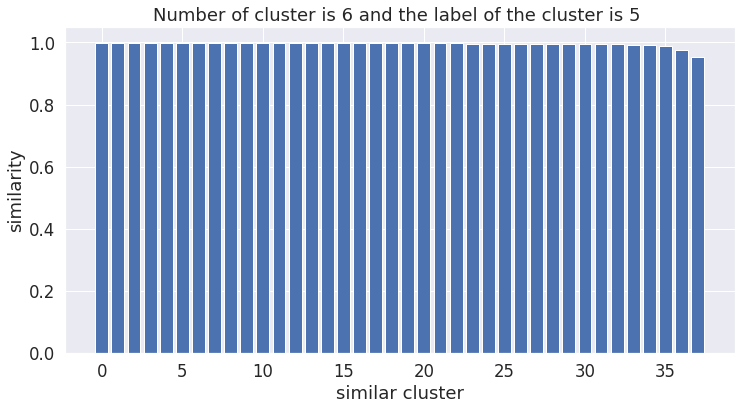

sorted is:  [('disgrace', 0.9940123844636618), ('leaders', 0.9936764648317923), ('group', 0.9928954127898737), ('today', 0.9927484088423111), ('fe', 0.9917433234824287), ('communists', 0.9916758460083929), ('##vor', 0.9911122361002669), ('ce', 0.9909974419696106), ('controlled', 0.9903889952576683), ('message', 0.9899963921039776), ('relationship', 0.9899939230378959), ('revolutionary', 0.9891835984112124), ('quickly', 0.9881677924931223), ('##r', 0.987455076266215), ('freedoms', 0.9835303318352472), ('officials', 0.981748235868434), ('popular', 0.9812573830761715), ('even', 0.9804780497429414), ('ranking', 0.9789612893597645), ('within', 0.9787909908890293), ('mighty', 0.97874076370164), ('communist', 0.977980893657834), ('##tle', 0.9778137588510186), ('high', 0.9773326161188576), ('dictatorship', 0.9770331081918864), ('land', 0.9767905439426694), ('country', 0.9741812619263337), ('many', 0.9739490409892534), ('call', 0.9728863693031168), ('non', 0.9707672708846253), ('used', 0.970052

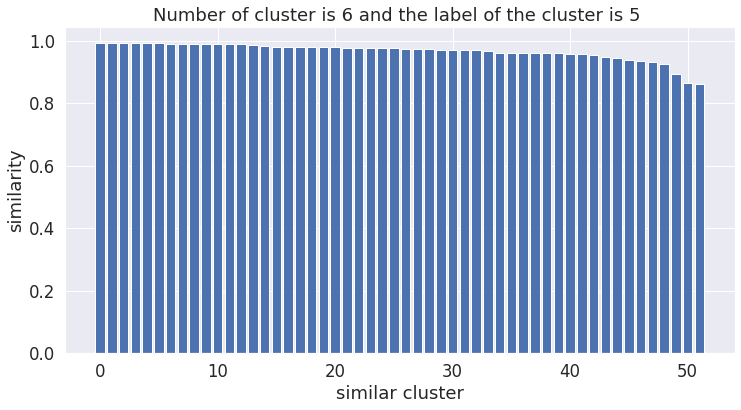

number of clustering is 4 and the dic is {0: ['di', '##sman', '##tle', 'late', 'saturday', 'night', 'quickly', 'uprising', 'swept', 'power', '##ige', '##s', 'mighty', 'students', 'streets', 'long', 'suppressed', 'artists', 'intellectuals', '##imated', 'ranks', 'flourished'], 1: ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', 'dictatorship', 'popular', 'went', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'among', 'within', 'cry', 'land', 'used', 'freedoms', 'mr'], 2: ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', '##aus', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'seeking', 'political', 'profile', 'swirl', 'eager', '##ness', 'erase', 'ri

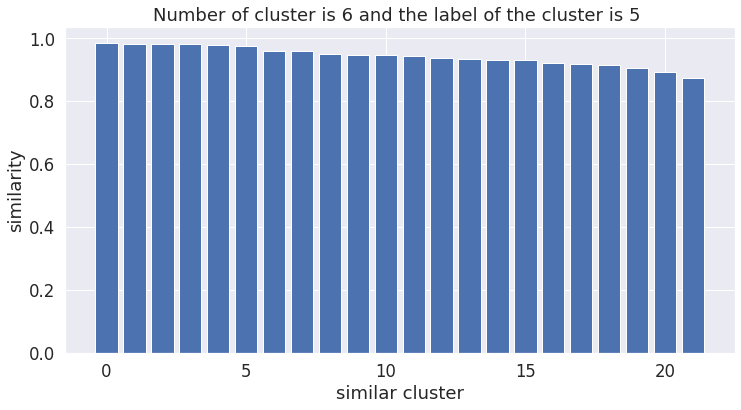

sorted is:  [('ce', 0.9963758835641043), ('leaders', 0.996195465039543), ('disgrace', 0.9958769042167684), ('controlled', 0.9957361048515261), ('appear', 0.9944069411740856), ('today', 0.9939107862706336), ('fe', 0.9908242273573388), ('group', 0.9907537466881066), ('##vor', 0.9898743584840904), ('communists', 0.9898644636099273), ('##r', 0.9885037310011213), ('officials', 0.9880589174950828), ('communist', 0.9878228273738754), ('message', 0.9872906136866385), ('dictatorship', 0.9859648951919229), ('high', 0.9849955996571654), ('even', 0.9842669639861158), ('freedoms', 0.9841555200127978), ('relationship', 0.9838924257433531), ('ranking', 0.983777636649717), ('revolutionary', 0.9834948385670295), ('within', 0.9826965709181128), ('land', 0.9820232640359408), ('call', 0.9806222063283517), ('non', 0.9803289500587001), ('many', 0.9799857148432269), ('went', 0.9787926334053346), ('growing', 0.9770002415299204), ('mr', 0.9742267476126116), ('used', 0.9720351458153452), ('popular', 0.971472004

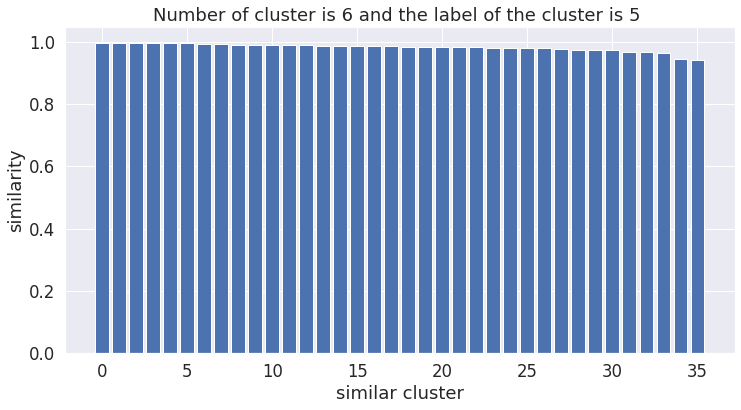

sorted is:  [('##d', 0.9993700331961914), ('demands', 0.9991473298565178), ('urging', 0.9988238807482984), ('eager', 0.9986616951580587), ('leading', 0.9983605724839371), ('newspapers', 0.9981417699935868), ('announce', 0.9981280513209554), ('overthrow', 0.9980920604359711), ('##ness', 0.9979667839792383), ('political', 0.9979406952067476), ('congress', 0.9977994763158867), ('rum', 0.9975359395341981), ('television', 0.9974739797981921), ('risen', 0.9974533424233878), ('dissolution', 0.9974351414367205), ('national', 0.9974199100541904), ('profile', 0.9973828545781042), ('special', 0.9973748735456592), ('party', 0.997350825139091), ('detained', 0.9972170976811905), ('free', 0.9971924857002334), ('dissolve', 0.9971148571521634), ('since', 0.9970622199065816), ('order', 0.9964313384084478), ('april', 0.996406233941198), ('wary', 0.9960207151893278), ('top', 0.9959055418879015), ('erase', 0.9954900215901098), ('figures', 0.994837211487321), ('like', 0.9948211640465312), ('confronted', 0.9

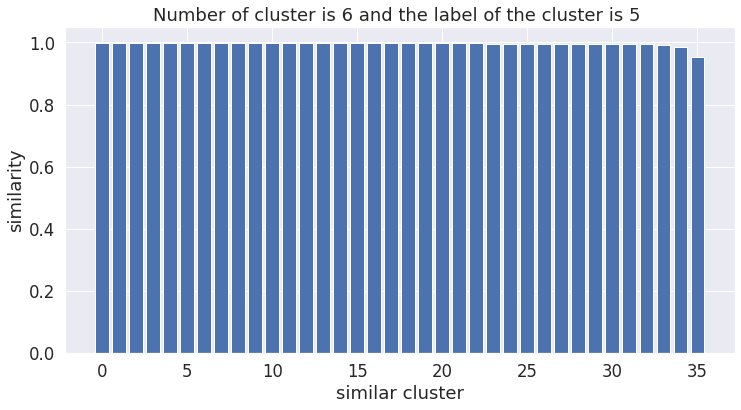

sorted is:  [('years', 0.9965108416335772), ('held', 0.9953849289547032), ('president', 0.9898739011617088), ('open', 0.9837212772525836), ('new', 0.9835956951148378), ('elections', 0.9812276248036432), ('24', 0.9800209091822722), ('old', 0.9788569641793815), ('##escu', 0.9787999383362244), ('guard', 0.9761039598677362), ('severed', 0.9758413941336419), ('##e', 0.9689912468910439), ('nicola', 0.9657093003852728), ('dec', 0.9633623816406913), ('vest', 0.9464955544209384)]
cluster 3  ['years', 'held', 'president', 'open', 'new', 'elections', '24', 'old', '##escu', 'guard', 'severed', '##e', 'nicola', 'dec', 'vest']
Number of cluster is 5 and the label of the cluster is 5 


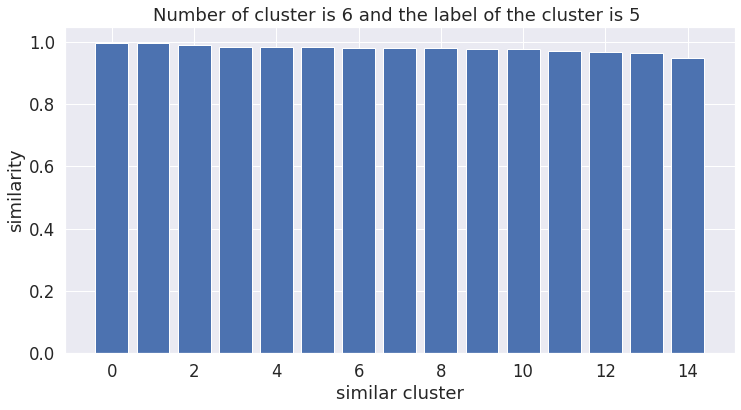

number of clustering is 5 and the dic is {0: ['late', 'saturday', 'night', 'quickly', 'among', 'artists', 'intellectuals', '##imated', 'ranks'], 1: ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', '##aus', 'dictatorship', 'popular', 'went', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'within', 'cry', 'land', 'used', 'freedoms', 'mr'], 2: ['confronted', 'demands', 'party', 'dissolve', 'top', 'order', 'special', 'congress', '##d', 'free', 'april', 'national', 'television', 'announce', 'rum', '##anian', 'newspapers', 'like', 'leading', 'figures', 'detained', 'since', 'overthrow', 'urging', 'dissolution', 'seeking', 'political', 'profile', 'swirl', 'eager', '##ness', 'erase', 'risen', 'reflects', 'wary'], 3: ['old', 'elections', 'held', 'severed', '##escu', 'new', 'president', 'nicola', '##e', 'open', 'vest', 'dec', 

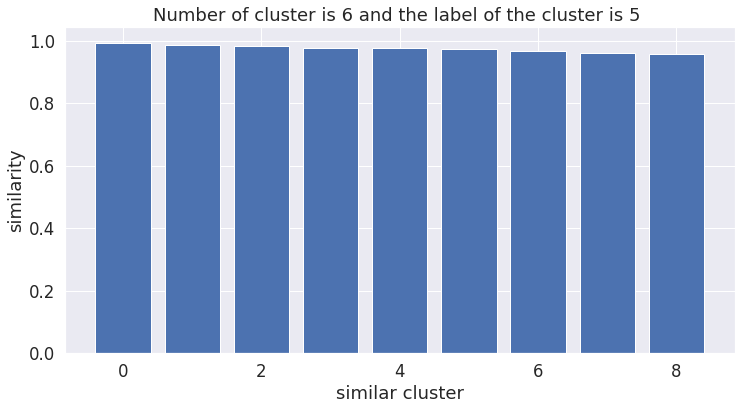

sorted is:  [('ce', 0.9968509333738564), ('disgrace', 0.9965852276400642), ('leaders', 0.996416166618101), ('controlled', 0.9962468765269978), ('##aus', 0.996110732391134), ('appear', 0.994901042244506), ('today', 0.9942405380055895), ('fe', 0.9908044487785538), ('group', 0.9907063386045364), ('##vor', 0.9897947711975036), ('communists', 0.989638359848996), ('communist', 0.9886803815798252), ('##r', 0.9886313815768114), ('officials', 0.9873848912181171), ('message', 0.9873773298904251), ('dictatorship', 0.9868104288423126), ('high', 0.9844054563796545), ('freedoms', 0.9838524055882724), ('revolutionary', 0.9838502198331007), ('relationship', 0.9837192489240569), ('even', 0.9828895566384614), ('ranking', 0.9827406336434366), ('land', 0.9818516093713615), ('within', 0.9817195532408106), ('non', 0.9815829139800529), ('call', 0.9814087108306389), ('many', 0.9792728530036096), ('went', 0.9783514699144418), ('growing', 0.9767016760405461), ('mr', 0.9735174666751334), ('used', 0.9728026762718

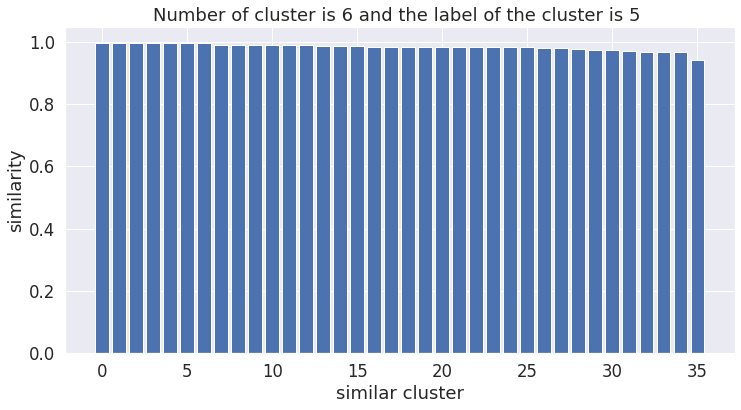

sorted is:  [('##d', 0.9993857982016137), ('demands', 0.9991039056897573), ('urging', 0.9989425394297932), ('eager', 0.9986186169399679), ('newspapers', 0.9982967047373182), ('leading', 0.9982510375053856), ('overthrow', 0.9981591915931576), ('announce', 0.9980850004183428), ('political', 0.99798558653133), ('##ness', 0.9978088621299767), ('congress', 0.9977867860490576), ('rum', 0.9977361965468765), ('television', 0.997734598188214), ('special', 0.9976024368098177), ('national', 0.9975478145459019), ('party', 0.9974863317538537), ('profile', 0.9974439461573573), ('risen', 0.9973053738650947), ('since', 0.9972999419518659), ('dissolution', 0.9972937142884625), ('detained', 0.9972272250753711), ('dissolve', 0.9971428102167342), ('free', 0.9969300374263755), ('april', 0.996631420850248), ('order', 0.9966194324368115), ('wary', 0.9961015698806316), ('top', 0.9959016727903263), ('erase', 0.9952482054756886), ('figures', 0.9949278542694998), ('confronted', 0.9947167858820228), ('like', 0.99

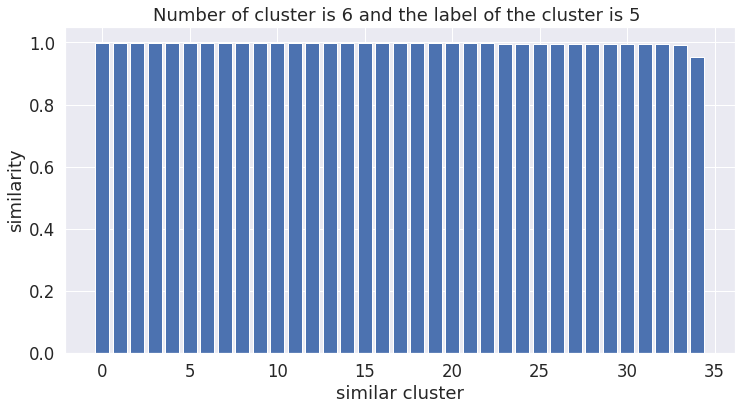

sorted is:  [('years', 0.9965108416335772), ('held', 0.9953849289547032), ('president', 0.9898739011617088), ('open', 0.9837212772525836), ('new', 0.9835956951148378), ('elections', 0.9812276248036432), ('24', 0.9800209091822722), ('old', 0.9788569641793815), ('##escu', 0.9787999383362244), ('guard', 0.9761039598677362), ('severed', 0.9758413941336419), ('##e', 0.9689912468910439), ('nicola', 0.9657093003852728), ('dec', 0.9633623816406913), ('vest', 0.9464955544209384)]
cluster 3  ['years', 'held', 'president', 'open', 'new', 'elections', '24', 'old', '##escu', 'guard', 'severed', '##e', 'nicola', 'dec', 'vest']
Number of cluster is 5 and the label of the cluster is 5 


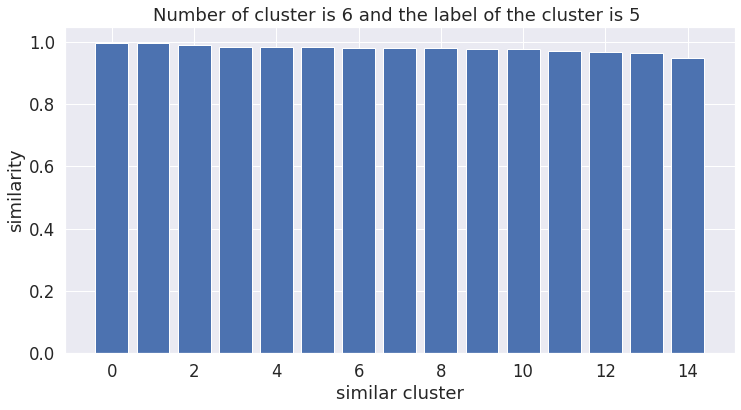

sorted is:  [('students', 0.9893348987416624), ('flourished', 0.9886883180836513), ('streets', 0.9815341919345468), ('power', 0.9814719225839571), ('suppressed', 0.9795921137780351), ('##tle', 0.9674254691633661), ('swept', 0.9665755186377696), ('uprising', 0.9661431658589325), ('di', 0.9631344482497188), ('mighty', 0.962449868109619), ('##sman', 0.9560900145773833), ('long', 0.9390718217305043), ('##ige', 0.937671470869694), ('##s', 0.9345944297693073)]
cluster 4  ['students', 'flourished', 'streets', 'power', 'suppressed', '##tle', 'swept', 'uprising', 'di', 'mighty', '##sman', 'long', '##ige', '##s']
Number of cluster is 5 and the label of the cluster is 5 


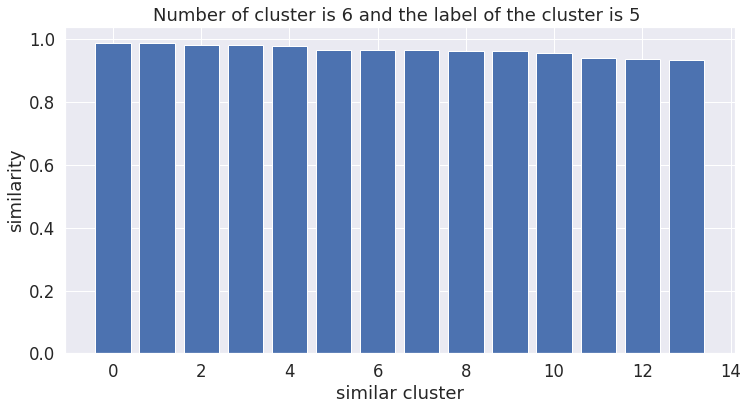

number of clustering is 6 and the dic is {0: ['di', '##sman', '##tle', 'popular', 'uprising', 'swept', 'power', '##ige', '##s', 'mighty', 'students', 'streets', 'long', 'suppressed', 'flourished'], 1: ['order', 'special', 'congress', 'april', 'television', 'announce', 'rum', 'like', 'since', 'urging', 'dissolution', 'profile'], 2: ['old', 'elections', 'held', 'severed', '##escu', 'new', 'president', 'nicola', '##e', 'open', 'vest', 'dec', '24', 'years', 'guard'], 3: ['late', 'saturday', 'night', 'quickly', 'artists', 'intellectuals', '##imated', 'ranks'], 4: ['growing', 'communist', 'officials', 'country', 'say', 'call', 'disgrace', 'even', 'group', 'many', 'relationship', 'ce', 'dictatorship', 'message', 'repeated', 'today', 'controlled', 'non', 'leaders', 'appear', 'high', 'ranking', 'revolutionary', 'fe', '##r', '##vor', 'communists', 'among', 'within', 'land', 'used', 'freedoms', 'mr'], 5: ['confronted', 'demands', 'party', 'dissolve', 'top', '##d', 'free', '##aus', 'went', 'nation

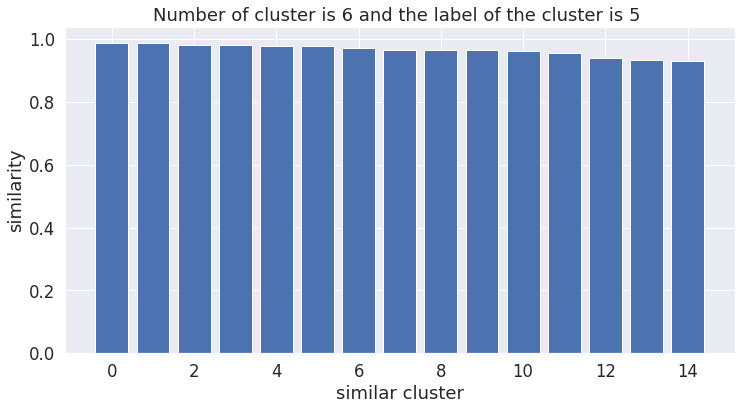

sorted is:  [('urging', 0.9994170541551225), ('television', 0.9988762951985534), ('rum', 0.998563488818714), ('april', 0.998526343453467), ('order', 0.9983960402443053), ('since', 0.998080436075287), ('special', 0.9978923914447315), ('congress', 0.9978635175698486), ('announce', 0.9976143217920305), ('dissolution', 0.9973118027090981), ('profile', 0.9968196821846973), ('like', 0.9936903906870652)]
cluster 1  ['urging', 'television', 'rum', 'april', 'order', 'since', 'special', 'congress', 'announce', 'dissolution', 'profile', 'like']
Number of cluster is 5 and the label of the cluster is 5 


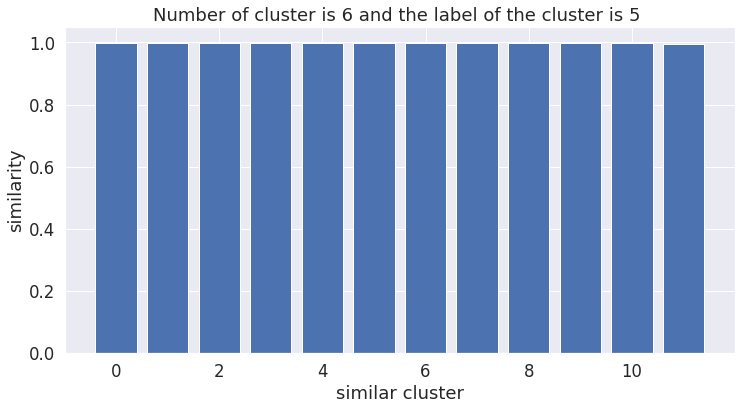

sorted is:  [('years', 0.9965108416335772), ('held', 0.9953849289547032), ('president', 0.9898739011617088), ('open', 0.9837212772525836), ('new', 0.9835956951148378), ('elections', 0.9812276248036432), ('24', 0.9800209091822722), ('old', 0.9788569641793815), ('##escu', 0.9787999383362244), ('guard', 0.9761039598677362), ('severed', 0.9758413941336419), ('##e', 0.9689912468910439), ('nicola', 0.9657093003852728), ('dec', 0.9633623816406913), ('vest', 0.9464955544209384)]
cluster 2  ['years', 'held', 'president', 'open', 'new', 'elections', '24', 'old', '##escu', 'guard', 'severed', '##e', 'nicola', 'dec', 'vest']
Number of cluster is 5 and the label of the cluster is 5 


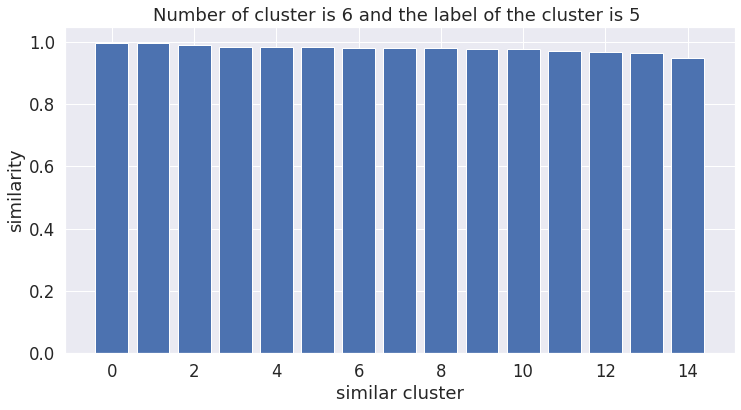

sorted is:  [('##imated', 0.9950210921698412), ('quickly', 0.9840537892671998), ('artists', 0.9832180139348605), ('night', 0.9768858833608072), ('ranks', 0.9761228437244043), ('late', 0.9741050841015824), ('saturday', 0.9734287758073102), ('intellectuals', 0.9583699379962217)]
cluster 3  ['##imated', 'quickly', 'artists', 'night', 'ranks', 'late', 'saturday', 'intellectuals']
Number of cluster is 5 and the label of the cluster is 5 


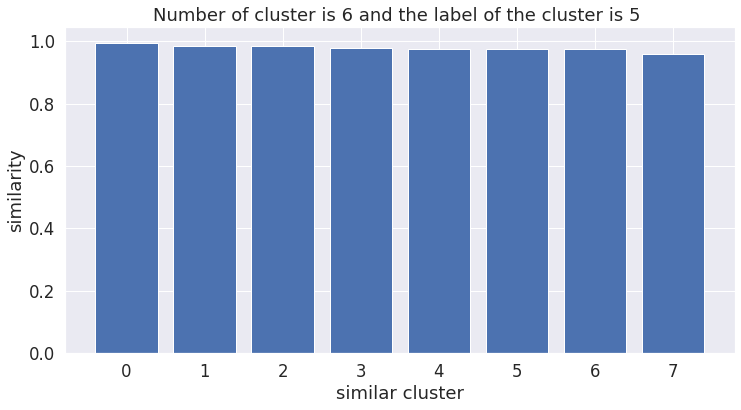

sorted is:  [('ce', 0.9966639070841812), ('appear', 0.9957222408155846), ('controlled', 0.9955319997861568), ('disgrace', 0.9953914115259582), ('leaders', 0.9951815880559005), ('today', 0.9943881885076303), ('communist', 0.9900762143035605), ('fe', 0.9900526431570463), ('group', 0.989661388580007), ('##r', 0.9891018983783939), ('officials', 0.9888178151849094), ('dictatorship', 0.9884243521465942), ('##vor', 0.9880201800229248), ('communists', 0.9872230346906921), ('high', 0.9862359535497621), ('freedoms', 0.985605271335618), ('message', 0.9853770611173704), ('within', 0.9840969061003705), ('ranking', 0.9840579065989897), ('even', 0.98394459463207), ('call', 0.9835343369934164), ('non', 0.9830540453468969), ('land', 0.9825157136638234), ('relationship', 0.9808048934510643), ('revolutionary', 0.9808019758839521), ('many', 0.9800848271781005), ('growing', 0.9757663627836521), ('mr', 0.9750220857866795), ('used', 0.9744784694342098), ('repeated', 0.9683732429876134), ('say', 0.96821584758

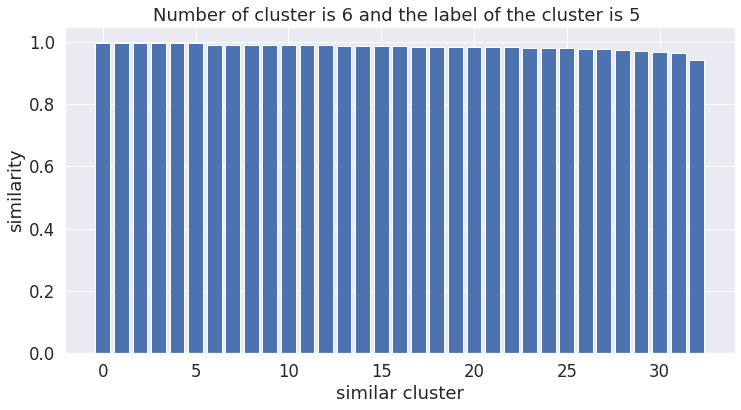

sorted is:  [('demands', 0.9990915862961753), ('##d', 0.9984654917091981), ('political', 0.9984169634183838), ('leading', 0.9981129500423975), ('risen', 0.9979737310338305), ('dissolve', 0.9976827819580351), ('overthrow', 0.9976062224047658), ('eager', 0.9975830682093515), ('##ness', 0.9975112243186265), ('detained', 0.9974741282822989), ('erase', 0.9972257095216878), ('national', 0.9971616196859224), ('free', 0.9970196226007069), ('newspapers', 0.9968802296474344), ('party', 0.9958285161932234), ('wary', 0.9951400791373686), ('top', 0.9949314409047066), ('reflects', 0.9949151740562812), ('confronted', 0.9944905085159851), ('seeking', 0.9934390984031548), ('##anian', 0.993095711376823), ('figures', 0.9928690354220729), ('went', 0.9902727094449593), ('##aus', 0.9887442961346457), ('swirl', 0.960734061246452), ('cry', 0.9368877390821364)]
cluster 5  ['demands', '##d', 'political', 'leading', 'risen', 'dissolve', 'overthrow', 'eager', '##ness', 'detained', 'erase', 'national', 'free', 'ne

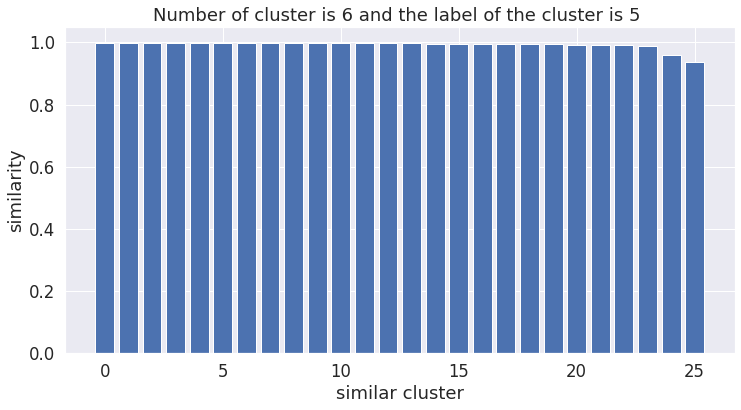

In [57]:
print('***************new sorting*************')
# centers is the centroid for each cluster. size is (#cluster, #dimension_features)
# gradient_word_similarity_dict is a dictionary that has all word as the key and their embedding as value

for h in [2,3,4,5,6]:
  print('number of clustering is {} and the dic is {}'.format(h,total_dict[h]))
  for clus in total_dict[h]:
    temp_dict = dict()
    for w_ in total_dict[h][clus]:
      # print(clus, ' is ', w_)
      # print(cosine_similarity([gradient_word_similarity_dict[w_]],[centers[0]]))
      temp_dict[w_] = cosine_similarity([gradient_word_similarity_dict[w_][0:Max_Feature_Size]],[total_centers[h][clus][0:Max_Feature_Size]])[0][0]
    # print(temp_dict)
    temp = sorted(temp_dict.items(), key=lambda kv: kv[1], reverse=True)
    final_list = list()
    value_sim= list()
    for r in temp:
      final_list.append(r[0])
      value_sim.append(r[1])
    print('sorted is: ', temp)
    print('cluster {} '.format(clus), final_list)


    print('Number of cluster is {} and the label of the cluster is {} '.format(x, ind))
    plt.figure()
    plt.bar(range(0, len(value_sim)), value_sim)
    plt.xlabel('similar cluster')
    plt.ylabel('similarity')
    plt.title('Number of cluster is {} and the label of the cluster is {} '.format(x+1, ind))
    plt.show()



Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.71101128 0.58899973 0.54616183 0.51943317 0.51797747] the value is  2.8835834793054786


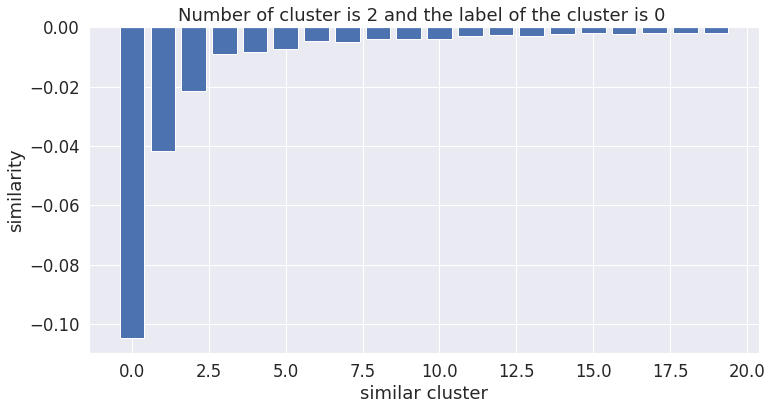

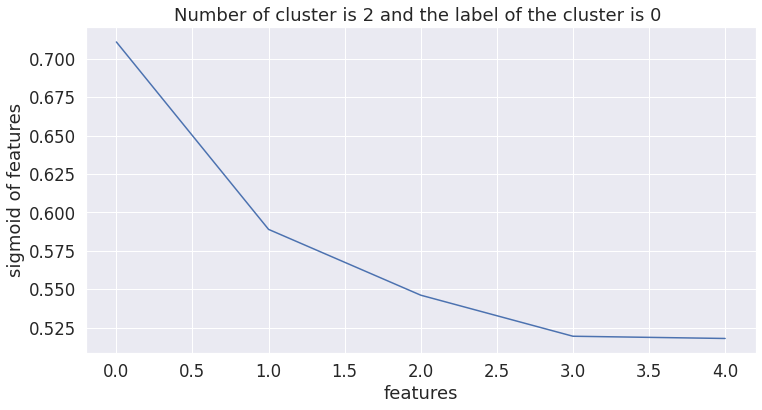

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72932126 0.51972222 0.51764888 0.51020325 0.50756507] the value is  2.7844606739015116


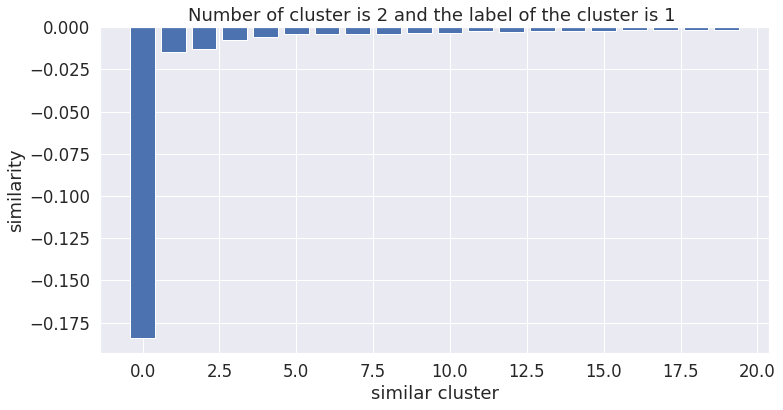

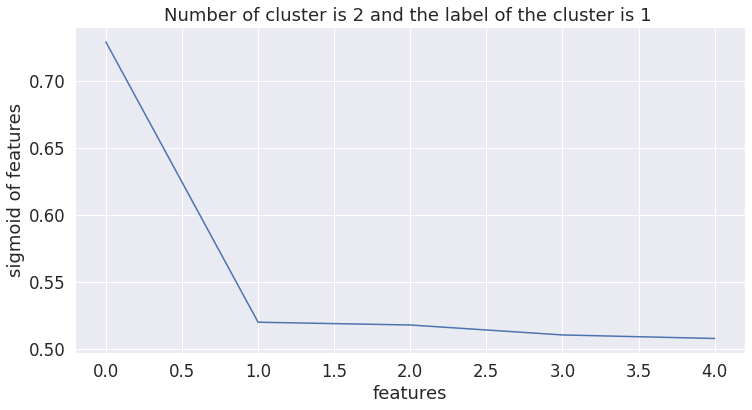

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.67477641 0.65749158 0.53985769 0.51640403 0.51342894] the value is  2.9019586531023025


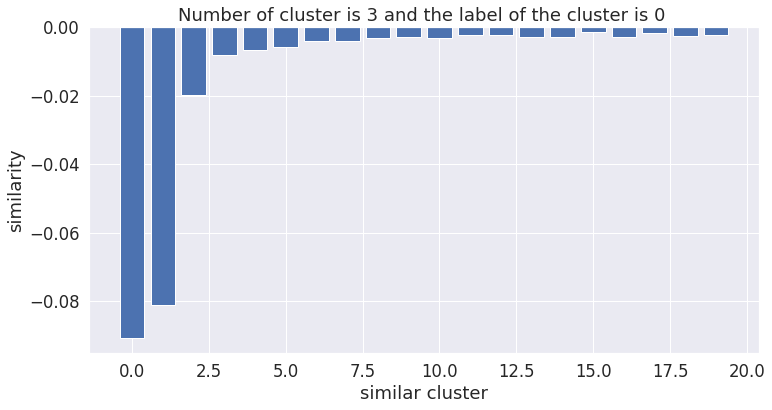

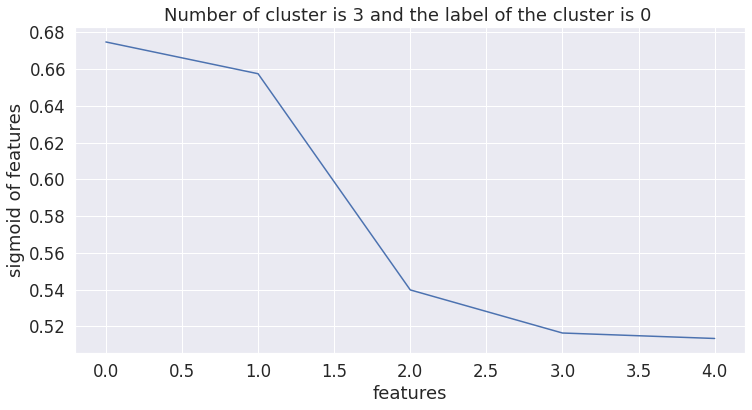

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72945918 0.51968632 0.51568775 0.50979913 0.50708009] the value is  2.7817124680311727


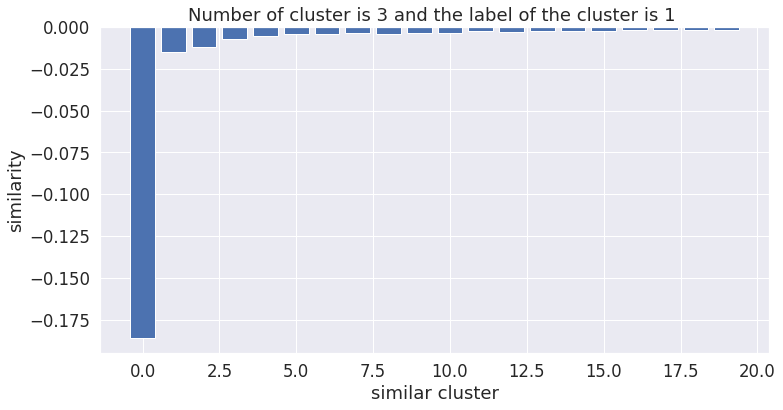

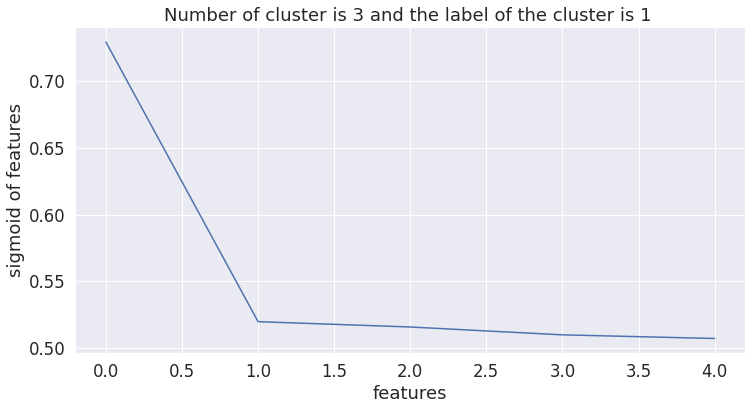

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.71929984 0.55550182 0.54798856 0.51999739 0.51920426] the value is  2.8619918638016224


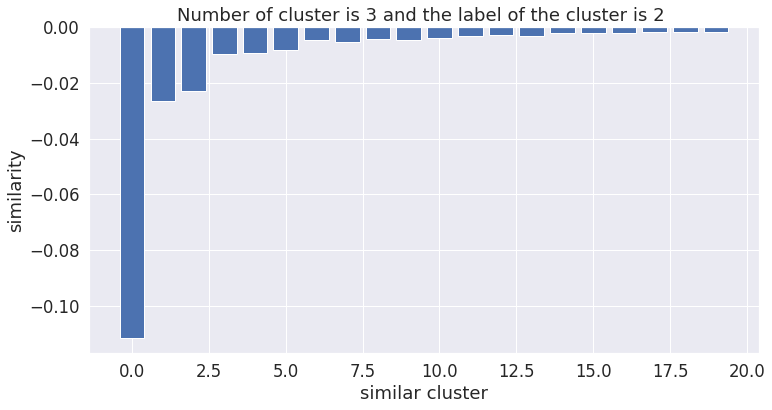

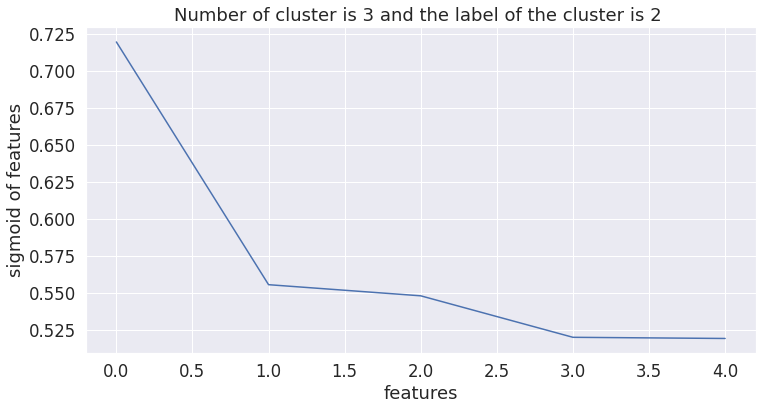

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.70444309 0.56885175 0.58688666 0.52344957 0.52757835] the value is  2.9112094078944892


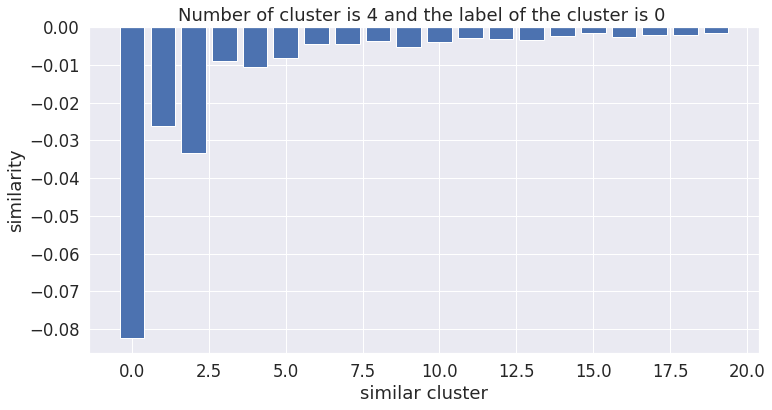

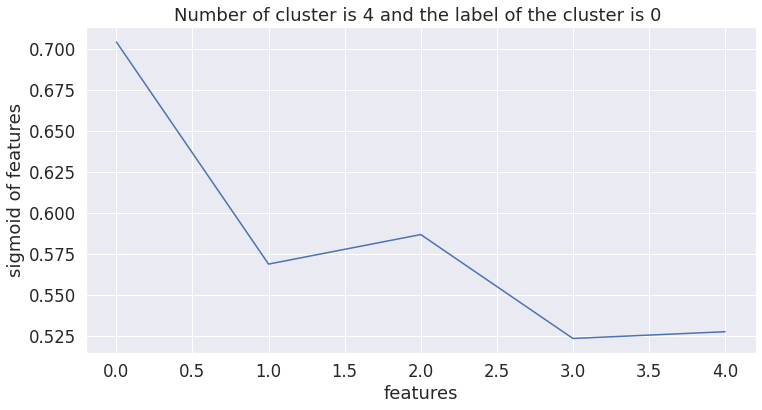

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72200551 0.55592672 0.53380141 0.51808789 0.51447091] the value is  2.844292442225834


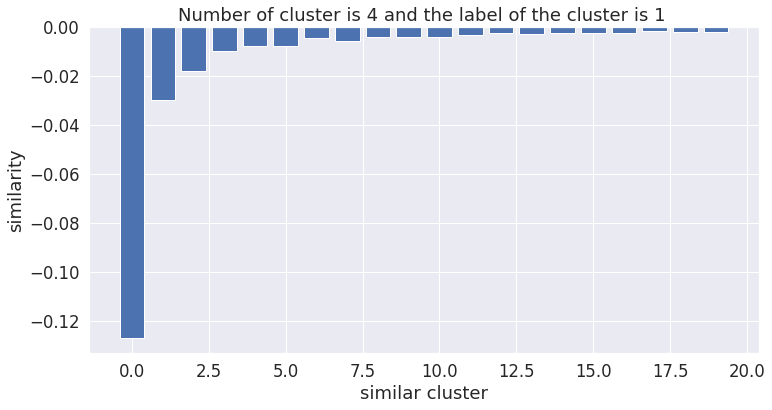

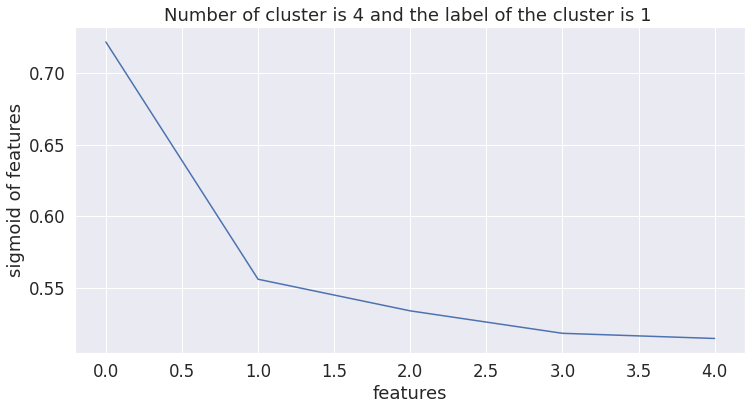

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72957164 0.51849307 0.51563716 0.50968062 0.50658788] the value is  2.7799703700738894


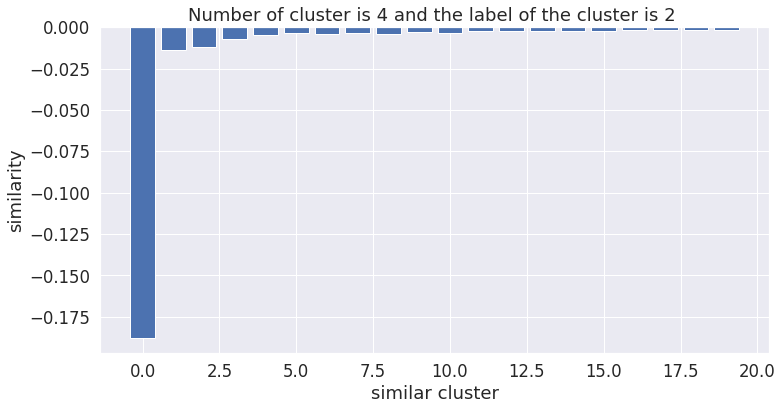

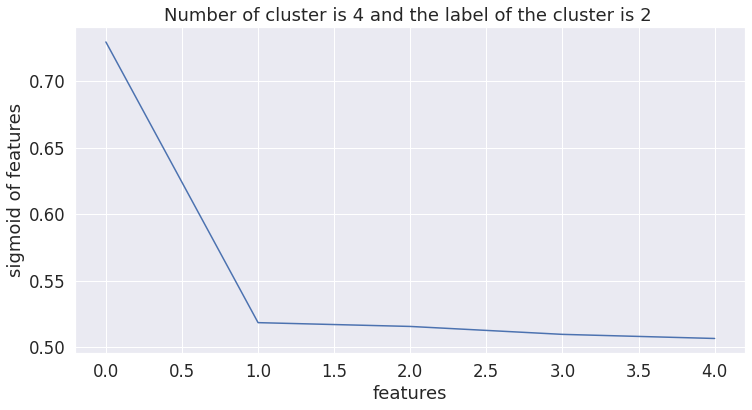

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.6747053  0.66026609 0.52561599 0.51526403 0.51449431] the value is  2.8903457105080563


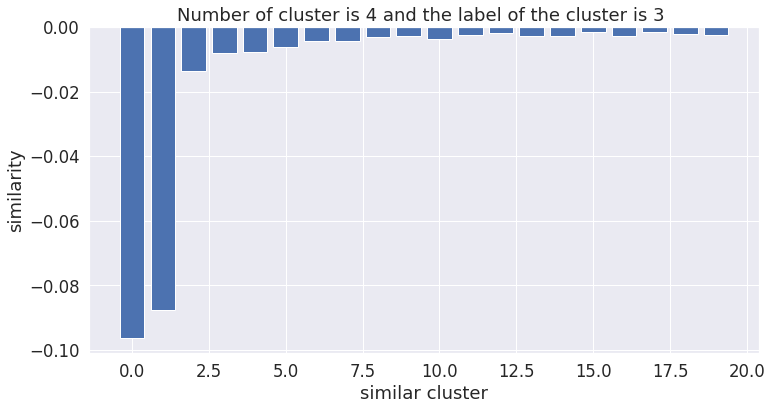

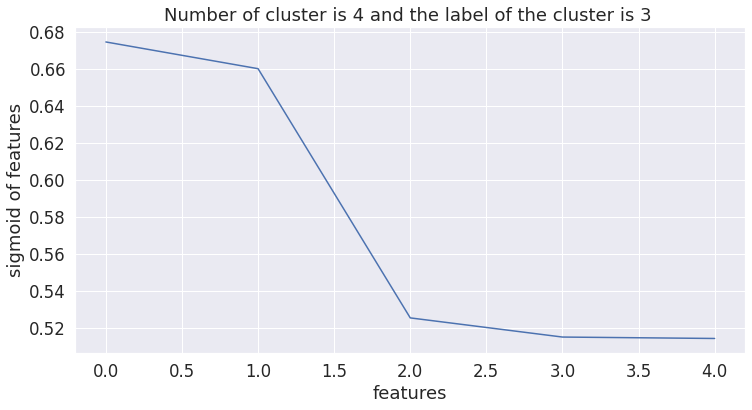

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.71964878 0.53261344 0.52526045 0.52151946 0.54842185] the value is  2.847463975831101


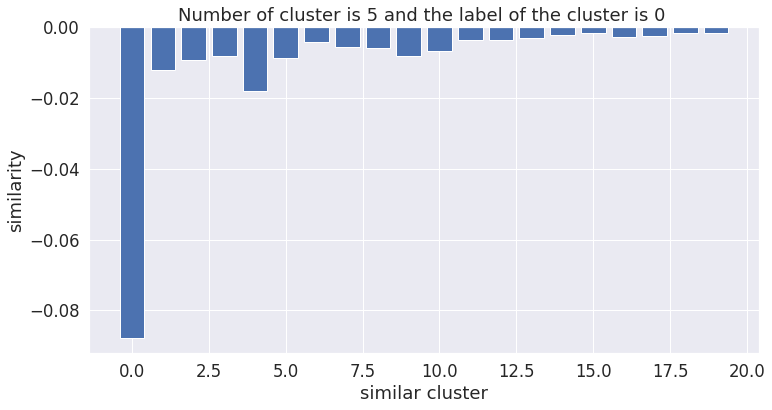

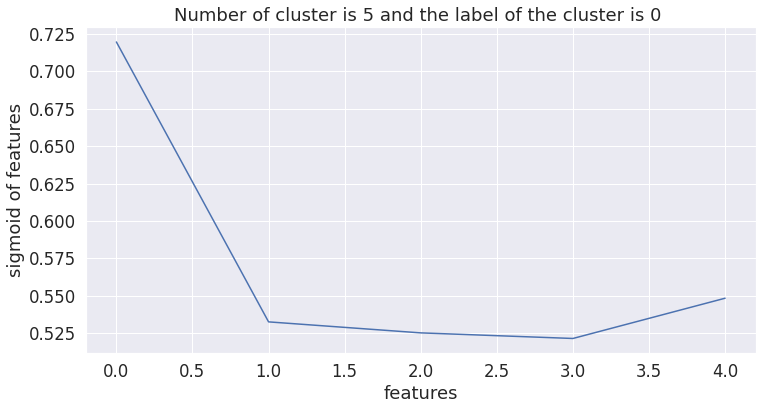

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72205087 0.55694208 0.53362333 0.5172119  0.51413887] the value is  2.843967062291754


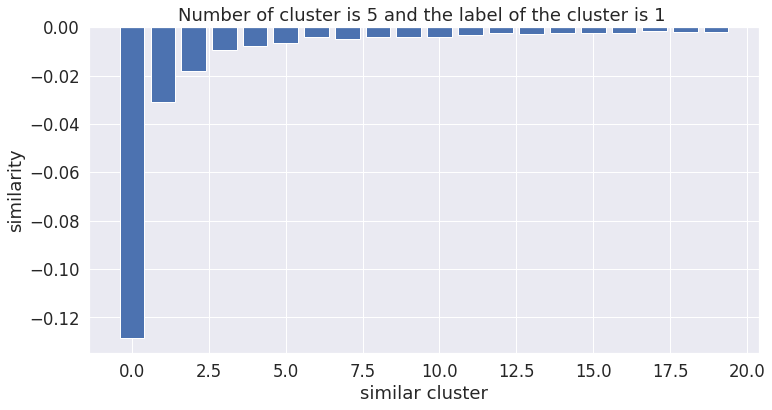

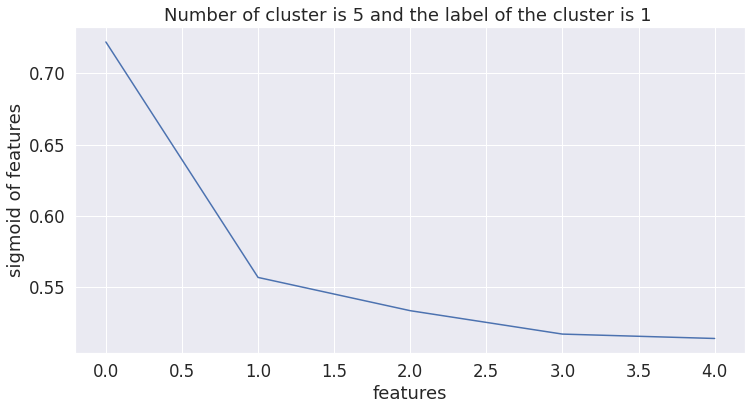

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72963636 0.51756461 0.51533143 0.50973203 0.50640497] the value is  2.7786693971265355


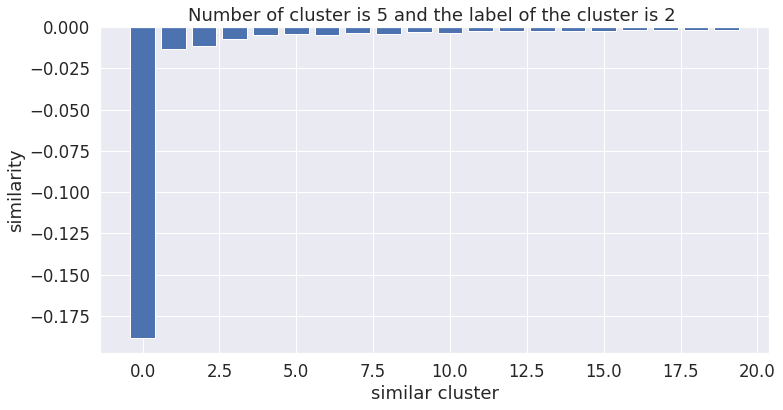

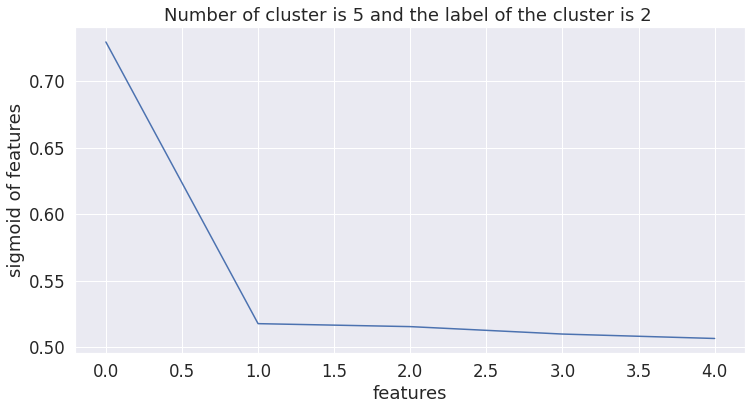

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.6747053  0.66026609 0.52561599 0.51526403 0.51449431] the value is  2.8903457105080563


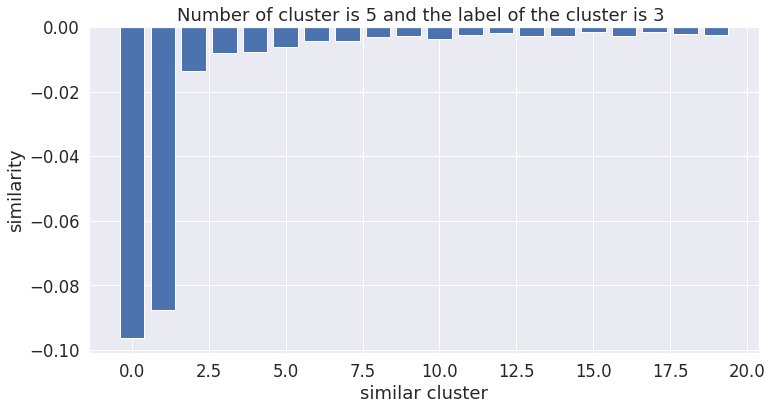

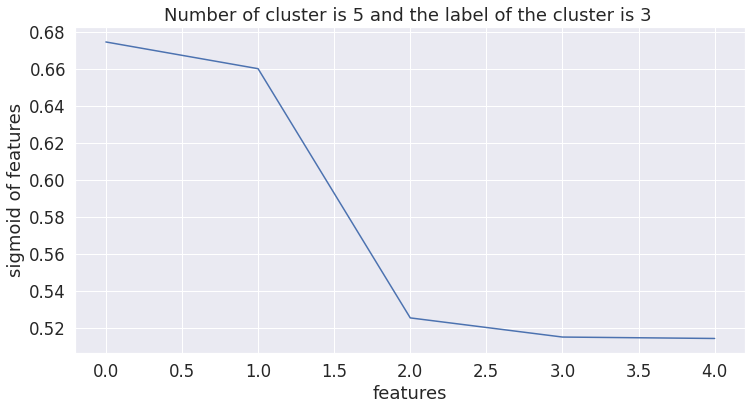

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.68953247 0.5827017  0.61459323 0.52496558 0.51412312] the value is  2.9259161065373878


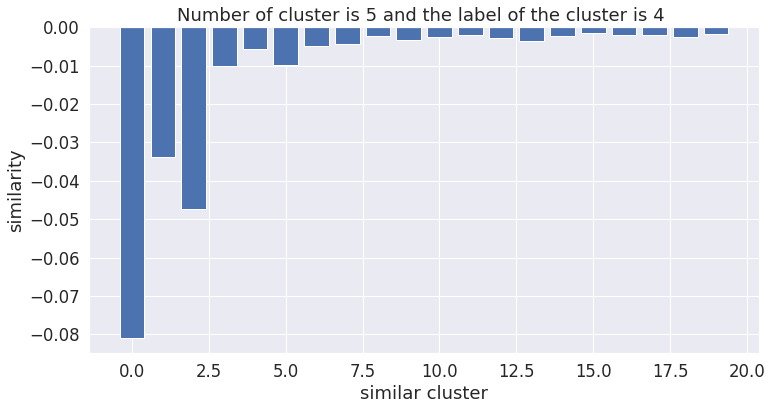

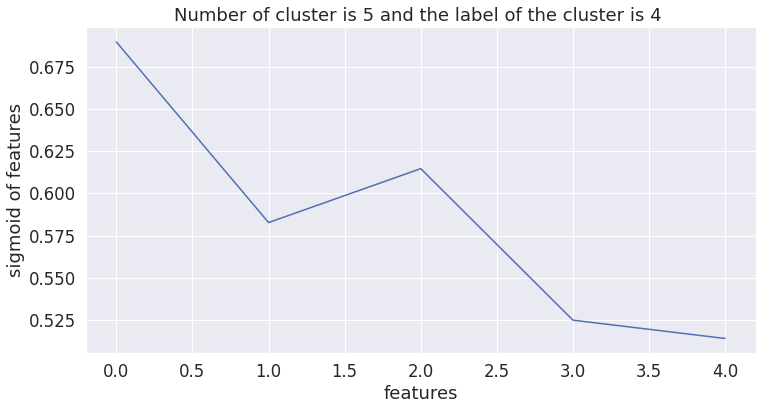

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.69164418 0.58041793 0.61250645 0.5256773  0.51338358] the value is  2.9236294470550384


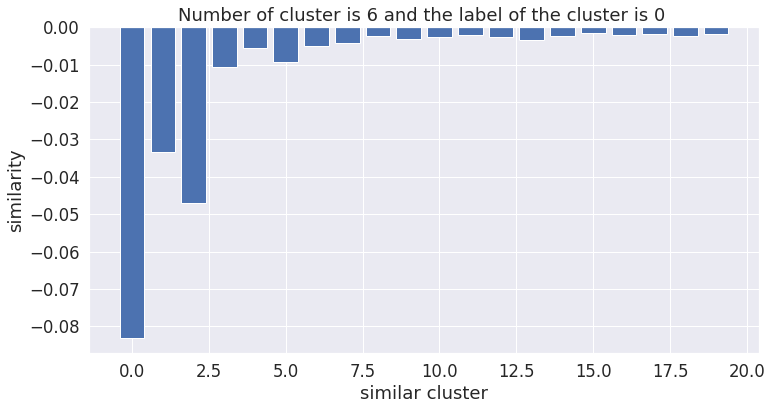

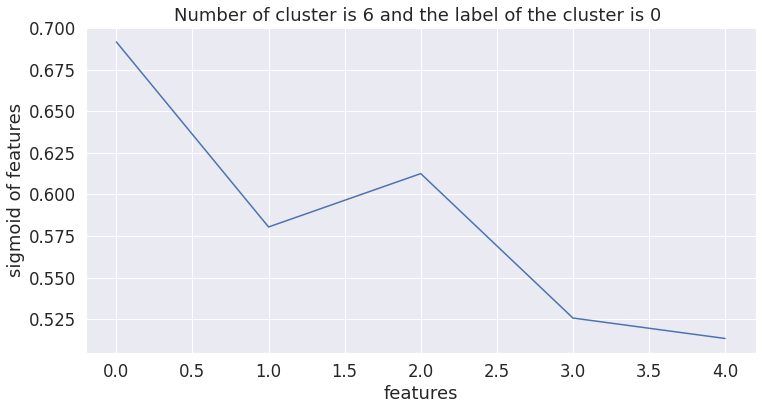

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.73019499 0.51424331 0.50942345 0.50812636 0.50448424] the value is  2.766472358992953


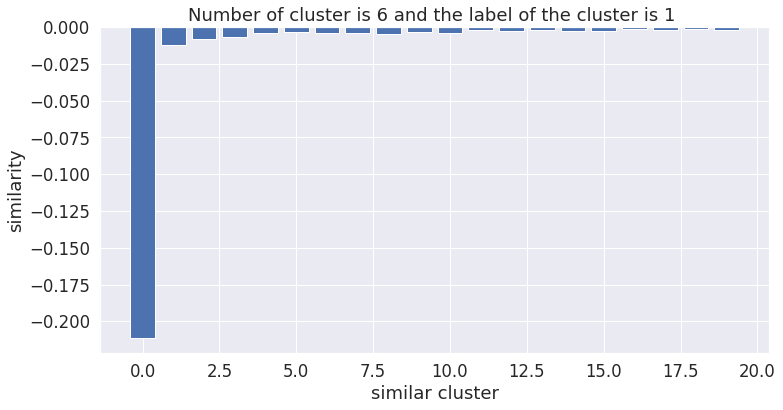

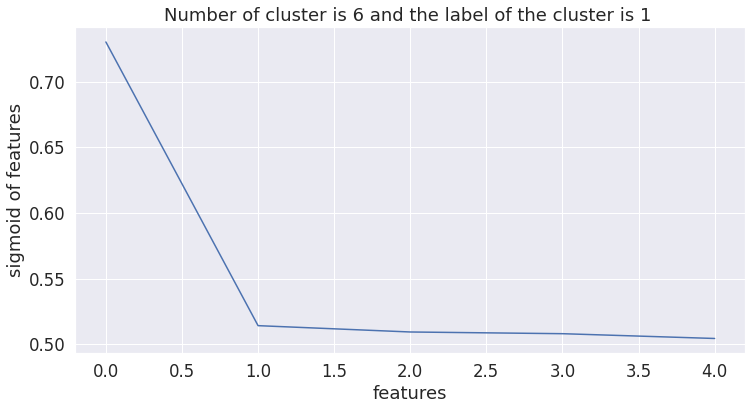

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.6747053  0.66026609 0.52561599 0.51526403 0.51449431] the value is  2.8903457105080563


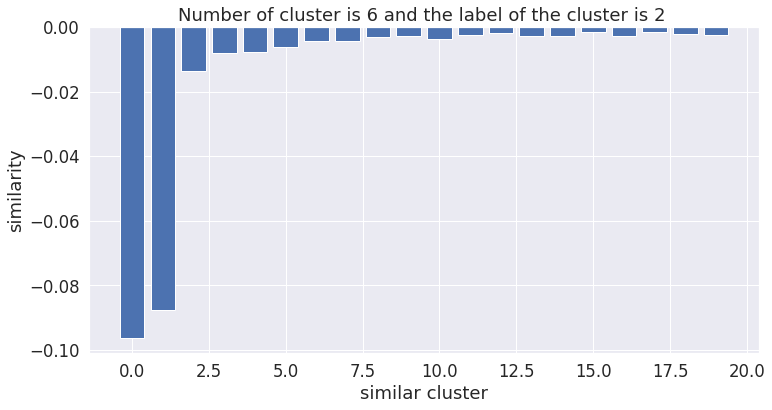

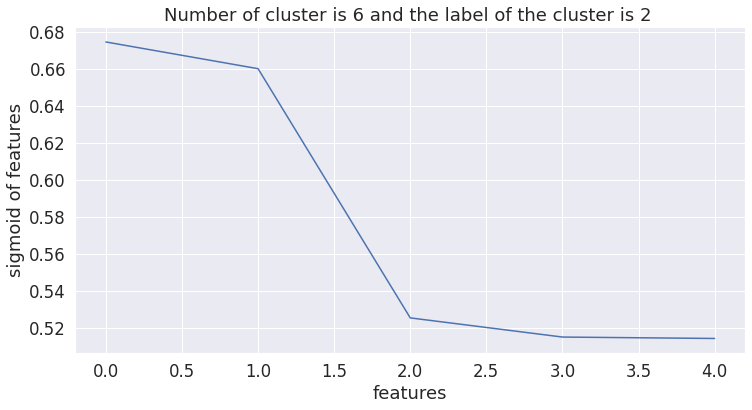

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.71932198 0.53602573 0.52418446 0.51867223 0.55183976] the value is  2.8500441605850924


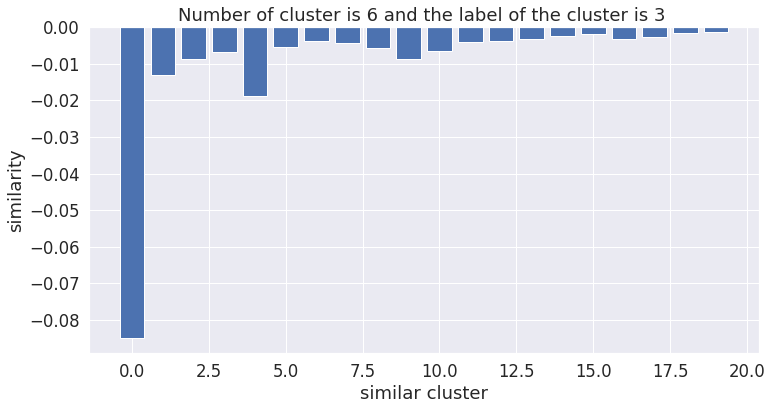

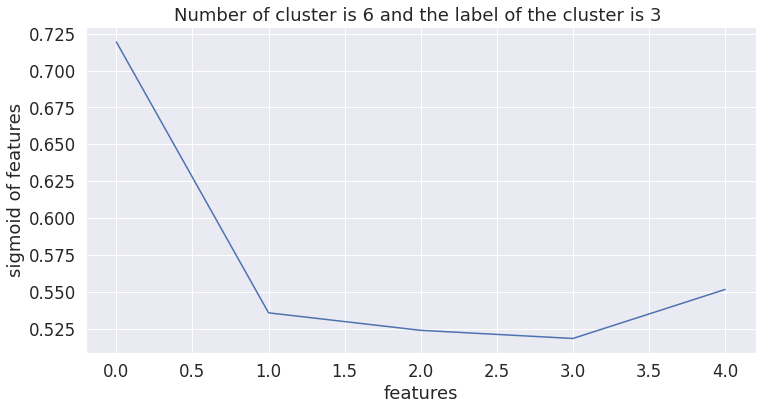

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72184152 0.55859251 0.53007288 0.51761414 0.51518745] the value is  2.843308507267802


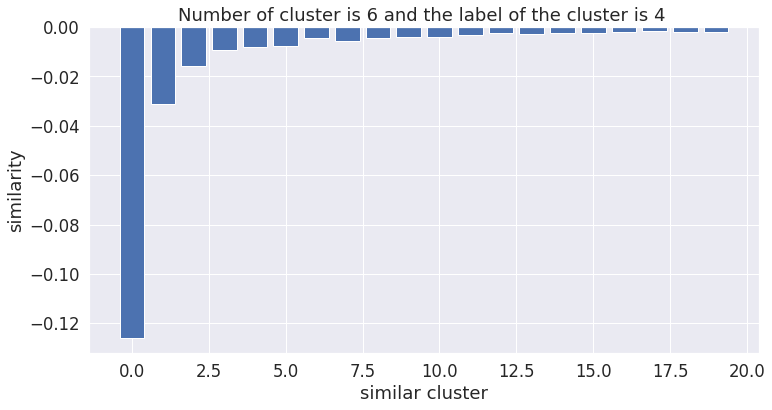

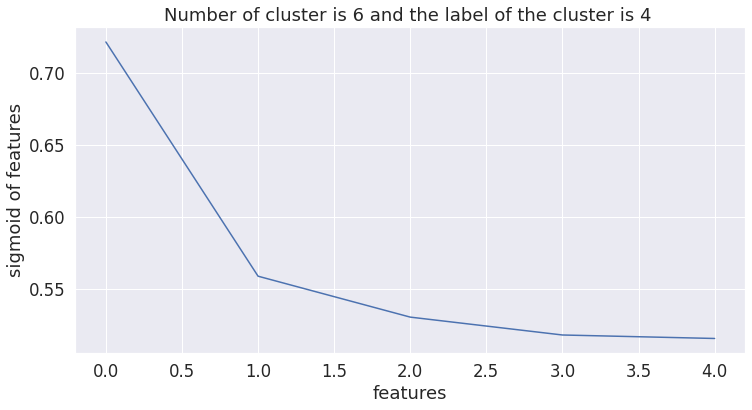

Number of cluster is 5 and the label of the cluster is 5 
sig value is  [0.72884818 0.52088985 0.52240288 0.51113502 0.50786414] the value is  2.791140074956122


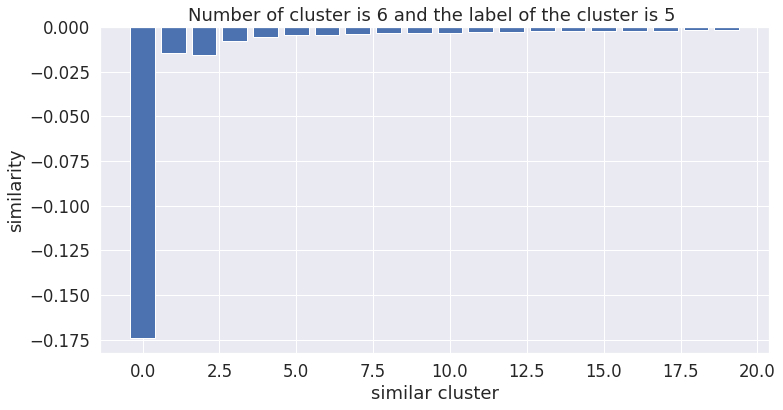

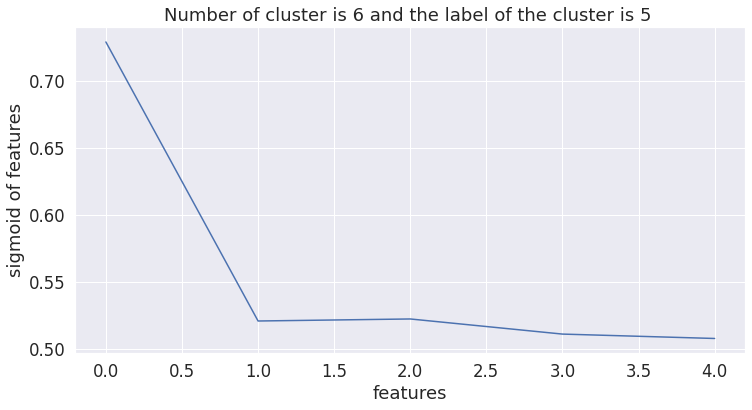

In [78]:
# sigmoid  function to apply on each vector as a activation function
from numpy import array, exp
def sigmoid(vec_):
  z = array(vec_)
  z = z/np.linalg.norm(z)
  g = 1 / (1 + exp(-z))
  return g

for yuo in [2, 3, 4, 5, 6]:
  t = -1
  for cen in total_centers[yuo]:
    t += 1
    print('Number of cluster is {} and the label of the cluster is {} '.format(x, ind))
    sig_vec = sigmoid(-1*cen)[0:int(Max_Feature_Size/4)]
    print('sig value is ', sig_vec, 'the value is ', sum(sig_vec))
    plt.figure()
    plt.bar(range(0, len(cen)), cen)
    plt.xlabel('similar cluster')
    plt.ylabel('similarity')
    plt.title('Number of cluster is {} and the label of the cluster is {} '.format(yuo, t))
    plt.show()
    plt.figure()
    plt.plot(range(0, len(sig_vec)), sig_vec)
    plt.xlabel('features')
    plt.ylabel('sigmoid of features')
    plt.title('Number of cluster is {} and the label of the cluster is {} '.format(yuo, t))
    plt.show()



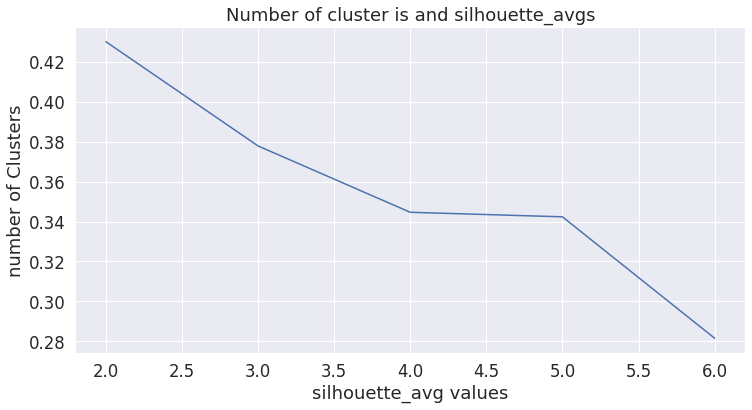

In [59]:
#plot silluheitte function for different clusters
plt.figure()
plt.plot([2,3,4,5,6], silhouette_avg_list)
# plt.plot(range(2, len(silhouette_avg_list)+2), silhouette_avg_list)

plt.xlabel('silhouette_avg values')
plt.ylabel('number of Clusters')
plt.title('Number of cluster is and silhouette_avgs')
plt.show()

labels [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
X_ [[-0.16376861929893488, -0.009259909391403042, -0.010957837104797316, -0.007445544004440195, -0.009486198425292932, -0.0019724965095519716, -0.016180574893951312, -0.004485934972763013, -0.009272769093513487, -0.0010292083024978187, -0.00372152030467986, -0.009014546871185265, -0.003086373209953322, -0.002025008201599093, -0.005046457052230758, -0.002911120653152452, -0.0012295097112654746, -0.0011629909276962007, -0.0019157081842422084, -0.004718095064163167, -0.0036694109439849862, -0.0039756000041961375, -0.001931861042976361, -0.0031477808952331066, -0.002543628215789767, -0.00032436847686762195, -0.0016838759183883346, -0.000843763351440407, -0.0013

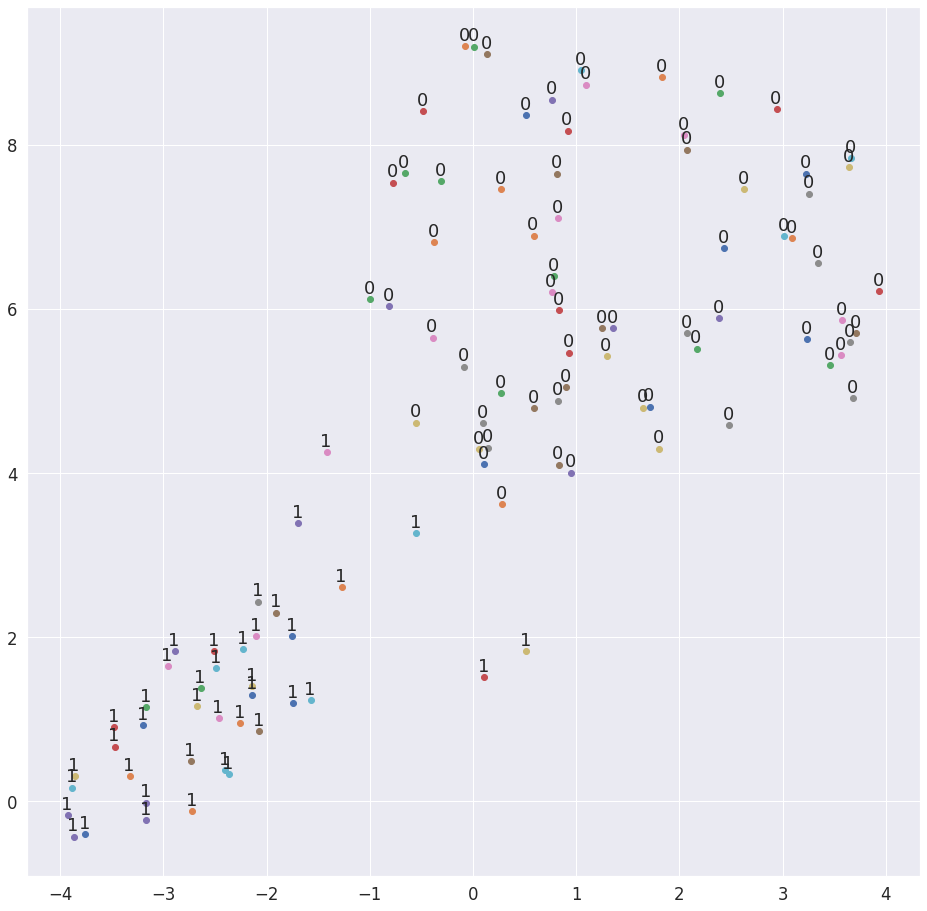

In [60]:
def tsne_plot_kmeans(labels_, X_):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print('labels {}'.format(labels_))
    print('X_ {}'.format(X_))
    print('shape of kmeans is {}'.format(np.shape(labels_)))
    for word, embed in zip(labels_, X_):
        tokens.append(embed)
        labels.append(word)
    print('shape is {}'.format(np.shape(tokens)))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot_kmeans(kmeans.labels_.tolist(), list(gradient_word_similarity_dict.values()))

In [37]:
print('it is still working')

it is still working
